## Exercise - Part 0

Background for homework set - Import several libraries necessary for this dataset

In [12647]:
# This cell will contain all imported modules from this notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
from matplotlib.backends.backend_pdf import PdfPages # For saving multiple plots into a single pdf file
import seaborn as sns
from matplotlib.patches import Patch
from sklearn.neighbors import BallTree

#this is to stop limiting the view of columns vertically in dataframes, while i was creating this exercise
#pd.set_option("display.max_rows", 20)

%matplotlib inline

## Exercise - Part 1.1

Firstly, I will import my CSV file

I will write my initial CSV file to a new CSV file and ensure it will default with utf-8 encoding.

I will check the shape of this CSV file.

Lastly, I will inspect the data of my CSV file (through a dataframe)

In [ ]:
# Here i will read in the csv file, into a data frame using 'pandas' library
# A data frame allows us to read and access data stored in spreadsheet (.csv) format

# If the csv file has any special symbols, it helps to specify the file encoding.
# Once we read the file with pandas.read_csv() we can write the file to_csv() which will save it by default with a utf-8 encoding.
dataframe = pd.read_csv('cal-wildfires.csv', keep_default_na=True, delimiter=',', skipinitialspace=True, encoding='Windows-1252')

#write to file using default utf-8 encoding, this will avoid further issues with the encoding
dataframe.to_csv("cal-wildfires-utf8.csv", index=False)

# I will print the number of rows and columns from this dataframe
print("The number of rows and columns: ", dataframe.shape)

# How many rows?
print("The number of rows/instances: ", dataframe.shape[0])

# How many rows?
print("The number of columns/features: ", dataframe.shape[1])

The number of rows and columns:  (10000, 33)
The number of rows/instances:  10000
The number of columns/features:  33


I will print the first 5 rows of the CSV file

In [12649]:
# I want to see the first 5 rows of my data from
dataframe.head(5)

OBJECTID          * Damage  * Street Number      * Street Name  \
0     13354         No Damage           1030.0          Silverado   
1     78150  Destroyed (>50%)          20228.0              Meyer   
2    108443  Destroyed (>50%)            113.0            W Manor   
3     85672         No Damage            101.0  Lake Almanor West   
4     51874  Destroyed (>50%)          11549.0             Market   

  * Street Type (e.g. road, drive, lane, etc.)          * City State  \
0                                        Trail             NaN    CA   
1                                         Road    Grass Valley    CA   
2                                       Street        Altadena    CA   
3                                        Drive         Chester    CA   
4                                       Street  Unincorporated    CA   

   Zip Code * CAL FIRE Unit       County  ... * Deck/Porch Elevated  \
0       NaN             LNU         Napa  ...         No Deck/Porch   
1   95945.0             NEU       Nevada  ...         No Deck/Porch   
2   91001.0             LAC  Los Angeles  ...         No Deck/Porch   
3   96020.0             LMU       Plumas  ...                  Wood   
4       NaN             SHU       Shasta  ...                  Wood   

  * Patio Cover/Carport Attached to Structure * Fence Attached to Structure  \
0                      No Patio Cover/Carport               Non Combustible   
1                                     Unknown                      No Fence   
2                                     Unknown               Non Combustible   
3                      No Patio Cover/Carport                      No Fence   
4                                 Combustible                      No Fence   

  Distance - Propane Tank to Structure  \
0                                  NaN   
1                                11-20   
2                                  NaN   
3                                21-30   
4                                  >30   

  Distance - Residence to Utility/Misc Structure &gt; 120 SQFT  \
0                                                NaN             
1                                                NaN             
2                                                NaN             
3                                               <30'             
4                                             30-50'             

  Assessed Improved Value (parcel)  Year Built (parcel)  \
0                        3.365e+07               1962.0   
1                        5.651e+04                  NaN   
2                        3.111e+05                  NaN   
3                        1.858e+05                  NaN   
4                        3.707e+04                  0.0   

                        Site Address (parcel) Latitude Longitude  
0  1030 SILVERADO TRL N SAINT HELENA CA 94574   38.518  -122.463  
1        20228 MEYER RD GRASS VALLEY CA 95945   39.133  -120.976  
2          111 W MANOR ST, ALTADENA, CA 91001   34.194  -118.150  
3   101 LAKE ALMANOR WEST DR CHESTER CA 96020   40.238  -121.218  
4                                         NaN   40.624  -122.463  

[5 rows x 33 columns]

I will print the last 5 rows of CSV file

In [12650]:
# Now i want to see the last 5 rows of my dataframe
dataframe.tail(5)

OBJECTID          * Damage  * Street Number    * Street Name  \
9995     75734         No Damage            866.0        Limerick    
9996     50041  Destroyed (>50%)           5770.0            Busch   
9997     92440         No Damage           2521.0        Two Gates   
9998     78668  Destroyed (>50%)              0.0          Unknown   
9999     47285  Destroyed (>50%)           6279.0  Mountain Meadow   

     * Street Type (e.g. road, drive, lane, etc.)                * City State  \
9995                                         Lane        Unincorporated    CA   
9996                                        Drive                Malibu    CA   
9997                                         Road            Georgetown    CA   
9998                                        Other               Platina    CA   
9999                                        Court  Paradise Northeast A    CA   

      Zip Code * CAL FIRE Unit       County  ... * Deck/Porch Elevated  \
9995       NaN             LNU       Sonoma  ...               Unknown   
9996       NaN             LAC  Los Angeles  ...         No Deck/Porch   
9997   95634.0             AEU    El Dorado  ...         No Deck/Porch   
9998       NaN             TGU       Tehama  ...         No Deck/Porch   
9999       NaN             BTU        Butte  ...         No Deck/Porch   

     * Patio Cover/Carport Attached to Structure  \
9995                                     Unknown   
9996                      No Patio Cover/Carport   
9997                      No Patio Cover/Carport   
9998                                 Combustible   
9999                                     Unknown   

     * Fence Attached to Structure Distance - Propane Tank to Structure  \
9995                       Unknown                                  NaN   
9996                      No Fence                                  NaN   
9997                      No Fence                                 0-10   
9998                      No Fence                                  NaN   
9999                   Combustible                                  NaN   

     Distance - Residence to Utility/Misc Structure &gt; 120 SQFT  \
9995                                                NaN             
9996                                               >50'             
9997                                               <30'             
9998                                                NaN             
9999                                                NaN             

     Assessed Improved Value (parcel)  Year Built (parcel)  \
9995                         425867.0               1951.0   
9996                         831300.0               1969.0   
9997                         286255.0               1994.0   
9998                              NaN                  NaN   
9999                         285702.0                  0.0   

                             Site Address (parcel) Latitude Longitude  
9995           898 LIMERICK LN HEALDSBURG CA 95448   38.587  -122.833  
9996                 5770 BUSCH DR MALIBU CA 90265   34.029  -118.819  
9997         2521 TWO GATES RD GEORGETOWN 95634 CA   38.949  -120.711  
9998                                           NaN   40.302  -122.825  
9999  6279  MOUNTAIN MEADOW CT   PARADISE CA 95969   39.774  -121.591  

[5 rows x 33 columns]

Firstly, I will look at the data type of each of the columns from the csv file (as given by pandas)

In [12651]:
# Firstly, look at the data type of each of the columns from the csv file (as given by pandas)

# int64 and float 64 are numeric columns
# object refers to a Python string (a mixture of numbers and characters)

dataframe.dtypes

OBJECTID                                                          int64
* Damage                                                         object
* Street Number                                                 float64
* Street Name                                                    object
* Street Type (e.g. road, drive, lane, etc.)                     object
* City                                                           object
State                                                            object
Zip Code                                                        float64
* CAL FIRE Unit                                                  object
County                                                           object
Community                                                        object
Incident Start Date                                              object
Hazard Type                                                      object
Structure Defense Actions Taken                                 

I will now clean the column names to remove white space after the name or in the name

In [12652]:
dataframe.columns = dataframe.columns.str.replace('* ', '')
dataframe.columns = dataframe.columns.str.replace('# ', 'Number of ')
dataframe.columns = dataframe.columns.str.replace('&gt;', '>')

dataframe.dtypes

OBJECTID                                                       int64
Damage                                                        object
Street Number                                                float64
Street Name                                                   object
Street Type (e.g. road, drive, lane, etc.)                    object
City                                                          object
State                                                         object
Zip Code                                                     float64
CAL FIRE Unit                                                 object
County                                                        object
Community                                                     object
Incident Start Date                                           object
Hazard Type                                                   object
Structure Defense Actions Taken                               object
Structure Type                    

Get a descriptive statistics of each numerical column using the 'describe' method

-> Using this methodology, I have already noticed that the street number is a float64 type, which could be changed to an Int64 type

-> Columns such as street number and zip code could be set to whole numbers

-> Similarly, I see that street number, objectid and zip code are columns that are not 'continuous' data

In [12653]:
# Currently, I can request a descriptive statistics of the numerical columns, using the 'describe' method
# To note... I have set the number of decimal places to 3, for float values
pd.set_option("display.precision", 3)
dataframe.describe()

# Already i notice that street number is a float64 type, which could be changed to an integer64 type

# Columns such as street number and zip code could be set to whole numbers

# Similarly, i see that street number, objectid and zip code are columns that are not 'continuous' data

OBJECTID  Street Number   Zip Code  \
count   10000.000      9.674e+03   5943.000   
mean    65295.828      6.953e+04  63128.848   
std     38079.435      5.901e+06  43155.696   
min        37.000      0.000e+00      0.000   
25%     32165.000      7.000e+02      0.000   
50%     64480.000      2.972e+03  91001.000   
75%     98738.000      8.099e+03  93010.000   
max    131849.000      5.804e+08  96311.000   

       Number of Units in Structure (if multi unit)  \
count                                      2960.000   
mean                                          2.385   
std                                         112.154   
min                                           0.000   
25%                                           0.000   
50%                                           0.000   
75%                                           0.000   
max                                        6101.000   

       Assessed Improved Value (parcel)  Year Built (parcel)   Latitude  \
count                         9.518e+03             7597.000  10000.000   
mean                          6.675e+05             1761.467     37.372   
std                           7.019e+06              598.964      2.482   
min                           0.000e+00                0.000     32.598   
25%                           7.036e+04             1940.000     34.197   
50%                           1.663e+05             1961.000     38.472   
75%                           3.455e+05             1982.000     39.741   
max                           5.227e+08             2022.000     41.907   

       Longitude  
count  10000.000  
mean    -120.540  
std        1.818  
min     -123.688  
25%     -122.140  
50%     -121.419  
75%     -118.545  
max     -116.419

Transpose the previous numerical features table, allowing one feature per row and statistics in each column

In [12654]:
# I will transpose the previous table, to have one feature per row and statistics in each column

# The 'count' column shows how many rows of data are missing for each feature
# We can see that out of 10000 rows of data we only have 5943 zip codes (4057 rows missing a zip code) etc.

# This table does not show the cardinality and %Missing columns

dataframe.describe().T

count        mean        std  \
OBJECTID                                      10000.0   65295.828  3.808e+04   
Street Number                                  9674.0   69531.138  5.901e+06   
Zip Code                                       5943.0   63128.848  4.316e+04   
Number of Units in Structure (if multi unit)   2960.0       2.385  1.122e+02   
Assessed Improved Value (parcel)               9518.0  667451.666  7.019e+06   
Year Built (parcel)                            7597.0    1761.467  5.990e+02   
Latitude                                      10000.0      37.372  2.482e+00   
Longitude                                     10000.0    -120.540  1.818e+00   

                                                  min        25%         50%  \
OBJECTID                                       37.000  32165.000   64480.000   
Street Number                                   0.000    700.000    2972.000   
Zip Code                                        0.000      0.000   91001.000   
Number of Units in Structure (if multi unit)    0.000      0.000       0.000   
Assessed Improved Value (parcel)                0.000  70360.750  166290.000   
Year Built (parcel)                             0.000   1940.000    1961.000   
Latitude                                       32.598     34.197      38.472   
Longitude                                    -123.688   -122.140    -121.419   

                                                     75%        max  
OBJECTID                                       98738.000  1.318e+05  
Street Number                                   8099.250  5.804e+08  
Zip Code                                       93010.000  9.631e+04  
Number of Units in Structure (if multi unit)       0.000  6.101e+03  
Assessed Improved Value (parcel)              345466.500  5.227e+08  
Year Built (parcel)                             1982.000  2.022e+03  
Latitude                                          39.741  4.191e+01  
Longitude                                       -118.545 -1.164e+02

Here i will get a 'summary' of the dataframe

Values shown include;

-> the number of 'non-null' values in each column

-> the data type of each column

-> the number of data columns and rows

In [12655]:
# Here i am getting a 'summary' of the dataframe
# Values shown include;
#   -> the number of 'non-null' values in each column
#   -> the data type of each column
#   -> the number of data columns and rows
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   OBJECTID                                                   10000 non-null  int64  
 1   Damage                                                     10000 non-null  object 
 2   Street Number                                              9674 non-null   float64
 3   Street Name                                                9584 non-null   object 
 4   Street Type (e.g. road, drive, lane, etc.)                 8973 non-null   object 
 5   City                                                       7550 non-null   object 
 6   State                                                      9999 non-null   object 
 7   Zip Code                                                   5943 non-null   float64
 8   CAL FIR

Next, I want to rank the columns of my data frame by count of null values

Allowing me to see futher insight into each feature of my dataframe

In [12656]:
# I wanted to rank my columns of the dataframe by the count of null values, in descending order
# I performed this task solely to inspect and understand my data set

missing_count = dataframe.isnull().sum()

ranked_missing = missing_count.rank(ascending=False)

ranked_dataframe = pd.DataFrame({"Missing Values": missing_count, "Rank": ranked_missing})

ranked_dataframe = ranked_dataframe.sort_values(by="Rank")

print(ranked_dataframe)

                                                    Missing Values  Rank
Distance - Residence to Utility/Misc Structure ...            8594   1.0
Distance - Propane Tank to Structure                          8158   2.0
Structure Defense Actions Taken                               7347   3.0
Number of Units in Structure (if multi unit)                  7040   4.0
Community                                                     5780   5.0
Zip Code                                                      4057   6.0
City                                                          2450   7.0
Year Built (parcel)                                           2403   8.0
Patio Cover/Carport Attached to Structure                     1649  10.5
Fence Attached to Structure                                   1649  10.5
Deck/Porch On Grade                                           1649  10.5
Deck/Porch Elevated                                           1649  10.5
Street Type (e.g. road, drive, lane, etc.)         

Now I will look at only numerical features, showing only columns with a data type of int64 or float64

In [12657]:
# Now i want to look at only numerical features
# Show me the columns only containing the integer or float data type
numeric_columns = dataframe.select_dtypes(['int64', 'float64']).columns

numeric_columns

Index(['OBJECTID', 'Street Number', 'Zip Code',
       'Number of Units in Structure (if multi unit)',
       'Assessed Improved Value (parcel)', 'Year Built (parcel)', 'Latitude',
       'Longitude'],
      dtype='object')

In [12658]:
# Now we will only look at the numerical features in our dataframe
dataframe[numeric_columns]

OBJECTID  Street Number  Zip Code  \
0        13354         1030.0       NaN   
1        78150        20228.0   95945.0   
2       108443          113.0   91001.0   
3        85672          101.0   96020.0   
4        51874        11549.0       NaN   
...        ...            ...       ...   
9995     75734          866.0       NaN   
9996     50041         5770.0       NaN   
9997     92440         2521.0   95634.0   
9998     78668            0.0       NaN   
9999     47285         6279.0       NaN   

      Number of Units in Structure (if multi unit)  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              0.0   
4                                              NaN   
...                                            ...   
9995                                           0.0   
9996                                           0.0   
9997                                           0.0   
9998                                           NaN   
9999                                           NaN   

      Assessed Improved Value (parcel)  Year Built (parcel)  Latitude  \
0                            3.365e+07               1962.0    38.518   
1                            5.651e+04                  NaN    39.133   
2                            3.111e+05                  NaN    34.194   
3                            1.858e+05                  NaN    40.238   
4                            3.707e+04                  0.0    40.624   
...                                ...                  ...       ...   
9995                         4.259e+05               1951.0    38.587   
9996                         8.313e+05               1969.0    34.029   
9997                         2.863e+05               1994.0    38.949   
9998                               NaN                  NaN    40.302   
9999                         2.857e+05                  0.0    39.774   

      Longitude  
0      -122.463  
1      -120.976  
2      -118.150  
3      -121.218  
4      -122.463  
...         ...  
9995   -122.833  
9996   -118.819  
9997   -120.711  
9998   -122.825  
9999   -121.591  

[10000 rows x 8 columns]

For each numerical feature, I want to inspect the number of unique values present

In [12659]:
# Show the number of unique values for each column
print("Feature, UniqueValues") 
print()

for column in numeric_columns:
    print(column + ", " + str(len(dataframe[column].unique())))

Feature, UniqueValues

OBJECTID, 10000
Street Number, 5651
Zip Code, 146
Number of Units in Structure (if multi unit), 16
Assessed Improved Value (parcel), 7642
Year Built (parcel), 136
Latitude, 9992
Longitude, 9995


Here I will make code to visualise the different uniques values of each categorical column.

Firstly, I show case this by displaying all unique values for the column 'Damage'

After, I showcase all unique values given for each categorical column, where the column only has 10 or less unique choices. Columns above 10 unique values are excluded from this view, as I chose not to display columns with a majority amount or complete amount of unique columns (so i dont showcase columns with 10,000 choices, as they're not unique)

In [12660]:
# Return the unique values for a specific column
print("The column 'Damage' has the following values:", dataframe['Damage'].unique())
print()

# I just wanted to show case Python code to look at all unique values of a categorical column...
# Where under my own specifications (no more unique values then 5), I show each column and their unique inputs

# I choose to limit the columns displayed with unique values of 10 or less items, as I see that there is the column 'Street Name' with all unique values etc.
for column in dataframe.columns:
    if column not in numeric_columns and len(dataframe[column].unique()) <= 10:  
        print(f"The column '{column}' has the following values:", dataframe[column].unique())

The column 'Damage' has the following values: ['No Damage' 'Destroyed (>50%)']

The column 'Damage' has the following values: ['No Damage' 'Destroyed (>50%)']
The column 'State' has the following values: ['CA' nan]
The column 'Hazard Type' has the following values: ['Fire']
The column 'Structure Category' has the following values: ['Nonresidential Commercial' 'Single Residence' 'Other Minor Structure'
 'Multiple Residence' 'Infrastructure' 'Mixed Commercial/Residential'
 'Agriculture']
The column 'Roof Construction' has the following values: ['Concrete' 'Other' 'Asphalt' 'Metal' 'Unknown' 'Combustible' 'Tile'
 'Fire Resistant' 'Wood' nan]
The column 'Eaves' has the following values: ['Enclosed' 'No Eaves' 'Unknown' 'Unenclosed' nan 'Not Applicable']
The column 'Vent Screen' has the following values: ['No Vents' 'Unknown' 'Mesh Screen <= 1/8""' 'Mesh Screen > 1/8""'
 'Screened' nan 'Unscreened']
The column 'Window Pane' has the following values: ['No Windows' 'Single Pane' 'Unknown' 'Mu

Here I will show another simple view of missing data for all features in the dataframe

In [12661]:
# I want another simple view of missing data
dataframe.isnull().sum()

OBJECTID                                                        0
Damage                                                          0
Street Number                                                 326
Street Name                                                   416
Street Type (e.g. road, drive, lane, etc.)                   1027
City                                                         2450
State                                                           1
Zip Code                                                     4057
CAL FIRE Unit                                                   0
County                                                          3
Community                                                    5780
Incident Start Date                                             0
Hazard Type                                                     0
Structure Defense Actions Taken                              7347
Structure Type                                                  0
Structure 

## Exercise - Part 1.2
Next I will turn look at each feature's data type

In [12662]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   OBJECTID                                                   10000 non-null  int64  
 1   Damage                                                     10000 non-null  object 
 2   Street Number                                              9674 non-null   float64
 3   Street Name                                                9584 non-null   object 
 4   Street Type (e.g. road, drive, lane, etc.)                 8973 non-null   object 
 5   City                                                       7550 non-null   object 
 6   State                                                      9999 non-null   object 
 7   Zip Code                                                   5943 non-null   float64
 8   CAL FIR

I want to round these feature's float numbers to whole numbers, as OBJECTID is not intended to be shown with 2 decimal places etc.

In [12663]:
# I wanted to round these float numbers to whole numbers
# Reference - https://www.w3schools.com/python/pandas/ref_df_round.asp

dataframe['Zip Code'] = dataframe['Zip Code'].round(0).astype('Int64')
dataframe['Street Number'] = dataframe['Street Number'].round(0).astype('Int64')
dataframe['Year Built (parcel)'] = dataframe['Year Built (parcel)'].round(0).astype('Int64')

I visualise data from 'Assessed Improved Value' and 'Units in Structure' to decipher if it is necessary to change their datatypes

In [12664]:
# I need to visualise the data from 'Assessed Improved Value' and 'Units in Structure' to understand their idealised data type
units_unique = len(dataframe["Number of Units in Structure (if multi unit)"].unique())
value_unique = len(dataframe["Assessed Improved Value (parcel)"].unique())

print(f"\n Unique values in 'Units in Structure': {units_unique}")
print(f" Unique values in 'Assessed Improved Value (parcel)': {value_unique}\n")

df_subgroup = dataframe[['Number of Units in Structure (if multi unit)', 'Assessed Improved Value (parcel)']]

# Display the selected columns
print("Selected Columns:\n")
print(df_subgroup)


 Unique values in 'Units in Structure': 16
 Unique values in 'Assessed Improved Value (parcel)': 7642

Selected Columns:

      Number of Units in Structure (if multi unit)  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              0.0   
4                                              NaN   
...                                            ...   
9995                                           0.0   
9996                                           0.0   
9997                                           0.0   
9998                                           NaN   
9999                                           NaN   

      Assessed Improved Value (parcel)  
0                            3.365e+07  
1                            5.651e+04  
2                            3.111e+05  
3                            1.858e+05  
4                      

I decided to change the following features into categorical types;

    -> OBJECTID is the unique ID for each row, hence it is not continuous data (it will be object and not category as lecturer said "Turn the feature ID into type 'object' so it is not used during descriptive stats")

    -> Street Number is a whole number that identifies a location. Therefore it is not continuous data, this data could potentially show us groupings of particular streets and their influence into other relevant features in this dataframe for example Street Number 3 could be more prone to >50% damage of property in comparison to Street Number 10

    -> Similar to Street Number, I will change Zip Code to categorical

Secondly, I noticed that the columns 'Units in Structure (if multi unit)' and 'Assessed Improved Value (parcel)' are whole numbers

    -> Therefore, I have decided to change the data type of these columns from float64 to Int64

Lastly from the tail of the dataframe in the start of this assignment, I noticed the 'Incident Start Date' column being both a combined date and time

    -> Hence, I will change the data type of this column to datetime64

Reference - https://pbpython.com/pandas_dtypes.html

In [12665]:
# I decided to change the following features into categorical types;
# -> OBJECTID is the unique ID for each row, hence it is not continuous data

dataframe['OBJECTID'] = dataframe['OBJECTID'].astype('object')


# -> Street Number is a whole number that identifies a location. Therefore it is not continuous data, this data could potentially show us groupings of particular streets and their influence into other relevant features in this dataframe
#    for example Street Number 3 could be more prone to >50% damage of property in comparison to Street Number 10
# -> Similar to Street Number, I will change Zip Code to categorical
dataframe['Zip Code'] = dataframe['Zip Code'].astype('category')
dataframe['Street Number'] = dataframe['Street Number'].astype('category')


#Secondly, I noticed that the columns 'Units in Structure (if multi unit)' and 'Assessed Improved Value (parcel)' are whole numbers
#Therefore, I have decided to change the data type of these columns from float64 to Int64
dataframe['Number of Units in Structure (if multi unit)'] = dataframe['Number of Units in Structure (if multi unit)'].astype('Int64')
dataframe['Assessed Improved Value (parcel)'] = dataframe['Assessed Improved Value (parcel)'].astype('Int64')

# Lastly from the tail of the dataframe in the start of this assignment, I noticed the 'Incident Start Date' column being both a combined date and time
# Hence, I will change the data type of this column to datetime64
# Reference - https://pbpython.com/pandas_dtypes.html
dataframe['Incident Start Date'] = pd.to_datetime(dataframe['Incident Start Date'], format="%m/%d/%Y %I:%M:%S %p")

dataframe.dtypes


OBJECTID                                                             object
Damage                                                               object
Street Number                                                      category
Street Name                                                          object
Street Type (e.g. road, drive, lane, etc.)                           object
City                                                                 object
State                                                                object
Zip Code                                                           category
CAL FIRE Unit                                                        object
County                                                               object
Community                                                            object
Incident Start Date                                          datetime64[ns]
Hazard Type                                                          object
Structure De

Convert all 'object' columns to 'category'

In [12666]:
# Show me all columns that are 'object' and convert to 'category' too
object_columns = dataframe.select_dtypes(['object']).columns
object_columns

Index(['OBJECTID', 'Damage', 'Street Name',
       'Street Type (e.g. road, drive, lane, etc.)', 'City', 'State',
       'CAL FIRE Unit', 'County', 'Community', 'Hazard Type',
       'Structure Defense Actions Taken', 'Structure Type',
       'Structure Category', 'Roof Construction', 'Eaves', 'Vent Screen',
       'Exterior Siding', 'Window Pane', 'Deck/Porch On Grade',
       'Deck/Porch Elevated', 'Patio Cover/Carport Attached to Structure',
       'Fence Attached to Structure', 'Distance - Propane Tank to Structure',
       'Distance - Residence to Utility/Misc Structure > 120 SQFT',
       'Site Address (parcel)'],
      dtype='object')

In [12667]:
#Convert selected columns to type 'category'
for column in object_columns:
    dataframe[column] = dataframe[column].astype('category')
dataframe.dtypes   

OBJECTID                                                           category
Damage                                                             category
Street Number                                                      category
Street Name                                                        category
Street Type (e.g. road, drive, lane, etc.)                         category
City                                                               category
State                                                              category
Zip Code                                                           category
CAL FIRE Unit                                                      category
County                                                             category
Community                                                          category
Incident Start Date                                          datetime64[ns]
Hazard Type                                                        category
Structure De

I want to analyse the DateTime column, Incident Start Date, as it is important data that cannot be disregarded from my main Data Quality Report tables

-> This should be a categorical feature in my opinion, to analyse the likehood of fires/earthquakes etc. at certain times of the year (summer/winter months etc). I don't plan to currently use the data for durations or time-series data, requiring the data to be a continuous feature.

-> Therefore, I will breakdown this data feature to see if I can make it more manageable.

In [12668]:
# Checking the unique values of the column
pd.unique(dataframe['Incident Start Date'].dropna().ravel())

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\740812085.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  pd.unique(dataframe['Incident Start Date'].dropna().ravel())


array(['2020-09-27T00:00:00.000000000', '2021-08-04T00:00:00.000000000',
       '2025-01-07T08:02:01.000000000', '2021-07-13T00:00:00.000000000',
       '2018-07-23T00:00:00.000000000', '2018-11-08T00:00:00.000000000',
       '2017-12-06T00:00:00.000000000', '2020-08-16T00:00:00.000000000',
       '2021-08-14T00:00:00.000000000', '2020-08-17T00:00:00.000000000',
       '2015-09-09T00:00:00.000000000', '2024-09-05T00:00:00.000000000',
       '2024-07-04T00:00:00.000000000', '2024-07-24T00:00:00.000000000',
       '2017-10-08T00:00:00.000000000', '2019-10-23T00:00:00.000000000',
       '2022-09-06T00:00:00.000000000', '2024-11-06T00:00:00.000000000',
       '2021-07-04T00:00:00.000000000', '2022-07-22T00:00:00.000000000',
       '2020-09-04T00:00:00.000000000', '2015-09-12T00:00:00.000000000',
       '2020-09-09T00:00:00.000000000', '2014-09-15T00:00:00.000000000',
       '2016-06-24T00:00:00.000000000', '2024-06-15T00:00:00.000000000',
       '2021-08-18T00:00:00.000000000', '2020-08-19

In [12669]:
# Finding the frequency count of the unique rows
unique_times = pd.unique(dataframe['Incident Start Date'].dropna().ravel())
frequency = dataframe['Incident Start Date'].dropna().value_counts().sort_index()

print("\nFrequency of Each Time:\n", frequency)


Frequency of Each Time:
 Incident Start Date
2013-08-07 00:00:00       4
2013-09-09 00:00:00      24
2014-05-14 00:00:00       3
2014-09-15 00:00:00      16
2015-02-06 00:00:00       1
                       ... 
2025-01-07 08:02:01    2288
2025-01-07 20:58:00       1
2025-01-07 21:29:00       1
2025-01-07 22:19:00       1
2025-01-08 22:27:17       1
Name: count, Length: 154, dtype: int64


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\209006647.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_times = pd.unique(dataframe['Incident Start Date'].dropna().ravel())


Given that the column is referred to as a date but also includes the time stamp as well, I wanted to check if the time part of this column was relevant to the data

Hence, I will split the two columns based on their date and time and exam the time column

In [12670]:
# I will seperate both date and time apart, from the Incident Start Time column
# Reference - https://stackoverflow.com/questions/35595710/splitting-timestamp-column-into-separate-date-and-time-columns
dataframe['Incident Start Time'] = pd.to_datetime(dataframe['Incident Start Date'].dt.strftime('%H:%M:%S'), format='%H:%M:%S')
dataframe['Incident Start Date'] = dataframe['Incident Start Date'].dt.normalize()

In [12671]:
# I want to check their datatypes
dataframe.dtypes

OBJECTID                                                           category
Damage                                                             category
Street Number                                                      category
Street Name                                                        category
Street Type (e.g. road, drive, lane, etc.)                         category
City                                                               category
State                                                              category
Zip Code                                                           category
CAL FIRE Unit                                                      category
County                                                             category
Community                                                          category
Incident Start Date                                          datetime64[ns]
Hazard Type                                                        category
Structure De

Now I will investigate the uniqueness of the datetime column

-> Here you can see that I find the 'Incident Start Date' feature to show a majority of 00:00hr times with a frequency of 7686

-> The remaining ~2/10ths of the data is 8.02am, alternative and unique times. Indicating few unique and informative records

-> This to me indicates the importance of the incident's date and not time, as it is non-informative additional data

In [12672]:
unique_times = pd.unique(dataframe['Incident Start Time'].dropna().ravel())
frequency = dataframe['Incident Start Time'].dropna().value_counts().sort_index()

print("\nFrequency of Each Time:\n", frequency)


Frequency of Each Time:
 Incident Start Time
1900-01-01 00:00:00    7686
1900-01-01 08:02:01    2288
1900-01-01 12:00:00      14
1900-01-01 17:08:00       1
1900-01-01 17:32:00       1
1900-01-01 17:35:00       1
1900-01-01 17:52:00       1
1900-01-01 19:39:00       1
1900-01-01 20:58:00       1
1900-01-01 21:29:00       1
1900-01-01 22:11:00       1
1900-01-01 22:19:00       1
1900-01-01 22:27:17       1
1900-01-01 22:30:00       1
1900-01-01 22:32:03       1
Name: count, dtype: int64


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\3894925766.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_times = pd.unique(dataframe['Incident Start Time'].dropna().ravel())


Therefore, instead of dropping an important feature, 'Incident Start Date', I will convert the column into only referring to the 'date' and not the 'time' aspect.

-> This will allow me to use the feature as a categorical column in the categorical Data Quality Report table

In [12673]:
# I will drop the Incident Start Time column
dataframe.drop(columns=['Incident Start Time'], inplace=True)

In [12674]:
# I will convert the Incident Start Date column to categorical
dataframe['Incident Start Date'] = dataframe['Incident Start Date'].dt.date #get rid of that time 00:00:00
dataframe['Incident Start Date'] = dataframe['Incident Start Date'].astype('category')

Now I will update the numerical features

In [12675]:
# Update the numeric features
numeric_columns = dataframe.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['Number of Units in Structure (if multi unit)',
       'Assessed Improved Value (parcel)', 'Year Built (parcel)', 'Latitude',
       'Longitude'],
      dtype='object')

I will update the categorical features

In [12676]:
# Check the categorical features only
category_columns = dataframe.select_dtypes(['category']).columns
dataframe[category_columns]

OBJECTID            Damage Street Number        Street Name  \
0       13354         No Damage          1030          Silverado   
1       78150  Destroyed (>50%)         20228              Meyer   
2      108443  Destroyed (>50%)           113            W Manor   
3       85672         No Damage           101  Lake Almanor West   
4       51874  Destroyed (>50%)         11549             Market   
...       ...               ...           ...                ...   
9995    75734         No Damage           866          Limerick    
9996    50041  Destroyed (>50%)          5770              Busch   
9997    92440         No Damage          2521          Two Gates   
9998    78668  Destroyed (>50%)             0            Unknown   
9999    47285  Destroyed (>50%)          6279    Mountain Meadow   

     Street Type (e.g. road, drive, lane, etc.)                  City State  \
0                                         Trail                   NaN    CA   
1                                          Road          Grass Valley    CA   
2                                        Street              Altadena    CA   
3                                         Drive               Chester    CA   
4                                        Street        Unincorporated    CA   
...                                         ...                   ...   ...   
9995                                       Lane        Unincorporated    CA   
9996                                      Drive                Malibu    CA   
9997                                       Road            Georgetown    CA   
9998                                      Other               Platina    CA   
9999                                      Court  Paradise Northeast A    CA   

     Zip Code CAL FIRE Unit       County  ...           Vent Screen  \
0         NaN           LNU         Napa  ...              No Vents   
1       95945           NEU       Nevada  ...              No Vents   
2       91001           LAC  Los Angeles  ...               Unknown   
3       96020           LMU       Plumas  ...  Mesh Screen <= 1/8""   
4         NaN           SHU       Shasta  ...               Unknown   
...       ...           ...          ...  ...                   ...   
9995      NaN           LNU       Sonoma  ...               Unknown   
9996      NaN           LAC  Los Angeles  ...  Mesh Screen <= 1/8""   
9997    95634           AEU    El Dorado  ...              No Vents   
9998      NaN           TGU       Tehama  ...               Unknown   
9999      NaN           BTU        Butte  ...   Mesh Screen > 1/8""   

          Exterior Siding  Window Pane Deck/Porch On Grade  \
0     Stucco Brick Cement   No Windows    Masonry/Concrete   
1                   Other  Single Pane       No Deck/Porch   
2     Stucco Brick Cement      Unknown       No Deck/Porch   
3                    Wood   Multi Pane       No Deck/Porch   
4      Ignition Resistant      Unknown                Wood   
...                   ...          ...                 ...   
9995              Unknown      Unknown             Unknown   
9996          Combustible  Single Pane       No Deck/Porch   
9997                 Wood  Single Pane       No Deck/Porch   
9998                 Wood  Single Pane       No Deck/Porch   
9999          Combustible   Multi Pane    Masonry/Concrete   

     Deck/Porch Elevated Patio Cover/Carport Attached to Structure  \
0          No Deck/Porch                    No Patio Cover/Carport   
1          No Deck/Porch                                   Unknown   
2          No Deck/Porch                                   Unknown   
3                   Wood                    No Patio Cover/Carport   
4                   Wood                               Combustible   
...                  ...                                       ...   
9995             Unknown                                   Unknown   
9996       No Deck/Porch                    No Patio Cover/Carport   
9997       

I will generate descriptive statistics for categorical and numerical features seperately

In [12677]:
# Descriptive stats for categorical features only.
dataframe[category_columns].describe().T

count unique  \
OBJECTID                                            10000  10000   
Damage                                              10000      2   
Street Number                                        9674   5650   
Street Name                                          9584   4026   
Street Type (e.g. road, drive, lane, etc.)           8973     22   
City                                                 7550    260   
State                                                9999      1   
Zip Code                                             5943    145   
CAL FIRE Unit                                       10000     27   
County                                               9997     47   
Community                                            4220    428   
Incident Start Date                                 10000    149   
Hazard Type                                         10000      1   
Structure Defense Actions Taken                      2653     10   
Structure Type                                      10000     19   
Structure Category                                  10000      7   
Roof Construction                                    9649      9   
Eaves                                                9611      5   
Vent Screen                                          9613      6   
Exterior Siding                                      9629     10   
Window Pane                                          9628      4   
Deck/Porch On Grade                                  8351      5   
Deck/Porch Elevated                                  8351      5   
Patio Cover/Carport Attached to Structure            8351      4   
Fence Attached to Structure                          8351      4   
Distance - Propane Tank to Structure                 1842      5   
Distance - Residence to Utility/Misc Structure ...   1406      5   
Site Address (parcel)                                9446   8520   

                                                                                     top  \
OBJECTID                                                                              37   
Damage                                                                  Destroyed (>50%)   
Street Number                                                                          0   
Street Name                                                                Pacific Coast   
Street Type (e.g. road, drive, lane, etc.)                                          Road   
City                                                                      Unincorporated   
State                                                                                 CA   
Zip Code                                                                               0   
CAL FIRE Unit                                                                        LAC   
County                                                                       Los Angeles   
Community                                                                      Paradise    
Incident Start Date                                                           2025-01-07   
Hazard Type                                                                         Fire   
Structure Defense Actions Taken                                                  Unknown   
Structure Type                                      Single Family Residence Single Story   
Structure Category                                                      Single Residence   
Roof Construction                                                                Asphalt   
Eaves                                                                            Unknown   
Vent Screen                                                                      Unknown   
Exterior Siding                                                      Stucco Brick Cement   
Window Pane                                                                   Multi Pane   
Deck/Porch On Grade                                    

In [12678]:
# Descriptive stats for numerical features only.
dataframe[numeric_columns].describe().T

count        mean  \
Number of Units in Structure (if multi unit)   2960.0       2.385   
Assessed Improved Value (parcel)               9518.0  667451.666   
Year Built (parcel)                            7597.0    1761.467   
Latitude                                      10000.0      37.372   
Longitude                                     10000.0     -120.54   

                                                      std      min       25%  \
Number of Units in Structure (if multi unit)      112.154      0.0       0.0   
Assessed Improved Value (parcel)              7018679.107      0.0  70360.75   
Year Built (parcel)                               598.964      0.0    1940.0   
Latitude                                            2.482   32.598    34.197   
Longitude                                           1.818 -123.688   -122.14   

                                                   50%       75%          max  
Number of Units in Structure (if multi unit)       0.0       0.0       6101.0  
Assessed Improved Value (parcel)              166290.0  345466.5  522652568.0  
Year Built (parcel)                             1961.0    1982.0       2022.0  
Latitude                                        38.472    39.741       41.907  
Longitude                                     -121.419  -118.545     -116.419

## Exercise - Part 1.3

Now I will look at the dataframe and its stipulations to identify...

-> Duplicate rows and columns

-> Constant columns

-> Irregular Cardinalities

-> Logical Testing of Data

As you can see no duplicate rows are found using both pandas python scripts below

In [12679]:
# I want to view/check duplicate rows using pandas
# Reference - https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/

duplicate = dataframe[dataframe.duplicated()]

print("Duplicate Rows: ", duplicate.shape[0])


# Where duplicates exist I run this command to drop them...
dataframe = dataframe.drop_duplicates()


"""As you can see no duplicate rows are picked up using my pandas python script"""


Duplicate Rows:  0


'As you can see no duplicate rows are picked up using my pandas python script'

In [12680]:
# This is the way that was shown in the module's labs
# I will just demonstrate again that there is no duplicate rows
print('Number of duplicate (excluding first) rows in the table is: ', dataframe.duplicated().sum())

Number of duplicate (excluding first) rows in the table is:  0


Demonstrated below there is no duplicate columns in the dataframe

In [12681]:
# In order to check for duplicate columns, we transverse the dataframe and rerun the command to check for duplicate rows
# Reference - https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns


duplicate_columns_list = dataframe.T.duplicated()
duplicate_columns = dataframe.columns[duplicate_columns_list]
print("Duplicate columns:", duplicate_columns.tolist())

# The code to drop columns where they are duplicates
dataframe = dataframe.drop(columns=duplicate_columns)


"""As you can see no duplicate columns are picked up using my pandas python script"""

Duplicate columns: []


'As you can see no duplicate columns are picked up using my pandas python script'

In [12682]:
dataframe[category_columns].describe().T

count unique  \
OBJECTID                                            10000  10000   
Damage                                              10000      2   
Street Number                                        9674   5650   
Street Name                                          9584   4026   
Street Type (e.g. road, drive, lane, etc.)           8973     22   
City                                                 7550    260   
State                                                9999      1   
Zip Code                                             5943    145   
CAL FIRE Unit                                       10000     27   
County                                               9997     47   
Community                                            4220    428   
Incident Start Date                                 10000    149   
Hazard Type                                         10000      1   
Structure Defense Actions Taken                      2653     10   
Structure Type                                      10000     19   
Structure Category                                  10000      7   
Roof Construction                                    9649      9   
Eaves                                                9611      5   
Vent Screen                                          9613      6   
Exterior Siding                                      9629     10   
Window Pane                                          9628      4   
Deck/Porch On Grade                                  8351      5   
Deck/Porch Elevated                                  8351      5   
Patio Cover/Carport Attached to Structure            8351      4   
Fence Attached to Structure                          8351      4   
Distance - Propane Tank to Structure                 1842      5   
Distance - Residence to Utility/Misc Structure ...   1406      5   
Site Address (parcel)                                9446   8520   

                                                                                     top  \
OBJECTID                                                                              37   
Damage                                                                  Destroyed (>50%)   
Street Number                                                                          0   
Street Name                                                                Pacific Coast   
Street Type (e.g. road, drive, lane, etc.)                                          Road   
City                                                                      Unincorporated   
State                                                                                 CA   
Zip Code                                                                               0   
CAL FIRE Unit                                                                        LAC   
County                                                                       Los Angeles   
Community                                                                      Paradise    
Incident Start Date                                                           2025-01-07   
Hazard Type                                                                         Fire   
Structure Defense Actions Taken                                                  Unknown   
Structure Type                                      Single Family Residence Single Story   
Structure Category                                                      Single Residence   
Roof Construction                                                                Asphalt   
Eaves                                                                            Unknown   
Vent Screen                                                                      Unknown   
Exterior Siding                                                      Stucco Brick Cement   
Window Pane                                                                   Multi Pane   
Deck/Porch On Grade                                    

Here I demonstrated through Python scripting that it is also very important to check duplications in key columns as well, where it is perceived to have features of only unique values

While carrying out this task;

-> Upon assumption I thought the Zip Code column would only have unique columns

-> After looking at the data I was wrong, it shows there is duplicate Zip Codes

-> Showing one Zip Code can have multiple insurance/damage claims

In [12683]:
# It is important to also check duplicates in key columns, where unique values are expected
# Here we can see that there is no duplicate rows under the OBJECTID column
duplicate_objectid = dataframe[dataframe.duplicated(subset=['OBJECTID'], keep=False)]
print("Duplicate Rows based on OBJECTID:", duplicate_objectid.shape[0])

# Upon assumption I thought the Zip Code column would only have unique columns
# After looking at the data I was wrong, it shows there is duplicate Zip Codes

# Therefore, one Zip Code can have multiple insurance/damage claims
# I will demonstrate this with a combination of OBJECTID and Zip Code

duplicate_zip = dataframe[dataframe.duplicated(subset=['Zip Code'], keep=False)]
print("Duplicate Rows based on Zip Code:", duplicate_zip.shape[0])

duplicate_combocolumn = dataframe[dataframe.duplicated(subset=['Zip Code', 'OBJECTID'], keep=False)]
print("Duplicate Rows based on a combination of OBJECTID and Zip Code:", duplicate_combocolumn.shape[0])

# Where dropping duplicates (only in OBJECTID) is necessary you would run the following lines
dataframe = dataframe.drop_duplicates(subset=['OBJECTID'], keep='first')



Duplicate Rows based on OBJECTID: 0
Duplicate Rows based on Zip Code: 9966
Duplicate Rows based on a combination of OBJECTID and Zip Code: 0


I will look for and remove constant columns in the dataframe

-> It was discovered that the columns 'State' and 'Hazard Type' are both constant columns

-> Therefore they will be removed from the dataframe, providing no unique insight to the data

In [12684]:
# I will demonstrate three ways I learned how to find constant columns,
# The third way was from my undergrad and I have referenced

# 1- Checking categorical columns
# Here we see the number of features with a unique value of '1'
dataframe.select_dtypes(['category']).describe().T


count unique  \
OBJECTID                                            10000  10000   
Damage                                              10000      2   
Street Number                                        9674   5650   
Street Name                                          9584   4026   
Street Type (e.g. road, drive, lane, etc.)           8973     22   
City                                                 7550    260   
State                                                9999      1   
Zip Code                                             5943    145   
CAL FIRE Unit                                       10000     27   
County                                               9997     47   
Community                                            4220    428   
Incident Start Date                                 10000    149   
Hazard Type                                         10000      1   
Structure Defense Actions Taken                      2653     10   
Structure Type                                      10000     19   
Structure Category                                  10000      7   
Roof Construction                                    9649      9   
Eaves                                                9611      5   
Vent Screen                                          9613      6   
Exterior Siding                                      9629     10   
Window Pane                                          9628      4   
Deck/Porch On Grade                                  8351      5   
Deck/Porch Elevated                                  8351      5   
Patio Cover/Carport Attached to Structure            8351      4   
Fence Attached to Structure                          8351      4   
Distance - Propane Tank to Structure                 1842      5   
Distance - Residence to Utility/Misc Structure ...   1406      5   
Site Address (parcel)                                9446   8520   

                                                                                     top  \
OBJECTID                                                                              37   
Damage                                                                  Destroyed (>50%)   
Street Number                                                                          0   
Street Name                                                                Pacific Coast   
Street Type (e.g. road, drive, lane, etc.)                                          Road   
City                                                                      Unincorporated   
State                                                                                 CA   
Zip Code                                                                               0   
CAL FIRE Unit                                                                        LAC   
County                                                                       Los Angeles   
Community                                                                      Paradise    
Incident Start Date                                                           2025-01-07   
Hazard Type                                                                         Fire   
Structure Defense Actions Taken                                                  Unknown   
Structure Type                                      Single Family Residence Single Story   
Structure Category                                                      Single Residence   
Roof Construction                                                                Asphalt   
Eaves                                                                            Unknown   
Vent Screen                                                                      Unknown   
Exterior Siding                                                      Stucco Brick Cement   
Window Pane                                                                   Multi Pane   
Deck/Porch On Grade                                    

### To Note:

The columns Street Number, Street Name and Site Address have a very high number of unique values

From originally creating a description summary of the categorical features...

-> Street Number: 9674 count and 5650 unique

-> Street Name: 9584 count and 4026 unique

-> Site Address: 9446 count and 8520  unique

Therefore, I have decided/suggest to drop these 3 categorical features from the data quality plan categorical description. The three columns provide too many unique values to provide a meaningful data analytical insight into the dataset. However, this plan of action can change later on in the DQP

I will keep these columns in the dataframe, as I believe it is important to keep all original columns in the dataframe (for later evaluation and DQP etc.)

In [12685]:
# 2- Checking categorical columns
# Here we see the number of features with a std of '0'
dataframe.select_dtypes(include=['int64', 'float64']).describe().T

count        mean  \
Number of Units in Structure (if multi unit)   2960.0       2.385   
Assessed Improved Value (parcel)               9518.0  667451.666   
Year Built (parcel)                            7597.0    1761.467   
Latitude                                      10000.0      37.372   
Longitude                                     10000.0     -120.54   

                                                      std      min       25%  \
Number of Units in Structure (if multi unit)      112.154      0.0       0.0   
Assessed Improved Value (parcel)              7018679.107      0.0  70360.75   
Year Built (parcel)                               598.964      0.0    1940.0   
Latitude                                            2.482   32.598    34.197   
Longitude                                           1.818 -123.688   -122.14   

                                                   50%       75%          max  
Number of Units in Structure (if multi unit)       0.0       0.0       6101.0  
Assessed Improved Value (parcel)              166290.0  345466.5  522652568.0  
Year Built (parcel)                             1961.0    1982.0       2022.0  
Latitude                                        38.472    39.741       41.907  
Longitude                                     -121.419  -118.545     -116.419

In [12686]:
# Next it is important to check for columns that contain constant data entry
# Reference - https://www.geeksforgeeks.org/pandas-dataframe-remove-constant-columns/

constant_columns = [col for col in dataframe.columns if dataframe[col].nunique() == 1]
print("Constant columns:", constant_columns)

# It can be seen that the columns 'State' and 'Hazard Type' are both constant columns
# Therefore they should be removed from the dataframe, as they provide no unique insight to the data
dataframe = dataframe.drop(columns=constant_columns)

Constant columns: ['State', 'Hazard Type']


### Checking for Irregular cardinalities & permitted values

In [12687]:
category_columns = dataframe.select_dtypes(['category'])

print("Unique values for categorical features:\n")

for col in category_columns:
    unique_values = pd.unique(dataframe[col].dropna().ravel())
    print(f"{col}: {unique_values}\n")

Unique values for categorical features:

OBJECTID: [13354, 78150, 108443, 85672, 51874, ..., 75734, 50041, 92440, 78668, 47285]
Length: 10000
Categories (10000, int64): [37, 46, 55, 82, ..., 131801, 131828, 131844, 131849]

Damage: ['No Damage', 'Destroyed (>50%)']
Categories (2, object): ['Destroyed (>50%)', 'No Damage']

Street Number: [1030, 20228, 113, 101, 11549, ..., 4847, 2785, 2270, 7897, 6279]
Length: 5650
Categories (5650, Int64): [0, 1, 2, 3, ..., 719550, 720050, 994652, 580350032]

Street Name: ['Silverado', 'Meyer', 'W Manor', 'Lake Almanor West', 'Market', ..., 'Bixby Creek', 'Winrock', 'Ecua mission', 'Empire Grade (B)', 'Two Gates']
Length: 4026
Categories (4026, object): ['-120 Bear', '-135 Willow ', '-200 Main', '-240 Constantia ', ..., 'tomki', 'w County Line ', 'whitehouse Creek', 'wildberry']

Street Type (e.g. road, drive, lane, etc.): ['Trail', 'Road', 'Street', 'Drive', 'Lane', ..., 'Loop', 'Terrace', 'Pass', 'Parkway', 'Alley']
Length: 22
Categories (22, object

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\3007903190.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_values = pd.unique(dataframe[col].dropna().ravel())
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\3007903190.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_values = pd.unique(dataframe[col].dropna().ravel())
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\3007903190.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_values = pd.unique(dataframe[col].dropna().ravel())


- I can also see that 'Street Number' ranges from value(s); 0 to 58035002

    -> This could be valid for California but it certainly would not be for Ireland

    -> I suggest that the street number 0 should be NaN

    -> This is an irregular cardinality

- For the 'Zip Code' feature, there is a code of '0'

    -> I suggest that this is a missing data entry and should be changed to NaN

    -> This is an irregular cardinality

- In the 'Street Type' column, there is a '-' category, which most likely resembles missing data

    -> We could convert this data to NaN

- Entries in the features displaying areas, such as City, contain white spaces ("Napa ")

    -> Therefore it is important to remove whitespace for avoiding duplicate values

- In the 'Exterior Siding' column, there is an entry of "Stucco Brick Cement" and "Stucco/Brick/Cement"

    -> Therefore, we have duplication cardinalities due to misformatting

- Similarily, this can be seen in the 'Structure Type' column too

    -> "Single Family Residence Single Story" and "Single Famliy Residence Single Story" are present due to a type mistake

- In the 'Vent Screen' and 'Distance - Residence to Utility/Misc Structure > 120 SQFT', values were spotted with either 'x'' or "x""    
    
    -> Therefore, the formatting of values under these features need to be address to remove the trailing additional quotation mark

- In the 'Year Built (parcel)' column, I have the Year of 0 which does not exist
    
    -> Therefore, I assume this 0 should be changed to NaN or null value

In [12688]:
numeric_columns = dataframe.select_dtypes(['int64', 'float64'])

print("Unique values for numerical features:\n")

for col in numeric_columns:
    unique_values = pd.unique(dataframe[col].dropna().ravel())
    print(f"{col}: {unique_values}\n")

Unique values for numerical features:

Number of Units in Structure (if multi unit): <IntegerArray>
[0, 2, 1, 5, 8, 10, 4, 20, 7, 6101, 80, 6, 3, 9, 40]
Length: 15, dtype: Int64

Assessed Improved Value (parcel): <IntegerArray>
[33651388,    56514,   311077,   185777,    37072,   204312,  1143549,
   149283,   143288,    45000,
 ...
   145866,   346551,     6410,    74281,   173065,   339872,   644511,
   831300,   286255,   285702]
Length: 7641, dtype: Int64

Year Built (parcel): <IntegerArray>
[1962,    0, 1990, 1980, 1997, 1948, 2000, 1979, 1940, 1998,
 ...
 1899, 1909, 1905, 2022, 1896, 1865, 1877, 1887, 1901, 1878]
Length: 135, dtype: Int64

Latitude: [38.5181401  39.1327525  34.1939651  ... 38.94900219 40.30154775
 39.7742743 ]

Longitude: [-122.46252313 -120.97637035 -118.1502359  ... -120.71108879 -122.82517488
 -121.59136202]



C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1444978798.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_values = pd.unique(dataframe[col].dropna().ravel())


I don't see any irregular cardinalities with the resulting values

    -> Just to keep in mind that I have an outlier in my 'Number of Structure Units', being 6101 and could potentially be clamped or removed from the data set, if data is distorted

### Checking logical integrity of data

A number of additional checks will be performed to see if the data makes sense. Depending on the amount of data affected we may decide to drop those rows or replace the values upon consultation with a domain expert.

Test 1: Check if the 'Assessed Improved Value' column is not a negative number

    - It is clear to note that there is a large quantity of values set to '0' and the value of the house is logically worth more than this value. Therefore, 0 values should be set to null/NaN

In [12689]:
check_column = dataframe[dataframe['Assessed Improved Value (parcel)'] < 0]

if check_column.empty:
    print("All values are above/equal to 0")
else:
    print("Number of rows failing the test: ", len(check_column))

All values are above/equal to 0


Test 2: Check if the 'Street Number' column is not a negative number

- It is clear to note that there is a large quantity of values set to '0' and a street number is logically not zero. Therefore, 0 values should be set to null/NaN

In [12690]:
temp_streetnumber = pd.to_numeric(dataframe['Street Number'])

check_column = dataframe[temp_streetnumber < 0]

if check_column.empty:
    print("All values are above/equal to 0")
else:
    print("Number of rows failing the test: ", len(check_column))

All values are above/equal to 0


Test 3: Check if the 'Number of Units in Structure' column is not a negative number

In [12691]:
check_column = dataframe[dataframe['Number of Units in Structure (if multi unit)'] < 0]

if check_column.empty:
    print("All values are above/equal to 0")
else:
    print("Number of rows failing the test: ", len(check_column))

All values are above/equal to 0


Test 4: Check that the "Year Built (parcel)" has a maximum value of today's date

In [12692]:
max_year = pd.to_numeric(dataframe['Year Built (parcel)']).max()
print("Maximum Year Built (parcel):", max_year)

Maximum Year Built (parcel): 2022


Test 5: Check that the "Incident Start Date" has a maximum value of today's date

In [12693]:
max_incident_date = pd.to_datetime(dataframe['Incident Start Date'].astype(str)).max()
print("Maximum Incident Start Date:", max_incident_date)


Maximum Incident Start Date: 2025-01-08 00:00:00


Test 6: Check that the 'Incident Start Date' is always after the time of 'Year Built'

-> Here you will see one row is flagged with year built of 2018 and incident date of 2018, therefore I will infer that these values are correct

In [12694]:
year_built = pd.to_numeric(dataframe['Year Built (parcel)'])
incident_date = pd.to_datetime(dataframe['Incident Start Date'], format='%Y-%m-%d')
invalid_rows = dataframe[year_built >= incident_date.dt.year]
if not invalid_rows.empty:
    print("There is rows with the year built after the incident start date:\n")
    print(invalid_rows[['Year Built (parcel)', 'Incident Start Date']])
else:
    print("All rows contain a built year prior to the incident start date")

There is rows with the year built after the incident start date:

      Year Built (parcel) Incident Start Date
4580                 2018          2018-11-08


## Exercise - Part 1.4

I will save the updated/cleaned data frame to a new csv file

In [ ]:
# I will save my clean (removed duplicate rows, duplicate columns and constant columns),
# to a new .csv file in utf-8 encoding
dataframe.to_csv("updated-cal-wildfires-utf8.csv", index=False)

In [ ]:
# I will read in the newly created 'clean' csv
df = pd.read_csv("updated-cal-wildfires-utf8.csv")

df.head(3)

OBJECTID            Damage  Street Number Street Name  \
0     13354         No Damage         1030.0   Silverado   
1     78150  Destroyed (>50%)        20228.0       Meyer   
2    108443  Destroyed (>50%)          113.0     W Manor   

  Street Type (e.g. road, drive, lane, etc.)          City  Zip Code  \
0                                      Trail           NaN       NaN   
1                                       Road  Grass Valley   95945.0   
2                                     Street      Altadena   91001.0   

  CAL FIRE Unit       County   Community  ... Deck/Porch Elevated  \
0           LNU         Napa  St. Helena  ...       No Deck/Porch   
1           NEU       Nevada         NaN  ...       No Deck/Porch   
2           LAC  Los Angeles         NaN  ...       No Deck/Porch   

  Patio Cover/Carport Attached to Structure Fence Attached to Structure  \
0                    No Patio Cover/Carport             Non Combustible   
1                                   Unknown                    No Fence   
2                                   Unknown             Non Combustible   

  Distance - Propane Tank to Structure  \
0                                  NaN   
1                                11-20   
2                                  NaN   

   Distance - Residence to Utility/Misc Structure > 120 SQFT  \
0                                                NaN           
1                                                NaN           
2                                                NaN           

  Assessed Improved Value (parcel) Year Built (parcel)  \
0                        3.365e+07              1962.0   
1                        5.651e+04                 NaN   
2                        3.111e+05                 NaN   

                        Site Address (parcel) Latitude Longitude  
0  1030 SILVERADO TRL N SAINT HELENA CA 94574   38.518  -122.463  
1        20228 MEYER RD GRASS VALLEY CA 95945   39.133  -120.976  
2          111 W MANOR ST, ALTADENA, CA 91001   34.194  -118.150  

[3 rows x 31 columns]

## Exercise - Part 1.5

Now I will make the data quality report tables to explore the data.

The Data Quality Report helps us identify potential problems or errors in the data. It serves as a summary of our findings from the dataset.

In [12697]:
# When I read in my new updated csv file, i learned that the datatype information is not saved into the .csv
# It is by default that pandas tries to assume the datatype of each of its dataframe's features
# Therefore, I have to remake the dataframe's configuration

# I recreated the data frame out using a function that contained the previous code
def configDataFrame(frame):
    frame['Zip Code'] = frame['Zip Code'].round(0).astype('Int64')
    frame['Street Number'] = frame['Street Number'].round(0).astype('Int64')
    frame['Year Built (parcel)'] = frame['Year Built (parcel)'].round(0).astype('Int64')

    frame['OBJECTID'] = frame['OBJECTID'].astype('object')
    
    frame['Zip Code'] = frame['Zip Code'].astype('category')
    frame['Street Number'] = frame['Street Number'].astype('category')
    frame['Number of Units in Structure (if multi unit)'] = frame['Number of Units in Structure (if multi unit)'].astype('Int64')
    frame['Assessed Improved Value (parcel)'] = frame['Assessed Improved Value (parcel)'].astype('Int64')

    frame['Incident Start Date'] = pd.to_datetime(frame['Incident Start Date'], format='%Y-%m-%d').dt.date
    frame['Incident Start Date'] = frame['Incident Start Date'].astype('category')

    # Convert all object columns to category... except select columns
    objects = frame.select_dtypes(['object']).columns
    exclude_columns = ['OBJECTID']
    for c in objects:
        if c not in exclude_columns:
            frame[c] = frame[c].astype('category')


# I implement the changes
configDataFrame(df)


Due to the change in dataframe, we will remake the variables holding each type of column based on the updated dataframe

In [12698]:
# Due to the change in dataframe, we will remake the variables holding each type of column based on the updated dataframe
numeric_col = df.select_dtypes(['int64', 'float64']).columns
category_col = df.select_dtypes(['category']).columns

Now I will regenerate descriptive statistics for categorical features

In [12699]:
# Descriptive stats for categorical features only.
df[category_col].describe().T

count unique  \
Damage                                              10000      2   
Street Number                                        9674   5650   
Street Name                                          9584   4026   
Street Type (e.g. road, drive, lane, etc.)           8973     22   
City                                                 7550    260   
Zip Code                                             5943    145   
CAL FIRE Unit                                       10000     27   
County                                               9997     47   
Community                                            4220    428   
Incident Start Date                                 10000    149   
Structure Defense Actions Taken                      2653     10   
Structure Type                                      10000     19   
Structure Category                                  10000      7   
Roof Construction                                    9649      9   
Eaves                                                9611      5   
Vent Screen                                          9613      6   
Exterior Siding                                      9629     10   
Window Pane                                          9628      4   
Deck/Porch On Grade                                  8351      5   
Deck/Porch Elevated                                  8351      5   
Patio Cover/Carport Attached to Structure            8351      4   
Fence Attached to Structure                          8351      4   
Distance - Propane Tank to Structure                 1842      5   
Distance - Residence to Utility/Misc Structure ...   1406      5   
Site Address (parcel)                                9446   8520   

                                                                                     top  \
Damage                                                                  Destroyed (>50%)   
Street Number                                                                          0   
Street Name                                                                Pacific Coast   
Street Type (e.g. road, drive, lane, etc.)                                          Road   
City                                                                      Unincorporated   
Zip Code                                                                               0   
CAL FIRE Unit                                                                        LAC   
County                                                                       Los Angeles   
Community                                                                      Paradise    
Incident Start Date                                                           2025-01-07   
Structure Defense Actions Taken                                                  Unknown   
Structure Type                                      Single Family Residence Single Story   
Structure Category                                                      Single Residence   
Roof Construction                                                                Asphalt   
Eaves                                                                            Unknown   
Vent Screen                                                                      Unknown   
Exterior Siding                                                      Stucco Brick Cement   
Window Pane                                                                   Multi Pane   
Deck/Porch On Grade                                                     Masonry/Concrete   
Deck/Porch Elevated                                                        No Deck/Porch   
Patio Cover/Carport Attached to Structure                         No Patio Cover/Carport   
Fence Attached to Structure                                                     No Fence   
Distance - Propane Tank to Structure                                             Unknown   
Distance - Residence to Utility/Misc Structure ...                         

### Making the Data Quality Report for Continuous Data

In [12700]:
# Performing a descriptive statistic
# Shows the mean for each numeric feature
df[numeric_col].mean()

Number of Units in Structure (if multi unit)         2.385
Assessed Improved Value (parcel)                667451.666
Year Built (parcel)                               1761.467
Latitude                                            37.372
Longitude                                          -120.54
dtype: Float64

In [12701]:
# Performing a descriptive statistic
# Shows the standard deviation for each numeric feature
df[numeric_col].std()

Number of Units in Structure (if multi unit)        112.154
Assessed Improved Value (parcel)                7018679.107
Year Built (parcel)                                 598.964
Latitude                                              2.482
Longitude                                             1.818
dtype: Float64

I will regenerate descriptive statistics for numerical features

In [12702]:
# Here I will show the summary statistics table for numeric features
df_table_numeric = df[numeric_col].describe().T
df_table_numeric

count        mean  \
Number of Units in Structure (if multi unit)   2960.0       2.385   
Assessed Improved Value (parcel)               9518.0  667451.666   
Year Built (parcel)                            7597.0    1761.467   
Latitude                                      10000.0      37.372   
Longitude                                     10000.0     -120.54   

                                                      std      min       25%  \
Number of Units in Structure (if multi unit)      112.154      0.0       0.0   
Assessed Improved Value (parcel)              7018679.107      0.0  70360.75   
Year Built (parcel)                               598.964      0.0    1940.0   
Latitude                                            2.482   32.598    34.197   
Longitude                                           1.818 -123.688   -122.14   

                                                   50%       75%          max  
Number of Units in Structure (if multi unit)       0.0       0.0       6101.0  
Assessed Improved Value (parcel)              166290.0  345466.5  522652568.0  
Year Built (parcel)                             1961.0    1982.0       2022.0  
Latitude                                        38.472    39.741       41.907  
Longitude                                     -121.419  -118.545     -116.419

Checking for Null Values

In [12703]:
# I will make a dataframe to evaluate the percentage of missing rows related to each numerical feature
numeric_columns_missing  = 100 * (df[numeric_col].isnull().sum()/df.shape[0])

df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
df_numeric_missing

%missing
Number of Units in Structure (if multi unit)     70.40
Assessed Improved Value (parcel)                  4.82
Year Built (parcel)                              24.03
Latitude                                          0.00
Longitude                                         0.00

Checking for Unique Values

In [12704]:
# I will make a dataframe to evaluate the number of unique data enteries related to each numerical feature
numeric_columns_card = df[numeric_col].nunique()
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['No. of Unique Entries (Cardinality)'])
df_numeric_card

No. of Unique Entries (Cardinality)
Number of Units in Structure (if multi unit)                                   15
Assessed Improved Value (parcel)                                             7641
Year Built (parcel)                                                           135
Latitude                                                                     9992
Longitude                                                                    9995

## The Final Data Quality Report Table for Numerical Features

In [12705]:
# Add missing values column
# Put the %missing and unique entries columns together to prepare the final table for numeric_columns
df_numeric_columns_data_quality_report_table = pd.concat([df_table_numeric, df_numeric_missing, df_numeric_card], axis=1)

df_numeric_columns_data_quality_report_table 

count        mean  \
Number of Units in Structure (if multi unit)   2960.0       2.385   
Assessed Improved Value (parcel)               9518.0  667451.666   
Year Built (parcel)                            7597.0    1761.467   
Latitude                                      10000.0      37.372   
Longitude                                     10000.0     -120.54   

                                                      std      min       25%  \
Number of Units in Structure (if multi unit)      112.154      0.0       0.0   
Assessed Improved Value (parcel)              7018679.107      0.0  70360.75   
Year Built (parcel)                               598.964      0.0    1940.0   
Latitude                                            2.482   32.598    34.197   
Longitude                                           1.818 -123.688   -122.14   

                                                   50%       75%          max  \
Number of Units in Structure (if multi unit)       0.0       0.0       6101.0   
Assessed Improved Value (parcel)              166290.0  345466.5  522652568.0   
Year Built (parcel)                             1961.0    1982.0       2022.0   
Latitude                                        38.472    39.741       41.907   
Longitude                                     -121.419  -118.545     -116.419   

                                              %missing  \
Number of Units in Structure (if multi unit)     70.40   
Assessed Improved Value (parcel)                  4.82   
Year Built (parcel)                              24.03   
Latitude                                          0.00   
Longitude                                         0.00   

                                              No. of Unique Entries (Cardinality)  
Number of Units in Structure (if multi unit)                                   15  
Assessed Improved Value (parcel)                                             7641  
Year Built (parcel)                                                           135  
Latitude                                                                     9992  
Longitude                                                                    9995

In [ ]:
# Print data quality report table for categorical features to a file.
# The file will be created in the current folder where jupyter notebook is run from.
df_numeric_columns_data_quality_report_table.to_csv("cal-wildfires-DataQualityReport-ContinuousFeatures-Table.csv", 
                                         index_label='Feature')

### Making the Data Quality Report for Categorical Data

In [12707]:
# Here I will show the summary statistics table for categorical features
df_table_categ = df[category_col].describe().T
df_table_categ

count unique  \
Damage                                              10000      2   
Street Number                                        9674   5650   
Street Name                                          9584   4026   
Street Type (e.g. road, drive, lane, etc.)           8973     22   
City                                                 7550    260   
Zip Code                                             5943    145   
CAL FIRE Unit                                       10000     27   
County                                               9997     47   
Community                                            4220    428   
Incident Start Date                                 10000    149   
Structure Defense Actions Taken                      2653     10   
Structure Type                                      10000     19   
Structure Category                                  10000      7   
Roof Construction                                    9649      9   
Eaves                                                9611      5   
Vent Screen                                          9613      6   
Exterior Siding                                      9629     10   
Window Pane                                          9628      4   
Deck/Porch On Grade                                  8351      5   
Deck/Porch Elevated                                  8351      5   
Patio Cover/Carport Attached to Structure            8351      4   
Fence Attached to Structure                          8351      4   
Distance - Propane Tank to Structure                 1842      5   
Distance - Residence to Utility/Misc Structure ...   1406      5   
Site Address (parcel)                                9446   8520   

                                                                                     top  \
Damage                                                                  Destroyed (>50%)   
Street Number                                                                          0   
Street Name                                                                Pacific Coast   
Street Type (e.g. road, drive, lane, etc.)                                          Road   
City                                                                      Unincorporated   
Zip Code                                                                               0   
CAL FIRE Unit                                                                        LAC   
County                                                                       Los Angeles   
Community                                                                      Paradise    
Incident Start Date                                                           2025-01-07   
Structure Defense Actions Taken                                                  Unknown   
Structure Type                                      Single Family Residence Single Story   
Structure Category                                                      Single Residence   
Roof Construction                                                                Asphalt   
Eaves                                                                            Unknown   
Vent Screen                                                                      Unknown   
Exterior Siding                                                      Stucco Brick Cement   
Window Pane                                                                   Multi Pane   
Deck/Porch On Grade                                                     Masonry/Concrete   
Deck/Porch Elevated                                                        No Deck/Porch   
Patio Cover/Carport Attached to Structure                         No Patio Cover/Carport   
Fence Attached to Structure                                                     No Fence   
Distance - Propane Tank to Structure                                             Unknown   
Distance - Residence to Utility/Misc Structure ...                         

Checking for Null Values

In [12708]:
# Prepare %missing column for categorical data
category_columns_perc_missing  = 100 * (df[category_col].isnull().sum()/df.shape[0])

# I will store the values in a dataframe
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
df_category_perc_missing

%missing
Damage                                                  0.00
Street Number                                           3.26
Street Name                                             4.16
Street Type (e.g. road, drive, lane, etc.)             10.27
City                                                   24.50
Zip Code                                               40.57
CAL FIRE Unit                                           0.00
County                                                  0.03
Community                                              57.80
Incident Start Date                                     0.00
Structure Defense Actions Taken                        73.47
Structure Type                                          0.00
Structure Category                                      0.00
Roof Construction                                       3.51
Eaves                                                   3.89
Vent Screen                                             3.87
Exterior Siding                                         3.71
Window Pane                                             3.72
Deck/Porch On Grade                                    16.49
Deck/Porch Elevated                                    16.49
Patio Cover/Carport Attached to Structure              16.49
Fence Attached to Structure                            16.49
Distance - Propane Tank to Structure                   81.58
Distance - Residence to Utility/Misc Structure ...     85.94
Site Address (parcel)                                   5.54

Checking the Cardinality of the Categorical Data

In [12709]:
# Prepare the cardinality column for categorical data
category_columns_card = df[category_col].nunique()
# Store the values in a dataframe
df_category_card = pd.DataFrame(category_columns_card, columns=['card'])
df_category_card

card
Damage                                                 2
Street Number                                       5650
Street Name                                         4026
Street Type (e.g. road, drive, lane, etc.)            22
City                                                 260
Zip Code                                             145
CAL FIRE Unit                                         27
County                                                47
Community                                            428
Incident Start Date                                  149
Structure Defense Actions Taken                       10
Structure Type                                        19
Structure Category                                     7
Roof Construction                                      9
Eaves                                                  5
Vent Screen                                            6
Exterior Siding                                       10
Window Pane                                            4
Deck/Porch On Grade                                    5
Deck/Porch Elevated                                    5
Patio Cover/Carport Attached to Structure              4
Fence Attached to Structure                            4
Distance - Propane Tank to Structure                   5
Distance - Residence to Utility/Misc Structure ...     5
Site Address (parcel)                               8520

Again I just want to inspect the data to see each features value count

In [12710]:
# Look at the values taken by each categorical feature, as a proportion, including NaN
for column_cat in category_col:
    print("\n" + column_cat)
    print(df[column_cat].value_counts(normalize=True, dropna=False))


Damage
Damage
Destroyed (>50%)    0.566
No Damage           0.434
Name: proportion, dtype: float64

Street Number
Street Number
0        5.270e-02
NaN      3.260e-02
580      2.500e-03
1        1.600e-03
16001    1.500e-03
           ...    
908      1.000e-04
5783     1.000e-04
904      1.000e-04
903      1.000e-04
7650     1.000e-04
Name: proportion, Length: 5651, dtype: float64

Street Name
Street Name
NaN              4.160e-02
Pacific Coast    7.400e-03
Pentz            4.900e-03
Skyway           3.900e-03
Clark            3.500e-03
                   ...    
Kiddie Resort    1.000e-04
Kilarney         1.000e-04
Kimberly         1.000e-04
Kincaid          1.000e-04
-120 Bear        1.000e-04
Name: proportion, Length: 4027, dtype: float64

Street Type (e.g. road, drive, lane, etc.)
Street Type (e.g. road, drive, lane, etc.)
Road         3.485e-01
Drive        1.654e-01
NaN          1.027e-01
Lane         8.920e-02
Street       7.220e-02
Avenue       7.080e-02
Way          4.000e-0

I will store the 2nd mode and 2ndmode % values in a new dataframe

In [12711]:
df_category_mode = pd.DataFrame(index = df_table_categ.index, columns=['mode', 'freq_mode','%mode', '2ndmode', 'freq_2ndmode','%2ndmode'])
df_category_mode

mode freq_mode %mode  \
Damage                                              NaN       NaN   NaN   
Street Number                                       NaN       NaN   NaN   
Street Name                                         NaN       NaN   NaN   
Street Type (e.g. road, drive, lane, etc.)          NaN       NaN   NaN   
City                                                NaN       NaN   NaN   
Zip Code                                            NaN       NaN   NaN   
CAL FIRE Unit                                       NaN       NaN   NaN   
County                                              NaN       NaN   NaN   
Community                                           NaN       NaN   NaN   
Incident Start Date                                 NaN       NaN   NaN   
Structure Defense Actions Taken                     NaN       NaN   NaN   
Structure Type                                      NaN       NaN   NaN   
Structure Category                                  NaN       NaN   NaN   
Roof Construction                                   NaN       NaN   NaN   
Eaves                                               NaN       NaN   NaN   
Vent Screen                                         NaN       NaN   NaN   
Exterior Siding                                     NaN       NaN   NaN   
Window Pane                                         NaN       NaN   NaN   
Deck/Porch On Grade                                 NaN       NaN   NaN   
Deck/Porch Elevated                                 NaN       NaN   NaN   
Patio Cover/Carport Attached to Structure           NaN       NaN   NaN   
Fence Attached to Structure                         NaN       NaN   NaN   
Distance - Propane Tank to Structure                NaN       NaN   NaN   
Distance - Residence to Utility/Misc Structure ...  NaN       NaN   NaN   
Site Address (parcel)                               NaN       NaN   NaN   

                                                   2ndmode freq_2ndmode  \
Damage                                                 NaN          NaN   
Street Number                                          NaN          NaN   
Street Name                                            NaN          NaN   
Street Type (e.g. road, drive, lane, etc.)             NaN          NaN   
City                                                   NaN          NaN   
Zip Code                                               NaN          NaN   
CAL FIRE Unit                                          NaN          NaN   
County                                                 NaN          NaN   
Community                                              NaN          NaN   
Incident Start Date                                    NaN          NaN   
Structure Defense Actions Taken                        NaN          NaN   
Structure Type                                         NaN          NaN   
Structure Category                                     NaN          NaN   
Roof Construction                                      NaN          NaN   
Eaves                                                  NaN          NaN   
Vent Screen                                            NaN          NaN   
Exterior Siding                                        NaN          NaN   
Window Pane                                            NaN          NaN   
Deck/Porch On Grade                                    NaN          NaN   
Deck/Porch Elevated                                    NaN          NaN   
Patio Cover/Carport Attached to Structure              NaN          NaN   
Fence Attached to Structure                            NaN          NaN   
Distance - Propane Tank to Structure                   NaN          NaN   
Distance - Residence to Utility/Misc Structure ...     NaN          NaN   
Site Address (parcel)                                  NaN          NaN   

                                                   %2ndmode  
Damage                                                  NaN  
Street Number            

In [12712]:
# Look at the values taken by each categorical feature
for column in category_col:
    print("\n" + column)
    print(df[column].value_counts())
    print(df[column].value_counts().keys())
    
    df_category_mode.loc[column, 'mode'] = df[column].value_counts().keys()[0]
    df_category_mode.loc[column, 'freq_mode'] = df[column].value_counts()[df_category_mode.loc[column, 'mode']]
    df_category_mode.loc[column, '%mode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column, 'mode']]
 
    if df[column].value_counts().size > 1:
        df_category_mode.loc[column, '2ndmode'] = df[column].value_counts().keys()[1]
        df_category_mode.loc[column, 'freq_2ndmode'] = df[column].value_counts()[df_category_mode.loc[column, '2ndmode']]
        df_category_mode.loc[column, '%2ndmode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column, '2ndmode']]
    else:
        df_category_mode.loc[column] = '-'

df_category_mode



Damage
Damage
Destroyed (>50%)    5663
No Damage           4337
Name: count, dtype: int64
CategoricalIndex(['Destroyed (>50%)', 'No Damage'], categories=['Destroyed (>50%)', 'No Damage'], ordered=False, dtype='category', name='Damage')

Street Number
Street Number
0            527
580           25
1             16
16001         15
1945          13
            ... 
909            1
908            1
5783           1
904            1
580350032      1
Name: count, Length: 5650, dtype: int64
CategoricalIndex([        0,       580,         1,     16001,      1945,
                        240,     16321,       500,      1480,       110,
                  ...
                       5763,      5765,      5767,      5769,      5771,
                        909,       908,      5783,       904, 580350032],
                 categories=[0, 1, 2, 3, ..., 719550, 720050, 994652, 580350032], ordered=False, dtype='category', name='Street Number', length=5650)

Street Name
Street Name
Pacific Coast    

mode  \
Damage                                                                  Destroyed (>50%)   
Street Number                                                                          0   
Street Name                                                                Pacific Coast   
Street Type (e.g. road, drive, lane, etc.)                                          Road   
City                                                                      Unincorporated   
Zip Code                                                                               0   
CAL FIRE Unit                                                                        LAC   
County                                                                       Los Angeles   
Community                                                                      Paradise    
Incident Start Date                                                           2025-01-07   
Structure Defense Actions Taken                                                  Unknown   
Structure Type                                      Single Family Residence Single Story   
Structure Category                                                      Single Residence   
Roof Construction                                                                Asphalt   
Eaves                                                                            Unknown   
Vent Screen                                                                      Unknown   
Exterior Siding                                                      Stucco Brick Cement   
Window Pane                                                                   Multi Pane   
Deck/Porch On Grade                                                     Masonry/Concrete   
Deck/Porch Elevated                                                        No Deck/Porch   
Patio Cover/Carport Attached to Structure                         No Patio Cover/Carport   
Fence Attached to Structure                                                     No Fence   
Distance - Propane Tank to Structure                                             Unknown   
Distance - Residence to Utility/Misc Structure ...                                  <30'   
Site Address (parcel)                                                 LAKESHORE CA 93634   

                                                   freq_mode  %mode  \
Damage                                                  5663  0.566   
Street Number                                            527  0.054   
Street Name                                               74  0.008   
Street Type (e.g. road, drive, lane, etc.)              3485  0.388   
City                                                    1233  0.163   
Zip Code                                                1890  0.318   
CAL FIRE Unit                                           2555  0.256   
County                                                  2555  0.256   
Community                                                577  0.137   
Incident Start Date                                     2291  0.229   
Structure Defense Actions Taken                         2092  0.789   
Structure Type                                          3574  0.357   
Structure Category                                      6698   0.67   
Roof Construction                                       4531   0.47   
Eaves                                                   4181  0.435   
Vent Screen                                             3191  0.332   
Exterior Siding                                         2604   0.27   
Window Pane                                             3346  0.348   
Deck/Porch On Grade                                     3016  0.361   
Deck/Porch Elevated                                     4771  0.571   
Patio Cover/Carport Attached to Structure               4292  0.514   
Fence Attached to Structure                             4173    0.5   
Distance - Propane Tank to Structure                     5

Here is the category mode table

In [12713]:
df_category_mode

mode  \
Damage                                                                  Destroyed (>50%)   
Street Number                                                                          0   
Street Name                                                                Pacific Coast   
Street Type (e.g. road, drive, lane, etc.)                                          Road   
City                                                                      Unincorporated   
Zip Code                                                                               0   
CAL FIRE Unit                                                                        LAC   
County                                                                       Los Angeles   
Community                                                                      Paradise    
Incident Start Date                                                           2025-01-07   
Structure Defense Actions Taken                                                  Unknown   
Structure Type                                      Single Family Residence Single Story   
Structure Category                                                      Single Residence   
Roof Construction                                                                Asphalt   
Eaves                                                                            Unknown   
Vent Screen                                                                      Unknown   
Exterior Siding                                                      Stucco Brick Cement   
Window Pane                                                                   Multi Pane   
Deck/Porch On Grade                                                     Masonry/Concrete   
Deck/Porch Elevated                                                        No Deck/Porch   
Patio Cover/Carport Attached to Structure                         No Patio Cover/Carport   
Fence Attached to Structure                                                     No Fence   
Distance - Propane Tank to Structure                                             Unknown   
Distance - Residence to Utility/Misc Structure ...                                  <30'   
Site Address (parcel)                                                 LAKESHORE CA 93634   

                                                   freq_mode  %mode  \
Damage                                                  5663  0.566   
Street Number                                            527  0.054   
Street Name                                               74  0.008   
Street Type (e.g. road, drive, lane, etc.)              3485  0.388   
City                                                    1233  0.163   
Zip Code                                                1890  0.318   
CAL FIRE Unit                                           2555  0.256   
County                                                  2555  0.256   
Community                                                577  0.137   
Incident Start Date                                     2291  0.229   
Structure Defense Actions Taken                         2092  0.789   
Structure Type                                          3574  0.357   
Structure Category                                      6698   0.67   
Roof Construction                                       4531   0.47   
Eaves                                                   4181  0.435   
Vent Screen                                             3191  0.332   
Exterior Siding                                         2604   0.27   
Window Pane                                             3346  0.348   
Deck/Porch On Grade                                     3016  0.361   
Deck/Porch Elevated                                     4771  0.571   
Patio Cover/Carport Attached to Structure               4292  0.514   
Fence Attached to Structure                             4173    0.5   
Distance - Propane Tank to Structure                     5

## The Final Data Quality Report Table for Categorical Features

In [12714]:
df_category_columns_data_quality_report_table = pd.concat([df_table_categ, df_category_mode, df_category_perc_missing], axis=1) #I dont need the card table included as this would be a repeating column
df_category_columns_data_quality_report_table 

count unique  \
Damage                                              10000      2   
Street Number                                        9674   5650   
Street Name                                          9584   4026   
Street Type (e.g. road, drive, lane, etc.)           8973     22   
City                                                 7550    260   
Zip Code                                             5943    145   
CAL FIRE Unit                                       10000     27   
County                                               9997     47   
Community                                            4220    428   
Incident Start Date                                 10000    149   
Structure Defense Actions Taken                      2653     10   
Structure Type                                      10000     19   
Structure Category                                  10000      7   
Roof Construction                                    9649      9   
Eaves                                                9611      5   
Vent Screen                                          9613      6   
Exterior Siding                                      9629     10   
Window Pane                                          9628      4   
Deck/Porch On Grade                                  8351      5   
Deck/Porch Elevated                                  8351      5   
Patio Cover/Carport Attached to Structure            8351      4   
Fence Attached to Structure                          8351      4   
Distance - Propane Tank to Structure                 1842      5   
Distance - Residence to Utility/Misc Structure ...   1406      5   
Site Address (parcel)                                9446   8520   

                                                                                     top  \
Damage                                                                  Destroyed (>50%)   
Street Number                                                                          0   
Street Name                                                                Pacific Coast   
Street Type (e.g. road, drive, lane, etc.)                                          Road   
City                                                                      Unincorporated   
Zip Code                                                                               0   
CAL FIRE Unit                                                                        LAC   
County                                                                       Los Angeles   
Community                                                                      Paradise    
Incident Start Date                                                           2025-01-07   
Structure Defense Actions Taken                                                  Unknown   
Structure Type                                      Single Family Residence Single Story   
Structure Category                                                      Single Residence   
Roof Construction                                                                Asphalt   
Eaves                                                                            Unknown   
Vent Screen                                                                      Unknown   
Exterior Siding                                                      Stucco Brick Cement   
Window Pane                                                                   Multi Pane   
Deck/Porch On Grade                                                     Masonry/Concrete   
Deck/Porch Elevated                                                        No Deck/Porch   
Patio Cover/Carport Attached to Structure                         No Patio Cover/Carport   
Fence Attached to Structure                                                     No Fence   
Distance - Propane Tank to Structure                                             Unknown   
Distance - Residence to Utility/Misc Structure ...                         

In [ ]:
# Print data quality report table for categorical features to a file.
# The file will be created in the current folder where jupyter notebook is run from.
df_category_columns_data_quality_report_table.to_csv("cal-wildfires-DataQualityReport-CategoryFeatures-Table.csv", 
                                         index_label='Feature')

## Exercise - Part 1.6

Now I will make the data quality report visualisations exploring the distribution of values for each feature.

In [12716]:
# Setting visualisation settings
# We can set the font size for the plots, so they are more readable
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### A histogram will be made for every continuous feature

Histograms for all numerical columns

-> Here we can quickly see that this viewpoint reflects the invalid data (many zeroes, very large numbers and outliers)

<Figure size 640x480 with 0 Axes>

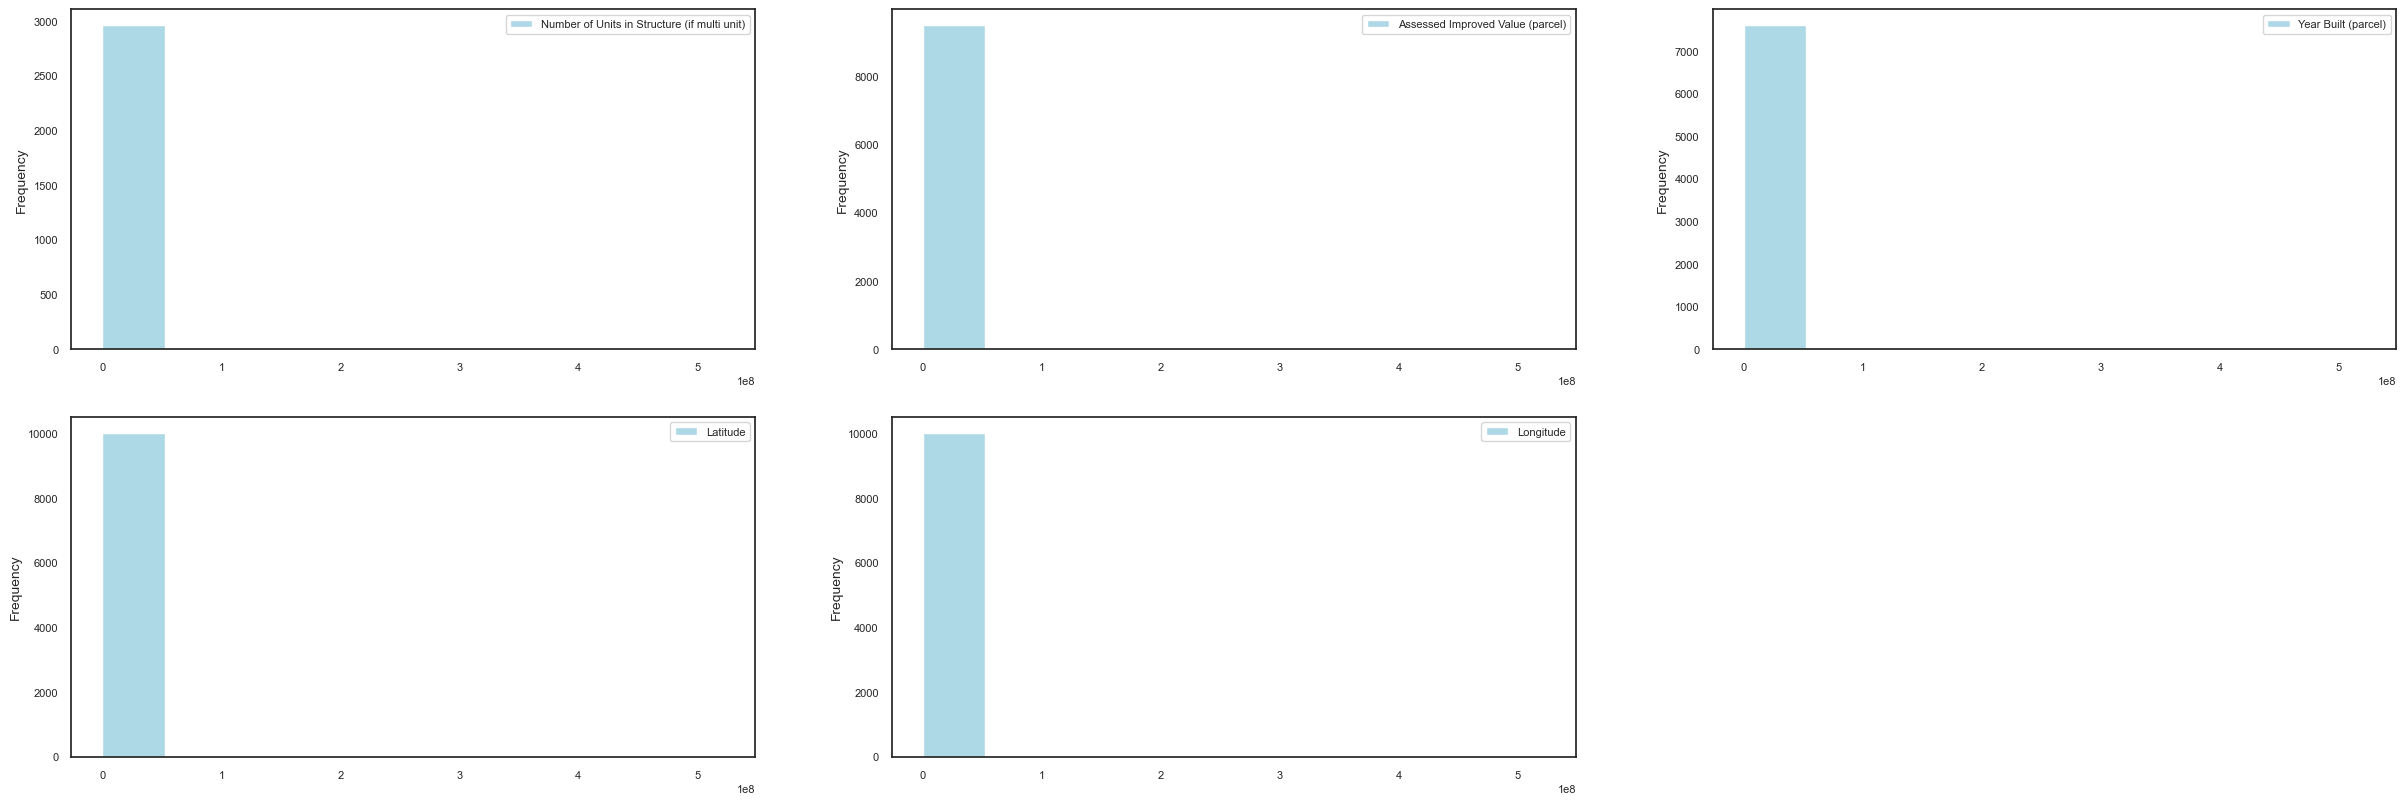

In [ ]:
plt.close()
plt.figure()
plt.rcParams.update({'font.size': 22})
df[numeric_col].plot(kind='hist', subplots=True, figsize=(30,15), layout=(3,3), sharex=False, sharey=False, color = 'lightblue')
plt.savefig('cal-wildfires-DQR-NumericFeatures-histograms_all.pdf')
plt.show()

### For the "Units in Structure" column

-> An initial histogram was made 

-> However as presented below, an outlier value of '6101' in the column's data makes the chart unreadable for the remaining values/data

-> Therefore, I created another 2 histograms of this column. One histogram is from units ranging from 0-100 and the other histogram is the outlier value. This was intentional as I preferrably didn't want to exclude the outlying data. 

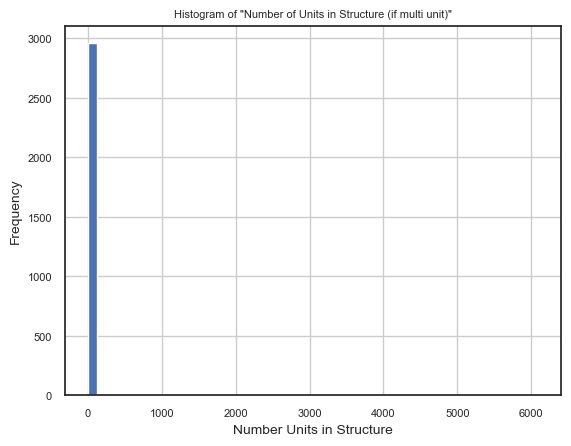

In [ ]:
plt.close()

# My original histogram for Units in Structure
histogram_structureunits_1 = df['Number of Units in Structure (if multi unit)'].hist(bins=50)

histogram_structureunits_1.set_title('Histogram of "Number of Units in Structure (if multi unit)"')
histogram_structureunits_1.set_xlabel('Number Units in Structure')
histogram_structureunits_1.set_ylabel('Frequency')
plt.savefig('cal-wildfires-DQR-NumericFeatures-histograms_structureunits_original.pdf')
plt.show()

Here we can see in the histogram of 'Number of Units in Structure' that there is a clear outlier stretching the graph's distribution to more than 6000 units on it's x axis. Therefore, I have taken the initative to cut out any outliers from the data so as we can visualise the data's distribution in a clear manner through the use of 2 seperate graphs. As shown in the diagram, a large majority of the data ranges from 0 to 20 and I took the first histogram to display values under 100 units.

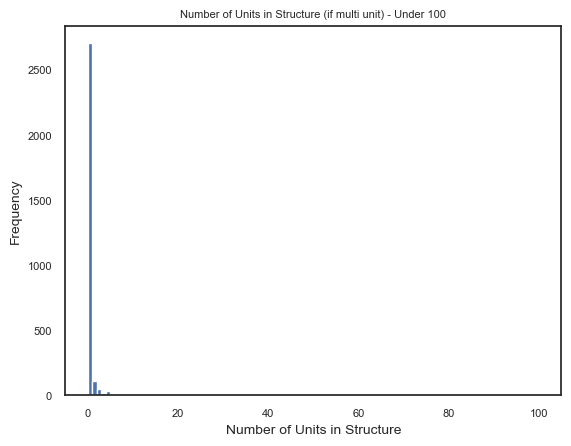

In [ ]:
# Reference - https://realpython.com/python-histograms/ & Python OOP module
# Here is my histogram for 'Units in Structure', where the limit of units is set to 100

plt.close()


units_to_100 = df['Number of Units in Structure (if multi unit)'].astype(float).clip(upper=100)

plt.hist(units_to_100, bins=101)
plt.xlabel('Number of Units in Structure')
plt.ylabel('Frequency')
plt.title('Number of Units in Structure (if multi unit) - Under 100')
plt.savefig('cal-wildfires-DQR-NumericFeatures-histograms_structureunits_to100.pdf')
plt.show()


Here we can see from this graph of units under 100, that the data is distributed in an exponential manner, with the mode frequency of the data having 0 units. This graph displaying the number of units under 100 units in a structure, allows us to see in a better manner that a majority of the 'Number of Units in Structure (multi unit)' feature's data range from 0 to 10 and a singular entry being 20 units.

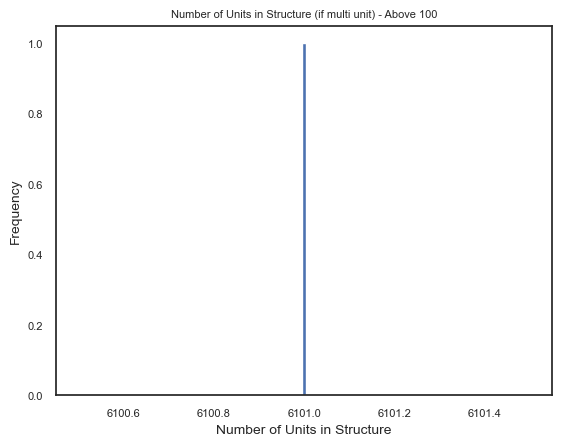

In [ ]:
plt.close()

# Here is my histogram for 'Units in Structure', where the starting number of units is set to 100

histogram_structureunits_above100 = df[df['Number of Units in Structure (if multi unit)'] > 100]

plt.hist(histogram_structureunits_above100['Number of Units in Structure (if multi unit)'], bins=101)
plt.xlabel('Number of Units in Structure')
plt.ylabel('Frequency')
plt.title('Number of Units in Structure (if multi unit) - Above 100')
plt.savefig('cal-wildfires-DQR-NumericFeatures-histograms_structureunits_above100.pdf')
plt.show()


Using the histogram to display number of units in each structure where the number of units in the structure is greater than 100, allows me to identify that there is only one outlier in the data. This outlier demonstrated that the data of the feature was distorted by a row entry of '6101' units.

### For the "Assessed Improved Value (parcel)" column

-> I have previous statistics to show the data containing a standard deviation of "7018679.107", a min value of "0" and a max value of "522652568.0".  

-> I decided to breakdown the histogram into two sub category histograms for a better visualisation

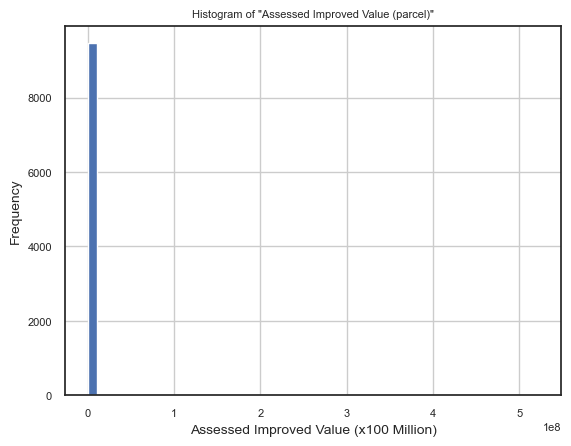

In [ ]:
plt.close()

# My original histogram for Assessed Improved Value column
histogram_assessedimprovedvalue_1 = df['Assessed Improved Value (parcel)'].hist(bins=50)


histogram_assessedimprovedvalue_1.set_title('Histogram of "Assessed Improved Value (parcel)"')
histogram_assessedimprovedvalue_1.set_xlabel('Assessed Improved Value (x100 Million)')
histogram_assessedimprovedvalue_1.set_ylabel('Frequency')
plt.savefig('cal-wildfires-DQR-NumericFeatures-histograms_assessedimprovedvalue_original.pdf')
plt.show()

Similar to the previous histogram, here we see the initial histogram for 'Assessed Improved Parcel' contains large outliers that stretch the visual of the graph out to a value of 500 million on the x axis. However, to resolve this issue I have decided to break down the 'Assessed Improved Value (parcel)' into 2 graphs, split up based on values under 1,000,000 and over 1,000,000 to depict a clearer visual of the data 

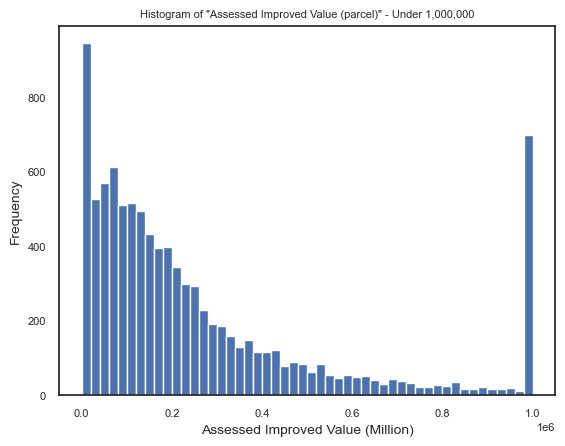

In [ ]:
plt.close()

value_under_1m = df['Assessed Improved Value (parcel)'].clip(upper=1_000_000)

plt.hist(value_under_1m, bins=50)
plt.xlabel('Assessed Improved Value (Million)')
plt.ylabel('Frequency')
plt.title('Histogram of "Assessed Improved Value (parcel)" - Under 1,000,000')
plt.savefig('cal-wildfires-DQR-NumericFeatures-histograms_assessedimprovedvalue_upto1m.pdf')
plt.show()


In the histogram of the 'Assessed Improved Value - Under 1,000,000' we can see an Exponential shaped graph, with an outlier of a large quantity of data being around 1 million in value. From this graph I would expect to conclude that a large proportion of the houses under a value of 1 million USD, lie below 200,000. We can also see the mode value is '0' which is an unrealistic value and will have to be converted to null and inferred later on

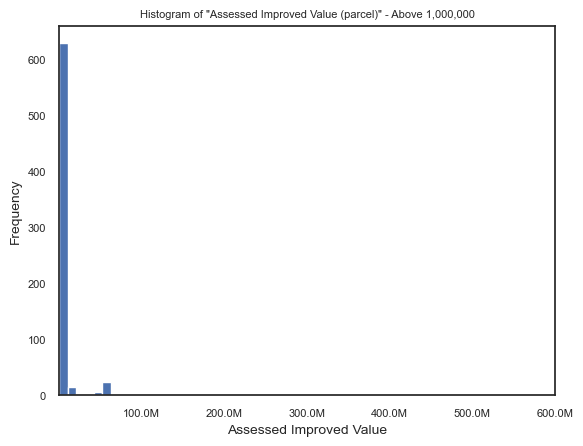

In [ ]:
plt.close()

# My histogram for Assessed Improved Value column, above the value of 1,000,000 to 600,000,000
histogram_assessedimprovedvalue_Above100 = df[df['Assessed Improved Value (parcel)'] > 1_000_000]['Assessed Improved Value (parcel)']

plt.hist(histogram_assessedimprovedvalue_Above100, bins=50)
plt.xlabel('Assessed Improved Value')
plt.ylabel('Frequency')
plt.title('Histogram of "Assessed Improved Value (parcel)" - Above 1,000,000')

plt.xlim(1_000_000, 600_000_000)
# Reference - https://www.geeksforgeeks.org/how-to-set-x-axis-values-in-matplotlib-in-python/ & https://stackoverflow.com/questions/11577665/change-x-axes-scale
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.savefig('cal-wildfires-DQR-NumericFeatures-histograms_assessedimprovedvalue_above1m.pdf')
plt.show()

In the histogram of 'Assessed Improved Value (parcel) - Above 1,000,000' we can see that there is outliers that still expand the x-axis from 1,000,000 to 600,000,000, however, the large magority of the data seen in the graph correlates to a value of greater than 1,000,000 but less than 100,000,000

### I will create a histogram for the 'Year Built' column

-> Here you can see there is many '0' values present in the data

-> 0 is not a legible year and we will have to remove these imports as they distort the data

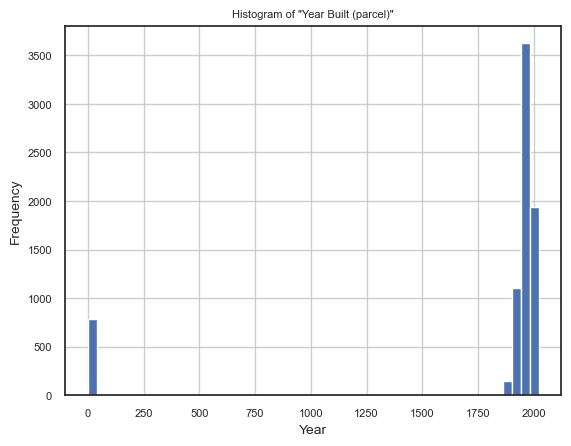

In [ ]:
plt.close()

histogram_yearbuilt_original = df['Year Built (parcel)'].hist(bins=50)

histogram_yearbuilt_original.set_title('Histogram of "Year Built (parcel)"')
histogram_yearbuilt_original.set_xlabel('Year')
histogram_yearbuilt_original.set_ylabel('Frequency')
plt.savefig('cal-wildfires-DQR-NumericFeatures-histograms_yearbuilt_original.pdf')
plt.show()

Similar to the previous histograms, here we see the initial histogram for 'Year Built' contains outliers that stretch the visual of the graph on the x-axis. A large collection of the data's Year Built was set to a value of '0', however this is not a valid year. Therefore I will create a histogram of this feature without 0 values

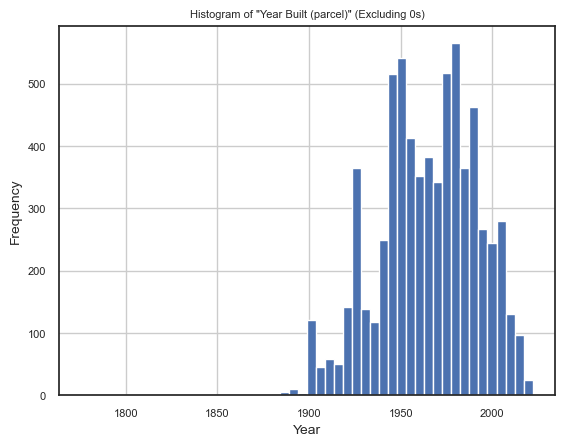

In [ ]:
plt.close()

filtered = df[df['Year Built (parcel)'] != 0]

# Plot the histogram for the filtered data
histogram_yearbuilt_without0 = filtered['Year Built (parcel)'].hist(bins=50)

# Set title and labels
histogram_yearbuilt_without0.set_title('Histogram of "Year Built (parcel)" (Excluding 0s)')
histogram_yearbuilt_without0.set_xlabel('Year')
histogram_yearbuilt_without0.set_ylabel('Frequency')

# Save and display the plot
plt.savefig('cal-wildfires-DQR-NumericFeatures-histograms_yearbuilt_without0.pdf')
plt.show()


Now that I have removed the year '0' from my 'Year Built' histogram, we can see that the data is clear and visualised alot more accurately on the plot. I think that this data looks like a 'Normal (unimodal)' distribution in relation to its data, with a majority of housing being built in 1950 to 1970

### Now I will create a histogram for the "Latitude" column

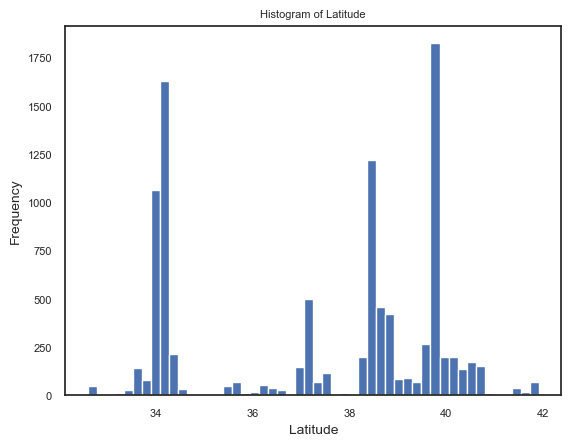

In [ ]:
plt.close()

# Code to create my latitude histogram
histogram_latitude = df['Latitude']

plt.hist(histogram_latitude, bins=50)
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Histogram of Latitude')
plt.savefig('cal-wildfires-DQR-NumericFeatures-histograms_latitude.pdf')
plt.show()

Here it can be clearly seen that the Latitude's histogram represents a 'Multimodal' distribution of data

### Now I will create a histogram for the "Longitude" column

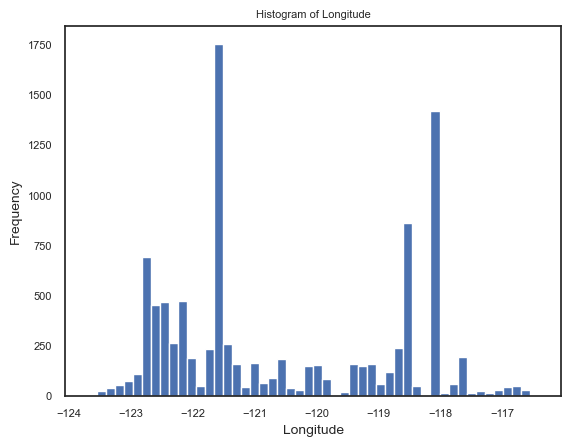

In [ ]:
plt.close()

# Code to create my latitude histogram
histogram_longitude = df['Longitude']

plt.hist(histogram_longitude, bins=50)
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.title('Histogram of Longitude')
plt.savefig('cal-wildfires-DQR-NumericFeatures-histograms_longitude.pdf')
plt.show()

It can be clearly seen that the Longitude's histogram represents a 'Multimodal' distribution of data too

### A box plot will be made for all continuous features

Box plots for all numerical columns

-> Here we can quickly see that this viewpoint reflects the invalid data (many zeroes, very large numbers and outliers)

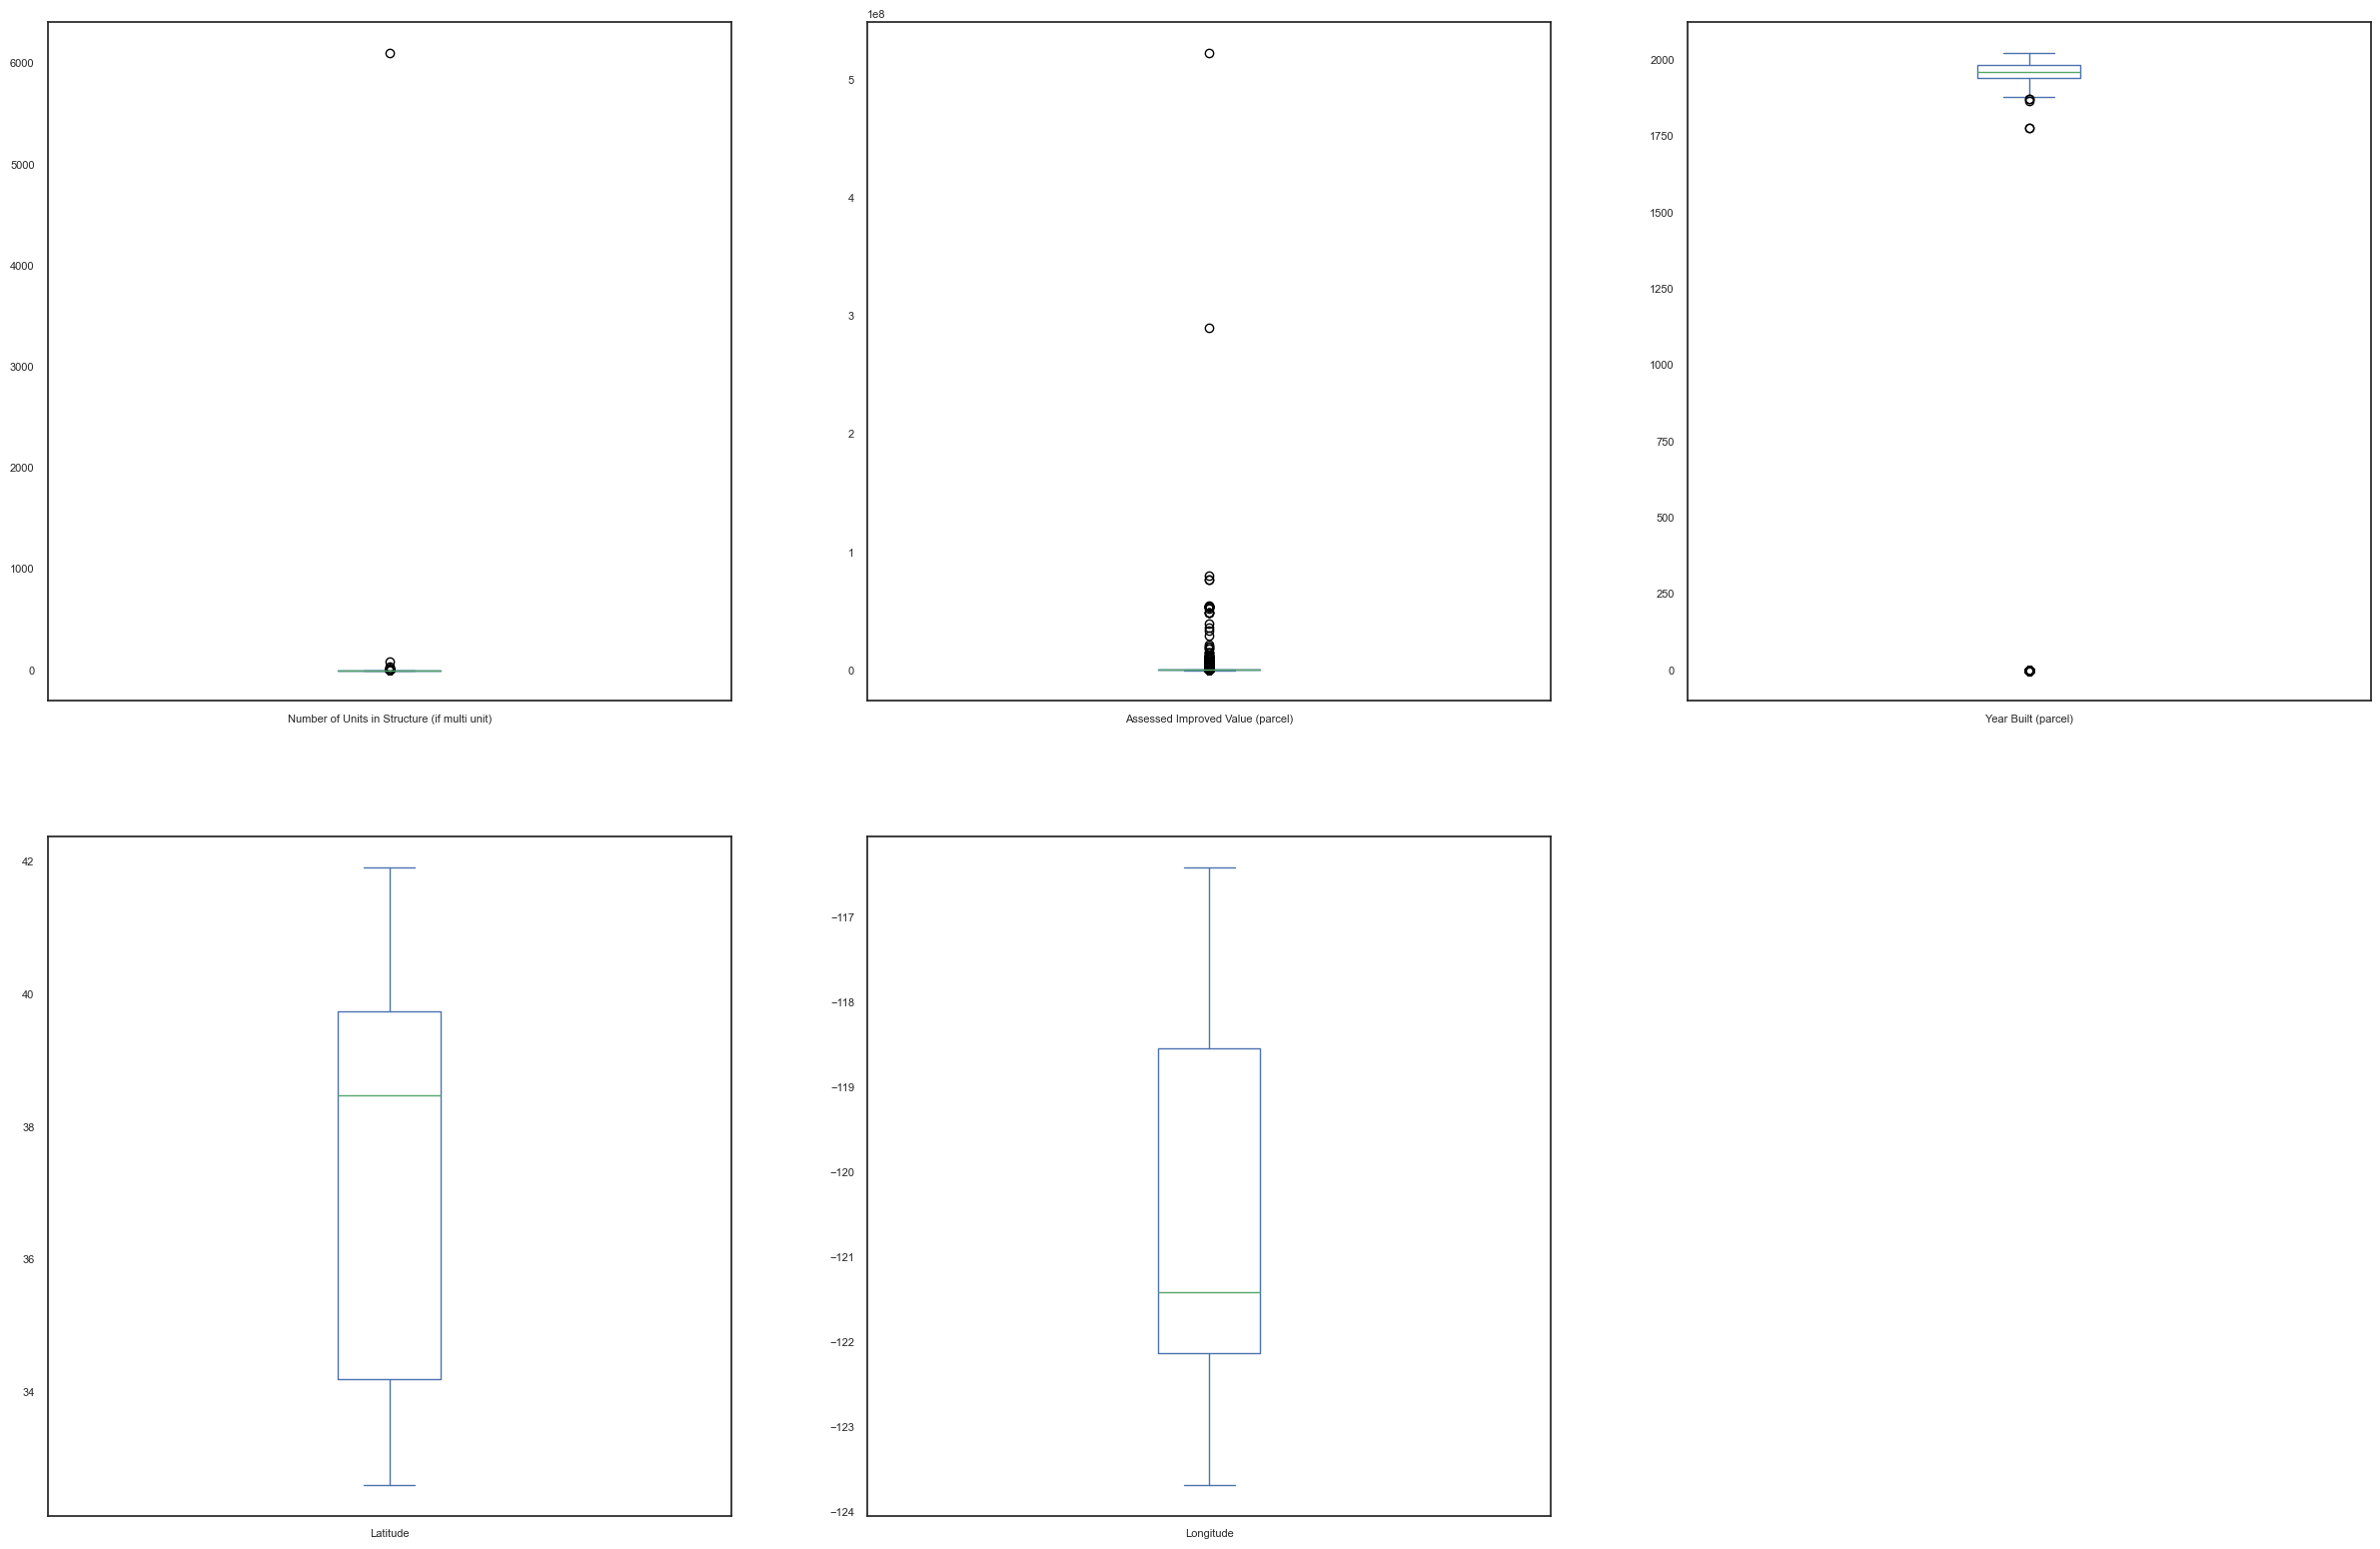

In [ ]:
plt.close()
df[numeric_col].plot(kind='box', subplots=True, figsize=(30,30), layout=(3,3), sharex=False, sharey=False)
plt.savefig('cal-wildfires-DQR-NumericFeatures-boxplots_all.pdf')
plt.show()
plt.close()

I will create a box plot for the 'Units in Structure' column

-> Here we can see that there is a significant outlier, that distorts our box plot for this feature

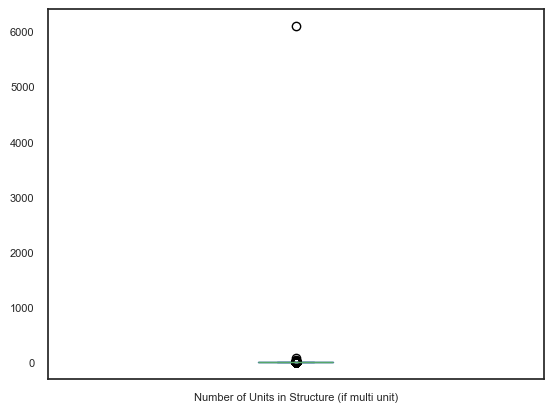

In [ ]:
df['Number of Units in Structure (if multi unit)'].plot(kind='box')
plt.savefig('cal-wildfires-DQR-NumericFeatures-boxplots_unitsinstructure_original.pdf')
plt.show()
plt.close()

Therefore we will clamp the box plot's data and cut out outliers for a more accurate visualisation

The lecture gave us an example for manually setting the clamp of the box, however I reference a tutorial online to do the same using a matplotlib inbuilt method. 

Hence, I ensure the whiskers are 1.5 and outliers can/are disregarded

Reference - https://www.codecademy.com/resources/docs/matplotlib/pyplot/boxplot

I make a boxplot of Units in Structure, setting the limit to 50 units. This limit is placed on the data as I know from previous data analysis that there is only 1 data entry in the column that has a value greater than 50 (this value is 6101, it was shown in the histogram)

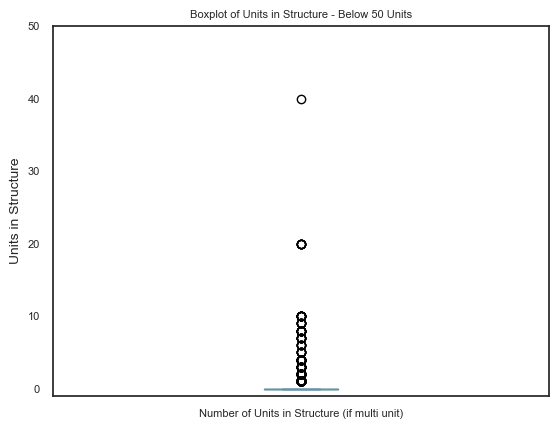

In [ ]:
df['Number of Units in Structure (if multi unit)'].plot(kind='box', whis=1.5, showfliers=True)
plt.ylim(-1, 50)
plt.ylabel('Units in Structure')
plt.title('Boxplot of Units in Structure - Below 50 Units')
plt.savefig('cal-wildfires-DQR-NumericFeatures-boxplots_unitsinstructure_upto50.pdf')
plt.show()
plt.close()

I will create the box plot for the 'Assessed Improved Value (parcel)' column

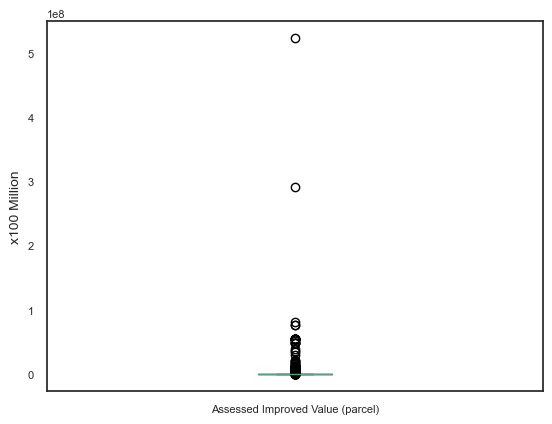

In [ ]:
df['Assessed Improved Value (parcel)'].plot(kind='box')
plt.ylabel("x100 Million")
plt.savefig('cal-wildfires-DQR-NumericFeatures-boxplots_assessedimprovedvalue_original.pdf')
plt.show()
plt.close()

Similarily to the 'Units in Structure' column, we will clamp the box plot's data and cut out outliers for a more accurate visualisation

However, I will do this through the methodology given to us in Lab 4


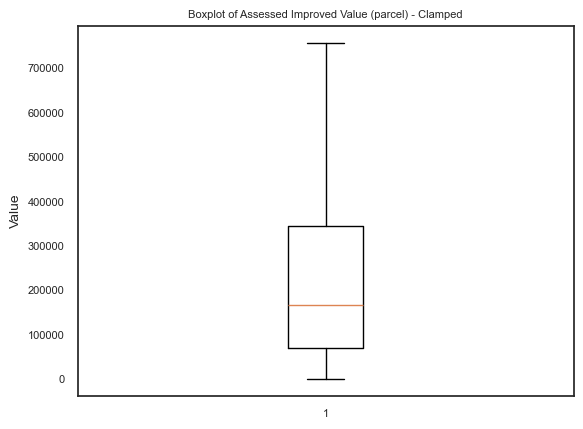

In [ ]:
data = df['Assessed Improved Value (parcel)'].dropna().to_numpy()

p_75 = np.percentile(data, 75)
p_50 = np.percentile(data, 50)
p_25 = np.percentile(data, 25)
iqr = p_75 - p_25

upper = data[data <= p_75 + 1.5 * iqr].max()
lower = data[data >= p_25 - 1.5 * iqr].min()

data_clamped = np.clip(data, lower, upper)

plt.boxplot(data_clamped)
plt.title('Boxplot of Assessed Improved Value (parcel) - Clamped')
plt.ylabel('Value')
plt.savefig('cal-wildfires-DQR-NumericFeatures-boxplots_assessedimprovedvalue_clamped.pdf')
plt.show()
plt.close()

I will create the box plot for the 'Year Built (parcel)' column

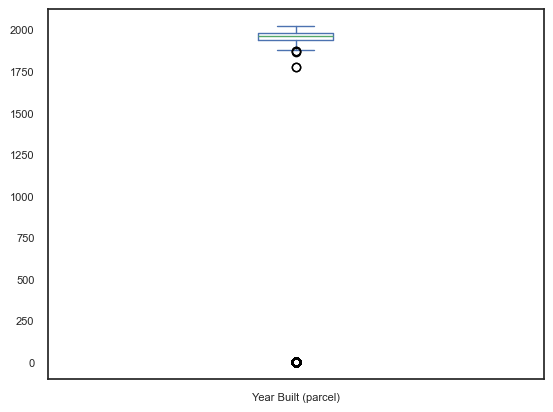

In [ ]:
df['Year Built (parcel)'].plot(kind='box')
plt.savefig('cal-wildfires-DQR-NumericFeatures-boxplots_yearbuilt_original.pdf')
plt.show()
plt.close()

Due to the outlier of Year Built that is equal to '0' which is not a factious number

I decided to redo the box plot and remove any 0 values that distort the graph, since they are irrelevant data

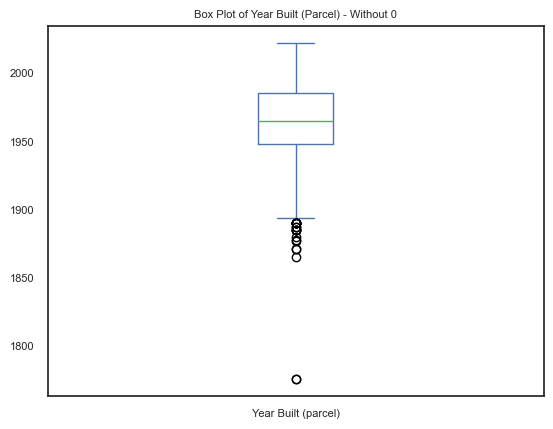

In [ ]:
filtered_df = df[df['Year Built (parcel)'] != 0]

# Plot the box plot for the filtered data
filtered_df['Year Built (parcel)'].plot(kind='box')
plt.title('Box Plot of Year Built (Parcel) - Without 0')
plt.savefig('cal-wildfires-DQR-NumericFeatures-boxplots_yearbuilt_without0.pdf')
plt.show()
plt.close()

I will create the box plot for the 'Latitude' column

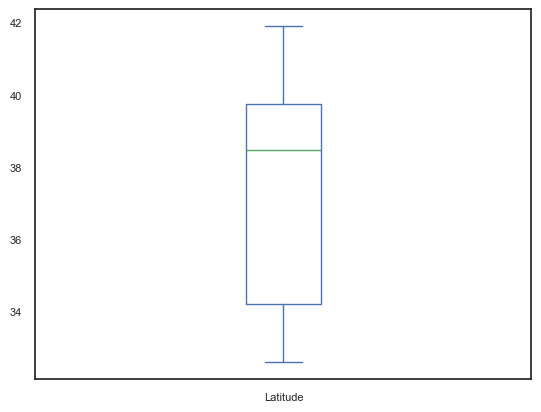

In [ ]:
df['Latitude'].plot(kind='box')
plt.savefig('cal-wildfires-DQR-NumericFeatures-boxplots_latitude_original.pdf')
plt.show()
plt.close()

I will create the box plot for the 'Longitude' column

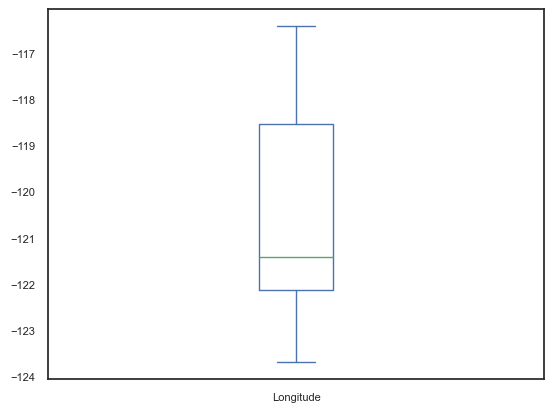

In [ ]:
df['Longitude'].plot(kind='box')
plt.savefig('cal-wildfires-DQR-NumericFeatures-boxplots_longitude_original.pdf')
plt.show()
plt.close()

### A bar plot will be made for all categorical features

Upon making this I realised that there is categorical features with 100's of unique values. Hence, you can not display a bar chart with all this data.

I thought about not making a bar chart for features that contained a large amount of unique values. However, instead I decided to continue to make these bar charts but only display their top 10 most used unique entries

Secondly, I noticed the top categories in alot of the features is 'NaN', due to me not removing them yet from the dataset (this will be done). Therefore, I will show two sets of charts one with NaN values included as the current dataset and one without

### Bar Plots with NaN Values

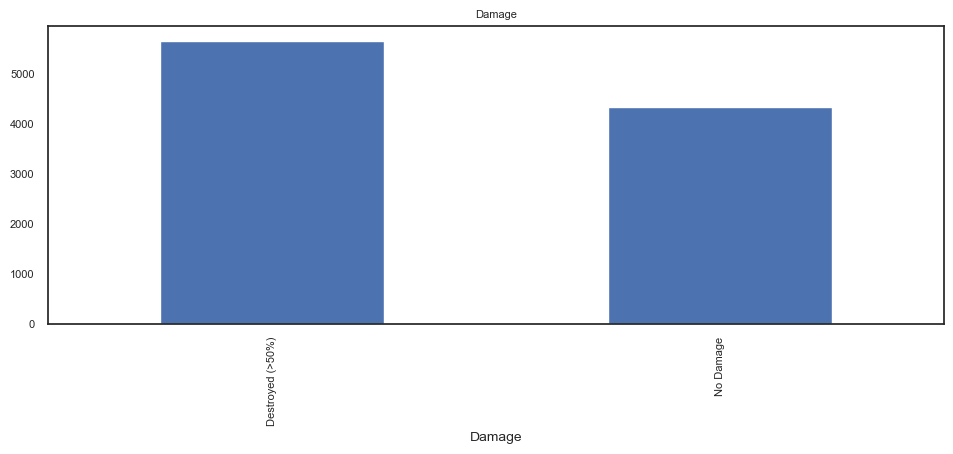

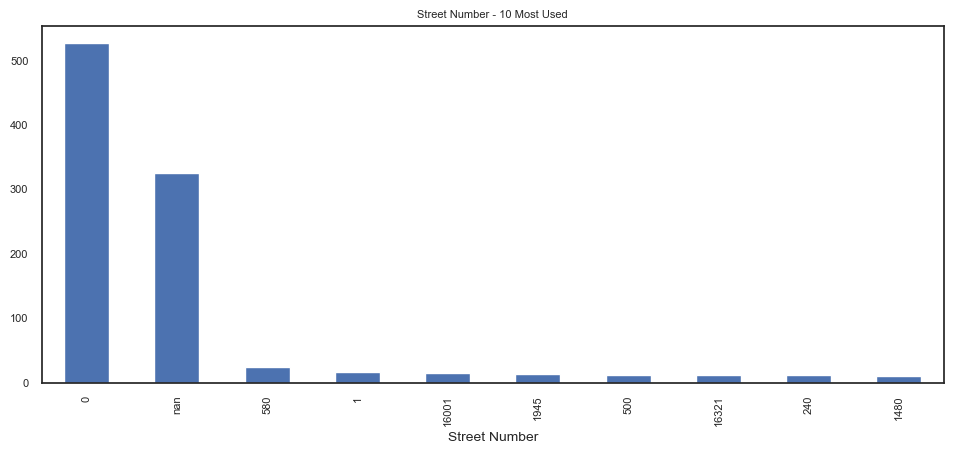

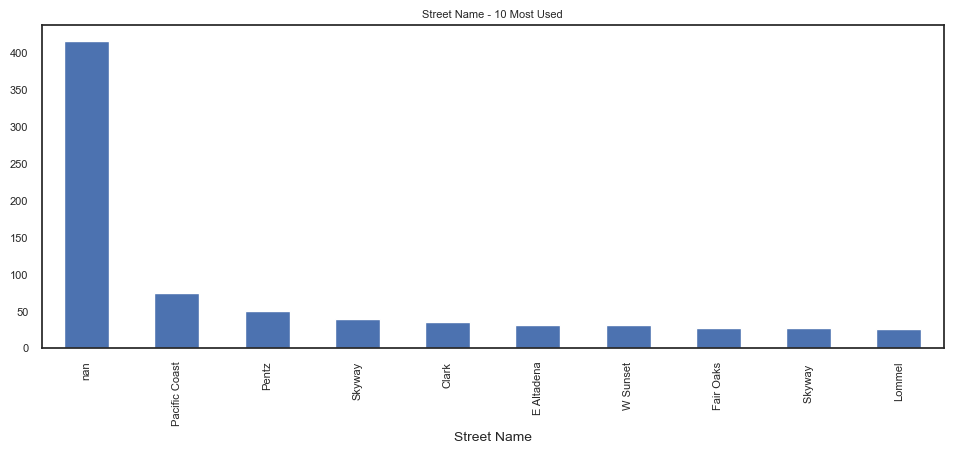

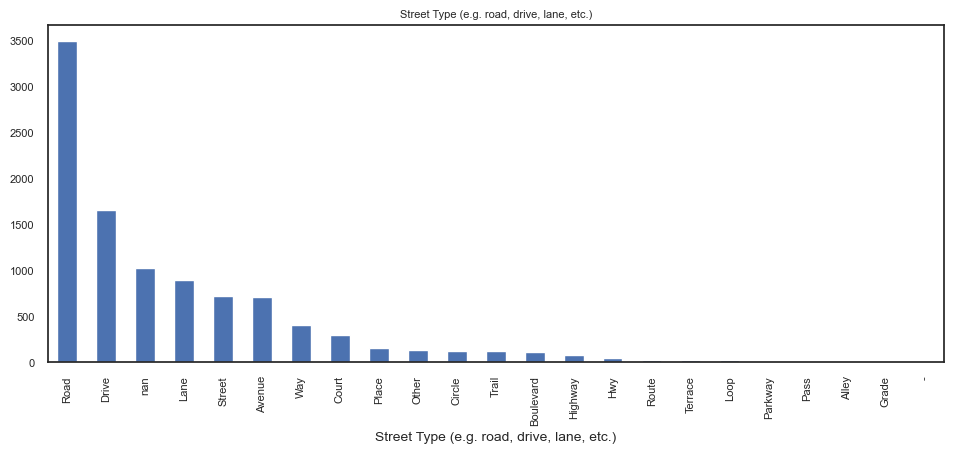

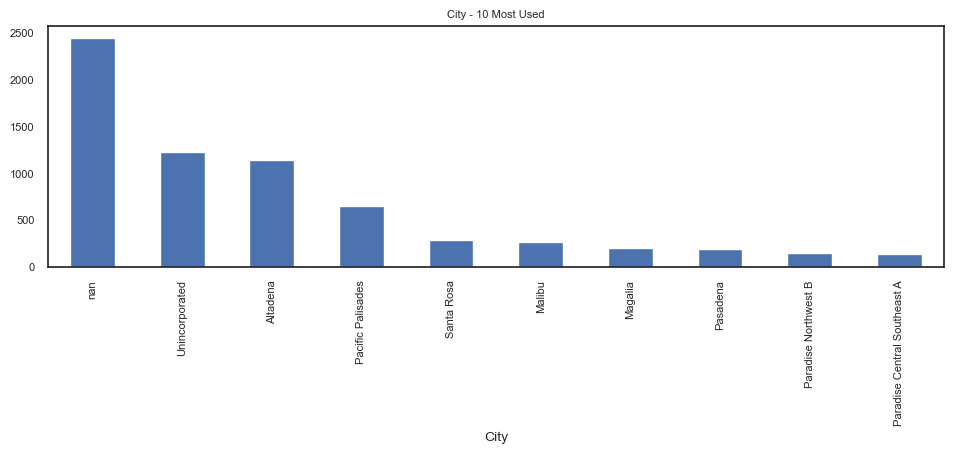

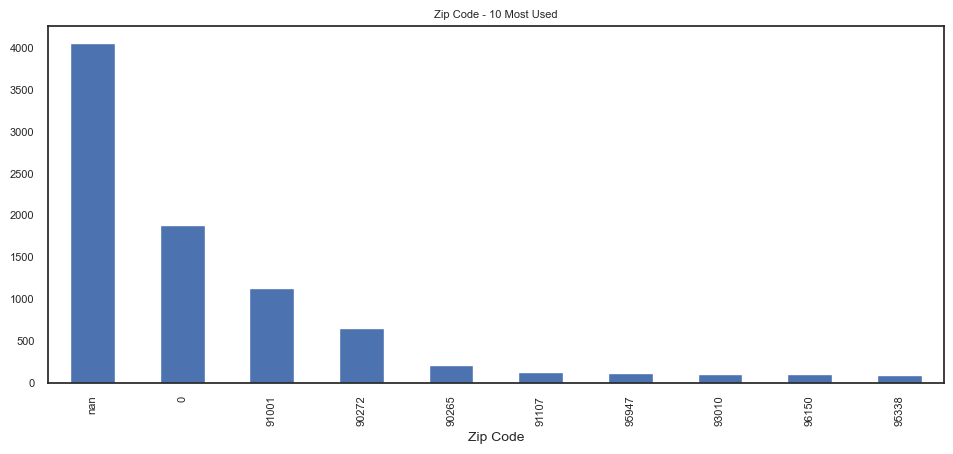

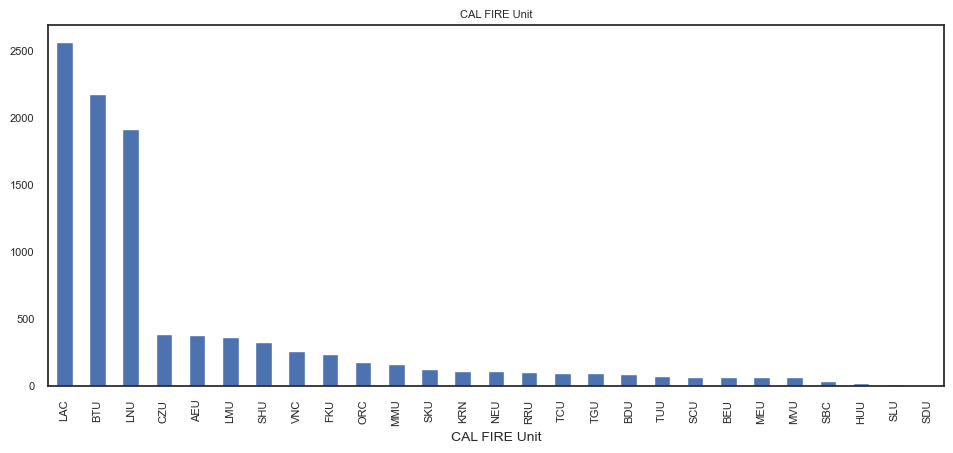

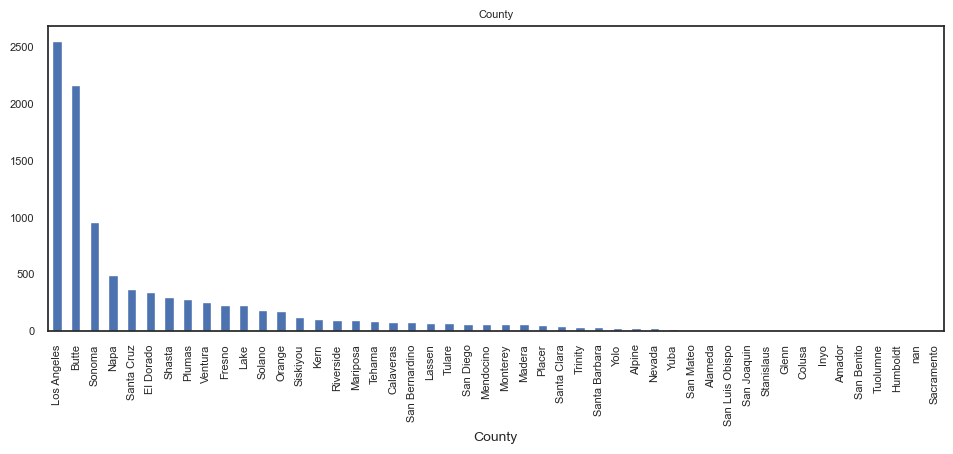

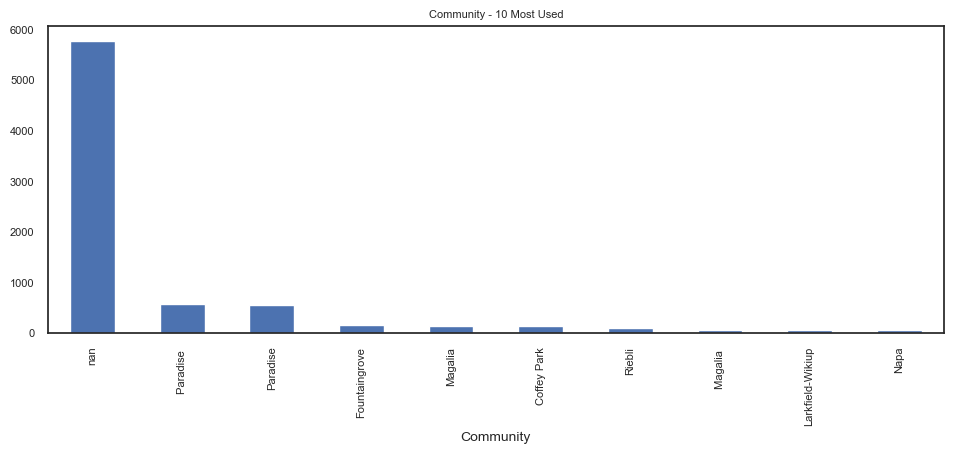

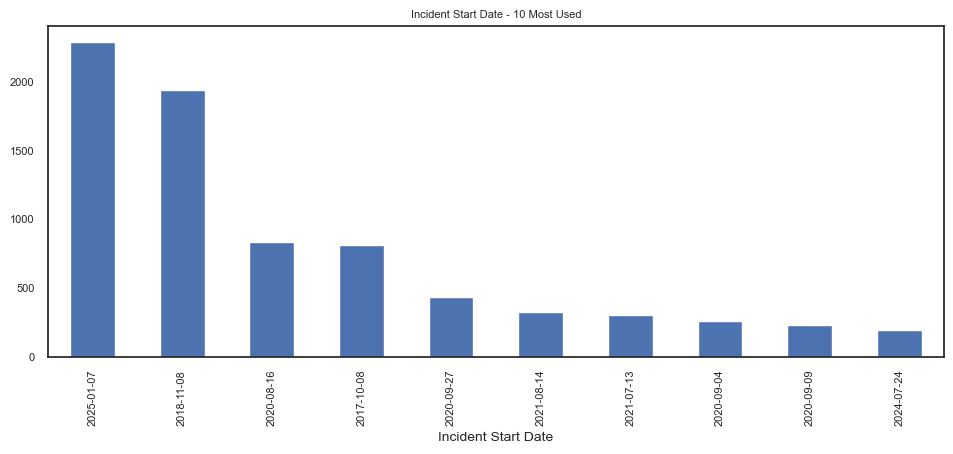

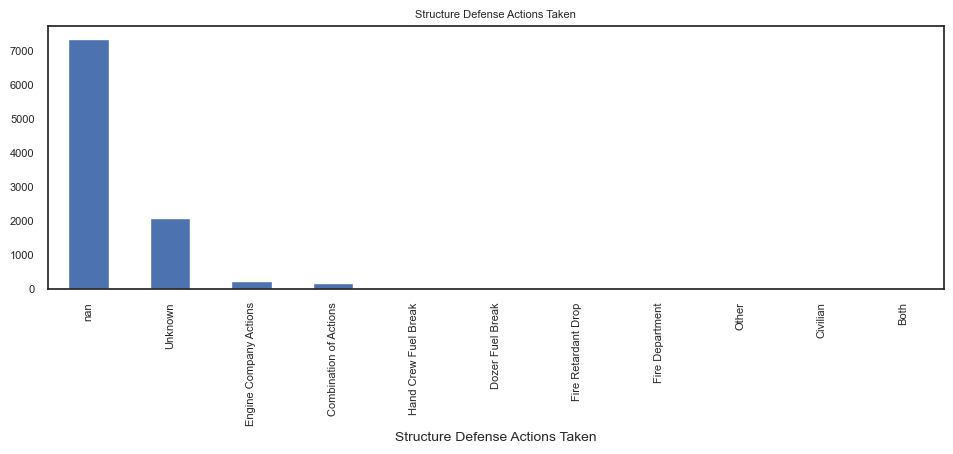

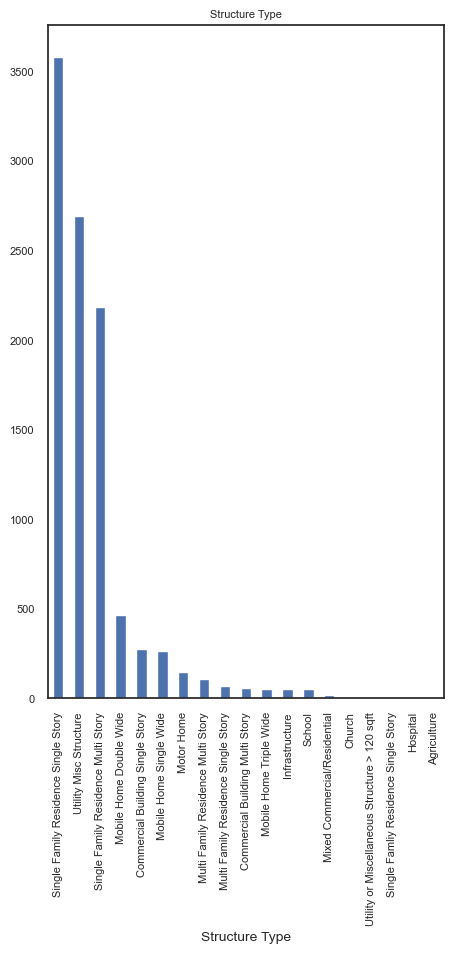

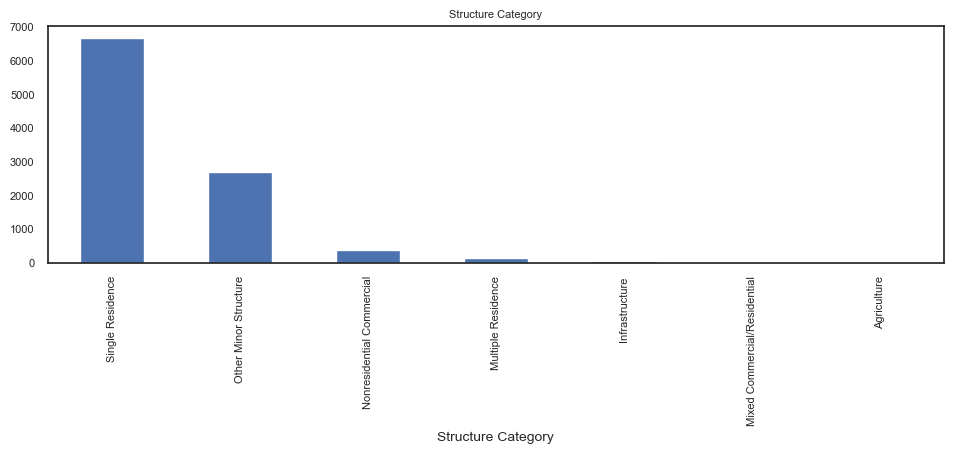

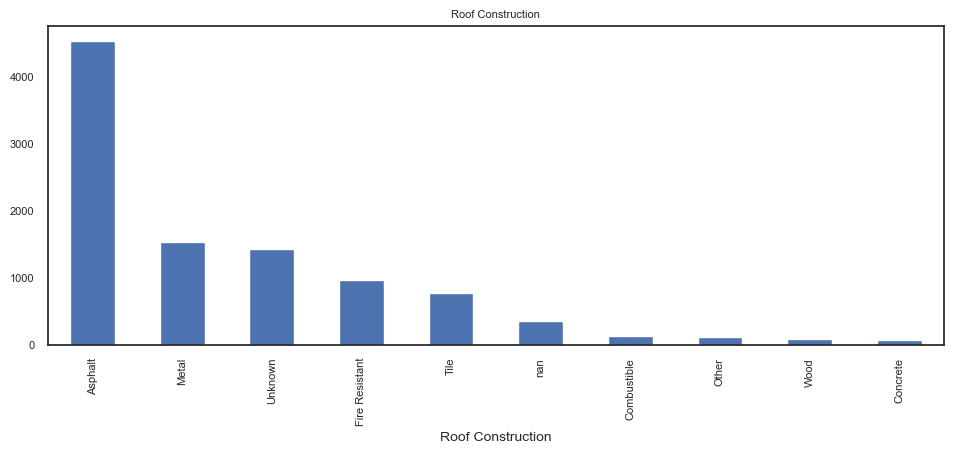

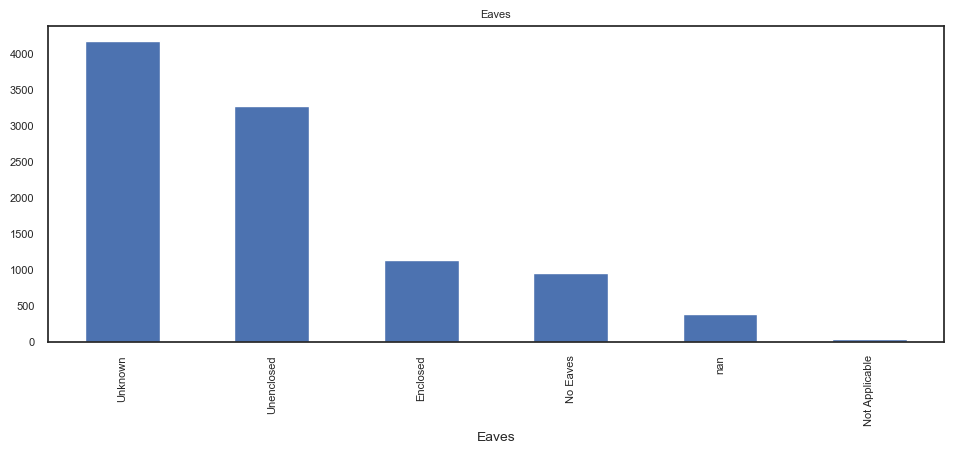

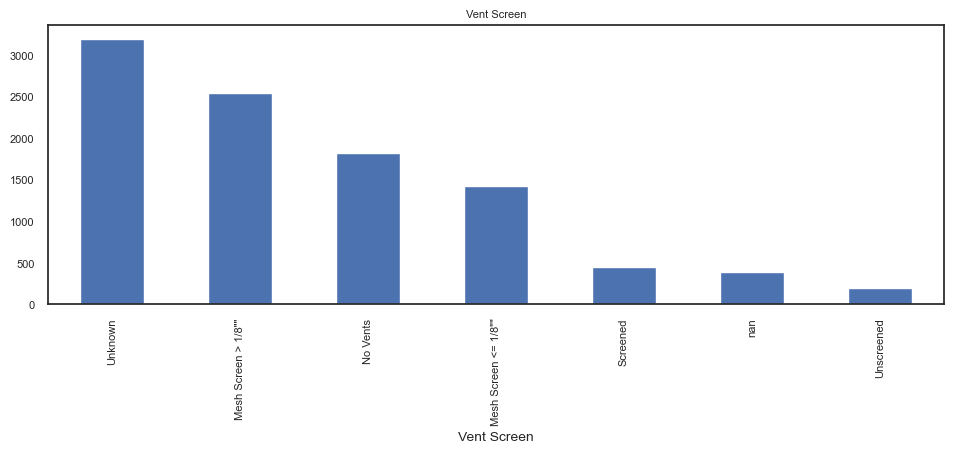

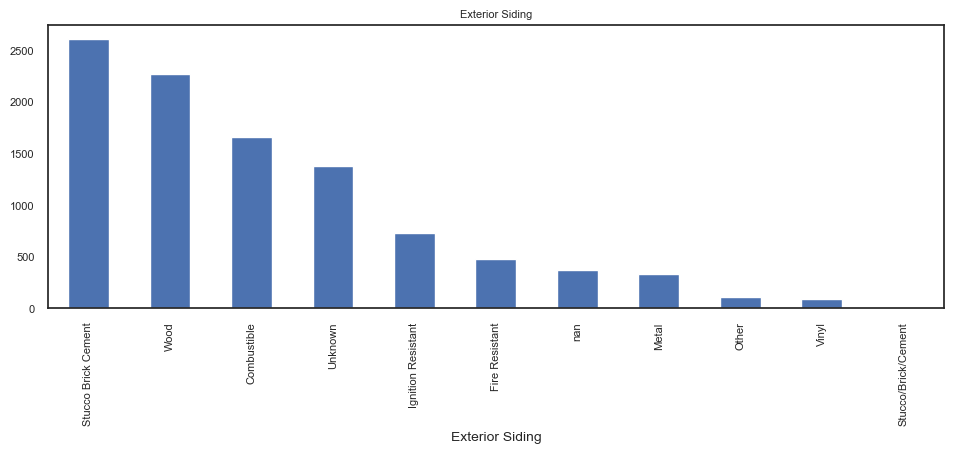

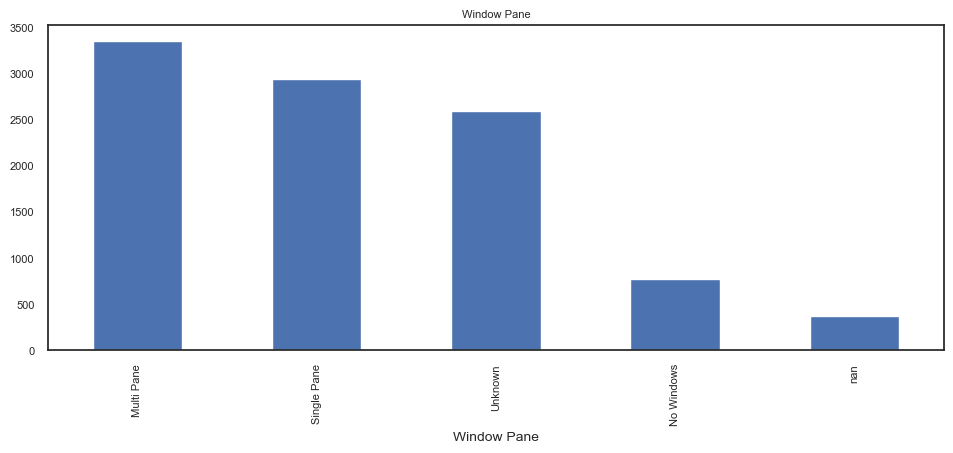

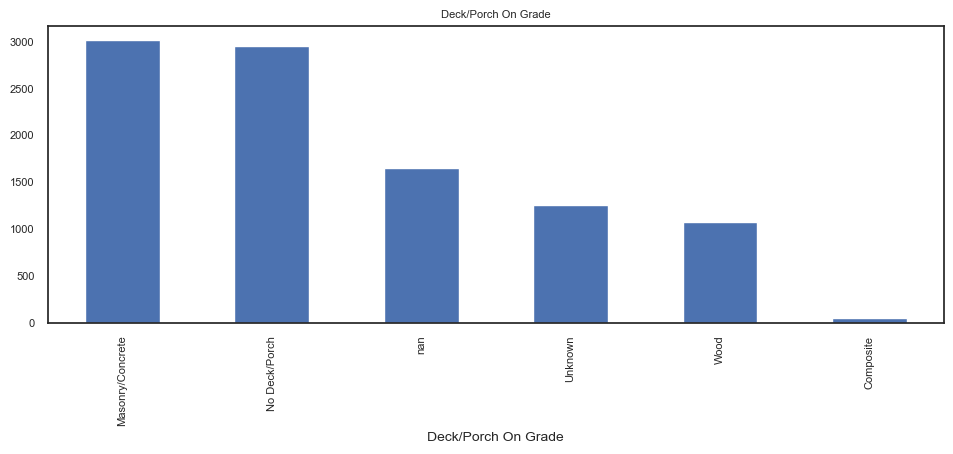

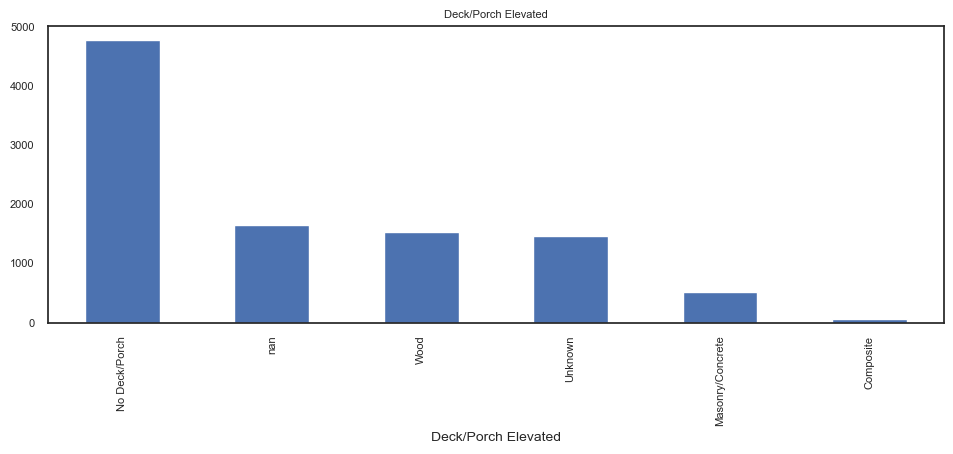

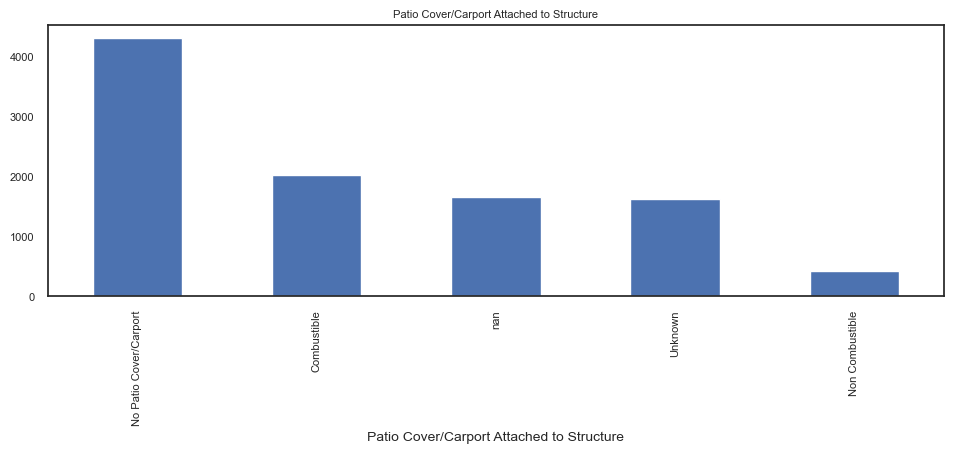

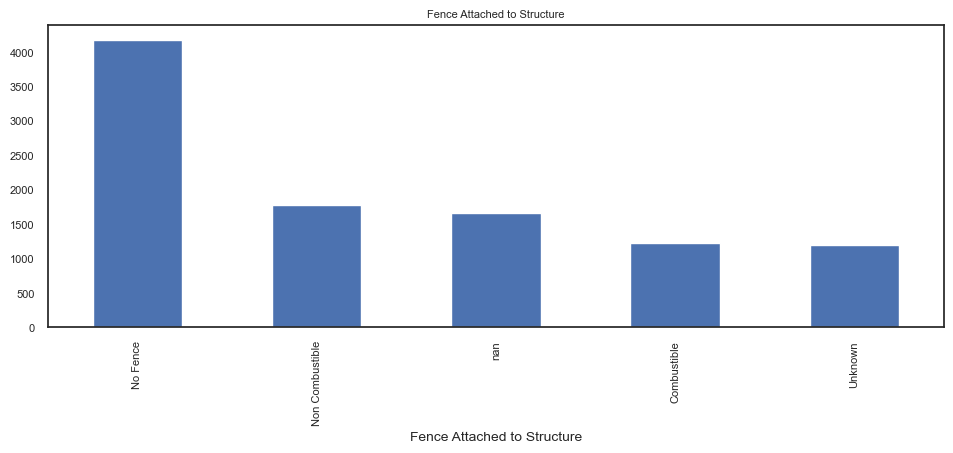

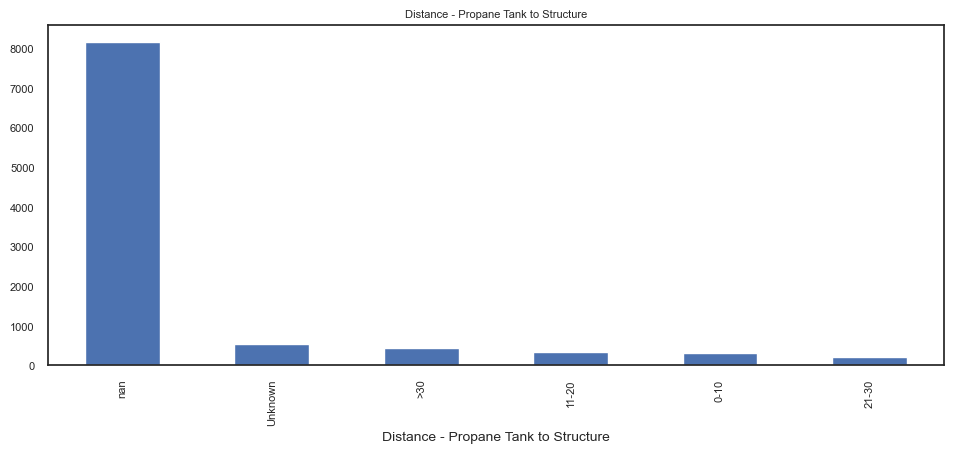

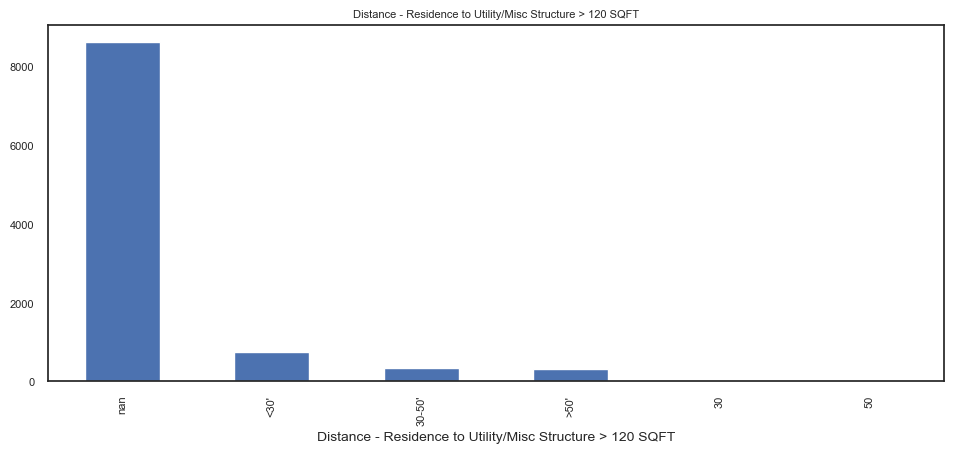

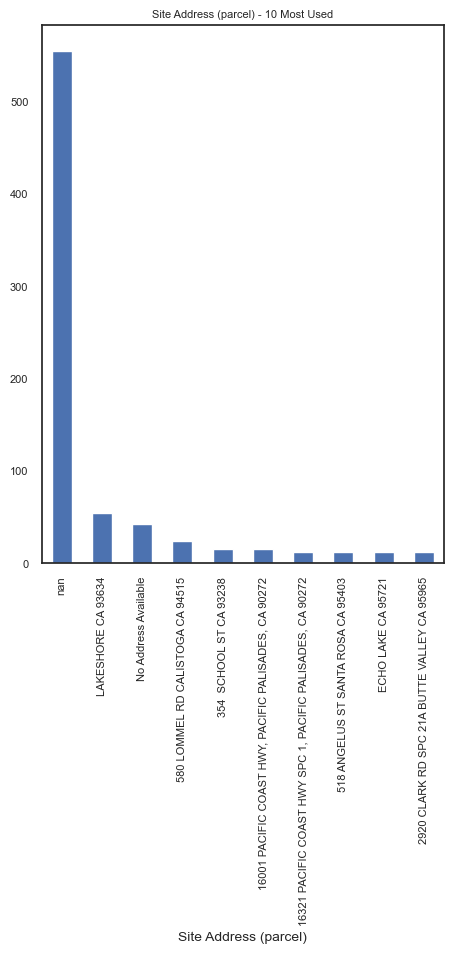

In [ ]:
#Reference - https://www.statology.org/pandas-bar-chart-top-10/
# Reference - https://mode.com/python-tutorial/counting-and-plotting-in-python

pp = PdfPages('cal-wildfires-DQR-CategoricalFeatures-barcharts_withNaN.pdf')


for column in category_col:
    value_counts = df[column].value_counts(dropna=False)
    
    #fix the issue with site address and struc type orientation
    if column == 'Site Address (parcel)' or column == 'Structure Type':
        custom_figsize = (5, 10) 
    else:
        custom_figsize = (10, 5)
    
    if df[column].nunique() <= 50: 
        ax = value_counts.plot(kind='bar', figsize=custom_figsize, title=column)
    else: 
        ax = value_counts.nlargest(10).plot(kind='bar', figsize=custom_figsize, title=f'{column} - 10 Most Used')
    
    fig = ax.get_figure()
    fig.tight_layout()
    pp.savefig(fig)
    plt.show()

pp.close()



### Bar Plots with No NaNs

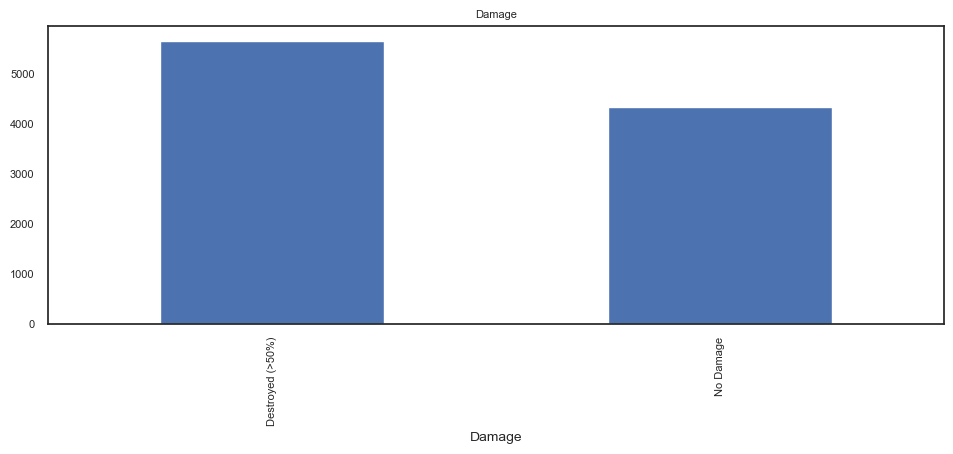

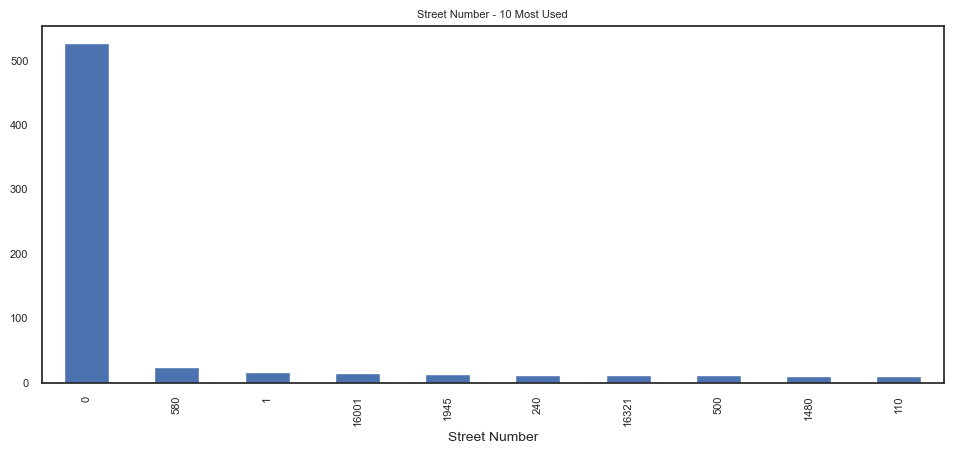

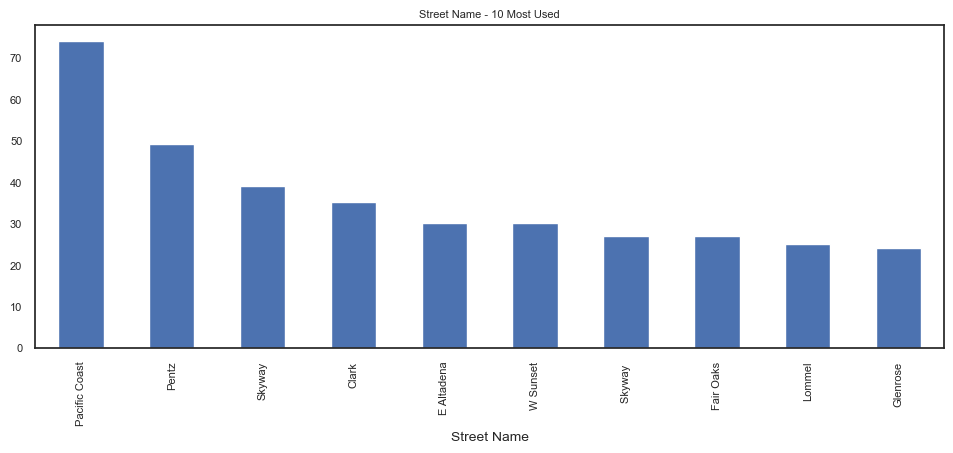

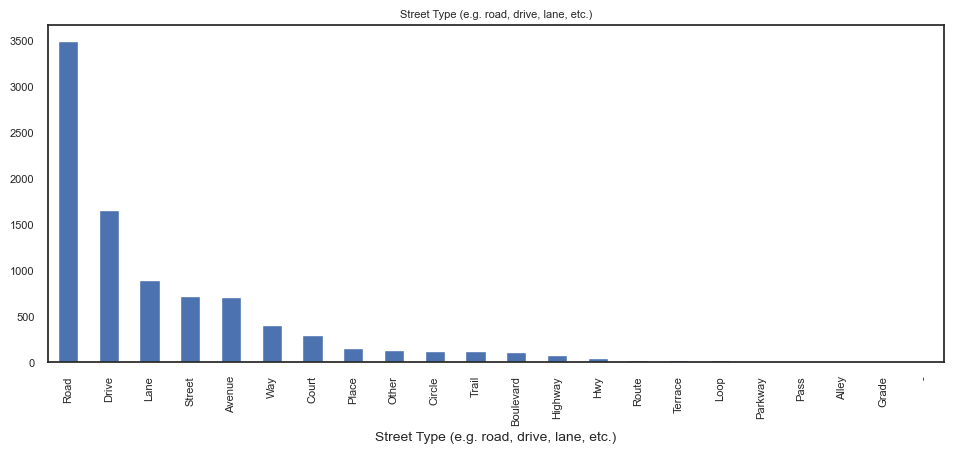

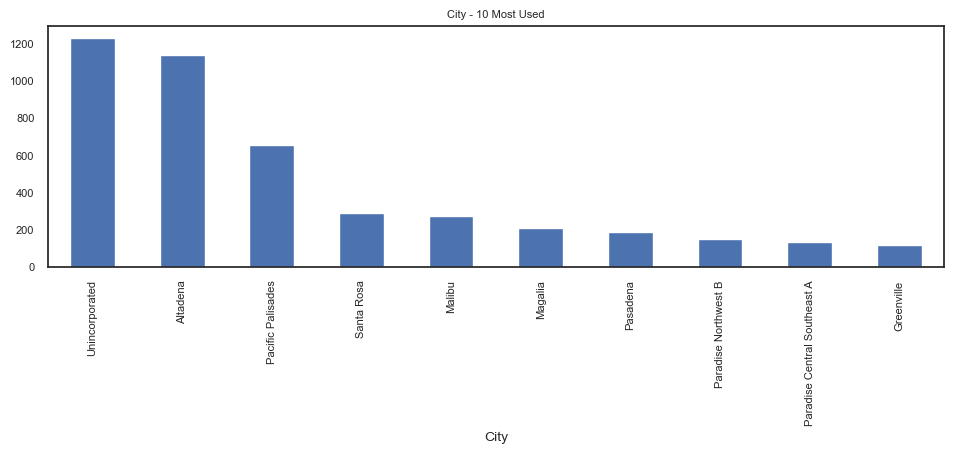

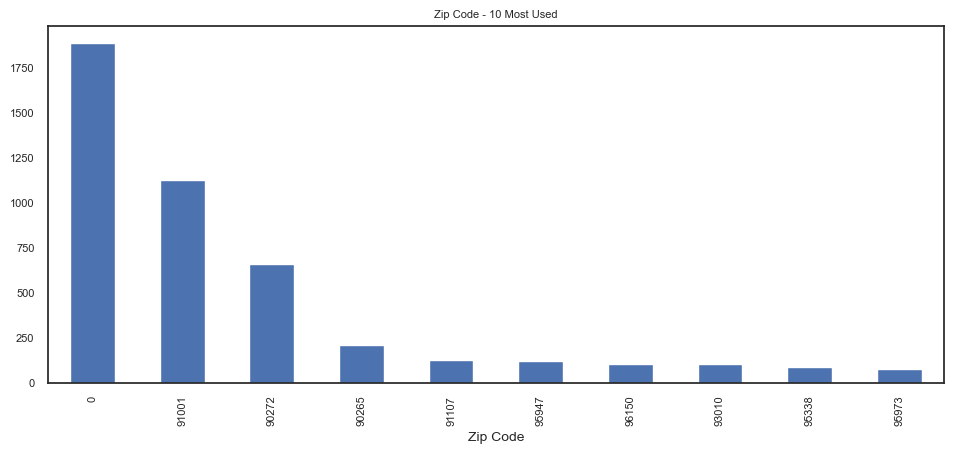

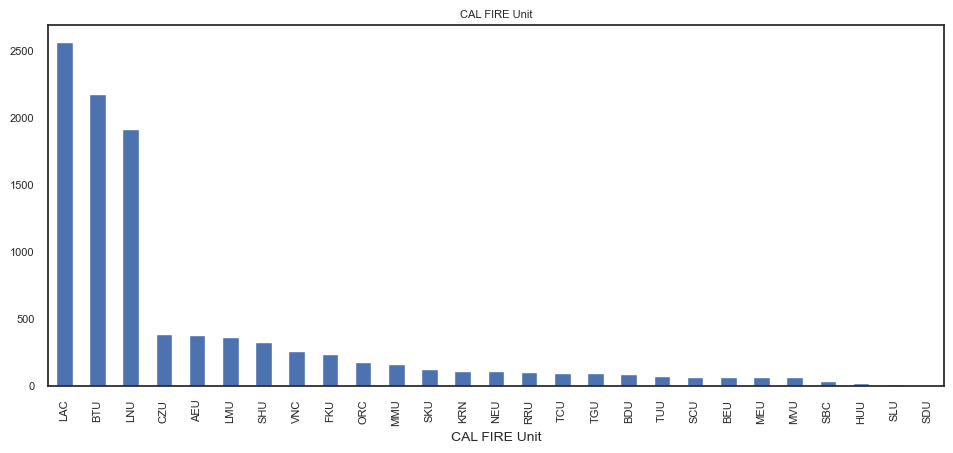

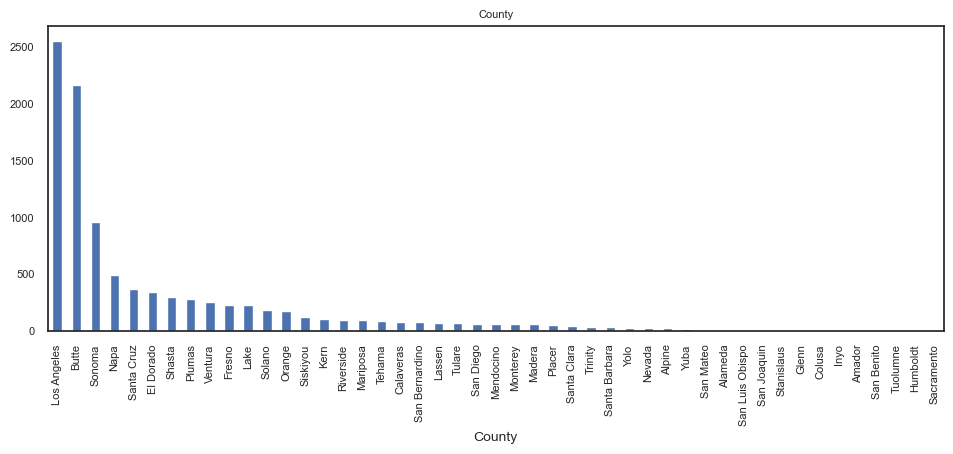

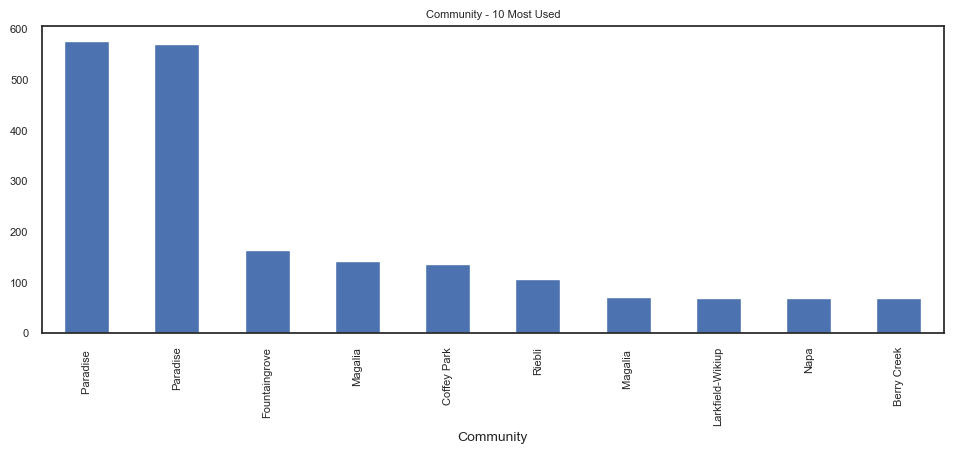

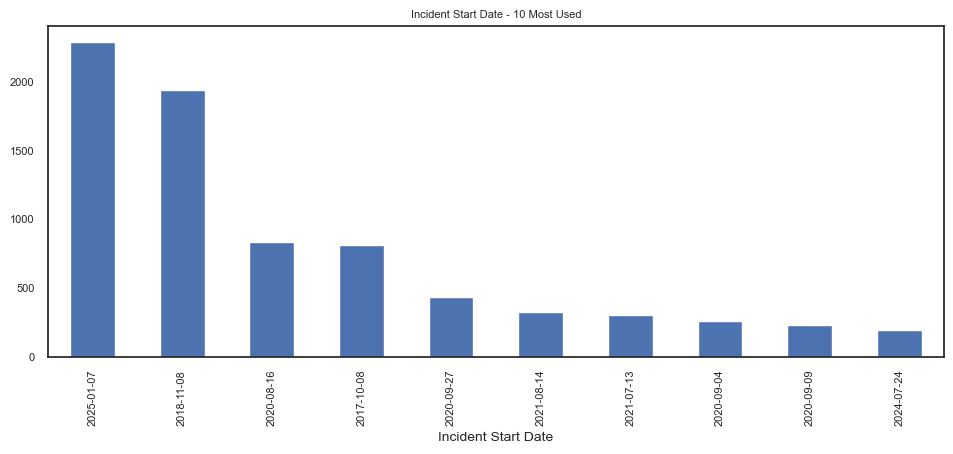

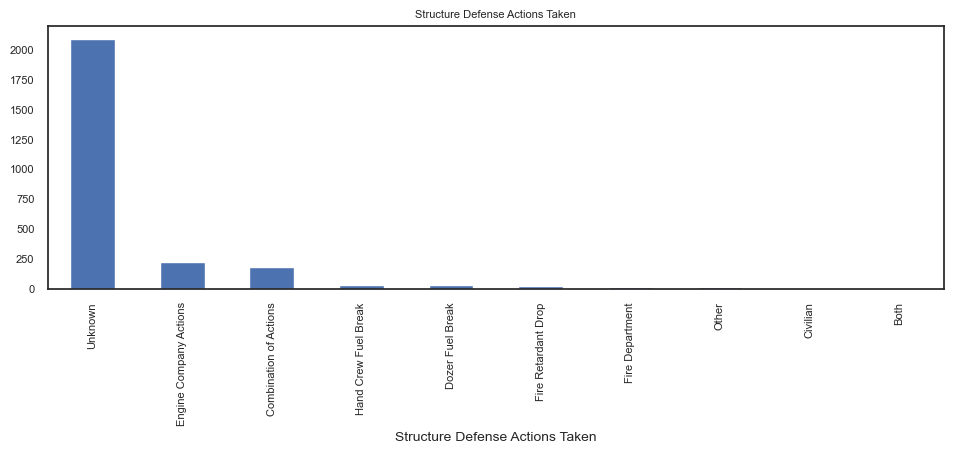

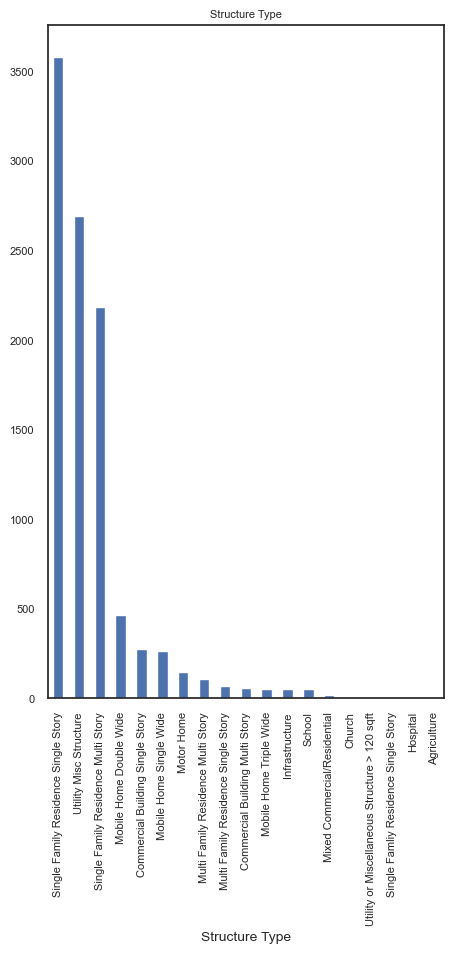

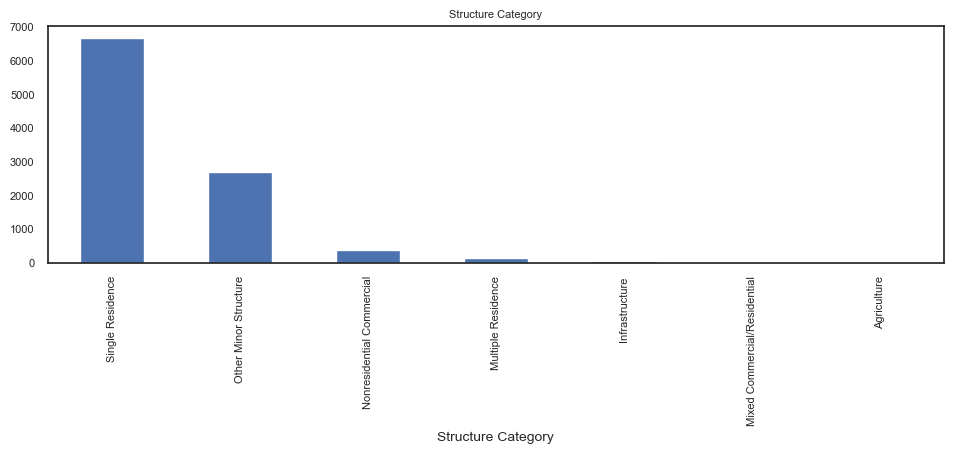

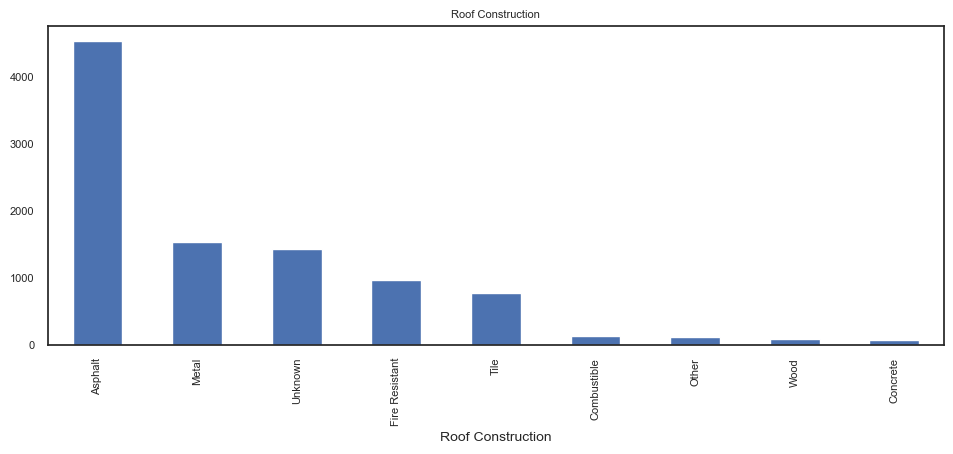

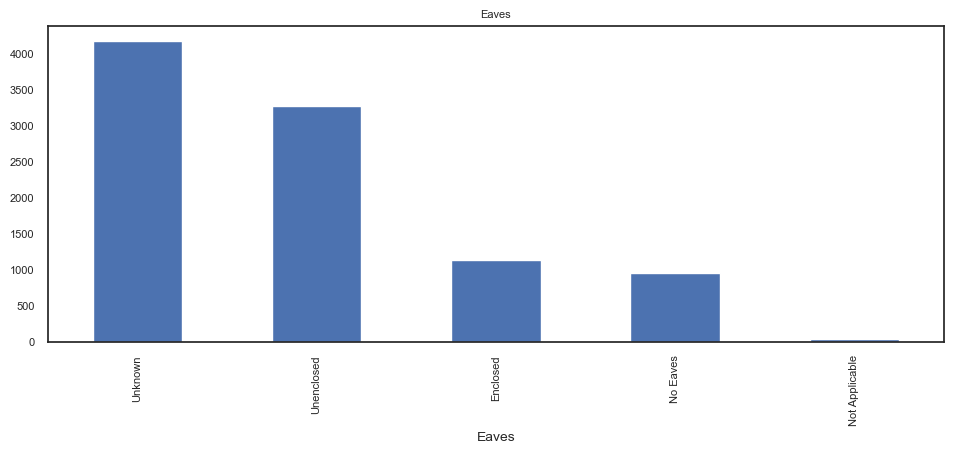

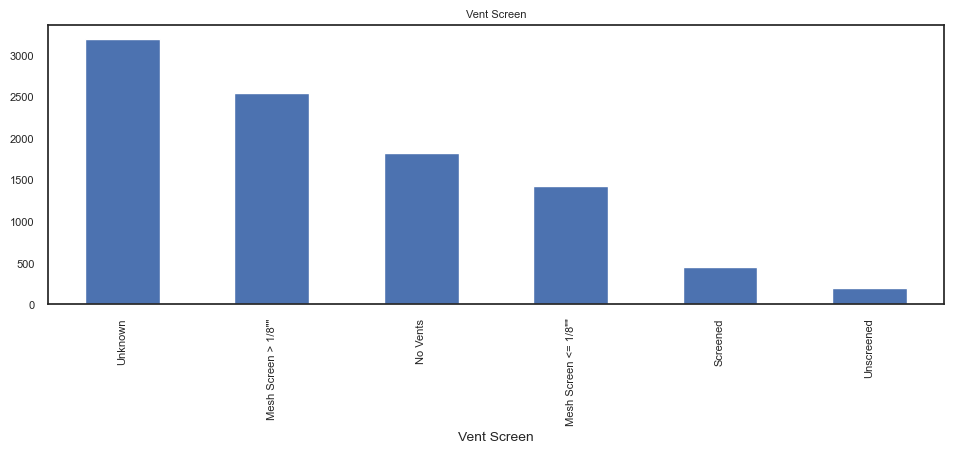

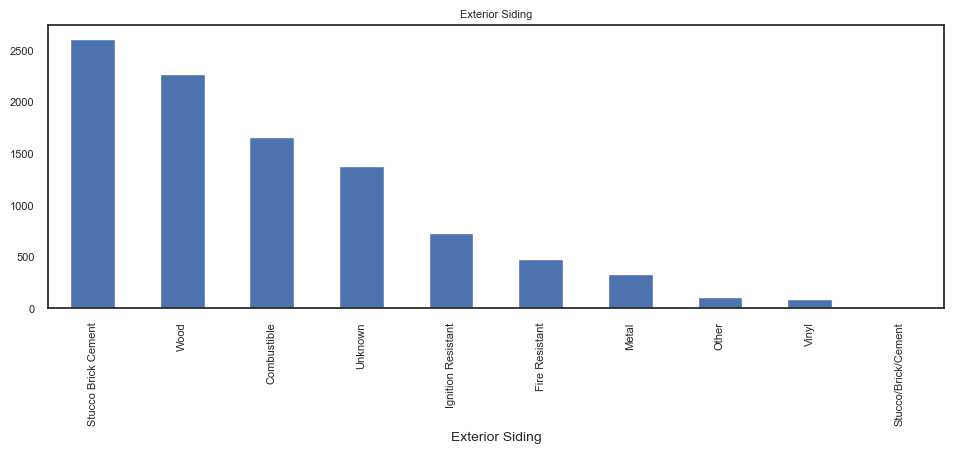

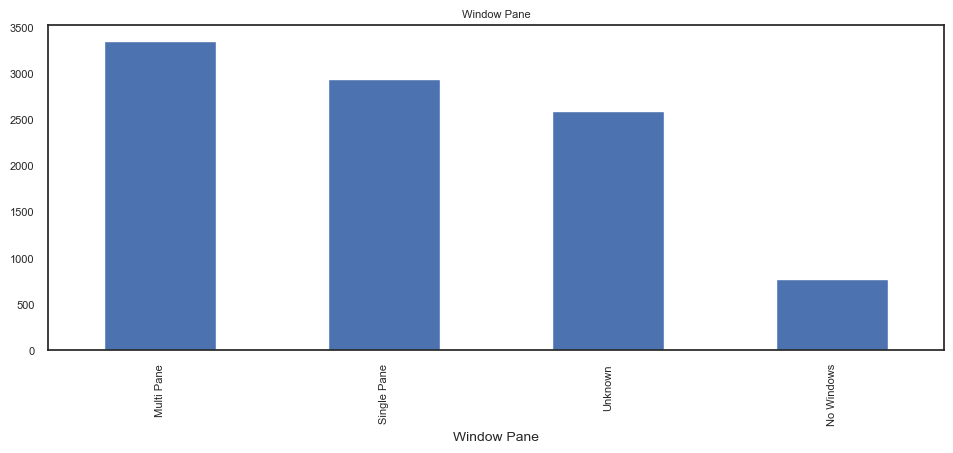

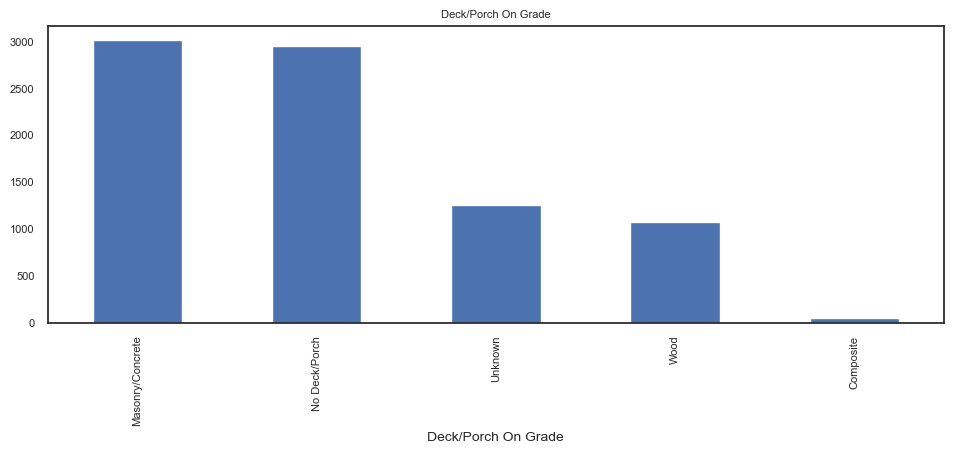

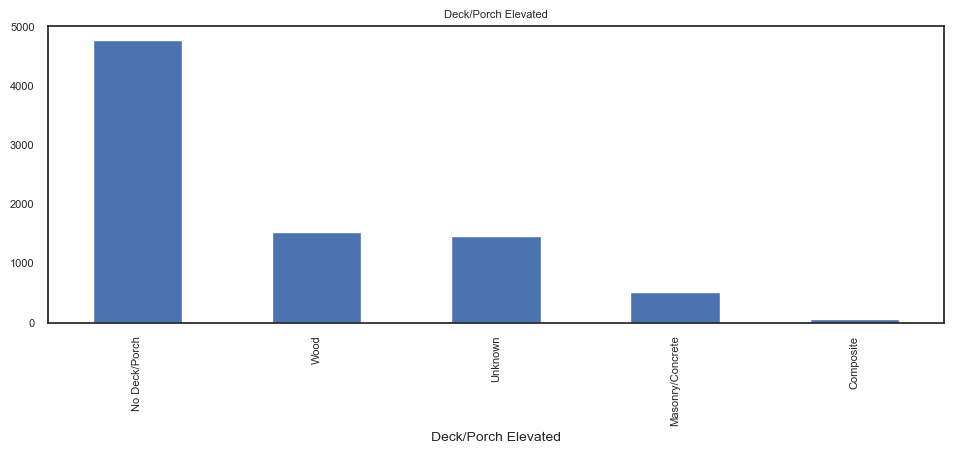

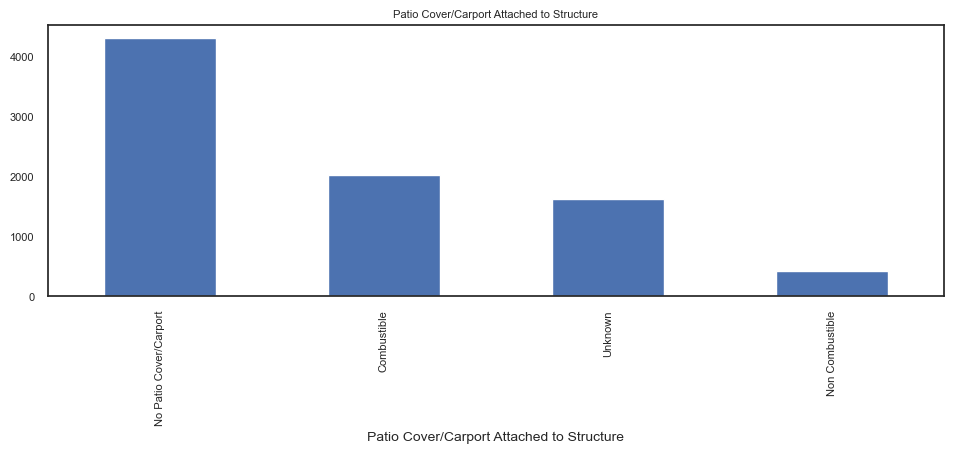

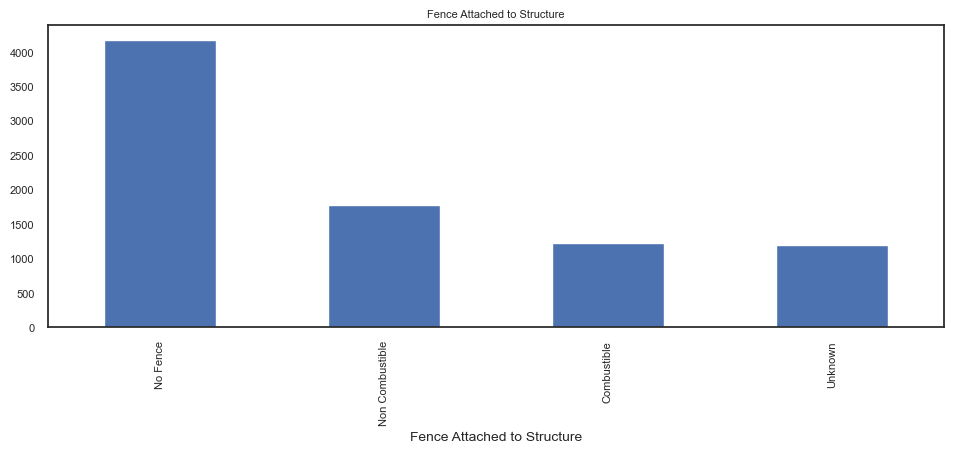

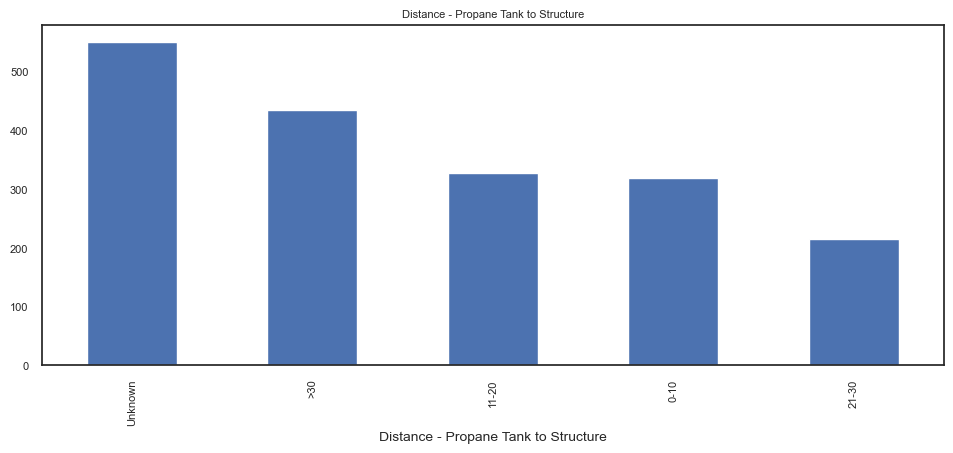

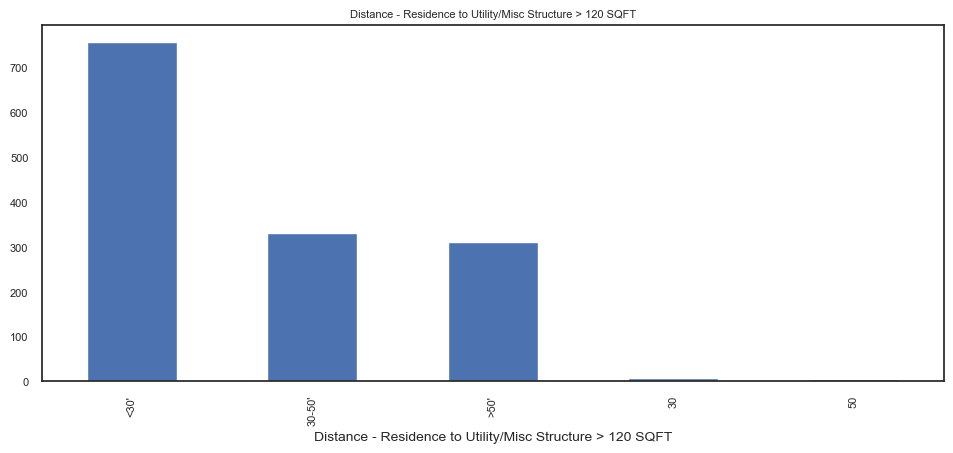

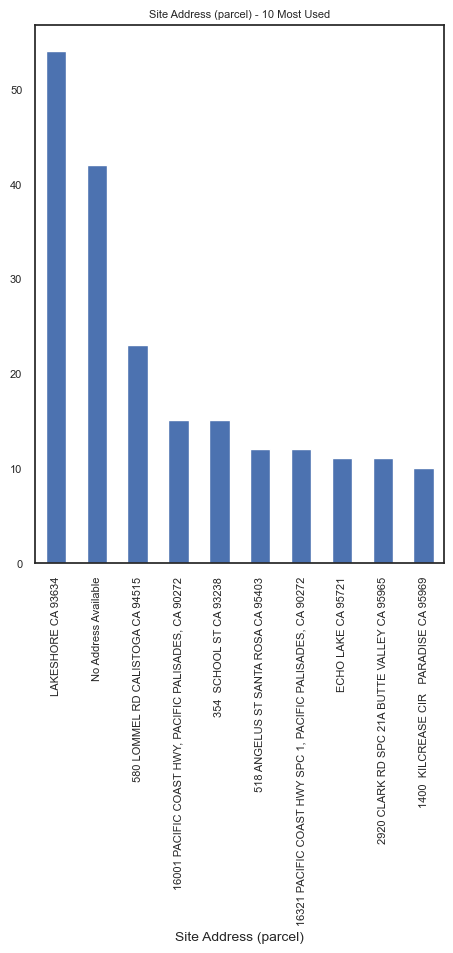

In [ ]:
pp = PdfPages('cal-wildfires-DQR-CategoricalFeatures-barcharts_withoutNaN.pdf')

for column in category_col:
    value_counts = df[column].value_counts(dropna=True)
    
    #fix the issue with site address and struc type orientation
    if column == 'Site Address (parcel)' or column == 'Structure Type':
        custom_figsize = (5, 10) 
    else:
        custom_figsize = (10, 5)
    
    if df[column].nunique() <= 50: 
        ax = value_counts.plot(kind='bar', figsize=custom_figsize, title=column)
    else: 
        ax = value_counts.nlargest(10).plot(kind='bar', figsize=custom_figsize, title=f'{column} - 10 Most Used')
    
    fig = ax.get_figure()
    fig.tight_layout()
    pp.savefig(fig)
    plt.show()

pp.close()


## Exercise - Part 2.1

Based on my previous research creating a Data Quality Report for this dataset, I have outlined the following data quality plan listing all features and actions involving those features:

| Feature                                      | Data Quality Issue                                                                            | Potential Handling Strategies |
|----------------------------------------------|----------------------------------------------------------------------------------------------|------------------------------|
| **OBJECTID**                                 | Unique identifier not to be used as feature in data preparation                              | Keep to link records but don't use for data prep |
| **Damage (category)**                        | Balanced number of 'Destroyed' and 'No Damage', this is the target feature. No missing values | Leave as is |
| **Street Number (category)**                 | 5650 unique values out of 9674 values. Too high frequency of unique values | Correct data or drop column |
| **Street Number (category)**                 | Missing values (3%)                                                                          | Investigate other sources for correct values |
| **Street Number (category)**                 | Top result is '0' which is not a valid street at 5% frequency                                | Investigate and correct |
| **Street Number (category)**                 | Investigate outlier number of 58035002                                                      | Remove outlier data |
| **Street Name (category)**                   | 4026 unique values out of 9584 values. High uniqueness reduces insight potential            | Correct or drop column |
| **Street Name (category)**                   | Missing values (4%)                                                                          | Investigate and infer correct values |
| **Street Type (category)**                   | Category value of '-' is not a plausible outcome                                            | Investigate and correct |
| **Street Type (category)**                   | Missing Values (10%)                                                                         | Investigate and infer correct values |
| **City (category)**                          | Missing Values (24%)                                                                         | Investigate and infer correct values |
| **City (category)**                          | White space errors like 'Napa ' vs 'Napa'                                                   | Clean formatting issues |
| **State (category)**                         | Constant Column                                                                             | Drop column |
| **Zip Code (category)**                      | Top result is '0' at 30% frequency                                                          | Investigate or drop invalid values |
| **Zip Code (category)**                      | Missing Values (40%)                                                                        | Investigate or drop invalid values |
| **CAL FIRE Unit (category)**                 | None                                                                                         | Leave as is |
| **County (category)**                        | Missing Values (0.3%)                                                                       | Infer missing values |
| **Community (category)**                     | Formatting errors as 'Paradise' appears twice                                               | Clean formatting issues |
| **Community (category)**                     | Missing Values (57.8%)                                                                      | Infer or drop column if unattainable |
| **Incident Start Date (category)**           | Time info does not generate unique insight                                                 | Cropped to reflect only date info |
| **Hazard Type (category)**                   | Constant Column                                                                             | Drop column |
| **Structure Defense Actions Taken (category)** | Mode category was 'Unknown' and NaN                                                         | Change unknown values to null values |
| **Structure Defense Actions Taken (category)** | Missing Values (73%)                                                                        | Remove column |
| **Structure Type (category)**                | Spelling errors in repeating categories                                                    | Clean formatting issues |
| **Structure Category (category)**            | None                                                                                         | Leave as is |
| **Number of Units in Structure (Int64)**     | Missing Values (70%)                                                                        | Drop column, due to uninsightful amount of data |
| **Roof Construction (category)**             | Missing values (3%)                                                                         | Infer and remove null data |
| **Eaves (category)**                         | Missing Values (3%), 'Unknown' (43%)                                                        | Infer and remove null data |
| **Vent Screen (category)**                   | Missing Values (3%), 'Unknown' (33%)                                                        | Investigate imputation of null data |
| **Vent Screen (category)**                   | Values spotted with 'x'' or "x""                                                           | Clean formatting issues |
| **Exterior Siding (category)**               | Formatting issues like "Stucco Brick Cement" vs "Stucco/Brick/Cement"                      | Clean formatting issues |
| **Exterior Siding (category)**               | Missing values (3%)                                                                         | Infer and remove null data |
| **Window Pane (category)**                   | Missing values (3%)                                                                         | Infer and remove null data |
| **Window Pane (category)**                   | Contains 'Unknown' category                                                                | Change unknown values to null values |
| **Deck/Porch On Grade (category)**           | Missing Values (16%)                                                                        | Infer and remove null data |
| **Deck/Porch On Grade (category)**           | Contains 'Unknown' category                                                                | Change unknown values to null values |
| **Deck/Porch Elevated (category)**           | Missing Values (16%)                                                                        | Infer and remove null data |
| **Deck/Porch Elevated (category)**           | Contains 'Unknown' category                                                                | Change unknown values to null values |
| **Patio Cover/Carport Attached to Structure (category)** | Missing Values (16%)                                                | Infer and remove null data |
| **Patio Cover/Carport Attached to Structure (category)** | Contains 'Unknown' category                                          | Change unknown values to null values |
| **Fence Attached to Structure (category)**   | Missing Values (16%)                                                                        | Infer and remove null data |
| **Fence Attached to Structure (category)**   | Contains 'Unknown' category                                                                | Change unknown values to null values |
| **Distance - Propane Tank to Structure (category)** | Missing Values (81%)                                                      | Remove column |
| **Distance - Residence to Utility/Misc Structure > 120 SQFT (category)** | Missing Values (85%)                                  | Remove column |
| **Assessed Improved Value (parcel) (Int64)** | Missing Values (4%)                                                                        | Infer and remove null data |
| **Assessed Improved Value (parcel) (Int64)** | Many values are '0', which is not valid                                                    | Infer or remove invalid values |
| **Assessed Improved Value (parcel) (Int64)** | High quantity of extreme outlier                                                                        | Clamp/remove outliers |
| **Year Built (parcel) (Int64)**              | Missing Values (24%)                                                                       | Infer and remove null data |
| **Year Built (parcel) (Int64)**              | Many values are '0', which is not valid                                                    | Infer or remove invalid values |
| **Site Address (parcel) (category)**         | 8520 unique values out of 9446, making insight difficult                                   | Drop column (redundant) |
| **Latitude (Int64)**                         | None                                                                                         | Leave as is |
| **Longitude (Int64)**                        | None                                                                                         | Leave as is |


For each action associated with a feature, I will describe my reasoning (and why not I have taken any other potential actions)

In [12739]:
# Keep a copy of the original data
df_raw = df.copy()

### Drop Constant Columns: 'State' and 'Hazard'

-> Both columns were dropped in the Data Quality Report, as requested, as they hindered further data analytics in excerise 1

-> Both Columns contained a unique row count of '1', providing no further data insight

### Incident Start Date

-> As previously mentioned, the data was cropped in the Data Quality Report to reflect only the date information

-> This action was taken, as explained previously through thorough steps, that the time proportion of the data provided no unique insights. However, the date only proportion of the time is a valuable insight into the data

Other solutions not chosen:

-> Include the time proportion of the data in the column and keep the data type as 'datetime'

-> Convert this data to a continuous feature and use time-series analysis

-> However, further analysis was conducted demonstrating that the time aspect of this information was repetitive and non-unique (providing no greater data insight)

In [12740]:
#Check that the three columns were dropped
df.head(1)

OBJECTID     Damage Street Number Street Name  \
0    13354  No Damage          1030   Silverado   

  Street Type (e.g. road, drive, lane, etc.) City Zip Code CAL FIRE Unit  \
0                                      Trail  NaN      NaN           LNU   

  County   Community  ... Deck/Porch Elevated  \
0   Napa  St. Helena  ...       No Deck/Porch   

  Patio Cover/Carport Attached to Structure Fence Attached to Structure  \
0                    No Patio Cover/Carport             Non Combustible   

  Distance - Propane Tank to Structure  \
0                                  NaN   

   Distance - Residence to Utility/Misc Structure > 120 SQFT  \
0                                                NaN           

  Assessed Improved Value (parcel) Year Built (parcel)  \
0                         33651388                1962   

                        Site Address (parcel) Latitude Longitude  
0  1030 SILVERADO TRL N SAINT HELENA CA 94574   38.518  -122.463  

[1 rows x 31 columns]

### Street Number

-> Firstly, all ‘0’ values in the feature where converted to null values, as street zero does not exist

-> Using the ‘Site Address’ column, the street number for null values was inferred/imputated as best as possible, outputting the most accurate source of inferrance/imputation

-> Outliers from the dataset were dropped, as they ranged in value too high to be a realistic street number

-> The column was then dropped from the dataset, as it did not provide any significant data insight, since it inferred/repeated the information provided in the feature ‘Street Name’

Other possible solutions not chosen:

-> Infer street number solely off 'City' correlating features such as street name, community and city

-> Infer the null data using the mode value

-> I could have used external sources to find the number based on GPS longitude and latitude, however I insisted that I only use internal data as was taught in the module


The mode category for this feature was '0' which is an invalid street number

Therefore, I will convert all 0's to NaN

In [12741]:
#check to see how many street numbers are '0'
df[df['Street Number'] == 0].shape

(527, 31)


There is 527 rows of the street number value equal to '0'

In [12742]:
# replace 0 for nan
df['Street Number'] = df['Street Number'].replace(0, np.nan)

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1656308553.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Street Number'] = df['Street Number'].replace(0, np.nan)


In [12743]:
# check to see if zeros where converted
df[df['Street Number'] == 0].shape

(0, 31)

In [12744]:
null_count = df[df['Street Number'].isna()]
null_count

OBJECTID            Damage Street Number      Street Name  \
6       57564         No Damage           NaN              NaN   
11       1372  Destroyed (>50%)           NaN  Hoaglin School    
34      22336         No Damage           NaN              NaN   
39      24168  Destroyed (>50%)           NaN     Last Chance    
47      95677  Destroyed (>50%)           NaN    Campbellville   
...       ...               ...           ...              ...   
9970    24988  Destroyed (>50%)           NaN     Last Chance    
9978    55530         No Damage           NaN              NaN   
9982    55574         No Damage           NaN              NaN   
9990    52729         No Damage           NaN              NaN   
9998    78668  Destroyed (>50%)           NaN          Unknown   

     Street Type (e.g. road, drive, lane, etc.)            City Zip Code  \
6                                           NaN    Los Angeles         0   
11                                         Road      Kettenpom       NaN   
34                                          NaN             NaN      NaN   
39                                         Road             NaN      NaN   
47                                        Trail             NaN        0   
...                                         ...             ...      ...   
9970                                       Road             NaN      NaN   
9978                                        NaN  Unincorporated      NaN   
9982                                        NaN  Unincorporated      NaN   
9990                                        NaN  Unincorporated      NaN   
9998                                      Other         Platina      NaN   

     CAL FIRE Unit       County      Community  ... Deck/Porch Elevated  \
6              LAC  Los Angeles            NaN  ...                 NaN   
11             HUU      Trinity            NaN  ...       No Deck/Porch   
34             CZU   Santa Cruz  Boulder Creem  ...             Unknown   
39             CZU   Santa Cruz     Davenport   ...       No Deck/Porch   
47             TGU       Tehama            NaN  ...       No Deck/Porch   
...            ...          ...            ...  ...                 ...   
9970           CZU   Santa Cruz            NaN  ...       No Deck/Porch   
9978           BTU        Butte            NaN  ...                 NaN   
9982           BTU        Butte            NaN  ...                 NaN   
9990           LNU         Yolo         Guinda  ...       No Deck/Porch   
9998           TGU       Tehama            NaN  ...       No Deck/Porch   

     Patio Cover/Carport Attached to Structure Fence Attached to Structure  \
6                                          NaN                         NaN   
11                             Non Combustible             Non Combustible   
34                                     Unknown                     Unknown   
39                      No Patio Cover/Carport                    No Fence   
47                                 Combustible                    No Fence   
...                                        ...                         ...   
9970                    No Patio Cover/Carport             Non Combustible   
9978                                       NaN                         NaN   
9982                                       NaN                         NaN   
9990                    No Patio Cover/Carport                    No Fence   
9998                               Combustible                    No Fence   

     Distance - Propane Tank to Structure  \
6                                     NaN   
11                                    NaN   
34                                Unknown   
39                                    NaN   
47                                    NaN   
...                                   ...   
9970                                11-20   
9978                                  NaN   
9982                                  NaN   
9990       

Now using the 'Site Address (parcel)' column, I will try to infer any street numbers were the current value is null

In [12745]:
#using site address source the street number of null values in street number column
df['Site Address (parcel)'] = df['Site Address (parcel)'].astype(str)
df['Street Number'] = df['Street Number'].astype(object)

df['Street Number'] = df.apply(
    lambda row: int(row['Site Address (parcel)'].split()[0]) 
    if pd.isna(row['Street Number']) and row['Site Address (parcel)'].split()[0].isdigit() 
    else row['Street Number'], 
    axis=1
)


df['Site Address (parcel)'] = df['Site Address (parcel)'].astype('category')
df['Street Number'] = df['Street Number'].astype('category')

In [12746]:
null_count = df['Street Number'].isna().sum()
null_count

312

I previously stated that I wanted to investigate an outlier in my Street Number data, that distorts the dataframe.

Here I can see from the output that this number is indeed a false street number as the type of home is a "mobile home" and doesnt not associate with a real street number. The data also doesnt give any informative details, majority of the data in the row being null.

Therefore, I will drop this outlier from the dataset

In [12747]:
df['Street Number'] = pd.to_numeric(df['Street Number'])

rows_with_street_number = df[df['Street Number'] > 58035000]


df['Street Number'] = df['Street Number'].astype('category')

rows_with_street_number


OBJECTID            Damage  Street Number   Street Name  \
6455    94231  Destroyed (>50%)      5.804e+08  Evening Star   

     Street Type (e.g. road, drive, lane, etc.) City Zip Code CAL FIRE Unit  \
6455                                      Trail  NaN        0           RRU   

         County Community  ... Deck/Porch Elevated  \
6455  Riverside       NaN  ...             Unknown   

     Patio Cover/Carport Attached to Structure Fence Attached to Structure  \
6455                                   Unknown                    No Fence   

     Distance - Propane Tank to Structure  \
6455                                  NaN   

      Distance - Residence to Utility/Misc Structure > 120 SQFT  \
6455                                                NaN           

     Assessed Improved Value (parcel) Year Built (parcel)  \
6455                                0                   0   

     Site Address (parcel) Latitude Longitude  
6455                   nan   33.472  -116.774  

[1 rows x 31 columns]

In [12748]:
df['Street Number'] = pd.to_numeric(df['Street Number'])

rows_with_street_number = df[df['Street Number'] > 58035000]

df = df.drop(rows_with_street_number.index)

df['Street Number'] = df['Street Number'].astype('category')

Instead of trying to infer the remaining 311 null values in the Street Number feature, I have instead decided to use the street number feature to infer the Street Name feature.

Then due to the large amount of unique values in Street Number, I will then remove the column as it will not provide any data insight of significance. The reason I draw this conclusion is due to the features 'Street Number' and 'Street Name' providing a very similar data insight to the data. However, with Street Name we can group these rows based on the name (this will also mean i dont lose out on the data based on identifying street name/number and avoiding repetition in data set to some degree)

to be continued...

### Street Name

-> Spelling mistakes and formatting was cleaned/reformatted in the feature

-> Rows containing unrealistic street naming, such as ‘000’ or ‘-200’, were removed

-> I wanted to infer null values from the data set only using internal data (just as we were taught in our lectures) and therefore didn’t address other solutions that contained external data sources

-> Where a row has a null street name, I inserted the name of the street using the street name that was most common with the row’s street number

-> The small amount of null data remaining was dropped

Other possible solutions to chose:

-> Infer street name solely off 'City' as this would result in fewest nulls

-> Infer the street name solely off the mode street name value

-> However, there is multiple street names within one City or Community therefore it is most accurate to infer off the most precise location where possible (site address -> street number -> community -> city)

-> I could have used external sources to find the number based on GPS longitude and latitude, however I insisted that I only use internal data as was taught in the module

Initially I will infer missing values using the Street Number feature, based on the most commonly identified street name associated with the street number of that row

In [12749]:
null_count = df['Street Name'].isna().sum()
null_count

416

I must remember to fix the spelling mistakes I spotted from her original data

In [12750]:
# Remove rows with invalid street names, starting with "-"
df = df[~df['Street Name'].str.contains(r'^-', regex=True, na=False)]

In [12751]:
#my code to clean the street names, especially with issues such as '2Nd' street
df['Street Name'] = (
    df['Street Name']
    .str.strip() 
    .str.lower()  
    .str.title() 
    .str.replace(
        r'(\d+)(St|Nd|Rd|Th)\b', 
        lambda m: f"{m.group(1)}{m.group(2).lower()}",  
        regex=True
    )
)

#fix spelling mistakes i spotted in her original data!
df['Street Name'] = df['Street Name'].replace('Hwy', 'Highway')
#drop a column i spotted outright in her data too!
df = df[df["Street Name"] != "000"]

df['Street Name'] = df['Street Name'].astype('category')

In [12752]:
# Reference - https://stackoverflow.com/questions/25736127/pandas-groupby-with-dict

zip_city_map = (
    df.dropna(subset=['Street Number', 'Street Name']) # only look at rows to compare that actually have both street number and name
      .groupby('Street Number')['Street Name']
      .agg(lambda x: x.value_counts().index[0]) # here i will pick the most common name for the street
      .to_dict()
)


mask = df['Street Name'].isna() & df['Street Number'].notna()


df.loc[mask, 'Street Name'] = df.loc[mask, 'Street Number'].map(zip_city_map)

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\678771875.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Street Number')['Street Name']


In [12753]:
null_count = df['Street Name'].isna().sum()
null_count

26

In [12754]:
null_count = df[df['Street Name'].isna()]
null_count

OBJECTID            Damage Street Number Street Name  \
221     56866         No Damage           NaN         NaN   
467     55591         No Damage           NaN         NaN   
684     53041         No Damage           NaN         NaN   
1436    55285         No Damage           NaN         NaN   
2284    19169         No Damage           NaN         NaN   
2418    53034         No Damage           NaN         NaN   
2532    53889         No Damage           NaN         NaN   
2818    52714         No Damage           NaN         NaN   
2859    53050         No Damage           NaN         NaN   
2883    55989         No Damage           NaN         NaN   
4248    52715         No Damage           NaN         NaN   
5268    25307         No Damage           NaN         NaN   
5348    54354         No Damage           NaN         NaN   
5372    19848         No Damage           NaN         NaN   
5812    19204         No Damage           NaN         NaN   
6348    20559         No Damage           NaN         NaN   
6432    53303         No Damage           NaN         NaN   
7056    55245         No Damage           NaN         NaN   
7559    22379         No Damage           NaN         NaN   
7576    25306         No Damage           NaN         NaN   
8292    56083         No Damage           NaN         NaN   
8442    62829  Destroyed (>50%)           NaN         NaN   
9344    53325         No Damage           NaN         NaN   
9405    24812         No Damage           NaN         NaN   
9479    54255         No Damage           NaN         NaN   
9938    52716         No Damage           NaN         NaN   

     Street Type (e.g. road, drive, lane, etc.)            City Zip Code  \
221                                         NaN  Unincorporated      NaN   
467                                         NaN  Unincorporated      NaN   
684                                         NaN             NaN      NaN   
1436                                        NaN  Unincorporated      NaN   
2284                                        NaN             NaN      NaN   
2418                                        NaN             NaN      NaN   
2532                                        NaN  Unincorporated      NaN   
2818                                        NaN  Unincorporated      NaN   
2859                                        NaN             NaN      NaN   
2883                                        NaN  Unincorporated      NaN   
4248                                        NaN  Unincorporated      NaN   
5268                                        NaN             NaN      NaN   
5348                                        NaN  Unincorporated      NaN   
5372                                        NaN             NaN      NaN   
5812                                        NaN             NaN      NaN   
6348                                        NaN             NaN      NaN   
6432                                        NaN             NaN      NaN   
7056                                        NaN  Unincorporated      NaN   
7559                                        NaN             NaN      NaN   
7576                                        NaN             NaN      NaN   
8292                                        NaN  Unincorporated      NaN   
8442                                        NaN  Unincorporated        0   
9344                                        NaN             NaN      NaN   
9405                                        NaN             NaN      NaN   
9479                                        NaN  Unincorporated      NaN   
9938                                        NaN  Unincorporated      NaN   

     CAL FIRE Unit      County Community  ... Deck/Porch Elevated  \
221            BTU       Butte       NaN  ...                 NaN   
467            BTU       Butte       NaN  ...                 NaN   
684            BTU       Butte       NaN  ...                 NaN   
1436           BTU       But

As you can see with the data that is left, you cannot infer a street name or number based on the given information

Apart from potentially sourcing 1 or 2 streets using the site parcel feature, a large rational of this data is 'Unknown' and NULL (where there is one road under site address the remainder of the data is null at >50%)

Therefore, in terms of time and cost it is most effective to remove these rows from the dataset 

In [12755]:
df = df.dropna(subset=['Street Name'])

In [12756]:
null_count = df[df['Street Name'].isna()]
null_count

Empty DataFrame
Columns: [OBJECTID, Damage, Street Number, Street Name, Street Type (e.g. road, drive, lane, etc.), City, Zip Code, CAL FIRE Unit, County, Community, Incident Start Date, Structure Defense Actions Taken, Structure Type, Structure Category, Number of Units in Structure (if multi unit), Roof Construction, Eaves, Vent Screen, Exterior Siding, Window Pane, Deck/Porch On Grade, Deck/Porch Elevated, Patio Cover/Carport Attached to Structure, Fence Attached to Structure, Distance - Propane Tank to Structure, Distance - Residence to Utility/Misc Structure > 120 SQFT, Assessed Improved Value (parcel), Year Built (parcel), Site Address (parcel), Latitude, Longitude]
Index: []

[0 rows x 31 columns]

### Street Number cont.

Therefore, as I clearly explained in detail and great length previously, I will drop the Street Number column in lieu of keeping and using the 'Street Name' column

In [12757]:
null_count = df['Street Number'].isna().sum()
null_count

283

In [12758]:
df = df.drop(columns=['Street Number'])

In [12759]:
df.head(5)

OBJECTID            Damage        Street Name  \
0    13354         No Damage          Silverado   
1    78150  Destroyed (>50%)              Meyer   
2   108443  Destroyed (>50%)            W Manor   
3    85672         No Damage  Lake Almanor West   
4    51874  Destroyed (>50%)             Market   

  Street Type (e.g. road, drive, lane, etc.)            City Zip Code  \
0                                      Trail             NaN      NaN   
1                                       Road    Grass Valley    95945   
2                                     Street        Altadena    91001   
3                                      Drive         Chester    96020   
4                                     Street  Unincorporated      NaN   

  CAL FIRE Unit       County          Community Incident Start Date  ...  \
0           LNU         Napa         St. Helena          2020-09-27  ...   
1           NEU       Nevada                NaN          2021-08-04  ...   
2           LAC  Los Angeles                NaN          2025-01-07  ...   
3           LMU       Plumas  Lake Almanor West          2021-07-13  ...   
4           SHU       Shasta            Redding          2018-07-23  ...   

  Deck/Porch Elevated Patio Cover/Carport Attached to Structure  \
0       No Deck/Porch                    No Patio Cover/Carport   
1       No Deck/Porch                                   Unknown   
2       No Deck/Porch                                   Unknown   
3                Wood                    No Patio Cover/Carport   
4                Wood                               Combustible   

  Fence Attached to Structure  Distance - Propane Tank to Structure  \
0             Non Combustible                                   NaN   
1                    No Fence                                 11-20   
2             Non Combustible                                   NaN   
3                    No Fence                                 21-30   
4                    No Fence                                   >30   

  Distance - Residence to Utility/Misc Structure > 120 SQFT  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                               <30'          
4                                             30-50'          

  Assessed Improved Value (parcel) Year Built (parcel)  \
0                         33651388                1962   
1                            56514                <NA>   
2                           311077                <NA>   
3                           185777                <NA>   
4                            37072                   0   

                        Site Address (parcel) Latitude Longitude  
0  1030 SILVERADO TRL N SAINT HELENA CA 94574   38.518  -122.463  
1        20228 MEYER RD GRASS VALLEY CA 95945   39.133  -120.976  
2          111 W MANOR ST, ALTADENA, CA 91001   34.194  -118.150  
3   101 LAKE ALMANOR WEST DR CHESTER CA 96020   40.238  -121.218  
4                                         nan   40.624  -122.463  

[5 rows x 30 columns]

### Zip Code

-> Using web sources to indicate the valid range of zip codes within California, outliers were dropped from the dataset.

-> Values of ‘0’ were converted to null, as a Zip Code of 0 is not realistic

-> Zip Codes values were cross referenced with the ‘Site Address’ column for mismatching Zip Codes to be corrected

-> I wanted to infer null values from the data set only using internal data (just as we were taught in our lectures) and therefore didn’t address other solutions that contained external data sources

-> I utilized the ‘Site Address’ column to extract the Zip Code where the row’s Zip Code data was null

-> For the remaining null values, I inferred the Zip Code off the most common Zip Code present in the columns with the same ‘Street Name’. If this was not feasible I would check the ‘Community’ column and then the ‘City’ column were necessary

-> This method of inferring the Zip Code null values was the most accurate and precise way using only internal data. Utilising the most precise zone were possible (street being more accurate then community)

-> Remaining null values were dropped


Other possible solutions to chose:

-> Infer Zip Code solely off 'City' as this would result in fewest nulls

-> Infer the code solely off the mode Zip Code value

-> However, there is multiple Zip Codes within one City or a Community therefore it is most accurate to infer off the most precise location where possible (site address -> street name -> community -> city)

-> I could have used external sources to find the number based on GPS longitude and latitude, however I insisted that I only use internal data as was taught in the module


Here I sourced information in relation to Zip Codes within California

Reference - https://qualitycountsca.net/wp-content/uploads/2018/04/california-zip-codes.pdf

Using this information I can discern that any zip code outside of the range of 90001 to 96162 are false or incorrect. Therefore, I will set these values to null

In [12760]:

zip_numeric = pd.to_numeric(df['Zip Code'])
rows_less_than_90001 = df[zip_numeric < 90001]
rows_less_than_90001.shape

(1888, 30)

My initial check to see how many '0' values were present, showed that all zip code values under 90001 were equal to 0

In [12761]:
df[df['Zip Code'] == 0].shape

(1888, 30)

However, if this was not the case. My plan was to run code to view each unique instance of a Zip Code under 90001

In [12762]:
zip_filtered = pd.to_numeric(df['Zip Code'])
unique_zipcodes = zip_filtered[(zip_filtered < 90001)].unique()

print("Unique Zip Codes less than 90001:")
print(np.sort(unique_zipcodes))

Unique Zip Codes less than 90001:
[0.]


Now I will change all '0' values of Zip Codes to null values as they represent no information and distort my data

In [12763]:
df['Zip Code'] = df['Zip Code'].replace(0, np.nan)

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\3922241470.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Zip Code'] = df['Zip Code'].replace(0, np.nan)


I will now check to find any values of Zip Codes that are greater than 96162

In [12764]:
zip_filtered = pd.to_numeric(df['Zip Code'])
unique_zipcodes = zip_filtered[(zip_filtered > 96162)].unique()

print("Unique Zip Codes less than 96061:")
print(np.sort(unique_zipcodes))

Unique Zip Codes less than 96061:
[96311.]


In [12765]:
df[df['Zip Code'] == 96311]

OBJECTID            Damage Street Name  \
1852    71587  Destroyed (>50%)   Schilling   
9120    71584  Destroyed (>50%)    49 South   

     Street Type (e.g. road, drive, lane, etc.)          City Zip Code  \
1852                                       Road  Coulterville    96311   
9120                                        Hwy  Coulterville    96311   

     CAL FIRE Unit    County     Community Incident Start Date  ...  \
1852           MMU  Mariposa  Greeley hill          2017-07-16  ...   
9120           MMU  Mariposa           NaN          2017-07-16  ...   

     Deck/Porch Elevated Patio Cover/Carport Attached to Structure  \
1852                 NaN                                       NaN   
9120                 NaN                                       NaN   

     Fence Attached to Structure  Distance - Propane Tank to Structure  \
1852                         NaN                                   NaN   
9120                         NaN                                   NaN   

     Distance - Residence to Utility/Misc Structure > 120 SQFT  \
1852                                                NaN          
9120                                                NaN          

     Assessed Improved Value (parcel) Year Built (parcel)  \
1852                             9549                <NA>   
9120                            32000                <NA>   

                        Site Address (parcel) Latitude Longitude  
1852  5791 SCHILLING RD COULTERVILLE CA 95311   37.671  -120.131  
9120  9699 HIGHWAY 49 N COULTERVILLE CA 95311   37.675  -120.164  

[2 rows x 30 columns]

From running this code I can see that there is a two of Zip Codes greater than the value that I expected them to be. Therefore I took the ZipCode value and took a look at the data from containing only rows with this Zip Code. From viewing this dataframe I understand that the feature 'Site Address' should also contain the Zip Code of the row. After having viewed the zip code in Site Parcel I can see that there was a spelling mistake in the Zip Code (hence why the Zip Code is above 96162).

From this I have decided to check each row's Zip Code against the Zip Code within the 'Site Address' feature

In [12766]:

check_subset = df.dropna(subset=['Zip Code', 'Site Address (parcel)'])
mismatches = []

for i, row in check_subset.iterrows():
    zip_code = str(int(float(row['Zip Code'])))
    
    address = row['Site Address (parcel)']
    
    if zip_code not in address:
        mismatches.append(row)


mismatches = pd.DataFrame(mismatches)

print(mismatches[['Zip Code', 'Site Address (parcel)']])

      Zip Code   Site Address (parcel)
230      95470           10450 EAST RD
328      93514  2164 Old Sherwin Grade
433      95457   9840 Rocky Creek Road
537      96007                     nan
685      95470           10681 WEST RD
...        ...                     ...
9567     95470         2720 ROAD E # L
9628     95470             2351 ROAD K
9770     90265                     nan
9828     93446    11011 SOUTH SHORE DR
9903     95470   2565 ROLLING HILLS RD

[64 rows x 2 columns]


Now from looking at my previously colated mismatching data, I can view any Zip Code data entries that do not match with the Zip Code that is stated in the Site Address Parcel (if there is one!)

From this I can see that there is 4 rows that do not contain identical Zip Codes (rows 1254, 1852, 4061 and 9120)

Therefore, I will convert these select rows to the Site Address's Zip Code, as given the previous cells information the Site Address is more accurate

In [12767]:
# I will perform this task manually, but will not do it manually later (demonstrating both methods)

# A temporary measure as Zip Code wouldnt change unless it was not a category
df['Zip Code'] = df['Zip Code'].astype('object')
df.loc[9120, 'Zip Code'] = '95311'
df.loc[1852, 'Zip Code'] = '95311'
df.loc[1254, 'Zip Code'] = '95940'
df.loc[4061, 'Zip Code'] = '92397'
df['Zip Code'] = df['Zip Code'].astype('category')


In [12768]:
# I now want to look at null values in the Zip Code column
print(df.loc[df['Zip Code'].isna(), ['Zip Code', 'Site Address (parcel)']])


     Zip Code                         Site Address (parcel)
0         NaN    1030 SILVERADO TRL N SAINT HELENA CA 94574
4         NaN                                           nan
5         NaN            6907  LINRY LN   PARADISE CA 95969
6         NaN           1401 MORAGA DR LOS ANGELES CA 90049
7         NaN               1093 HEADLANDS DR NAPA CA 94558
...       ...                                           ...
9993      NaN         7897 EMPIRE GRADE SANTA CRUZ CA 95060
9995      NaN           898 LIMERICK LN HEALDSBURG CA 95448
9996      NaN                 5770 BUSCH DR MALIBU CA 90265
9998      NaN                                           nan
9999      NaN  6279  MOUNTAIN MEADOW CT   PARADISE CA 95969

[5918 rows x 2 columns]


In [12769]:
df.head(5)


OBJECTID            Damage        Street Name  \
0    13354         No Damage          Silverado   
1    78150  Destroyed (>50%)              Meyer   
2   108443  Destroyed (>50%)            W Manor   
3    85672         No Damage  Lake Almanor West   
4    51874  Destroyed (>50%)             Market   

  Street Type (e.g. road, drive, lane, etc.)            City Zip Code  \
0                                      Trail             NaN      NaN   
1                                       Road    Grass Valley    95945   
2                                     Street        Altadena    91001   
3                                      Drive         Chester    96020   
4                                     Street  Unincorporated      NaN   

  CAL FIRE Unit       County          Community Incident Start Date  ...  \
0           LNU         Napa         St. Helena          2020-09-27  ...   
1           NEU       Nevada                NaN          2021-08-04  ...   
2           LAC  Los Angeles                NaN          2025-01-07  ...   
3           LMU       Plumas  Lake Almanor West          2021-07-13  ...   
4           SHU       Shasta            Redding          2018-07-23  ...   

  Deck/Porch Elevated Patio Cover/Carport Attached to Structure  \
0       No Deck/Porch                    No Patio Cover/Carport   
1       No Deck/Porch                                   Unknown   
2       No Deck/Porch                                   Unknown   
3                Wood                    No Patio Cover/Carport   
4                Wood                               Combustible   

  Fence Attached to Structure  Distance - Propane Tank to Structure  \
0             Non Combustible                                   NaN   
1                    No Fence                                 11-20   
2             Non Combustible                                   NaN   
3                    No Fence                                 21-30   
4                    No Fence                                   >30   

  Distance - Residence to Utility/Misc Structure > 120 SQFT  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                               <30'          
4                                             30-50'          

  Assessed Improved Value (parcel) Year Built (parcel)  \
0                         33651388                1962   
1                            56514                <NA>   
2                           311077                <NA>   
3                           185777                <NA>   
4                            37072                   0   

                        Site Address (parcel) Latitude Longitude  
0  1030 SILVERADO TRL N SAINT HELENA CA 94574   38.518  -122.463  
1        20228 MEYER RD GRASS VALLEY CA 95945   39.133  -120.976  
2          111 W MANOR ST, ALTADENA, CA 91001   34.194  -118.150  
3   101 LAKE ALMANOR WEST DR CHESTER CA 96020   40.238  -121.218  
4                                         nan   40.624  -122.463  

[5 rows x 30 columns]

In [12770]:
# Reference - https://stackoverflow.com/questions/5577501/how-to-tell-if-string-starts-with-a-number-with-python

mask = df['Zip Code'].isna()

extracted_zips = []

for address in df.loc[mask, 'Site Address (parcel)']:
    zip_code = None  #where no zip code is found in site address
    for part in str(address).split():
        if len(part) == 5 and part.isdigit() and part.startswith('9'): #five digits and stats with a 9
            zip_code = part
            break 
    extracted_zips.append(zip_code)


df['Zip Code'] = df['Zip Code'].astype(object)
df.loc[mask, 'Zip Code'] = extracted_zips
df['Zip Code'] = df['Zip Code'].astype('category')


After filling in Zip Code null values using the 'Site Address' feature, I went from 5920 null values under Zip Code to 969 null values

In [12771]:
print(df.loc[df['Zip Code'].isna(), ['Zip Code', 'Site Address (parcel)']])

     Zip Code Site Address (parcel)
4         NaN                   nan
39        NaN                   nan
47        NaN                   nan
48        NaN                   nan
50        NaN                   nan
...       ...                   ...
9950      NaN   3360 SODA CANYON RD
9965      NaN                   nan
9970      NaN                   nan
9971      NaN   23 PINNACLE PEAK ST
9998      NaN                   nan

[968 rows x 2 columns]


I want to try to infer the remaining 970 null values from using other columns from the dataset where possible.

I have noticed that using external references, https://www.maptive.com/interactive-maps/california-zip-codes/ & https://qualitycountsca.net/wp-content/uploads/2018/04/california-zip-codes.pdf, that the best feature to infer a Zip Code from is the "Street Name" column, then the "Community" column followed by the "City"

I will continue this data cleaning later....

### Community

-> Whitespace and spelling mistakes were removed/fixed

-> The column value of ‘-‘ was replaced with null values, as this is an invalid community answer

-> Due to 57.8% of the rows containing null columns in this category, I have decided that this level of missing values is too high and I cannot accurately infer the null values as desired

-> Therefore, the column was dropped from the dataset

Other possible solutions to chose:

-> Infer the null values using the most common 'Community' associated with their street name

-> However, there was too many null values present and an accurate inferral was unachievable


Firstly, I cannot reference new Zip Code values from the Community/Street Name features unless I have cleaned the feature's unknown values, whitespace and spelling mistakes. Therefore, I will infer Zip Code null values off the features once I have cleaned the features

I want to clean all data formatting errors found within this column, as the top two modes are 'Paradise'

In [12772]:
df['Community'] = df['Community'].str.strip().str.title()
df['Community'] = df['Community'].replace('-', pd.NA)
df['Community'] = df['Community'].astype('category')

In [12773]:
unique_communities = df['Community'].dropna().unique()
print(sorted(unique_communities))

['Agoura', 'Agoura Hills', 'Alpine', 'Alpine Village', 'Alta Sierra', 'Altadena', 'Altair', 'Anaheim Hills', 'Anderson 6', 'Anderson Springs', 'Angel Valley', 'Angwin', 'Auberry', 'Avenues', 'B', 'Bangor', 'Banning', 'Bbrsp', 'Bbrsp Little Basin Campground', 'Bbsp Little Basin Campground', 'Bbsrp', 'Bear Creek', 'Bear Valley', 'Beckwourth', 'Belden', 'Bell Canyon', 'Ben Lomond', 'Berry Creek', 'Berryessa Highlands', 'Big Creek', 'Big Rock', 'Bonny Doon', 'Boulder', 'Boulder Creek', 'Boulder Creek Gil Course', 'Boulder Creek Golf Course', 'Boulder Creem', "Brent'S Junction", 'Brookdale', 'Brooks', 'Butte Valley', 'Cache Creek Mobile Home Estates', 'Cal Shasta', 'Calimesa', 'Calistoga', 'Camarillo', 'Camino', 'Camp Bloomfield', 'Camp Hammer', 'Camp Jewett', 'Camp Nelson', 'Canyon Dam', 'Capay', 'Capel Valley', 'Capps Crossing', 'Carmel Valley', 'Carpinteria', 'Cascade', 'Cedar Park', 'Centerville', 'Cherokee', 'Chester', 'Chico', 'Chino Hills', 'Clear Lake', 'Clear Lake Oaks', 'Clearlake

to be continued...

### City

-> Data entries of ‘na’, ‘Nan’ and ‘Na’ were replaced by null values

-> Spelling and formatting mistakes in the data were corrected (Napa instead of Nappa)

-> I wanted to infer null values from the data set only using internal data (just as we were taught in our lectures) and therefore didn’t address other solutions that contained external data sources

-> I utilized the ‘Site Address’ column to extract the City where the row’s City data was null

-> For the remaining null values, I inferred the City off the most common City associated in the columns with the same ‘Street Name’. If this was not feasible I would check the ‘Community’ column and then the ‘Zip Code’ column were necessary

-> Remaining null values were dropped

Other possible solutions to chose:

-> Infer City solely off the Zip Code as this would result in fewest nulls

-> Infer the City solely off the mode City value

-> However, there is multiple Cities within one Zip Code or a County therefore it is most accurate to infer off the most precise location where possible (site address -> street name -> community -> Zip Code)

-> I could have used external sources to find the number based on GPS longitude and latitude, however I insisted that I only use internal data as was taught in the module


Originally, I was going to infer Cities of 'Unincorporated' to null values but i realised that these are non-urban locations and this category is correct

From the previous outputs, I can see that there is a city inputted as "na" and as previously mentioned I must clean the data formating/whitespace issues

In [12774]:
df['City'] = df['City'].replace('na', pd.NA)
df['City'] = df['City'].replace('Na', pd.NA)
df['City'] = df['City'].replace('Nan', pd.NA)
df['City'] = df['City'].replace('Nappa', 'Napa')

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\3353617316.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['City'] = df['City'].replace('na', pd.NA)
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\3353617316.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['City'] = df['City'].replace('Na', pd.NA)
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\3353617316.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories.

In [12775]:
#checking to see unique cities and where there is duplicates due to spelling
unique_cities = df['City'].dropna().unique()
print(sorted(unique_cities))

['Aguanga', 'Alpine', 'Alpine ', 'Altadena', 'Anaheim', 'Anaheim ', 'Anderson', 'Anderson ', 'Anderson Springs ', 'Arcadia', 'Awahanee', 'Bangor ', 'Bannig', 'Banning', 'Banning ', 'Belden', 'Bella Vista', 'Big Bar', 'Big Bear Lake', 'Bishop', 'Boulder Creek', 'Browns Valley', 'CALIENTE ', 'Calabasas', 'Caliente', 'Caliente ', 'California Hot Springs', 'Calimesa', 'Camarillo', 'Camino', 'Canyon Dam', 'Carmel', 'Carmel Valley', 'Carmel Valley ', 'Catheys Valley', 'Cherry Valley', 'Cherryville ', 'Chester', 'Chico', 'Chilcoot', 'Clearlake', 'Clearlake ', 'Clearlake Oaks', 'Clements', 'Coalinga', 'Cobb', 'Cohasset', 'Colfax', 'Colfax ', 'Concow/Yankee Hill', 'Copperopolis', 'Corning', 'Coulterville', 'Covelo', 'Covelo ', 'Crescent Mills', 'Doyle', 'Doyle ', 'Dulzura', 'ESCONDIDO', 'Echo Lake', 'Elk Creek', 'Elk Creek ', 'Elk Grove', 'Feather Falls', 'Fillmore', 'Forest Ranch', 'Foresthill', 'Fort Jones', 'French Gulch', 'Garberville', 'Gaviota', 'Gazelle', 'Georgetown', 'Glencoe', 'Goleta

Now that i have removed invalid inputs in the feature, I will clean the features inputs for formatting

In [12776]:
# Now I will clean the data formatting from the column
df['City'] = df['City'].str.strip().str.title()


In [12777]:
#this is just to check the unique categories of the feature
unique_cities = df['City'].dropna().unique()
print(sorted(unique_cities))

['Aguanga', 'Alpine', 'Altadena', 'Anaheim', 'Anderson', 'Anderson Springs', 'Arcadia', 'Awahanee', 'Bangor', 'Bannig', 'Banning', 'Belden', 'Bella Vista', 'Big Bar', 'Big Bear Lake', 'Bishop', 'Boulder Creek', 'Browns Valley', 'Calabasas', 'Caliente', 'California Hot Springs', 'Calimesa', 'Camarillo', 'Camino', 'Canyon Dam', 'Carmel', 'Carmel Valley', 'Catheys Valley', 'Cherry Valley', 'Cherryville', 'Chester', 'Chico', 'Chilcoot', 'Clearlake', 'Clearlake Oaks', 'Clements', 'Coalinga', 'Cobb', 'Cohasset', 'Colfax', 'Concow/Yankee Hill', 'Copperopolis', 'Corning', 'Coulterville', 'Covelo', 'Crescent Mills', 'Doyle', 'Dulzura', 'Echo Lake', 'Elk Creek', 'Elk Grove', 'Escondido', 'Feather Falls', 'Fillmore', 'Forest Ranch', 'Foresthill', 'Fort Jones', 'French Gulch', 'Garberville', 'Gaviota', 'Gazelle', 'Georgetown', 'Glencoe', 'Goleta', 'Grass Valley', 'Greenville', 'Grizzly Flat', 'Grizzly Flats', 'Havilah', 'Hayfork', 'Healdsburg', 'Hemet', 'Herald', 'Highland', 'Horse Creek', 'Idyllw

Now I will try to infer the null values from 'City' using the 'Site Address (parcel)' feature

In [12778]:
null_count = df['City'].isna().sum()
null_count

2445

In [12779]:
# extract the city from the "Site Address (parcel)" column for rows where the "City" column is missing.
# this code works that if the address contains a comma, it assumes the city is the second element
# if there’s no comma, it looks for the "CA" and takes one or two words immediately before it

# Reference - https://www.geeksforgeeks.org/check-for-a-substring-in-a-pandas-dataframe-column/ & https://www.geeksforgeeks.org/check-for-a-substring-in-a-pandas-dataframe-column/ & https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

mask = df['City'].isna()

invalid_words = {"RD", "DR", "AVE", "APT", "AND", "LN", "CIR", "CT", "BLVD", "HWY", 
                 "ST", "PKWY", "WAY", "PL", "LOOP"}

extracted_cities = []

for address in df.loc[mask, 'Site Address (parcel)']:
    city = None  
    if isinstance(address, str):
        if "," in address:
            parts = address.split(",")
            if len(parts) > 1:
                possible_city = parts[1].strip()
                if (len(possible_city.split()) <= 3 and not any(word.upper() in invalid_words for word in possible_city.split()) and not any(char.isdigit() for char in possible_city)):
                    city = possible_city
        else:
            tokens = address.split()
            if "CA" in tokens:
                idx = tokens.index("CA")
                if idx >= 2:
                    first_word = tokens[idx-2]
                    second_word = tokens[idx-1]

                    if (not first_word.isdigit() and first_word.upper() not in invalid_words and not any(char.isdigit() for char in first_word) and first_word.isalpha() and  len(first_word) > 1):  
                        possible_city = first_word + " " + second_word
                    else:
                        possible_city = second_word  

                    if (len(possible_city.split()) <= 3 and not any(word.upper() in invalid_words for word in possible_city.split()) and not any(char.isdigit() for char in possible_city)): 
                        city = possible_city

    extracted_cities.append(city)


df['City'] = df['City'].astype(object)
df.loc[mask, 'City'] = extracted_cities

As you can see no matter how many times I changed the code of reading and inferring a city based off the column 'site address', the data is too volatile to accurately infer the correct city. There is constantly mistakes and inferring street names, road names etc.

Therefore, I have built the best possible code that I can make to accurately identify all Cities in Site Address

Now I will tidy up the remains of this feature's data, these are errors I seen in the Data Quality Report, due to the dataset input (not my code!)

In [12780]:
# I want to get rid of accidental city misspelling I spotted in person in the DQR
# This to me is quicker than writing out maticulous code
df['City'] = df['City'].replace('Bannig', 'Banning')


I am making sure City is set back to category

In [12781]:
#Make sure City feature is still a category feature
df['City'] = df['City'].astype('category')

As you can see using the column, 'Site Address (parcel)', takes the 'City' column from 2445 null values to 715

In [12782]:
null_count = df['City'].isna().sum()
null_count

c:\Users\Mark\anaconda3\envs\comp47350py311\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


715

In [12783]:
df.head(5)

OBJECTID            Damage        Street Name  \
0    13354         No Damage          Silverado   
1    78150  Destroyed (>50%)              Meyer   
2   108443  Destroyed (>50%)            W Manor   
3    85672         No Damage  Lake Almanor West   
4    51874  Destroyed (>50%)             Market   

  Street Type (e.g. road, drive, lane, etc.)            City Zip Code  \
0                                      Trail    SAINT HELENA    94574   
1                                       Road    Grass Valley    95945   
2                                     Street        Altadena    91001   
3                                      Drive         Chester    96020   
4                                     Street  Unincorporated      NaN   

  CAL FIRE Unit       County          Community Incident Start Date  ...  \
0           LNU         Napa         St. Helena          2020-09-27  ...   
1           NEU       Nevada                NaN          2021-08-04  ...   
2           LAC  Los Angeles                NaN          2025-01-07  ...   
3           LMU       Plumas  Lake Almanor West          2021-07-13  ...   
4           SHU       Shasta            Redding          2018-07-23  ...   

  Deck/Porch Elevated Patio Cover/Carport Attached to Structure  \
0       No Deck/Porch                    No Patio Cover/Carport   
1       No Deck/Porch                                   Unknown   
2       No Deck/Porch                                   Unknown   
3                Wood                    No Patio Cover/Carport   
4                Wood                               Combustible   

  Fence Attached to Structure  Distance - Propane Tank to Structure  \
0             Non Combustible                                   NaN   
1                    No Fence                                 11-20   
2             Non Combustible                                   NaN   
3                    No Fence                                 21-30   
4                    No Fence                                   >30   

  Distance - Residence to Utility/Misc Structure > 120 SQFT  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                               <30'          
4                                             30-50'          

  Assessed Improved Value (parcel) Year Built (parcel)  \
0                         33651388                1962   
1                            56514                <NA>   
2                           311077                <NA>   
3                           185777                <NA>   
4                            37072                   0   

                        Site Address (parcel) Latitude Longitude  
0  1030 SILVERADO TRL N SAINT HELENA CA 94574   38.518  -122.463  
1        20228 MEYER RD GRASS VALLEY CA 95945   39.133  -120.976  
2          111 W MANOR ST, ALTADENA, CA 91001   34.194  -118.150  
3   101 LAKE ALMANOR WEST DR CHESTER CA 96020   40.238  -121.218  
4                                         nan   40.624  -122.463  

[5 rows x 30 columns]

Now I need to reformat this 'City' feature

In [12784]:
#here i am printing the unique list of cities, after i strip and clean them
df['City'] = df['City'].str.strip().str.title()
unique_cities = df['City'].dropna().unique()
print(sorted(unique_cities))

['Aguanga', 'Alpine', 'Altadena', 'Anaheim', 'Anderson', 'Anderson Springs', 'Angwin', 'Arcadia', 'Auberry', 'Awahanee', 'Bangor', 'Banning', 'Belden', 'Bella Vista', 'Ben Lomond', 'Big Bar', 'Big Bear Lake', 'Bishop', 'Bloom Irvine', 'Bonny Doon', 'Boulder Creek', 'Brookdale', 'Browns Valley', 'Brush Irvine', 'Bucks Lake', 'Calabasas', 'Caliente', 'California Hot Springs', 'Calimesa', 'Calistoga', 'Camarillo', 'Camino', 'Camp Nelson', 'Canyon Dam', 'Carmel', 'Carmel Valley', 'Catheys Valley', 'Cazadero', 'Cedar Slope', 'Cherry Valley', 'Cherryville', 'Chester', 'Chico', 'Chilcoot', 'Chino Hills', 'Clearlake', 'Clearlake Oaks', 'Clearlake Park', 'Clements', 'Coalinga', 'Cobb', 'Cohasset', 'Colfax', 'Concow/Yankee Hill', 'Copperopolis', 'Coralwood Irvine', 'Corning', 'Cottonwood', 'Coulterville', 'Covelo', 'Cres Brookdale', 'Crescent Mills', 'Cyn Irvine', 'Davenport', 'Deer Park', 'Dorado Irvine', 'Doyle', 'Dulzura', 'East Quincy', 'Echo Lake', 'Eight Auberry', 'Elk Creek', 'Elk Grove',

In [12785]:
df['City'] = df['City'].astype('category')

In [12786]:
df_City_null = df[df['City'].isna()]
df_City_null

OBJECTID            Damage          Street Name  \
39      24168  Destroyed (>50%)          Last Chance   
45       7026         No Damage      Huntington Lake   
47      95677  Destroyed (>50%)        Campbellville   
50       9027         No Damage                Point   
52      93945  Destroyed (>50%)             Mariposa   
...       ...               ...                  ...   
9945    98203         No Damage                 Ca-2   
9956     4802  Destroyed (>50%)   Oro Quincy Highway   
9964    84367         No Damage  Feather River Tract   
9967    77849  Destroyed (>50%)           Horse Tail   
9970    24988  Destroyed (>50%)          Last Chance   

     Street Type (e.g. road, drive, lane, etc.) City Zip Code CAL FIRE Unit  \
39                                         Road  NaN      NaN           CZU   
45                                         Road  NaN    93634           FKU   
47                                        Trail  NaN      NaN           TGU   
50                                         Road  NaN      NaN           FKU   
52                                          NaN  NaN      NaN           MMU   
...                                         ...  ...      ...           ...   
9945                                        Hwy  NaN      NaN           LAC   
9956                                      Other  NaN    95916           BTU   
9964                                      Other  NaN    96020           LMU   
9967                                       Road  NaN    95971           LMU   
9970                                       Road  NaN      NaN           CZU   

           County      Community Incident Start Date  ... Deck/Porch Elevated  \
39     Santa Cruz      Davenport          2020-08-16  ...       No Deck/Porch   
45         Fresno            NaN          2020-09-04  ...       No Deck/Porch   
47         Tehama            NaN          2024-07-24  ...       No Deck/Porch   
50         Fresno            NaN          2020-09-04  ...             Unknown   
52       Mariposa            NaN          2024-07-04  ...       No Deck/Porch   
...           ...            ...                 ...  ...                 ...   
9945  Los Angeles            NaN          2024-09-08  ...       No Deck/Porch   
9956        Butte            NaN          2020-09-09  ...                Wood   
9964       Plumas  Warner Valley          2021-07-13  ...                Wood   
9967       Plumas            NaN          2021-07-04  ...       No Deck/Porch   
9970   Santa Cruz            NaN          2020-08-16  ...       No Deck/Porch   

     Patio Cover/Carport Attached to Structure Fence Attached to Structure  \
39                      No Patio Cover/Carport                    No Fence   
45                             Non Combustible                    No Fence   
47                                 Combustible                    No Fence   
50                                     Unknown                     Unknown   
52                                     Unknown                    No Fence   
...                                        ...                         ...   
9945                    No Patio Cover/Carport                    No Fence   
9956                               Combustible                    No Fence   
9964                    No Patio Cover/Carport                    No Fence   
9967                    No Patio Cover/Carport                    No Fence   
9970                    No Patio Cover/Carport             Non Combustible   

      Distance - Propane Tank to Structure  \
39                                     NaN   
45                                     NaN   
47                                     NaN   
50                                     NaN   
52                                     NaN   
...                                    ...   
9945                                   NaN   
9956                                 11-20   
9964                                 11-20   
9967         

to be continued...

### Zip Code cont.

Now after cleaning up several entries under the 'Community', 'Street Name' and 'City' feature, I will try to refill in the Zip Code feature's null values

-> As you can see this brings the Zip Code column down from 970 null rows to 0 null rows

In [12787]:
null_count = df['Zip Code'].isna().sum()
null_count

968

I need to infer my null zip values, the way in which I will do so is...

Check where a zip is null, then look to its street name. Based on the street name's most common/mode zip code, fill in the zip code with this zip

Where street name is null, check community, where community is null check city

In [12788]:
#Here i am getting all Zip Code null values, were possible, based on rows with a most common similar City, where this cannot be done we look at community

# Reference - https://stackoverflow.com/questions/25736127/pandas-groupby-with-dict

# mapping for Street Name
street_zip_map = (
    df.dropna(subset=['Street Name', 'Zip Code'])
      .groupby('Street Name')['Zip Code']
      .agg(lambda x: x.value_counts().index[0])
      .to_dict()
)

#mapping for Community
community_zip_map = (
    df.dropna(subset=['Community', 'Zip Code'])
      .groupby('Community')['Zip Code']
      .agg(lambda x: x.value_counts().index[0])
      .to_dict()
)

#mapping for City
city_zip_map = (
    df.dropna(subset=['City', 'Zip Code'])
      .groupby('City')['Zip Code']
      .agg(lambda x: x.value_counts().index[0])
      .to_dict()
)


mask = df['Zip Code'].isna()
mask_street = mask & df['Street Name'].notna()
df.loc[mask_street, 'Zip Code'] = df.loc[mask_street, 'Street Name'].map(street_zip_map)
mask_comm = df['Zip Code'].isna() & df['Community'].notna()
df.loc[mask_comm, 'Zip Code'] = df.loc[mask_comm, 'Community'].map(community_zip_map)
mask_city = df['Zip Code'].isna() & df['City'].notna()
df.loc[mask_city, 'Zip Code'] = df.loc[mask_city, 'City'].map(city_zip_map)
df['Zip Code'] = df['Zip Code'].astype('category')



C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2868457022.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Street Name')['Zip Code']
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2868457022.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Community')['Zip Code']
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2868457022.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('City')['Z

In [12789]:
null_count = df['Zip Code'].isna().sum()
null_count

0

### City Cont.

I will now generate the City based on the Street Name, Community, Zip Code feature, where the row has a null value for its City

In [12790]:
null_count = df['City'].isna().sum()
null_count

715

In [12791]:
#Here i am getting all City null values, were possible, based on rows with a most common similar street name

# Reference - https://stackoverflow.com/questions/25736127/pandas-groupby-with-dict

street_city_map = (
    df.dropna(subset=['Street Name', 'City'])  
      .groupby('Street Name')['City']
      .agg(lambda x: x.value_counts().index[0]) 
      .to_dict()
)

mask = df['City'].isna() & df['Street Name'].notna()
df.loc[mask, 'City'] = df.loc[mask, 'Street Name'].map(street_city_map)

community_city_map = (
    df.dropna(subset=['Community', 'City']) 
      .groupby('Community')['City']
      .agg(lambda x: x.value_counts().index[0])
      .to_dict()
)

mask = df['City'].isna() & df['Community'].notna()
df.loc[mask, 'City'] = df.loc[mask, 'Community'].map(community_city_map)

zipcode_city_map = (
    df.dropna(subset=['Zip Code', 'City'])  
      .groupby('Zip Code')['City']
      .agg(lambda x: x.value_counts().index[0])
      .to_dict()
)

mask = df['City'].isna() & df['Zip Code'].notna()
df.loc[mask, 'City'] = df.loc[mask, 'Zip Code'].map(zipcode_city_map)

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1831812256.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Street Name')['City']
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1831812256.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Community')['City']
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1831812256.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Zip Code')['City'

As you can see I have no null values for City

In [12792]:
null_count = df['City'].isna().sum()
null_count

0

### Community cont.

I can see from this column that there is many issues, including the misspelling of many categories e.g. Paradise and Paradisr

I can write code to fix these issues however, there is 57.8% of the rows containing null columns in this category. I have decided that this level of missing values is too high and I cannot accurately infer the null values as desired.

Therefore, instead of wasting both time and "money" I will remove this feature from the dataframe

In [12793]:
df = df.drop(columns=['Community'])

### County

-> It can be seen using the ‘Site Address’ feature and longitude/latitude columns, that the null data present is all associated with ‘Brownsville, 95919’ and a Fire Unit of NEU (Nevada)

-> Therefore, all counties are inferred with ‘Yuba’ the most accurate county given online information/sources

Other solutions:

-> Infer County null values using mode County, however this would be the least inaccurate answer


Here it can be seen that there is 3 rows within the dataset that contain a null value for County

In [12794]:
null_count = df['County'].isna().sum()
null_count

0

In [12795]:
null_count = df[df['County'].isna()]
null_count

Empty DataFrame
Columns: [OBJECTID, Damage, Street Name, Street Type (e.g. road, drive, lane, etc.), City, Zip Code, CAL FIRE Unit, County, Incident Start Date, Structure Defense Actions Taken, Structure Type, Structure Category, Number of Units in Structure (if multi unit), Roof Construction, Eaves, Vent Screen, Exterior Siding, Window Pane, Deck/Porch On Grade, Deck/Porch Elevated, Patio Cover/Carport Attached to Structure, Fence Attached to Structure, Distance - Propane Tank to Structure, Distance - Residence to Utility/Misc Structure > 120 SQFT, Assessed Improved Value (parcel), Year Built (parcel), Site Address (parcel), Latitude, Longitude]
Index: []

[0 rows x 29 columns]

In [12796]:
unique_counties = df['County'].unique()

for i in unique_counties:
    print(i)

Napa
Nevada
Los Angeles
Plumas
Shasta
Butte
El Dorado
Trinity
Santa Cruz
Calaveras
San Bernardino
Mariposa
Tehama
Monterey
Sonoma
Solano
Placer
Ventura
Fresno
Lake
Siskiyou
Kern
Tulare
Riverside
Lassen
Yolo
Orange
Mendocino
San Diego
Inyo
Madera
Santa Clara
Alpine
Alameda
San Mateo
Yuba
Colusa
San Luis Obispo
Santa Barbara
Glenn
Stanislaus
San Benito
San Joaquin
Amador
Tuolumne
Humboldt
Sacramento


It can be seen that all three null rows are located in the same area as one another, this can be seen with the longitude and latitude values. This area is Brownsville, 95919. The fire unit set to these values can be seen above as 'NEU' (Nevada-Yuba-Placer).

Using online sources and inference from the Counties listed above, I will set this to the County 'Yuba'

In [12797]:
df.loc[df['County'].isna(), 'County'] = 'Yuba'

In [12798]:
null_count = df[df['County'].isna()]
null_count

Empty DataFrame
Columns: [OBJECTID, Damage, Street Name, Street Type (e.g. road, drive, lane, etc.), City, Zip Code, CAL FIRE Unit, County, Incident Start Date, Structure Defense Actions Taken, Structure Type, Structure Category, Number of Units in Structure (if multi unit), Roof Construction, Eaves, Vent Screen, Exterior Siding, Window Pane, Deck/Porch On Grade, Deck/Porch Elevated, Patio Cover/Carport Attached to Structure, Fence Attached to Structure, Distance - Propane Tank to Structure, Distance - Residence to Utility/Misc Structure > 120 SQFT, Assessed Improved Value (parcel), Year Built (parcel), Site Address (parcel), Latitude, Longitude]
Index: []

[0 rows x 29 columns]

### Distance - Propane Tank to Structure & Distance - Residence to Utility/Misc Structure > 120 SQFT

-> As I outlined in the Data Quality Plan, the both of these columns contain greater than 80% of missing values (81% and 85% respectively)

-> Therefore, with only 15-19% of the data being present for these features, it is impossible to guess/infer the remaining values of the dataset neither is it acceptable to remove 85% of the rows over this column

-> Hence, the two columns must be dropped from the dataset

Other possible solutions:

-> Infer the null values using the most common value associated with these columns

-> However, there was too many null values present and an accurate inferral was unachievable

In [12799]:
df.shape

(9945, 29)

In [12800]:
df = df.drop(columns=['Distance - Propane Tank to Structure', 'Distance - Residence to Utility/Misc Structure > 120 SQFT'])

In [12801]:
df.shape

(9945, 27)

### Structure Defense Actions Taken

-> Similar to the previous two columns, the column contains a vast amount of missing values (73%) and cannot be accurately inferred. 

-> Secondly, the mode category for the remaining 27% was the value of 'Unknown'. No data analytical insight can be provided from this informationS

-> Therefore, I will remove this column from the data frame

Other possible solutions:

-> Infer the null values using the most common value associated with this feature

-> However, there was too many null values present and an accurate inferral was unachievable

In [12802]:
df = df.drop(columns=['Structure Defense Actions Taken'])

In [12803]:
df.shape

(9945, 26)

### Structure Type

-> Data formatting and spelling was corrected

Other possible solutions: 

-> None

With this feature it is important to clean and format its data correctly, given that clear spelling mistakes were identified

In [12804]:
unique_structure_types = df['Structure Type'].unique().tolist()
print(unique_structure_types)

['Commercial Building Single Story', 'Motor Home', 'Single Family Residence Single Story', 'Utility Misc Structure', 'Mobile Home Single Wide', 'Single Family Residence Multi Story', 'School', 'Mobile Home Double Wide', 'Multi Family Residence Single Story', 'Infrastructure', 'Multi Family Residence Multi Story', 'Mobile Home Triple Wide', 'Commercial Building Multi Story', 'Mixed Commercial/Residential', 'Church', 'Utility or Miscellaneous Structure > 120 sqft', 'Single Famliy Residence Single Story', 'Agriculture', 'Hospital']


In [12805]:
df['Structure Type'] = df['Structure Type'].replace('Single Famliy Residence Single Story', 'Single Family Residence Single Story')

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\3571687506.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Structure Type'] = df['Structure Type'].replace('Single Famliy Residence Single Story', 'Single Family Residence Single Story')


In [12806]:
unique_structure_types = df['Structure Type'].unique()
print(unique_structure_types)

['Commercial Building Single Story', 'Motor Home', 'Single Family Residence Single Story', 'Utility Misc Structure', 'Mobile Home Single Wide', ..., 'Mixed Commercial/Residential', 'Church', 'Utility or Miscellaneous Structure > 120 sqft', 'Agriculture', 'Hospital']
Length: 18
Categories (18, object): ['Agriculture', 'Church', 'Commercial Building Multi Story', 'Commercial Building Single Story', ..., 'Single Family Residence Multi Story', 'Single Family Residence Single Story', 'Utility Misc Structure', 'Utility or Miscellaneous Structure > 120 sqft']


### Structure Category

-> I will check that its cardinality is legitamite, however, it should be left as it is

Other possible solutions: 

-> None

In [12807]:
unique_structure_cat = df['Structure Category'].unique().tolist()
print(unique_structure_cat)

['Nonresidential Commercial', 'Single Residence', 'Other Minor Structure', 'Multiple Residence', 'Infrastructure', 'Mixed Commercial/Residential', 'Agriculture']


### Roof Construction

-> Feature data entries of ‘Unknown’ were converted into null values

-> I wanted to infer null values from the data set only using internal data (just as we were taught in our lectures) and therefore didn’t address other solutions that contained external data sources

-> The null values were inferred based on the information given in combination with the features ‘Eaves’ and ‘Structure Type’ that correlated to the remaining ‘Roof Construction’ data, at a threshold of greater than 60% confidence

-> These features were selected, as they gave the best statistical results from all feature’s correlation tables with the feature ‘Roof Construction’

-> Remaining null values were dropped

Other possible solutions:

-> Base the inferral of this data on other various columns, e.g. structure category

-> However, none of the remaining columns contained a stronger and more accurate inference of the feature's data

-> Infer the null values using the mode value

-> However, this is not an accurate inference in comparison to the selected solution


Firstly, I want to address what are the unique types of categories in this feature

In [12808]:
unique_roof_types = df['Roof Construction'].unique()
print(unique_roof_types)

['Concrete', 'Other', 'Asphalt', 'Metal', 'Unknown', 'Combustible', 'Tile', 'Fire Resistant', 'Wood', NaN]
Categories (9, object): ['Asphalt', 'Combustible', 'Concrete', 'Fire Resistant', ..., 'Other', 'Tile', 'Unknown', 'Wood']


Here it can be seen that a category is 'unknown', therefore as the data is uninsightful and useless I will convert this to 'Nan' value

In [12809]:
# replace unknown for nan
df['Roof Construction'] = df['Roof Construction'].replace("Unknown", np.nan)

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\4002347002.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Roof Construction'] = df['Roof Construction'].replace("Unknown", np.nan)


In [12810]:
#check to see was unknown dropped
unique_roof_types = df['Roof Construction'].unique()
print(unique_roof_types)

['Concrete', 'Other', 'Asphalt', 'Metal', NaN, 'Combustible', 'Tile', 'Fire Resistant', 'Wood']
Categories (8, object): ['Asphalt', 'Combustible', 'Concrete', 'Fire Resistant', 'Metal', 'Other', 'Tile', 'Wood']


Now I want to inspect the dataframe of only rows that are null for 'Roof Construction'

In [12811]:
null_count = df[df['Roof Construction'].isna()]
null_count

OBJECTID            Damage         Street Name  \
6       57564         No Damage        Adobe Canyon   
12      23022         No Damage         Crow'S Nest   
24      20009         No Damage              Timber   
26      19024         No Damage              Forbes   
28      49030  Destroyed (>50%)  Mulholland Highway   
...       ...               ...                 ...   
9980      876         No Damage             Japatul   
9981    75349         No Damage      East Soda Rock   
9982    55574         No Damage     Spring Mountain   
9993    23287         No Damage    Empire Grade (B)   
9995    75734         No Damage            Limerick   

     Street Type (e.g. road, drive, lane, etc.)                City Zip Code  \
6                                           NaN         Los Angeles    90049   
12                                        Drive       Boulder Creek    95006   
24                                         Lane             Salinas    93908   
26                                        Drive           Vacaville    95688   
28                                         Road  Los Angeles County    90265   
...                                         ...                 ...      ...   
9980                                       Road              Alpine    91901   
9981                                       Lane      Unincorporated    95448   
9982                                        NaN      Unincorporated    95965   
9993                                       Road          Santa Cruz    95060   
9995                                       Lane      Unincorporated    95448   

     CAL FIRE Unit       County Incident Start Date  \
6              LAC  Los Angeles          2017-12-06   
12             CZU   Santa Cruz          2020-08-16   
24             BEU     Monterey          2020-08-16   
26             LNU       Solano          2020-08-16   
28             LAC  Los Angeles          2018-11-08   
...            ...          ...                 ...   
9980           MVU    San Diego          2020-09-05   
9981           LNU       Sonoma          2019-10-23   
9982           BTU        Butte          2018-11-08   
9993           CZU   Santa Cruz          2020-08-16   
9995           LNU       Sonoma          2019-10-23   

                            Structure Type  ... Window Pane  \
6     Single Family Residence Single Story  ...     Unknown   
12     Single Family Residence Multi Story  ...     Unknown   
24     Single Family Residence Multi Story  ...     Unknown   
26    Single Family Residence Single Story  ...     Unknown   
28                  Utility Misc Structure  ...     Unknown   
...                                    ...  ...         ...   
9980  Single Family Residence Single Story  ...     Unknown   
9981  Single Family Residence Single Story  ...     Unknown   
9982               Mobile Home Single Wide  ...         NaN   
9993   Single Family Residence Multi Story  ...     Unknown   
9995  Single Family Residence Single Story  ...     Unknown   

      Deck/Porch On Grade Deck/Porch Elevated  \
6                     NaN                 NaN   
12                Unknown             Unknown   
24                Unknown             Unknown   
26                Unknown             Unknown   
28                Unknown             Unknown   
...                   ...                 ...   
9980              Unknown             Unknown   
9981              Unknown             Unknown   
9982                  NaN                 NaN   
9993              Unknown             Unknown   
9995              Unknown             Unknown   

     Patio Cover/Carport Attached to Structure Fence Attached to Structure  \
6                                          NaN                         NaN   
12                                     Unknown                     Unknown   
24                                     Unknown                     Unknown   
26                                     Unknown                  

Cleaning this feature will be continued later on, due to its relationship with other features (I wanted it clean prior to referencing it with features)

### Eaves

-> Feature data entries of ‘Unknown’ were converted into null values

-> I wanted to infer null values from the data set only using internal data (just as we were taught in our lectures) and therefore didn’t address other solutions that contained external data sources

-> The null values were inferred based on the information given in combination with the features ‘Structure Category’, ‘Roof Construction’ and ‘Year Built (parcel)’ that correlated to the remaining ‘Eaves’ data, at a threshold of greater than 60% confidence

-> The reason that a 60% confidence was selected was because it will capture dominant feature trends without an extreme consensus of 70-100%, as this leads to a large loss in data being inferred from the dataframe in which it will be dropped/lost.

-> These features were selected, as they gave the best statistical results from all feature’s correlation tables with the feature ‘Eaves’

-> Remaining null values were dropped

Other possible solutions:

-> Base the inferral of this data on other various columns, e.g. structure type or locational data

-> However, none of the remaining columns contained a stronger and more accurate inference of the feature's data

-> Infer the null values using the mode value

-> However, this is not an accurate inference in comparison to the selected solution

Initially I will replace all values under the 'Eaves' feature that contain "Unknown" to a null value

In [12812]:
# replace unknown for nan
df['Eaves'] = df['Eaves'].replace("Unknown", np.nan)

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\523459210.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Eaves'] = df['Eaves'].replace("Unknown", np.nan)


In [12813]:
null_count = df[df['Eaves'].isna()]
null_count

OBJECTID            Damage       Street Name  \
2      108443  Destroyed (>50%)           W Manor   
4       51874  Destroyed (>50%)            Market   
6       57564         No Damage      Adobe Canyon   
9       52337  Destroyed (>50%)         Log Cabin   
11       1372  Destroyed (>50%)    Hoaglin School   
...       ...               ...               ...   
9987    78223  Destroyed (>50%)         White Oak   
9993    23287         No Damage  Empire Grade (B)   
9995    75734         No Damage          Limerick   
9998    78668  Destroyed (>50%)           Unknown   
9999    47285  Destroyed (>50%)   Mountain Meadow   

     Street Type (e.g. road, drive, lane, etc.)                  City  \
2                                        Street              Altadena   
4                                        Street        Unincorporated   
6                                           NaN           Los Angeles   
9                                          Road        Unincorporated   
11                                         Road             Kettenpom   
...                                         ...                   ...   
9987                                      Drive                Colfax   
9993                                       Road            Santa Cruz   
9995                                       Lane        Unincorporated   
9998                                      Other               Platina   
9999                                      Court  Paradise Northeast A   

     Zip Code CAL FIRE Unit       County Incident Start Date  \
2       91001           LAC  Los Angeles          2025-01-07   
4       96001           SHU       Shasta          2018-07-23   
6       90049           LAC  Los Angeles          2017-12-06   
9       96033           SHU       Shasta          2018-07-23   
11      95595           HUU      Trinity          2020-08-17   
...       ...           ...          ...                 ...   
9987    95713           NEU       Placer          2021-08-04   
9993    95060           CZU   Santa Cruz          2020-08-16   
9995    95448           LNU       Sonoma          2019-10-23   
9998    93446           TGU       Tehama          2021-07-29   
9999    95969           BTU        Butte          2018-11-08   

                            Structure Type  ...  Window Pane  \
2     Single Family Residence Single Story  ...      Unknown   
4                  Mobile Home Single Wide  ...      Unknown   
6     Single Family Residence Single Story  ...      Unknown   
9     Single Family Residence Single Story  ...   Multi Pane   
11    Single Family Residence Single Story  ...  Single Pane   
...                                    ...  ...          ...   
9987  Single Family Residence Single Story  ...      Unknown   
9993   Single Family Residence Multi Story  ...      Unknown   
9995  Single Family Residence Single Story  ...      Unknown   
9998                Utility Misc Structure  ...  Single Pane   
9999  Single Family Residence Single Story  ...   Multi Pane   

      Deck/Porch On Grade Deck/Porch Elevated  \
2           No Deck/Porch       No Deck/Porch   
4                    Wood                Wood   
6                     NaN                 NaN   
9           No Deck/Porch       No Deck/Porch   
11                   Wood       No Deck/Porch   
...                   ...                 ...   
9987                 Wood       No Deck/Porch   
9993              Unknown             Unknown   
9995              Unknown             Unknown   
9998        No Deck/Porch       No Deck/Porch   
9999     Masonry/Concrete       No Deck/Porch   

     Patio Cover/Carport Attached to Structure Fence Attached to Structure  \
2                                      Unknown             Non Combustible   
4                                  Combustible                    No Fence   
6                                          NaN                         NaN   
9                       No Patio Cover/Carport      

I have decided I can infer the 'Eaves' feature based on the information (hopefully), given in the combination of the Structure Category, Roof Construction and Year Built (parcel) feature (found out through trial and error of making numerous freq tables, which you will see below). Using these frequency correlation tables I fill in values of null under the Eaves feature, based on 60% relationship (anything else to me is too low/dodgy)

The reason that a 60% confidence was selected was because it will capture dominant feature trends without an extreme consensus of 70-100%, as this leads to a large loss in data being inferred from the dataframe in which it will be dropped/lost.

In [12814]:
null_count = df['Eaves'].isna().sum()
null_count

4544

Here I will make a function that will be reused for the remaining features, allowing for me to see all possible correlation tables to the innate feature and decide which feature correlates the most effectively to a set column

In [12815]:
#References - https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/ & https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mul.html

def show_frequency_tables(target_feature):
    freq_tables = {}
    
    for col in df.columns:
        if col == target_feature or col == "OBJECTID":
            continue
        
        freq_table = (
            df.groupby(col)[target_feature]
              .value_counts(normalize=True)
              .mul(100)
              .round(2)
              .unstack(fill_value=0)
        )
        
        freq_tables[col] = freq_table
        print(f"Frequency table for grouping by '{col}':")
        print(freq_table)
        print("\n" + "="*50 + "\n")
    
    return freq_tables


In [12816]:
# show frequency tables for 'Eaves'
tables = show_frequency_tables('Eaves')
tables

Frequency table for grouping by 'Damage':
Eaves             Enclosed  No Eaves  Not Applicable  Unenclosed
Damage                                                          
Destroyed (>50%)     18.93     18.62            1.82       60.63
No Damage            22.74     16.75            0.06       60.45


Frequency table for grouping by 'Street Name':
Eaves                Enclosed  No Eaves  Not Applicable  Unenclosed
Street Name                                                        
106th                    20.0      20.0            40.0        20.0
116th                     0.0       0.0             0.0         0.0
11th                      0.0       0.0             0.0       100.0
12                        0.0       0.0             0.0         0.0
12 Mile Bar               0.0       0.0             0.0       100.0
...                       ...       ...             ...         ...
Zenia-Lake Mountain       0.0     100.0             0.0         0.0
Ziena Lake Mountain       0.0       0

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_f

Frequency table for grouping by 'Number of Units in Structure (if multi unit)':
Eaves                                         Enclosed  No Eaves  \
Number of Units in Structure (if multi unit)                       
0                                                17.86     18.53   
1                                                 9.52     23.81   
2                                                33.33     11.11   
3                                                27.27     18.18   
4                                                36.36     22.73   
5                                                50.00     50.00   
6                                                20.00     40.00   
7                                               100.00      0.00   
8                                                50.00     37.50   
9                                                83.33     16.67   
10                                               12.50     50.00   
20                                  

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_f

Frequency table for grouping by 'Assessed Improved Value (parcel)':
Eaves                             Enclosed  No Eaves  Not Applicable  \
Assessed Improved Value (parcel)                                       
0                                    14.42     35.58            2.88   
1                                     0.00      0.00            0.00   
10                                    0.00     66.67            0.00   
410                                   0.00      0.00            0.00   
669                                   0.00      0.00            0.00   
...                                    ...       ...             ...   
54253390                              0.00      0.00            0.00   
76315906                              0.00     50.00            0.00   
80262488                            100.00      0.00            0.00   
290150006                             0.00      0.00            0.00   
522652568                             0.00    100.00            0.00

{'Damage': Eaves             Enclosed  No Eaves  Not Applicable  Unenclosed
 Damage                                                          
 Destroyed (>50%)     18.93     18.62            1.82       60.63
 No Damage            22.74     16.75            0.06       60.45,
 'Street Name': Eaves                Enclosed  No Eaves  Not Applicable  Unenclosed
 Street Name                                                        
 106th                    20.0      20.0            40.0        20.0
 116th                     0.0       0.0             0.0         0.0
 11th                      0.0       0.0             0.0       100.0
 12                        0.0       0.0             0.0         0.0
 12 Mile Bar               0.0       0.0             0.0       100.0
 ...                       ...       ...             ...         ...
 Zenia-Lake Mountain       0.0     100.0             0.0         0.0
 Ziena Lake Mountain       0.0       0.0             0.0       100.0
 Zink               

In [12817]:
#freq table for the relation between type of eaves and the type of roof construction
freq_table = (
    df.groupby("Roof Construction")["Eaves"]
      .value_counts(normalize=True) 
      .mul(100)                    
      .round(2)                   
      .unstack(fill_value=0)       
)


print(freq_table)


Eaves              Enclosed  No Eaves  Not Applicable  Unenclosed
Roof Construction                                                
Asphalt               19.61      9.49            0.00       70.90
Combustible           34.88      0.00           11.63       53.49
Concrete              29.09     41.82            0.00       29.09
Fire Resistant        34.81      0.00           12.96       52.22
Metal                 15.91     35.84            0.00       48.25
Other                 11.88     72.28            0.00       15.84
Tile                  34.17     18.43            0.00       47.40
Wood                  14.00     22.00            0.00       64.00


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\457392081.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Roof Construction")["Eaves"]


Here we can see the data is not so accurate to infer information

However, instead of deciding to infer data based upon completely unrelevant information or just dropping rows used in the dataframe, where eaves is null

I have decided that where a relationship of correlation amongst features and the Eaves Type is >60%

Initially it was clear to me that the most reasonably related feature to 'Eaves' would be the feature 'Roof Construction'

In [12818]:
#Reference - https://www.w3schools.com/python/pandas/ref_df_idxmax.asp

for roof in freq_table.index:

    #return the most freq eaves
    top_eaves = freq_table.loc[roof].idxmax()
    top_percentage = freq_table.loc[roof].max()

    # only fill in the thing when its >60%
    if top_percentage > 60:
        df.loc[(df["Roof Construction"] == roof) & (df["Eaves"].isnull()), "Eaves"] = top_eaves

In [12819]:
null_count = df['Eaves'].isna().sum()
null_count

3044

After I reduced the Eaves values of null down by ~1/4th, I decided to test a variety of these tables and in conclusion ended up with 'Structure Category' being the best feature to associate with 'Eaves' (given a relationship of >60% frequency), followed by Year Built (parcel)

In [12820]:
#freq table for the relation between type of eaves and the type of Struct Category
freq_table = (
    df.groupby("Structure Category")["Eaves"]
      .value_counts(normalize=True) 
      .mul(100)                    
      .round(2)                   
      .unstack(fill_value=0)       
)


print(freq_table)


Eaves                         Enclosed  No Eaves  Not Applicable  Unenclosed
Structure Category                                                          
Agriculture                       0.00    100.00            0.00        0.00
Infrastructure                    9.38     65.62            0.00       25.00
Mixed Commercial/Residential      0.00     25.00            0.00       75.00
Multiple Residence               32.82     10.69            0.00       56.49
Nonresidential Commercial        21.80     30.83            1.13       46.24
Other Minor Structure             8.25     18.25            1.20       72.30
Single Residence                 19.09     10.91            0.41       69.59


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\3783994942.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Structure Category")["Eaves"]


In [12821]:
#Reference - https://www.w3schools.com/python/pandas/ref_df_idxmax.asp

for roof in freq_table.index:

    #return the most freq eaves
    top_eaves = freq_table.loc[roof].idxmax()
    top_percentage = freq_table.loc[roof].max()

    # only fill in the thing when its >60%
    if top_percentage > 60:
        df.loc[(df["Structure Category"] == roof) & (df["Eaves"].isnull()), "Eaves"] = top_eaves

In [12822]:
null_count = df['Eaves'].isna().sum()
null_count

133

In [12823]:
#freq table for the relation between type of eaves and the type of year built
freq_table = (
    df.groupby("Year Built (parcel)")["Eaves"]
      .value_counts(normalize=True) 
      .mul(100)                    
      .round(2)                   
      .unstack(fill_value=0)       
)


print(freq_table)

Eaves                Enclosed  No Eaves  Not Applicable  Unenclosed
Year Built (parcel)                                                
0                        8.50     18.73            1.99       70.78
1776                     0.00    100.00            0.00        0.00
1865                     0.00      0.00            0.00      100.00
1871                     0.00      0.00            0.00      100.00
1877                     0.00      0.00            0.00      100.00
...                       ...       ...             ...         ...
2018                    18.18     18.18            0.00       63.64
2019                    16.67     16.67            0.00       66.67
2020                    25.00      0.00            0.00       75.00
2021                    50.00      0.00            0.00       50.00
2022                     0.00      0.00            0.00      100.00

[135 rows x 4 columns]


In [12824]:
#Reference - https://www.w3schools.com/python/pandas/ref_df_idxmax.asp

for roof in freq_table.index:

    #return the most freq eaves
    top_eaves = freq_table.loc[roof].idxmax()
    top_percentage = freq_table.loc[roof].max()

    # only fill in the thing when its >60%
    if top_percentage > 60:
        df.loc[(df["Year Built (parcel)"] == roof) & (df["Eaves"].isnull()), "Eaves"] = top_eaves

In [12825]:
null_count = df['Eaves'].isna().sum()
null_count

57

Therefore, after analysising the 57 remaining null values I have inferred (due to little strong correlating data left), that I will drop these null rows

In [12826]:
null_eaves = df[df["Eaves"].isnull()]
null_eaves

OBJECTID            Damage           Street Name  \
64      23516         No Damage          Hidden Falls   
129     11388  Destroyed (>50%)                Lommel   
323     83982  Destroyed (>50%)           Main Street   
886     12040  Destroyed (>50%)                Lommel   
887    107026  Destroyed (>50%)               Alameda   
1054    62710  Destroyed (>50%)  Mount Bullion Cutoff   
1245    16666         No Damage   Berryessa Knoxville   
1401    84328  Destroyed (>50%)                  Bush   
1417    11462  Destroyed (>50%)                Lommel   
1772    53282         No Damage                 106th   
2538    67326  Destroyed (>50%)         Harbin Creek.   
2751    24631         No Damage             Big Basin   
2956    53470         No Damage                 Cathy   
2959    11943  Destroyed (>50%)                Lommel   
3064    58592  Destroyed (>50%)       Harping Springs   
3351    84075  Destroyed (>50%)                  Main   
3352    56032         No Damage                 106th   
3531    11456  Destroyed (>50%)                Lommel   
3649    20256         No Damage              Cachagua   
4039    71537  Destroyed (>50%)         Fountaingrove   
4095    58062  Destroyed (>50%)              Ursuline   
4429    12065  Destroyed (>50%)                Lommel   
4549    58379  Destroyed (>50%)             Oakendell   
4594    53582         No Damage                 106th   
4625    12019  Destroyed (>50%)                Lommel   
4697    11933  Destroyed (>50%)                Lommel   
4792    20665         No Damage            Green Oaks   
4806    11308  Destroyed (>50%)                Lommel   
5002    25262         No Damage                 Write   
5220    86067  Destroyed (>50%)      Camp Fleischmann   
5349    63909  Destroyed (>50%)    Socrates Mine Road   
5530    11869  Destroyed (>50%)                Lommel   
5635    58720  Destroyed (>50%)                Badger   
5671    11786  Destroyed (>50%)                Lommel   
5683    70019  Destroyed (>50%)                Borman   
5841    19434         No Damage             Knoxville   
5855    11939  Destroyed (>50%)                Lommel   
5896    15051         No Damage           Sage Canyon   
6210    11995  Destroyed (>50%)                Lommel   
6283    74308  Destroyed (>50%)          Poppet Flats   
6558    65319  Destroyed (>50%)         Railroad Flat   
6740     9724  Destroyed (>50%)       Indian Creek Rd   
7293    53158         No Damage                 106th   
7583    11376  Destroyed (>50%)                Lommel   
7752   102890  Destroyed (>50%)               N Canon   
7819    11370  Destroyed (>50%)                Lommel   
8191    53247         No Damage                 Pentz   
8518    60727  Destroyed (>50%)          Harbin Creek   
8522    20585         No Damage             Sunnyside   
8859    87185  Destroyed (>50%)                Seneca   
8942    11965  Destroyed (>50%)                Lommel   
8986    11853  Destroyed (>50%)                Lommel   
9225    11848  Destroyed (>50%)                Lommel   
9613    57841  Destroyed (>50%)             Mendocino   
9746    47219  Destroyed (>50%)               Pearson   
9777    11461  Destroyed (>50%)                Lommel   
9840    53821         No Damage                 106th   

     Street Type (e.g. road, drive, lane, etc.)                          City  \
64                                        Trail                    Ben Lomond   
129                                        Road                     Calistoga   
323                                      Street                    Greenville   
886                                        Road                     Calistoga   
887                                      Street                      Altadena   
1054                                       Road                      Mariposa   
1245                                       Road                          Napa   
1401                                     Street   

In [12827]:
#dropping the nulls
df = df.dropna(subset=["Eaves"])

In [12828]:
#check to see if nulls are gone
null_eaves = df[df["Eaves"].isnull()]
null_eaves

Empty DataFrame
Columns: [OBJECTID, Damage, Street Name, Street Type (e.g. road, drive, lane, etc.), City, Zip Code, CAL FIRE Unit, County, Incident Start Date, Structure Type, Structure Category, Number of Units in Structure (if multi unit), Roof Construction, Eaves, Vent Screen, Exterior Siding, Window Pane, Deck/Porch On Grade, Deck/Porch Elevated, Patio Cover/Carport Attached to Structure, Fence Attached to Structure, Assessed Improved Value (parcel), Year Built (parcel), Site Address (parcel), Latitude, Longitude]
Index: []

[0 rows x 26 columns]

### Roof Construction cont.

Similar to the Eaves, I will base the filling in of the 'Roof Construction' feature based on the features that I presume to interlink with the roof

Using >60% frequency again, I check correlations with 'Eaves' then 'Structure Type'

In [12829]:
null_count = df['Roof Construction'].isna().sum()
null_count

1740

Here I am just looking at all frequency tables again to get an indication of the best correlating feature to roof construction

In [12830]:
# show frequency tables for 'Roof Construction'
tables = show_frequency_tables('Roof Construction')
tables

Frequency table for grouping by 'Damage':

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_f


Roof Construction  Asphalt  Combustible  Concrete  Fire Resistant  Metal  \
Damage                                                                     
Destroyed (>50%)     56.03         2.41      0.67           18.35  14.64   
No Damage            54.47         0.16      1.20            1.10  24.55   

Roof Construction  Other   Tile  Wood  
Damage                                 
Destroyed (>50%)    1.14   5.60  1.16  
No Damage           1.75  15.85  0.91  


Frequency table for grouping by 'Street Name':
Roof Construction    Asphalt  Combustible  Concrete  Fire Resistant   Metal  \
Street Name                                                                   
106th                   0.00        11.11       0.0           44.44   44.44   
116th                   0.00         0.00       0.0            0.00    0.00   
11th                  100.00         0.00       0.0            0.00    0.00   
12                      0.00         0.00       0.0            0.00    0.00   
12 Mile Bar

{'Damage': Roof Construction  Asphalt  Combustible  Concrete  Fire Resistant  Metal  \
 Damage                                                                     
 Destroyed (>50%)     56.03         2.41      0.67           18.35  14.64   
 No Damage            54.47         0.16      1.20            1.10  24.55   
 
 Roof Construction  Other   Tile  Wood  
 Damage                                 
 Destroyed (>50%)    1.14   5.60  1.16  
 No Damage           1.75  15.85  0.91  ,
 'Street Name': Roof Construction    Asphalt  Combustible  Concrete  Fire Resistant   Metal  \
 Street Name                                                                   
 106th                   0.00        11.11       0.0           44.44   44.44   
 116th                   0.00         0.00       0.0            0.00    0.00   
 11th                  100.00         0.00       0.0            0.00    0.00   
 12                      0.00         0.00       0.0            0.00    0.00   
 12 Mile Bar        

Here you can see I chose Eaves as the first feature to impute all null values from this feature

In [12831]:
#freq table for the relation between type of eaves and the type of roof construction
freq_table = (
    df.groupby("Eaves")["Roof Construction"]
      .value_counts(normalize=True) 
      .mul(100)                    
      .round(2)                   
      .unstack(fill_value=0)       
)


print(freq_table)


Roof Construction  Asphalt  Combustible  Concrete  Fire Resistant  Metal  \
Eaves                                                                      
Enclosed             52.95         1.32      1.41            8.28  16.39   
No Eaves             30.99         0.11      2.45            0.00  44.62   
Not Applicable        0.00        12.50      0.00           87.50   0.00   
Unenclosed           60.08         1.76      0.53           13.84  14.80   

Roof Construction  Other   Tile  Wood  
Eaves                                  
Enclosed            1.06  17.97  0.62  
No Eaves            8.95  11.71  1.17  
Not Applicable      0.00   0.00  0.00  
Unenclosed          0.27   7.59  1.14  


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\754978592.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Eaves")["Roof Construction"]


In [12832]:
#Reference - https://www.w3schools.com/python/pandas/ref_df_idxmax.asp

for roof in freq_table.index:

    #return the most freq eaves
    top_eaves = freq_table.loc[roof].idxmax()
    top_percentage = freq_table.loc[roof].max()

    # only fill in the thing when its >70%
    if top_percentage > 60:
        df.loc[(df["Eaves"] == roof) & (df["Roof Construction"].isnull()), "Roof Construction"] = top_eaves

In [12833]:
null_count = df['Roof Construction'].isna().sum()
null_count

40

I want to show the frequency comparison of the two features, Structure Category and Structure Type

To showcase why I chose one over the other, I displayed the frequency table for both features showing the strong correlation of Type or Category

In [12834]:
#freq table for the relation between the structure category and the type of roof construction
freq_table = (
    df.groupby("Structure Category")["Roof Construction"]
      .value_counts(normalize=True) 
      .mul(100)                    
      .round(2)                   
      .unstack(fill_value=0)       
)


print(freq_table)


Roof Construction             Asphalt  Combustible  Concrete  Fire Resistant  \
Structure Category                                                             
Agriculture                      0.00         0.00      0.00            0.00   
Infrastructure                  19.35         3.23     16.13            0.00   
Mixed Commercial/Residential    87.50         0.00      0.00            0.00   
Multiple Residence              67.35         0.00      0.68            0.00   
Nonresidential Commercial       57.68         0.31      1.25            4.08   
Other Minor Structure           63.00         1.35      0.67            7.64   
Single Residence                63.45         1.34      0.65           11.27   

Roof Construction              Metal  Other   Tile  Wood  
Structure Category                                        
Agriculture                   100.00   0.00   0.00  0.00  
Infrastructure                 51.61   9.68   0.00  0.00  
Mixed Commercial/Residential   12.50   0.00

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2929818917.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Structure Category")["Roof Construction"]


In [12835]:
#freq table for the relation between the structure category and the type of roof construction
freq_table = (
    df.groupby("Structure Type")["Roof Construction"]
      .value_counts(normalize=True) 
      .mul(100)                    
      .round(2)                   
      .unstack(fill_value=0)       
)


print(freq_table)


Roof Construction                              Asphalt  Combustible  Concrete  \
Structure Type                                                                  
Agriculture                                       0.00         0.00      0.00   
Church                                           50.00         0.00      0.00   
Commercial Building Multi Story                  52.83         1.89      1.89   
Commercial Building Single Story                 57.92         0.00      0.90   
Hospital                                        100.00         0.00      0.00   
Infrastructure                                   19.35         3.23     16.13   
Mixed Commercial/Residential                     87.50         0.00      0.00   
Mobile Home Double Wide                          58.64         1.75      0.00   
Mobile Home Single Wide                          35.88         0.76      0.00   
Mobile Home Triple Wide                          77.55         2.04      0.00   
Motor Home                  

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2844701715.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Structure Type")["Roof Construction"]


In [12836]:
#Reference - https://www.w3schools.com/python/pandas/ref_df_idxmax.asp

for roof in freq_table.index:

    #return the most freq eaves
    top_eaves = freq_table.loc[roof].idxmax()
    top_percentage = freq_table.loc[roof].max()

    # only fill in the thing when its >70%
    if top_percentage > 60:
        df.loc[(df["Structure Type"] == roof) & (df["Roof Construction"].isnull()), "Roof Construction"] = top_eaves

In [12837]:
null_count = df['Roof Construction'].isna().sum()
null_count

30

In [12838]:
null_eaves = df[df["Roof Construction"].isnull()]
null_eaves

OBJECTID            Damage            Street Name  \
58      13868         No Damage        Spring Mountain   
124     15634         No Damage             Blue Ridge   
817     93388  Destroyed (>50%)              Knob Hill   
924    101106         No Damage           Civic Center   
1008    35207  Destroyed (>50%)                  Pentz   
1923    16538         No Damage             Blue Ridge   
2206    17044         No Damage     Sweetwater Springs   
2670     7564         No Damage                   Snow   
2974    12461  Destroyed (>50%)                Madrona   
3547    24990  Destroyed (>50%)            Last Chance   
4050   113751         No Damage             E Altadena   
4174    28060         No Damage       Silverado Canyon   
4456   128259         No Damage               Pesquera   
4471    99666         No Damage  Pacific Coast Highway   
4619    99665         No Damage  Pacific Coast Highway   
5241     9807  Destroyed (>50%)      Indian Meadows Dr   
5328     8243         No Damage             Camp Keola   
5331   122507         No Damage        Rambla Pacifico   
5397     9892  Destroyed (>50%)      Indian Meadows Dr   
5608     8230         No Damage             Musick Mtn   
5639    98280         No Damage          Santiago Peak   
5685     9816  Destroyed (>50%)      Indian Meadows Dr   
5754    75276         No Damage              Pine Flat   
6325   123247         No Damage          Pacific Coast   
6536     9912  Destroyed (>50%)        Indian Creek Rd   
6569   118275         No Damage     Santa Anita Canyon   
7921    14918         No Damage           Meyers Grade   
8853    75619         No Damage            Highway 128   
9169     7852         No Damage            Italian Bar   
9558   131191         No Damage          Pacific Coast   

     Street Type (e.g. road, drive, lane, etc.)            City Zip Code  \
58                                         Road    Saint Helena    94574   
124                                        Road       Vacaville    95688   
817                                      Avenue        Oroville    95966   
924                                         Way          Malibu    90265   
1008                                       Road  Unincorporated    95969   
1923                                        NaN       Vacaville    95688   
2206                                       Road     Guerneville    95446   
2670                                       Road         Auberry    93602   
2974                                     Avenue    Saint Helena    94574   
3547                                       Road       Davenport    95017   
4050                                      Drive        Altadena    91001   
4174                                       Road       Silverado    90049   
4456                                      Drive     Los Angeles    90049   
4471                                        NaN          Malibu    90263   
4619                                        NaN          Malibu    90263   
5241                                        NaN         Aguanga    96039   
5328                                       Lane         Aguanga    93634   
5331                                     Street          Malibu    90265   
5397                                        NaN         Aguanga    96039   
5608                                       Road         Aguanga    93602   
5639                                       Road         Aguanga    90049   
5685                                        NaN         Aguanga    96039   
5754                                       Road  Unincorporated    95448   
6325                                    Highway          Malibu    90265   
6536                                        NaN         Aguanga    96039   
6569                                       Road    Sierra Madre    90049   
7921                                       Road          Jenner    95450   
8853                                        NaN  Unincorporated    95448   
91

In [12839]:
#dropping the nulls
df = df.dropna(subset=["Roof Construction"])

In [12840]:
#check to see if nulls are gone
null_eaves = df[df["Roof Construction"].isnull()]
null_eaves

Empty DataFrame
Columns: [OBJECTID, Damage, Street Name, Street Type (e.g. road, drive, lane, etc.), City, Zip Code, CAL FIRE Unit, County, Incident Start Date, Structure Type, Structure Category, Number of Units in Structure (if multi unit), Roof Construction, Eaves, Vent Screen, Exterior Siding, Window Pane, Deck/Porch On Grade, Deck/Porch Elevated, Patio Cover/Carport Attached to Structure, Fence Attached to Structure, Assessed Improved Value (parcel), Year Built (parcel), Site Address (parcel), Latitude, Longitude]
Index: []

[0 rows x 26 columns]

### Number of Units in Structure (if multi unit)

-> Similar to the previous previously dropped columns, this feature contains a vast amount of missing values (70%) and cannot be accurately inferred. Secondly, the mode category for the remaining data was '0' units, which to me is impossible, as a building cannot exist and have 0 units where it is a multi unit.

-> Therefore, I will remove this column from the data frame instead of trying to correlate the units given to a structure type/category, and set all non-multi units to 0

Other possible solutions:

-> I find that any other suggested approach, will result in guessing too much data from little evidence and a waste of the customer's time/money

-> Infer all null data using the median value of the data

In [12841]:
df.shape

(9858, 26)

In [12842]:
df = df.drop(columns=['Number of Units in Structure (if multi unit)'])

In [12843]:
df.shape

(9858, 25)

### Street Type

-> The value of ‘-‘ was replaced by null values, as it is an invalid type

-> Values with spelling mistakes were corrected

-> The selected solution of inferring null values was based on the principle of only using internal data, as taught in lectures and similar to real life

-> For the inference of null values, I inferred the Street Type off the most common Street Type present in the columns with the same ‘Street Name’. If this was not feasible I would check the ‘Zip Code’ column 

-> Remaining null values were dropped

Other possible solutions:

-> Base the inferral of this data on the mode category

-> However, this is not an accurate inference in comparison to the selected solution



In [12844]:
unique_street_types = df['Street Type (e.g. road, drive, lane, etc.)'].unique().tolist()
print(unique_street_types)

['Trail', 'Road', 'Street', 'Drive', 'Lane', nan, 'Avenue', 'Court', 'Place', 'Other', 'Boulevard', 'Way', 'Circle', 'Highway', 'Hwy', '-', 'Grade', 'Route', 'Loop', 'Terrace', 'Pass', 'Parkway', 'Alley']


In [12845]:
df['Street Type (e.g. road, drive, lane, etc.)'] = df['Street Type (e.g. road, drive, lane, etc.)'].replace('Hwy', 'Highway')
df['Street Type (e.g. road, drive, lane, etc.)'] = df['Street Type (e.g. road, drive, lane, etc.)'].replace("-", np.nan)


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\622004487.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Street Type (e.g. road, drive, lane, etc.)'] = df['Street Type (e.g. road, drive, lane, etc.)'].replace('Hwy', 'Highway')
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\622004487.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Street Type (e.g. road, drive, lane, etc.)'] = df['Street Type (e.g. road, drive, lane, etc.)'].replace("-", np.nan)


In [12846]:
unique_street_types = df['Street Type (e.g. road, drive, lane, etc.)'].unique()
print(unique_street_types)

['Trail', 'Road', 'Street', 'Drive', 'Lane', ..., 'Loop', 'Terrace', 'Pass', 'Parkway', 'Alley']
Length: 21
Categories (20, object): ['Alley', 'Avenue', 'Boulevard', 'Circle', ..., 'Street', 'Terrace', 'Trail', 'Way']


In [12847]:
null_stype = df['Street Type (e.g. road, drive, lane, etc.)'].isnull().sum()
null_stype

982

Now i will infer the null street types, were I will base their type on the premise of the mode type of their linked street name

In [12848]:
#create a map of the most common type for each name
street_type = df.groupby("Street Name")["Street Type (e.g. road, drive, lane, etc.)"].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

#if the street is null then fill it with the mode
mask = df['Street Type (e.g. road, drive, lane, etc.)'].isnull()
df.loc[mask, 'Street Type (e.g. road, drive, lane, etc.)'] = df.loc[mask, "Street Name"].map(street_type)

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\3078136702.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  street_type = df.groupby("Street Name")["Street Type (e.g. road, drive, lane, etc.)"].agg(lambda x: x.mode()[0] if not x.mode().empty else None)


In [12849]:
null_stype = df['Street Type (e.g. road, drive, lane, etc.)'].isnull().sum()
null_stype

421

In [12850]:
#create a map of the most common type for each name
street_type = df.groupby("Zip Code")["Street Type (e.g. road, drive, lane, etc.)"].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

#if the street is null then fill it with the mode
mask = df['Street Type (e.g. road, drive, lane, etc.)'].isnull()
df.loc[mask, 'Street Type (e.g. road, drive, lane, etc.)'] = df.loc[mask, "Zip Code"].map(street_type)

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2205839336.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  street_type = df.groupby("Zip Code")["Street Type (e.g. road, drive, lane, etc.)"].agg(lambda x: x.mode()[0] if not x.mode().empty else None)


Here I just wanted to display my frequency table for the mode of street type for each zip code

The reason why I am showing this is because I know Zip Code spans a large proportion of streets and innate street types, but there is a promising statistic output by this at roughly ~75% accuracy (majority of the time)

Therefore instead of dropping good data rows, just like I inferred/guessed with the Street Type, I will infer with Zip Code

In [12851]:
zip_freq_table = (
    df.groupby("Zip Code")['Street Type (e.g. road, drive, lane, etc.)']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

zip_freq_table


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\351862784.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Zip Code")['Street Type (e.g. road, drive, lane, etc.)']


Street Type (e.g. road, drive, lane, etc.)  Alley  Avenue  Boulevard  Circle  \
Zip Code                                                                       
90049                                        0.19    2.85       0.00    1.14   
90263                                        0.00    0.00       0.00    0.00   
90265                                        0.00    1.44       0.00    2.39   
90272                                        0.00   16.89       8.75    0.60   
90290                                        0.00    0.00      16.67    0.00   
...                                           ...     ...        ...     ...   
96075                                        0.00   25.00       0.00    0.00   
96080                                        0.00    0.00       0.00    0.00   
96087                                        0.00    0.00       0.00    0.00   
96109                                        0.00    0.00       0.00    0.00   
96130                                        0.00    0.00       0.00    0.00   

Street Type (e.g. road, drive, lane, etc.)  Court   Drive  Grade  Highway  \
Zip Code                                                                    
90049                                        2.09   11.39    0.0     1.71   
90263                                        0.00    0.00    0.0     0.00   
90265                                        1.44   33.01    0.0    17.22   
90272                                        0.75   32.28    0.0     5.28   
90290                                        0.00   19.44    0.0     0.00   
...                                           ...     ...    ...      ...   
96075                                        0.00    0.00    0.0     0.00   
96080                                        0.00    0.00    0.0     0.00   
96087                                        5.00   30.00    0.0     0.00   
96109                                        0.00  100.00    0.0     0.00   
96130                                        0.00   30.00    0.0     0.00   

Street Type (e.g. road, drive, lane, etc.)   Lane  Loop  Other  Parkway  Pass  \
Zip Code                                                                        
90049                                        7.40  0.38   1.33     0.19   0.0   
90263                                        0.00  0.00   0.00     0.00   0.0   
90265                                        5.26  0.00   0.48     0.00   0.0   
90272                                        4.07  0.00   0.00     0.00   0.0   
90290                                        5.56  0.00   0.00     0.00   0.0   
...                                           ...   ...    ...      ...   ...   
96075                                        0.00  0.00   0.00     0.00   0.0   
96080                                       12.50  0.00  12.50     0.00   0.0   
96087                                        5.00  0.00   0.00     0.00   0.0   
96109                                        0.00  0.00   0.00     0.00   0.0   
96130                                       30.00  0.00   0.00     0.00   0.0   

Street Type (e.g. road, drive, lane, etc.)  Place   Road  Route  Street  \
Zip Code                                                                  
90049                                        0.57  64.90   0.38    1.90   
90263                                        0.00   0.00   0.00    0.00   
90265                                        0.00  28.71   0.00    5.26   
90272                                        4.22   3.62   0.00   20.66   
90290                                        0.00  55.56   0.00    0.00   
...                                           ...    ...    ...     ...   
96075                                        0.00  75.00   0.00    0.00   
96080                                        0.00  62.50   0.00   12.50   
96087                                        0.00  40.00   0.00   15.00   
96109                                        0.00   0.00   0.00    0.00   
961

In [12852]:
null_stype = df['Street Type (e.g. road, drive, lane, etc.)'].isnull().sum()
null_stype

13

In [12853]:
#dropping the nulls
df = df.dropna(subset=['Street Type (e.g. road, drive, lane, etc.)'])

### Exterior Siding

-> Feature data entries of ‘Unknown’ were converted into null values

-> I wanted to infer null values from the data set only using internal data (just as we were taught in our lectures) and therefore didn’t address other solutions that contained external data sources

-> The null values were inferred based on the information given in combination with the features ‘Structure Type’ and ‘County’ that correlated to the remaining ‘Exterior Siding’ data, at a threshold of greater than 60% confidence

-> These features were selected, as they gave the best statistical results from all feature’s correlation tables with the feature ‘Exterior Siding’

-> Remaining null values were dropped

Other possible solutions to choose:

-> Base the inferral of this data on other various columns, e.g. 'roof construction'

-> However, none of the remaining columns contained a stronger and more accurate inference of the feature's data of each row's Street Name or Community

-> Infer the null values using the mode value

-> However, this is not an accurate inference in comparison to the selected solution

First I will clean the data then I will investigate an alternative to each null value

In [12854]:
unique_types = df['Exterior Siding'].unique().tolist()
print(unique_types)

['Stucco Brick Cement', 'Other', 'Wood', 'Ignition Resistant', 'Combustible', 'Unknown', 'Metal', 'Vinyl', nan, 'Fire Resistant', 'Stucco/Brick/Cement']


I noticed that there is two types deemed relatively the same, fire and ignition resistant

However, from looking at the frequency count of each type and the online CAL government website, I can agree that these two are seperate types

In [12855]:
siding_counts = df["Exterior Siding"].value_counts()
siding_counts

Exterior Siding
Stucco Brick Cement    2589
Wood                   2217
Combustible            1643
Unknown                1338
Ignition Resistant      720
Fire Resistant          466
Metal                   320
Other                   105
Vinyl                    83
Stucco/Brick/Cement      15
Name: count, dtype: int64

In [12856]:
df['Exterior Siding'] = df['Exterior Siding'].replace("Unknown", np.nan)
df['Exterior Siding'] = df['Exterior Siding'].replace('Stucco Brick Cement', 'Stucco/Brick/Cement')

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2807615971.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Exterior Siding'] = df['Exterior Siding'].replace("Unknown", np.nan)
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2807615971.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Exterior Siding'] = df['Exterior Siding'].replace('Stucco Brick Cement', 'Stucco/Brick/Cement')


In [12857]:
unique_types = df['Exterior Siding'].unique().tolist()
print(unique_types)

['Stucco/Brick/Cement', 'Other', 'Wood', 'Ignition Resistant', 'Combustible', nan, 'Metal', 'Vinyl', 'Fire Resistant']


In [12858]:
null_count = df['Exterior Siding'].isnull().sum()
null_count

1687

Now I will display the frequency table of multiple features to decide which features I will infer the Exterior Siding null values from

In [12859]:
# show frequency tables for 'Exterior Siding'
tables = show_frequency_tables('Exterior Siding')
tables

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_f

Frequency table for grouping by 'Damage':
Exterior Siding   Combustible  Fire Resistant  Ignition Resistant  Metal  \
Damage                                                                     
Destroyed (>50%)        31.81            8.83               14.09   2.76   
No Damage                0.94            0.58                0.16   5.84   

Exterior Siding   Other  Stucco/Brick/Cement  Vinyl   Wood  
Damage                                                      
Destroyed (>50%)   1.18                26.67   0.55  14.11  
No Damage          1.46                40.56   1.78  48.67  


Frequency table for grouping by 'Street Name':
Exterior Siding      Combustible  Fire Resistant  Ignition Resistant  Metal  \
Street Name                                                                   
106th                       50.0            12.5               25.00   0.00   
116th                        0.0             0.0                0.00   0.00   
11th                         0.0            

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_f

Frequency table for grouping by 'Site Address (parcel)':
Exterior Siding                      Combustible  Fire Resistant  \
Site Address (parcel)                                              
0                                           0.00            0.00   
0  ANCHOR WAY   PARADISE CA 95969           0.00            0.00   
0  DENMAR LN   PARADISE CA 95969          100.00            0.00   
0  ROCKY TOP RD   OROVILLE CA 95965         0.00            0.00   
0  TOBIN CT   CONCOW CA 95965               0.00            0.00   
...                                          ...             ...   
WALLACE RD SANTA ROSA CA 95404            100.00            0.00   
WINTERS CA 95694                            0.00            0.00   
WOFFORD HEIGHTS CA 93285                    0.00            0.00   
Weed, CA 96094                              0.00            0.00   
nan                                         6.04            0.79   

Exterior Siding                      Ignition Resistant  M

{'Damage': Exterior Siding   Combustible  Fire Resistant  Ignition Resistant  Metal  \
 Damage                                                                     
 Destroyed (>50%)        31.81            8.83               14.09   2.76   
 No Damage                0.94            0.58                0.16   5.84   
 
 Exterior Siding   Other  Stucco/Brick/Cement  Vinyl   Wood  
 Damage                                                      
 Destroyed (>50%)   1.18                26.67   0.55  14.11  
 No Damage          1.46                40.56   1.78  48.67  ,
 'Street Name': Exterior Siding      Combustible  Fire Resistant  Ignition Resistant  Metal  \
 Street Name                                                                   
 106th                       50.0            12.5               25.00   0.00   
 116th                        0.0             0.0                0.00   0.00   
 11th                         0.0             0.0                0.00   0.00   
 12             

In [12860]:
freq_table = (
    df.groupby("Structure Category")['Exterior Siding']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2427663625.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Structure Category")['Exterior Siding']


Exterior Siding               Combustible  Fire Resistant  Ignition Resistant  \
Structure Category                                                              
Agriculture                          0.00            0.00              100.00   
Infrastructure                       0.00            3.23                0.00   
Mixed Commercial/Residential         0.00            0.00                0.00   
Multiple Residence                   3.01            0.00               15.79   
Nonresidential Commercial            6.77            3.38                7.89   
Other Minor Structure               18.96            4.14                6.18   
Single Residence                    21.78            6.59                9.77   

Exterior Siding               Metal  Other  Stucco/Brick/Cement  Vinyl   Wood  
Structure Category                                                             
Agriculture                    0.00   0.00                 0.00   0.00   0.00  
Infrastructure                22.58   6.45                54.84   0.00  12.90  
Mixed Commercial/Residential   0.00   0.00                20.00   0.00  80.00  
Multiple Residence             0.75   0.00                66.17   1.50  12.78  
Nonresidential Commercial     11.65   2.26                37.59   0.38  30.08  
Other Minor Structure          6.69   0.93                27.88   0.60  34.62  
Single Residence               2.46   1.38                32.28   1.20  24.54

In [12861]:
freq_table = (
    df.groupby("County")['Exterior Siding']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1246006032.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("County")['Exterior Siding']


Exterior Siding  Combustible  Fire Resistant  Ignition Resistant   Metal  \
County                                                                     
Alameda                 0.00            0.00                0.00   60.00   
Alpine                  0.00            0.00                0.00   10.34   
Amador                  0.00            0.00                0.00    0.00   
Butte                  51.97            0.22               29.26    2.49   
Calaveras              68.42           18.42                0.00    1.32   
Colusa                  0.00            0.00                0.00    0.00   
El Dorado               0.00            0.00                0.30    3.90   
Fresno                  2.70            0.00                0.00   13.51   
Glenn                   0.00            0.00                0.00    0.00   
Humboldt                0.00            0.00                0.00    0.00   
Inyo                   25.00            0.00                0.00    0.00   
Kern                   20.59            4.90                0.00    6.86   
Lake                   45.54           32.14               11.61    5.36   
Lassen                  0.00            0.00                0.00   14.29   
Los Angeles             1.40            0.17                2.64    0.87   
Madera                  0.00            0.00                0.00   18.52   
Mariposa               10.00            6.67                0.00   13.33   
Mendocino              35.85           22.64                0.00    5.66   
Monterey                4.76            9.52                0.00    9.52   
Napa                    7.99           19.01                0.00    2.75   
Nevada                  3.85           11.54                0.00   15.38   
Orange                  0.00            0.59                0.00    1.18   
Placer                  0.00            0.00                0.00    9.43   
Plumas                  0.00            0.00                0.00   12.14   
Riverside               2.50            0.00                0.00   20.00   
Sacramento              0.00            0.00                0.00  100.00   
San Benito              0.00            0.00                0.00   25.00   
San Bernardino          0.00            0.00                0.00    1.35   
San Diego              29.63            7.41                7.41   37.04   
San Joaquin             0.00            0.00                0.00    0.00   
San Luis Obispo        60.00           40.00                0.00    0.00   
San Mateo               0.00            0.00                0.00    0.00   
Santa Barbara          16.67            6.67                3.33   13.33   
Santa Clara             4.17            0.00                0.00   16.67   
Santa Cruz              0.00            0.00                0.00    6.48   
Shasta                 26.20            0.00               29.15    7.38   
Siskiyou                2.70            0.00                0.00    9.46   
Solano                  3.85            2.56                0.00   11.54   
Sonoma                 42.54           30.61                0.00    1.82   
Stanislaus              0.00            0.00                0.00    0.00   
Tehama                  1.22            0.00                3.66   18.29   
Trinity                14.71            5.88                0.00   14.71   
Tulare                  0.00            0.00                0.00    4.69   
Tuolumne                0.00            0.00                0.00    0.00   
Ventura                 8.64           24.69                4.53    4.12   
Yolo                   50.00            0.00               41.67    0.00   
Yuba                   54.55           36.36                0.00    0.00   

Exterior Siding  Other  Stucco/Brick/Cement  Vinyl    Wood  
County                                                      
Alameda           0.00                 0.00   0.00   40.00  
Alpine            3.45                17.24   6.90   62.07  
Amador            0.00         

In [12862]:
freq_table = (
    df.groupby("Structure Type")['Exterior Siding']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\3891314373.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Structure Type")['Exterior Siding']


Exterior Siding                                Combustible  Fire Resistant  \
Structure Type                                                               
Agriculture                                           0.00            0.00   
Church                                                0.00            0.00   
Commercial Building Multi Story                       4.26            2.13   
Commercial Building Single Story                      6.74            2.25   
Hospital                                              0.00            0.00   
Infrastructure                                        0.00            3.23   
Mixed Commercial/Residential                          0.00            0.00   
Mobile Home Double Wide                              48.61            3.78   
Mobile Home Single Wide                              37.74            7.55   
Mobile Home Triple Wide                              53.33            2.22   
Motor Home                                            6.61            0.83   
Multi Family Residence Multi Story                    4.08            1.02   
Multi Family Residence Single Story                  16.67           16.67   
School                                               10.81           10.81   
Single Family Residence Multi Story                  14.71            9.05   
Single Family Residence Single Story                 21.31            5.41   
Utility Misc Structure                               18.96            4.14   
Utility or Miscellaneous Structure > 120 sqft         0.00            0.00   

Exterior Siding                                Ignition Resistant  Metal  \
Structure Type                                                             
Agriculture                                                100.00   0.00   
Church                                                      33.33   0.00   
Commercial Building Multi Story                              8.51   2.13   
Commercial Building Single Story                             8.99  16.29   
Hospital                                                     0.00   0.00   
Infrastructure                                               0.00  22.58   
Mixed Commercial/Residential                                 0.00   0.00   
Mobile Home Double Wide                                     18.14   3.53   
Mobile Home Single Wide                                     10.38  18.87   
Mobile Home Triple Wide                                     11.11   0.00   
Motor Home                                                   3.31  49.59   
Multi Family Residence Multi Story                           6.12   0.00   
Multi Family Residence Single Story                         27.78   1.85   
School                                                       0.00   2.70   
Single Family Residence Multi Story                          5.11   0.17   
Single Family Residence Single Story                        11.73   0.67   
Utility Misc Structure                                       6.18   6.69   
Utility or Miscellaneous Structure > 120 sqft                0.00   0.00   

Exterior Siding                                Other  Stucco/Brick/Cement  \
Structure Type                                                              
Agriculture                                     0.00                 0.00   
Church                                          0.00                 0.00   
Commercial Building Multi Story                 4.26                46.81   
Commercial Building Single Story                1.69                30.90   
Hospital                                        0.00               100.00   
Infrastructure                                  6.45                54.84   
Mixed Commercial/Residential                    0.00                20.00   
Mobile Home Double Wide                         2.77                 8.06   
Mobile Home Single Wide                         3.77                 2.83   
Mobile Home Triple Wide                         2.22                 6.

From these tables I can assume now which features I will infer from and at what accuracy reading

I will infer null values from the Structure Type category to ensure I collect the data that is at 100% frequency and also it has a greater range for cardinality that might envy/fairly distribute any inferences to an even proportion

After data type you can see from select tables that I shown, the best correlation to the siding of each building is actually by 'County', due to the County materials I presume. Therefore, I will infer from the County feature thereafter

In [12863]:
for struc in freq_table.index:
    # return the most frequent siding
    top_siding = freq_table.loc[struc].idxmax()
    top_percentage = freq_table.loc[struc].max()

    # fill missing values if the top percentage is greater than 50%
    if top_percentage > 50:
        df.loc[(df["Structure Type"] == struc) & (df["Exterior Siding"].isnull()), "Exterior Siding"] = top_siding


In [12864]:
null_count = df['Exterior Siding'].isnull().sum()
null_count

1663

In [12865]:
freq_table = (
    df.groupby("County")['Exterior Siding']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1246006032.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("County")['Exterior Siding']


Exterior Siding  Combustible  Fire Resistant  Ignition Resistant   Metal  \
County                                                                     
Alameda                 0.00            0.00                0.00   60.00   
Alpine                  0.00            0.00                0.00   10.34   
Amador                  0.00            0.00                0.00    0.00   
Butte                  52.00            0.22               29.18    2.48   
Calaveras              68.42           18.42                0.00    1.32   
Colusa                  0.00            0.00                0.00    0.00   
El Dorado               0.00            0.00                0.30    3.90   
Fresno                  2.44            0.00                0.00   12.20   
Glenn                   0.00            0.00                0.00    0.00   
Humboldt                0.00            0.00                0.00    0.00   
Inyo                   25.00            0.00                0.00    0.00   
Kern                   20.59            4.90                0.00    6.86   
Lake                   45.61           31.58               11.40    5.26   
Lassen                  0.00            0.00                0.00   14.29   
Los Angeles             1.40            0.16                2.64    0.87   
Madera                  0.00            0.00                0.00   18.52   
Mariposa               10.00            6.67                0.00   13.33   
Mendocino              35.85           22.64                0.00    5.66   
Monterey                4.76            9.52                0.00    9.52   
Napa                    7.97           18.96                0.00    2.75   
Nevada                  3.85           11.54                0.00   15.38   
Orange                  0.00            0.59                0.00    1.18   
Placer                  0.00            0.00                0.00    9.43   
Plumas                  0.00            0.00                0.00   12.14   
Riverside               2.50            0.00                0.00   20.00   
Sacramento              0.00            0.00                0.00  100.00   
San Benito              0.00            0.00                0.00   25.00   
San Bernardino          0.00            0.00                0.00    1.35   
San Diego              29.63            7.41                7.41   37.04   
San Joaquin             0.00            0.00                0.00    0.00   
San Luis Obispo        60.00           40.00                0.00    0.00   
San Mateo               0.00            0.00                0.00    0.00   
Santa Barbara          16.67            6.67                3.33   13.33   
Santa Clara             4.17            0.00                0.00   16.67   
Santa Cruz              0.00            0.00                0.00    6.25   
Shasta                 26.20            0.00               29.15    7.38   
Siskiyou                2.70            0.00                0.00    9.46   
Solano                  3.85            2.56                0.00   11.54   
Sonoma                 42.49           30.57                0.00    1.81   
Stanislaus              0.00            0.00                0.00    0.00   
Tehama                  1.22            0.00                3.66   18.29   
Trinity                14.71            5.88                0.00   14.71   
Tulare                  0.00            0.00                0.00    4.69   
Tuolumne                0.00            0.00                0.00    0.00   
Ventura                 8.64           24.69                4.53    4.12   
Yolo                   50.00            0.00               41.67    0.00   
Yuba                   54.55           36.36                0.00    0.00   

Exterior Siding  Other  Stucco/Brick/Cement  Vinyl    Wood  
County                                                      
Alameda           0.00                 0.00   0.00   40.00  
Alpine            3.45                17.24   6.90   62.07  
Amador            0.00         

In [12866]:
for struc in freq_table.index:
    # return the most frequent siding
    top_siding = freq_table.loc[struc].idxmax()
    top_percentage = freq_table.loc[struc].max()

    # fill missing values if the top percentage is greater than 50%
    if top_percentage > 50:
        df.loc[(df["County"] == struc) & (df["Exterior Siding"].isnull()), "Exterior Siding"] = top_siding


In [12867]:
null_count = df['Exterior Siding'].isnull().sum()
null_count

526

As I can not acurately discern the remaining rows by more than a 50/50 chance (otherwise too low/guessing), I will remove the rows in the dataframe that remain with a null Exterior Siding feature

In [12868]:
#dropping the nulls
df = df.dropna(subset=['Exterior Siding'])

### Fence Attached to Structure

-> Feature data entries of ‘Unknown’ were converted into null values

-> I wanted to infer null values from the data set only using internal data (just as we were taught in our lectures) and therefore didn’t address other solutions that contained external data sources

-> The null values were inferred based on the information given in combination with the feature ‘County’ that correlated to the remaining ‘Fence Attached to Structure’ data, at a threshold of greater than 60% confidence

-> These features were selected, as they gave the best statistical results from all feature’s correlation tables with the feature ‘Fence Attached to Structure’

-> Remaining null values were dropped

Other possible solutions:

-> Base the inferral of this data on other various columns, e.g. structure type

-> However, none of the remaining columns contained a stronger and more accurate inference of the feature's data

-> Infer the null values using the mode value of the row's location data (if the community favours the use of fences etc.)

-> However, this is not an accurate inference in comparison to the selected solution


First I clean the categorys of the feature

Second, I inspect the two correlation tables (mode) of Structure Type and County to decide which feature I will base the 'Fence Attached to Structure' inferance off

In [12869]:
unique_types = df['Fence Attached to Structure'].unique().tolist()
print(unique_types)

['Non Combustible', 'No Fence', nan, 'Combustible', 'Unknown']


In [12870]:
df['Fence Attached to Structure'] = df['Fence Attached to Structure'].replace("Unknown", np.nan)

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1869383922.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Fence Attached to Structure'] = df['Fence Attached to Structure'].replace("Unknown", np.nan)


In [12871]:
null_count = df['Fence Attached to Structure'].isnull().sum()
null_count

2268

I just want to visualise all charts before I select/justify my most correlating tables

In [12872]:
# show frequency tables for 'Fence Attached to Structure'
tables = show_frequency_tables('Fence Attached to Structure')
tables

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_f

Frequency table for grouping by 'Damage':
Fence Attached to Structure  Combustible  No Fence  Non Combustible
Damage                                                             
Destroyed (>50%)                   12.58     61.40            26.03
No Damage                          23.38     53.53            23.08


Frequency table for grouping by 'Street Name':
Fence Attached to Structure  Combustible  No Fence  Non Combustible
Street Name                                                        
106th                                0.0    100.00             0.00
116th                                0.0    100.00             0.00
11th                                50.0     50.00             0.00
12                                   0.0      0.00             0.00
12 Mile Bar                          0.0    100.00             0.00
...                                  ...       ...              ...
Zenia-Lake Mountain                  0.0    100.00             0.00
Ziena Lake Mountain      

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]


{'Damage': Fence Attached to Structure  Combustible  No Fence  Non Combustible
 Damage                                                             
 Destroyed (>50%)                   12.58     61.40            26.03
 No Damage                          23.38     53.53            23.08,
 'Street Name': Fence Attached to Structure  Combustible  No Fence  Non Combustible
 Street Name                                                        
 106th                                0.0    100.00             0.00
 116th                                0.0    100.00             0.00
 11th                                50.0     50.00             0.00
 12                                   0.0      0.00             0.00
 12 Mile Bar                          0.0    100.00             0.00
 ...                                  ...       ...              ...
 Zenia-Lake Mountain                  0.0    100.00             0.00
 Ziena Lake Mountain                  0.0    100.00             0.00
 Zink   

As previously mention, the tables that remove the most null values correctly are County and Structure Type 

In [12873]:
freq_table = (
    df.groupby("Structure Type")['Fence Attached to Structure']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1741123888.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Structure Type")['Fence Attached to Structure']


Fence Attached to Structure                    Combustible  No Fence  \
Structure Type                                                         
Agriculture                                           0.00    100.00   
Church                                                0.00     66.67   
Commercial Building Multi Story                       9.09     70.45   
Commercial Building Single Story                      4.65     81.40   
Hospital                                              0.00    100.00   
Infrastructure                                        3.33     73.33   
Mixed Commercial/Residential                         20.00     60.00   
Mobile Home Double Wide                               5.60     72.86   
Mobile Home Single Wide                               7.78     79.44   
Mobile Home Triple Wide                               5.00     77.50   
Motor Home                                            0.83     95.83   
Multi Family Residence Multi Story                   19.57     51.09   
Multi Family Residence Single Story                  23.08     58.97   
School                                                9.09     39.39   
Single Family Residence Multi Story                  23.42     41.37   
Single Family Residence Single Story                 21.76     50.21   
Utility Misc Structure                               12.19     71.44   
Utility or Miscellaneous Structure > 120 sqft         0.00      0.00   

Fence Attached to Structure                    Non Combustible  
Structure Type                                                  
Agriculture                                               0.00  
Church                                                   33.33  
Commercial Building Multi Story                          20.45  
Commercial Building Single Story                         13.95  
Hospital                                                  0.00  
Infrastructure                                           23.33  
Mixed Commercial/Residential                             20.00  
Mobile Home Double Wide                                  21.53  
Mobile Home Single Wide                                  12.78  
Mobile Home Triple Wide                                  17.50  
Motor Home                                                3.33  
Multi Family Residence Multi Story                       29.35  
Multi Family Residence Single Story                      17.95  
School                                                   51.52  
Single Family Residence Multi Story                      35.20  
Single Family Residence Single Story                     28.02  
Utility Misc Structure                                   16.37  
Utility or Miscellaneous Structure > 120 sqft             0.00

In [12874]:
freq_table = (
    df.groupby("County")['Fence Attached to Structure']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\304168215.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("County")['Fence Attached to Structure']


Fence Attached to Structure  Combustible  No Fence  Non Combustible
County                                                             
Alameda                             0.00    100.00             0.00
Alpine                             10.34     79.31            10.34
Amador                              0.00    100.00             0.00
Butte                               8.25     66.52            25.23
Calaveras                          30.00     50.00            20.00
Colusa                              0.00     66.67            33.33
El Dorado                          13.31     79.88             6.80
Fresno                              8.45     80.28            11.27
Glenn                               0.00    100.00             0.00
Humboldt                            0.00    100.00             0.00
Inyo                                0.00    100.00             0.00
Kern                                3.70     83.95            12.35
Lake                                5.56     91.67             2.78
Lassen                              8.89     80.00            11.11
Los Angeles                        30.97     33.58            35.45
Madera                              0.00     85.71            14.29
Mariposa                           15.07     76.71             8.22
Mendocino                           8.70     82.61             8.70
Monterey                           29.41     58.82            11.76
Napa                               13.85     78.08             8.08
Nevada                              4.55     77.27            18.18
Orange                             12.57     27.54            59.88
Placer                             20.75     66.04            13.21
Plumas                              6.45     82.80            10.75
Riverside                           5.06     69.62            25.32
Sacramento                          0.00    100.00             0.00
San Benito                         50.00     50.00             0.00
San Bernardino                     18.67     52.00            29.33
San Diego                          11.11     61.11            27.78
San Joaquin                         0.00     83.33            16.67
San Luis Obispo                     0.00      0.00             0.00
San Mateo                           0.00    100.00             0.00
Santa Barbara                       0.00     86.96            13.04
Santa Clara                        12.50     70.83            16.67
Santa Cruz                         13.33     75.83            10.83
Shasta                              8.18     68.03            23.79
Siskiyou                            9.86     85.92             4.23
Solano                              4.17     70.83            25.00
Sonoma                             26.09     66.18             7.73
Stanislaus                         25.00     75.00             0.00
Tehama                              2.33     90.70             6.98
Trinity                            10.00     76.67            13.33
Tulare                              9.09     90.91             0.00
Tuolumne                            0.00    100.00             0.00
Ventura                            17.72     52.53            29.75
Yolo                                0.00    100.00             0.00
Yuba                               50.00      0.00            50.00

The inferring of the feature will be based off the County column, as I decided that this feature had the most cardinality/range to diversify and infer a better proportion of the data.

This is probably due to wildfire prone Counties ensuring that their buildings contain non-combustable materials such as metal

In [12875]:
for struc in freq_table.index:
    
    top_siding = freq_table.loc[struc].idxmax()
    top_percentage = freq_table.loc[struc].max()

    
    if top_percentage > 60:
        df.loc[(df["County"] == struc) & (df["Fence Attached to Structure"].isnull()), "Fence Attached to Structure"] = top_siding


In [12876]:
null_count = df['Fence Attached to Structure'].isnull().sum()
null_count

433

In [12877]:
df = df.dropna(subset=['Fence Attached to Structure'])

### Window Pane

-> Feature data entries of ‘Unknown’ were converted into null values

-> I wanted to infer null values from the data set only using internal data (just as we were taught in our lectures) and therefore didn’t address other solutions that contained external data sources

-> The null values were inferred based on the information given in combination with the feature ‘Structure Type’ that correlated to the remaining ‘Window Pane’ data, at a threshold of greater than 50% confidence

-> These features were selected, as they gave the best statistical results from all feature’s correlation tables with the feature ‘Window Pane’

-> Remaining null values were dropped

Other possible solutions:

-> Infer the data based on a higher threshold tolerance (my usual 60%)

-> However, using a threshold of 60% inference was done on purpose as an acceptable rate, to balance a strike in covering missing values and being accurate.

-> With a higher threshold rate I would have dropped/not inferred ~2000 null values and resulted in a badly impaired dataframe


As per previous features, I will invesigate the category's types and clean them

In [12878]:
unique_types = df['Window Pane'].unique().tolist()
print(unique_types)

['No Windows', 'Single Pane', 'Unknown', 'Multi Pane', nan]


In [12879]:
df['Window Pane'] = df['Window Pane'].replace("Unknown", np.nan)

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\917099715.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Window Pane'] = df['Window Pane'].replace("Unknown", np.nan)


In [12880]:
unique_types = df['Window Pane'].unique().tolist()
print(unique_types)

['No Windows', 'Single Pane', nan, 'Multi Pane']


In [12881]:
null_count = df['Window Pane'].isnull().sum()
null_count

2103

In [12882]:
# show frequency tables for 'Window Pane'
tables = show_frequency_tables('Window Pane')
tables

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_f

Frequency table for grouping by 'Damage':
Window Pane       Multi Pane  No Windows  Single Pane
Damage                                               
Destroyed (>50%)       44.52       10.25        45.24
No Damage              51.46       11.86        36.68


Frequency table for grouping by 'Street Name':
Window Pane          Multi Pane  No Windows  Single Pane
Street Name                                             
106th                      0.00       20.00         80.0
116th                      0.00        0.00          0.0
11th                       0.00        0.00        100.0
12                         0.00        0.00          0.0
12 Mile Bar                0.00        0.00        100.0
...                         ...         ...          ...
Zenia-Lake Mountain        0.00      100.00          0.0
Ziena Lake Mountain        0.00        0.00        100.0
Zink                      75.00       25.00          0.0
Zogg Mine                 66.67       33.33          0.0
Zollars H

{'Damage': Window Pane       Multi Pane  No Windows  Single Pane
 Damage                                               
 Destroyed (>50%)       44.52       10.25        45.24
 No Damage              51.46       11.86        36.68,
 'Street Name': Window Pane          Multi Pane  No Windows  Single Pane
 Street Name                                             
 106th                      0.00       20.00         80.0
 116th                      0.00        0.00          0.0
 11th                       0.00        0.00        100.0
 12                         0.00        0.00          0.0
 12 Mile Bar                0.00        0.00        100.0
 ...                         ...         ...          ...
 Zenia-Lake Mountain        0.00      100.00          0.0
 Ziena Lake Mountain        0.00        0.00        100.0
 Zink                      75.00       25.00          0.0
 Zogg Mine                 66.67       33.33          0.0
 Zollars Homestead          0.00        0.00          0.0


From looking at the frequency relationship tables of the 'Window Pane' feature to a variety of features, it could be seen that the most important feature that influenced the Window Pane was 'Structure Type'

Therefore I inferred the null values of window pane based on this column at a correlation of greater than a 50/50 chance (inferring was bad at any higher value for all features)

Once this inferring was completed, I decided that it was also important to infer based on Year Built, as you can see through the data, the single pane type of Window Panes were predominant in earlier years

In [12883]:
freq_table = (
    df.groupby("Structure Category")['Window Pane']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2613508100.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Structure Category")['Window Pane']


Window Pane                   Multi Pane  No Windows  Single Pane
Structure Category                                               
Agriculture                         0.00      100.00         0.00
Infrastructure                      3.33       76.67        20.00
Mixed Commercial/Residential       25.00        0.00        75.00
Multiple Residence                 72.44        0.79        26.77
Nonresidential Commercial          40.89       16.60        42.51
Other Minor Structure              23.45       39.52        37.03
Single Residence                   56.08        0.55        43.37

In [12884]:
freq_table = (
    df.groupby("Exterior Siding")['Window Pane']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\3280895748.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Exterior Siding")['Window Pane']


Window Pane          Multi Pane  No Windows  Single Pane
Exterior Siding                                         
Combustible               50.82        5.34        43.83
Fire Resistant            67.81        0.00        32.19
Ignition Resistant        52.96        8.64        38.40
Metal                     16.56       36.42        47.02
Other                     43.30       11.34        45.36
Stucco/Brick/Cement       54.52       10.00        35.48
Vinyl                     40.51        1.27        58.23
Wood                      39.97       13.94        46.08

In [12885]:
freq_table = (
    df.groupby("Vent Screen")['Window Pane']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2611790634.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Vent Screen")['Window Pane']


Window Pane           Multi Pane  No Windows  Single Pane
Vent Screen                                              
Mesh Screen <= 1/8""       67.56        4.54        27.90
Mesh Screen > 1/8""        48.91        4.20        46.90
No Vents                   29.28       28.05        42.67
Screened                   74.62        0.00        25.38
Unknown                    43.70        9.25        47.05
Unscreened                 26.99       13.50        59.51

In [12886]:
freq_table = (
    df.groupby("Structure Type")['Window Pane']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\3537896327.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Structure Type")['Window Pane']


Window Pane                                    Multi Pane  No Windows  \
Structure Type                                                          
Agriculture                                          0.00      100.00   
Church                                               0.00        0.00   
Commercial Building Multi Story                     60.00        8.89   
Commercial Building Single Story                    35.98       21.95   
Hospital                                           100.00        0.00   
Infrastructure                                       3.33       76.67   
Mixed Commercial/Residential                        25.00        0.00   
Mobile Home Double Wide                             39.50        0.28   
Mobile Home Single Wide                             20.53        0.00   
Mobile Home Triple Wide                             53.66        0.00   
Motor Home                                          19.09        0.00   
Multi Family Residence Multi Story                  79.12        1.10   
Multi Family Residence Single Story                 54.17        0.00   
School                                              41.18        2.94   
Single Family Residence Multi Story                 69.37        0.64   
Single Family Residence Single Story                54.55        0.61   
Utility Misc Structure                              23.45       39.52   
Utility or Miscellaneous Structure > 120 sqft        0.00        0.00   

Window Pane                                    Single Pane  
Structure Type                                              
Agriculture                                           0.00  
Church                                              100.00  
Commercial Building Multi Story                      31.11  
Commercial Building Single Story                     42.07  
Hospital                                              0.00  
Infrastructure                                       20.00  
Mixed Commercial/Residential                         75.00  
Mobile Home Double Wide                              60.22  
Mobile Home Single Wide                              79.47  
Mobile Home Triple Wide                              46.34  
Motor Home                                           80.91  
Multi Family Residence Multi Story                   19.78  
Multi Family Residence Single Story                  45.83  
School                                               55.88  
Single Family Residence Multi Story                  29.99  
Single Family Residence Single Story                 44.84  
Utility Misc Structure                               37.03  
Utility or Miscellaneous Structure > 120 sqft         0.00

In [12887]:
for struc in freq_table.index:
    
    top_siding = freq_table.loc[struc].idxmax()
    top_percentage = freq_table.loc[struc].max()

    
    if top_percentage >50:
        df.loc[(df["Structure Type"] == struc) & (df["Window Pane"].isnull()), "Window Pane"] = top_siding


In [12888]:
freq_table = (
    df.groupby("Year Built (parcel)")['Window Pane']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

Window Pane          Multi Pane  No Windows  Single Pane
Year Built (parcel)                                     
0                         42.86       13.24        43.90
1776                       0.00      100.00         0.00
1865                       0.00        0.00       100.00
1871                      50.00        0.00        50.00
1877                     100.00        0.00         0.00
...                         ...         ...          ...
2018                      88.89        0.00        11.11
2019                      83.33        0.00        16.67
2020                     100.00        0.00         0.00
2021                     100.00        0.00         0.00
2022                     100.00        0.00         0.00

[134 rows x 3 columns]

In [12889]:
for struc in freq_table.index:
    
    top_siding = freq_table.loc[struc].idxmax()
    top_percentage = freq_table.loc[struc].max()

    
    if top_percentage > 50:
        df.loc[(df["Year Built (parcel)"] == struc) & (df["Window Pane"].isnull()), "Window Pane"] = top_siding


In [12890]:
null_count = df['Window Pane'].isnull().sum()
null_count

390

In [12891]:
df = df.dropna(subset=['Window Pane'])

### Deck/Porch On Grade

-> Feature data entries of ‘Unknown’ were converted into null values

-> I wanted to infer null values from the data set only using internal data (just as we were taught in our lectures) and therefore didn’t address other solutions that contained external data sources

-> The null values were inferred based on the information given in combination with the features ‘Structure Type’, ‘County’ and ‘Exterior Siding’ that correlated to the remaining ‘Deck/Porch On Grade’ data, at a threshold of greater than 60% confidence

-> These features were selected, as they gave the best statistical results from all feature’s correlation tables with the feature ‘Deck/Porch On Grade’

-> Remaining null values were dropped

Other possible solutions:

-> Base the inferral of this data on other various columns

-> However, none of the remaining columns contained a stronger and more accurate inference of the feature's data

-> Infer the null values using the mode value

-> However, this is not an accurate inference in comparison to the selected solution


Firstly, I will clean the feature's data

In [12892]:
unique_types = df['Deck/Porch On Grade'].unique().tolist()
print(unique_types)

['Masonry/Concrete', 'No Deck/Porch', 'Wood', 'Unknown', nan, 'Composite']


In [12893]:
df['Deck/Porch On Grade'] = df['Deck/Porch On Grade'].replace("Unknown", np.nan)

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\617341008.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Deck/Porch On Grade'] = df['Deck/Porch On Grade'].replace("Unknown", np.nan)


In [12894]:
null_count = df['Deck/Porch On Grade'].isnull().sum()
null_count

1775

Now I will infer null values based on features influencing the Deck/Porch On Grade feature

-> from running various tables, I can see the most accurate feature to correlate with is 'Structure Type' as schools, agriculture etc. rarely have decks/porchs

In [12895]:
# show frequency tables for 'Deck/Porch On Grade'
tables = show_frequency_tables('Deck/Porch On Grade')
tables

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_f

Frequency table for grouping by 'Damage':
Deck/Porch On Grade  Composite  Masonry/Concrete  No Deck/Porch   Wood
Damage                                                                
Destroyed (>50%)          0.27              41.7          42.67  15.36
No Damage                 1.26              44.1          38.37  16.28


Frequency table for grouping by 'Street Name':
Deck/Porch On Grade  Composite  Masonry/Concrete  No Deck/Porch   Wood
Street Name                                                           
106th                      0.0               0.0          100.0    0.0
116th                      0.0               0.0          100.0    0.0
11th                       0.0               0.0            0.0  100.0
12                         0.0               0.0            0.0    0.0
12 Mile Bar                0.0             100.0            0.0    0.0
...                        ...               ...            ...    ...
Zenia-Lake Mountain        0.0               0.0         

{'Damage': Deck/Porch On Grade  Composite  Masonry/Concrete  No Deck/Porch   Wood
 Damage                                                                
 Destroyed (>50%)          0.27              41.7          42.67  15.36
 No Damage                 1.26              44.1          38.37  16.28,
 'Street Name': Deck/Porch On Grade  Composite  Masonry/Concrete  No Deck/Porch   Wood
 Street Name                                                           
 106th                      0.0               0.0          100.0    0.0
 116th                      0.0               0.0          100.0    0.0
 11th                       0.0               0.0            0.0  100.0
 12                         0.0               0.0            0.0    0.0
 12 Mile Bar                0.0             100.0            0.0    0.0
 ...                        ...               ...            ...    ...
 Zenia-Lake Mountain        0.0               0.0          100.0    0.0
 Ziena Lake Mountain        0.0       

In [12896]:
freq_table = (
    df.groupby("Structure Type")['Deck/Porch On Grade']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\3865304547.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Structure Type")['Deck/Porch On Grade']


Deck/Porch On Grade                            Composite  Masonry/Concrete  \
Structure Type                                                               
Agriculture                                         0.00              0.00   
Church                                              0.00             33.33   
Commercial Building Multi Story                     0.00             43.18   
Commercial Building Single Story                    0.61             32.93   
Hospital                                            0.00              0.00   
Infrastructure                                      0.00             20.00   
Mixed Commercial/Residential                        0.00             25.00   
Mobile Home Double Wide                             0.59             28.78   
Mobile Home Single Wide                             0.00             19.66   
Mobile Home Triple Wide                             2.44             31.71   
Motor Home                                          0.00              4.27   
Multi Family Residence Multi Story                  0.00             77.01   
Multi Family Residence Single Story                 0.00             58.97   
School                                              3.03             60.61   
Single Family Residence Multi Story                 1.00             57.18   
Single Family Residence Single Story                1.04             51.46   
Utility Misc Structure                              0.17             25.66   
Utility or Miscellaneous Structure > 120 sqft       0.00              0.00   

Deck/Porch On Grade                            No Deck/Porch   Wood  
Structure Type                                                       
Agriculture                                           100.00   0.00  
Church                                                 33.33  33.33  
Commercial Building Multi Story                        45.45  11.36  
Commercial Building Single Story                       62.20   4.27  
Hospital                                              100.00   0.00  
Infrastructure                                         80.00   0.00  
Mixed Commercial/Residential                           25.00  50.00  
Mobile Home Double Wide                                36.80  33.83  
Mobile Home Single Wide                                45.51  34.83  
Mobile Home Triple Wide                                36.59  29.27  
Motor Home                                             80.34  15.38  
Multi Family Residence Multi Story                     18.39   4.60  
Multi Family Residence Single Story                    35.90   5.13  
School                                                 33.33   3.03  
Single Family Residence Multi Story                    20.30  21.52  
Single Family Residence Single Story                   29.63  17.87  
Utility Misc Structure                                 69.35   4.82  
Utility or Miscellaneous Structure > 120 sqft           0.00   0.00

In [12897]:
for struc in freq_table.index:
    
    top_siding = freq_table.loc[struc].idxmax()
    top_percentage = freq_table.loc[struc].max()

    
    if top_percentage > 60:
        df.loc[(df["Structure Type"] == struc) & (df['Deck/Porch On Grade'].isnull()),'Deck/Porch On Grade'] = top_siding


In [12898]:
null_count = df['Deck/Porch On Grade'].isnull().sum()
null_count

1480

Next I concluded that County's that are wildfire prone are going to show a better prevalance of non-combustible decks, therefore I inferred remaining null values with the County feature

In [12899]:
freq_table = (
    df.groupby("County")['Deck/Porch On Grade']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\4091578906.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("County")['Deck/Porch On Grade']


Deck/Porch On Grade  Composite  Masonry/Concrete  No Deck/Porch    Wood
County                                                                 
Alameda                   0.00             20.00          40.00   40.00
Alpine                    0.00             34.48          27.59   37.93
Amador                    0.00              0.00          40.00   60.00
Butte                     0.43             35.97          45.72   17.88
Calaveras                10.00             10.00          20.00   60.00
Colusa                    0.00              0.00         100.00    0.00
El Dorado                 1.52             17.33          44.98   36.17
Fresno                    1.18             20.00          56.47   22.35
Glenn                     0.00             28.57          71.43    0.00
Humboldt                  0.00              0.00           0.00  100.00
Inyo                      0.00              0.00         100.00    0.00
Kern                      0.00             23.08          50.00   26.92
Lake                      0.00             10.81          72.97   16.22
Lassen                    7.69             30.77          35.90   25.64
Los Angeles               0.37             63.88          31.68    4.06
Madera                    2.63             10.53          60.53   26.32
Mariposa                  1.30             54.55          36.36    7.79
Mendocino                 4.17             12.50          75.00    8.33
Monterey                  0.00             23.53          47.06   29.41
Napa                      0.35             28.01          49.65   21.99
Nevada                    4.76             28.57          52.38   14.29
Orange                    1.20             68.26          26.95    3.59
Placer                    1.89             45.28          32.08   20.75
Plumas                    1.45             19.64          49.09   29.82
Riverside                 1.28             28.21          56.41   14.10
Sacramento                0.00              0.00         100.00    0.00
San Benito                0.00             25.00          50.00   25.00
San Bernardino            1.33             28.00          61.33    9.33
San Diego                 0.00             21.43          71.43    7.14
San Joaquin               0.00             33.33          50.00   16.67
San Luis Obispo           0.00              0.00           0.00    0.00
San Mateo                 0.00              0.00          66.67   33.33
Santa Barbara             4.00             52.00          40.00    4.00
Santa Clara               0.00             13.64          81.82    4.55
Santa Cruz                0.64             15.38          63.46   20.51
Shasta                    1.15             25.00          50.77   23.08
Siskiyou                  0.00             16.05          62.96   20.99
Solano                    0.93             20.56          66.36   12.15
Sonoma                    0.00             32.77          51.68   15.55
Stanislaus                0.00             14.29          71.43   14.29
Tehama                    0.00             19.28          54.22   26.51
Trinity                   0.00              6.90          58.62   34.48
Tulare                    0.00             31.15          27.87   40.98
Tuolumne                  0.00             33.33          33.33   33.33
Ventura                   1.32             62.50          30.26    5.92
Yolo                      0.00             20.00          70.00   10.00
Yuba                      0.00              0.00          50.00   50.00

In [12900]:
for struc in freq_table.index:
    
    top_siding = freq_table.loc[struc].idxmax()
    top_percentage = freq_table.loc[struc].max()

    
    if top_percentage > 60:
        df.loc[(df["County"] == struc) & (df['Deck/Porch On Grade'].isnull()),'Deck/Porch On Grade'] = top_siding


In [12901]:
null_count = df['Deck/Porch On Grade'].isnull().sum()
null_count

998

Finally, on the basis of the material consistency of the house/deck, I have correlated remaining data using the 'Exterior Siding' column. Houses that Cement tend to link with a porch that is non-combustible

In [12902]:
freq_table = (
    df.groupby("Exterior Siding")['Deck/Porch On Grade']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1207671292.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Exterior Siding")['Deck/Porch On Grade']


Deck/Porch On Grade  Composite  Masonry/Concrete  No Deck/Porch   Wood
Exterior Siding                                                       
Combustible               0.34             33.39          50.97  15.30
Fire Resistant            0.00              7.69          92.31   0.00
Ignition Resistant        0.14             41.26          43.55  15.04
Metal                     0.32             17.21          70.78  11.69
Other                     0.00             29.70          57.43  12.87
Stucco/Brick/Cement       0.61             62.89          30.45   6.06
Vinyl                     1.23             27.16          50.62  20.99
Wood                      1.00             24.63          52.88  21.48

In [12903]:
for struc in freq_table.index:
    
    top_siding = freq_table.loc[struc].idxmax()
    top_percentage = freq_table.loc[struc].max()

    
    if top_percentage > 50:
        df.loc[(df["Exterior Siding"] == struc) & (df['Deck/Porch On Grade'].isnull()),'Deck/Porch On Grade'] = top_siding


In [12904]:
null_count = df['Deck/Porch On Grade'].isnull().sum()
null_count

4

In [12905]:
df = df.dropna(subset=['Deck/Porch On Grade'])

### Deck/Porch Elevated 

Similar, to the Deck/Porch Grade On column, the 'Deck/Porch Elevated' feature contains the same possible correlations to the other features in the data set

Therefore, I replicated the actions taken in the 'Deck/Porch Grade On' column for this feature...

-> Feature data entries of ‘Unknown’ were converted into null values

-> I wanted to infer null values from the data set only using internal data (just as we were taught in our lectures) and therefore didn’t address other solutions that contained external data sources

-> The null values were inferred based on the information given in combination with the features ‘Structure Type’, ‘County’ and ‘Exterior Siding’ that correlated to the remaining ‘Deck/Porch Elevated’ data, at a threshold of greater than 60% confidence

-> These features were selected, as they gave the best statistical results from all feature’s correlation tables with the feature ‘Deck/Porch Elevated’

-> Remaining null values were dropped


Other possible solutions:

-> Base the inferral of this data on other various columns

-> However, none of the remaining columns contained a stronger and more accurate inference of the feature's data

-> Infer the null values using the mode value

-> However, this is not an accurate inference in comparison to the selected solution

In [12906]:
unique_types = df['Deck/Porch Elevated'].unique().tolist()
print(unique_types)

['No Deck/Porch', 'Wood', 'Unknown', nan, 'Masonry/Concrete', 'Composite']


In [12907]:
df['Deck/Porch Elevated'] = df['Deck/Porch Elevated'].replace("Unknown", np.nan)

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\4219073187.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Deck/Porch Elevated'] = df['Deck/Porch Elevated'].replace("Unknown", np.nan)


In [12908]:
null_count = df['Deck/Porch Elevated'].isnull().sum()
null_count

1941

In [12909]:
# show frequency tables for 'Deck/Porch Elevated'
tables = show_frequency_tables('Deck/Porch Elevated')
tables

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_f

Frequency table for grouping by 'Damage':
Deck/Porch Elevated  Composite  Masonry/Concrete  No Deck/Porch   Wood
Damage                                                                
Destroyed (>50%)          0.42              6.29          73.17  20.11
No Damage                 1.63              8.88          63.61  25.88


Frequency table for grouping by 'Street Name':
Deck/Porch Elevated  Composite  Masonry/Concrete  No Deck/Porch   Wood
Street Name                                                           
106th                      0.0               0.0          100.0    0.0
116th                      0.0               0.0          100.0    0.0
11th                       0.0               0.0            0.0  100.0
12                         0.0               0.0            0.0    0.0
12 Mile Bar                0.0               0.0            0.0  100.0
...                        ...               ...            ...    ...
Zenia-Lake Mountain        0.0               0.0         

{'Damage': Deck/Porch Elevated  Composite  Masonry/Concrete  No Deck/Porch   Wood
 Damage                                                                
 Destroyed (>50%)          0.42              6.29          73.17  20.11
 No Damage                 1.63              8.88          63.61  25.88,
 'Street Name': Deck/Porch Elevated  Composite  Masonry/Concrete  No Deck/Porch   Wood
 Street Name                                                           
 106th                      0.0               0.0          100.0    0.0
 116th                      0.0               0.0          100.0    0.0
 11th                       0.0               0.0            0.0  100.0
 12                         0.0               0.0            0.0    0.0
 12 Mile Bar                0.0               0.0            0.0  100.0
 ...                        ...               ...            ...    ...
 Zenia-Lake Mountain        0.0               0.0          100.0    0.0
 Ziena Lake Mountain        0.0       

In [12910]:
freq_table = (
    df.groupby("Structure Type")['Deck/Porch Elevated']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\192304789.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Structure Type")['Deck/Porch Elevated']


Deck/Porch Elevated                            Composite  Masonry/Concrete  \
Structure Type                                                               
Agriculture                                         0.00              0.00   
Church                                              0.00             33.33   
Commercial Building Multi Story                     2.38             19.05   
Commercial Building Single Story                    1.20              3.59   
Hospital                                            0.00              0.00   
Infrastructure                                      0.00              3.33   
Mixed Commercial/Residential                        0.00              0.00   
Mobile Home Double Wide                             0.60              0.60   
Mobile Home Single Wide                             0.00              2.82   
Mobile Home Triple Wide                             2.44              0.00   
Motor Home                                          0.00              0.00   
Multi Family Residence Multi Story                  1.22             50.00   
Multi Family Residence Single Story                 0.00              7.69   
School                                              0.00             12.50   
Single Family Residence Multi Story                 2.52             15.46   
Single Family Residence Single Story                0.78              7.85   
Utility Misc Structure                              0.29              1.49   
Utility or Miscellaneous Structure > 120 sqft       0.00              0.00   

Deck/Porch Elevated                            No Deck/Porch    Wood  
Structure Type                                                        
Agriculture                                           100.00    0.00  
Church                                                 33.33   33.33  
Commercial Building Multi Story                        54.76   23.81  
Commercial Building Single Story                       81.44   13.77  
Hospital                                                0.00  100.00  
Infrastructure                                         90.00    6.67  
Mixed Commercial/Residential                           80.00   20.00  
Mobile Home Double Wide                                51.35   47.45  
Mobile Home Single Wide                                57.06   40.11  
Mobile Home Triple Wide                                31.71   65.85  
Motor Home                                             87.18   12.82  
Multi Family Residence Multi Story                     34.15   14.63  
Multi Family Residence Single Story                    84.62    7.69  
School                                                 71.88   15.62  
Single Family Residence Multi Story                    36.95   45.07  
Single Family Residence Single Story                   70.17   21.20  
Utility Misc Structure                                 94.94    3.28  
Utility or Miscellaneous Structure > 120 sqft           0.00    0.00

In [12911]:
for struc in freq_table.index:
    
    top_siding = freq_table.loc[struc].idxmax()
    top_percentage = freq_table.loc[struc].max()

    
    if top_percentage > 60:
        df.loc[(df["Structure Type"] == struc) & (df['Deck/Porch Elevated'].isnull()),'Deck/Porch Elevated'] = top_siding


In [12912]:
null_count = df['Deck/Porch Elevated'].isnull().sum()
null_count

866

In [12913]:
freq_table = (
    df.groupby("County")['Deck/Porch Elevated']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1117297706.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("County")['Deck/Porch Elevated']


Deck/Porch Elevated  Composite  Masonry/Concrete  No Deck/Porch   Wood
County                                                                
Alameda                   0.00              0.00          87.50  12.50
Alpine                    0.00              0.00          55.17  44.83
Amador                    0.00              0.00          80.00  20.00
Butte                     0.65              2.46          74.09  22.81
Calaveras                20.00              0.00          20.00  60.00
Colusa                    0.00              0.00         100.00   0.00
El Dorado                 1.20              0.30          53.61  44.88
Fresno                    0.81              2.42          80.65  16.13
Glenn                     0.00              0.00          85.71  14.29
Humboldt                  0.00              0.00          50.00  50.00
Inyo                      0.00              0.00         100.00   0.00
Kern                      0.00              1.12          58.43  40.45
Lake                      0.00              1.41          88.73   9.86
Lassen                    2.50              0.00          62.50  35.00
Los Angeles               1.00             16.26          72.61  10.14
Madera                    2.22              0.00          84.44  13.33
Mariposa                  1.22              2.44          67.07  29.27
Mendocino                 0.00              0.00          92.11   7.89
Monterey                  0.00             11.76          58.82  29.41
Napa                      0.00              3.82          74.84  21.34
Nevada                   12.00              4.00          60.00  24.00
Orange                    0.60             16.27          69.28  13.86
Placer                    3.77              0.00          43.40  52.83
Plumas                    1.10              4.03          67.40  27.47
Riverside                 1.27              7.59          75.95  15.19
Sacramento                0.00              0.00         100.00   0.00
San Benito                0.00              0.00          75.00  25.00
San Bernardino            1.35              4.05          52.70  41.89
San Diego                 0.00              5.00          70.00  25.00
San Joaquin               0.00              0.00          71.43  28.57
San Luis Obispo           0.00              0.00           0.00   0.00
San Mateo                 0.00              0.00          80.00  20.00
Santa Barbara             7.14              7.14          78.57   7.14
Santa Clara               0.00              6.45          74.19  19.35
Santa Cruz                0.00              0.00          81.08  18.92
Shasta                    0.78              0.78          82.95  15.50
Siskiyou                  1.01              1.01          69.70  28.28
Solano                    0.74              2.21          86.76  10.29
Sonoma                    0.00              1.41          84.51  14.08
Stanislaus                0.00              0.00          88.89  11.11
Tehama                    1.15              0.00          78.16  20.69
Trinity                   0.00              0.00          78.12  21.88
Tulare                    0.00              3.23          30.65  66.13
Tuolumne                  0.00              0.00          66.67  33.33
Ventura                   1.33              6.00          77.33  15.33
Yolo                      0.00              0.00          90.91   9.09
Yuba                      0.00              0.00         100.00   0.00

In [12914]:
for struc in freq_table.index:
    
    top_siding = freq_table.loc[struc].idxmax()
    top_percentage = freq_table.loc[struc].max()

    
    if top_percentage > 60:
        df.loc[(df["County"] == struc) & (df['Deck/Porch Elevated'].isnull()),'Deck/Porch Elevated'] = top_siding


In [12915]:
null_count = df['Deck/Porch Elevated'].isnull().sum()
null_count

21

In [12916]:
freq_table = (
    df.groupby("Exterior Siding")['Deck/Porch Elevated']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\3957812774.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Exterior Siding")['Deck/Porch Elevated']


Deck/Porch Elevated  Composite  Masonry/Concrete  No Deck/Porch   Wood
Exterior Siding                                                       
Combustible               0.17              1.27          82.80  15.77
Fire Resistant            0.00              0.00         100.00   0.00
Ignition Resistant        0.57              4.01          78.65  16.76
Metal                     0.32              1.91          82.80  14.97
Other                     1.94              2.91          62.14  33.01
Stucco/Brick/Cement       1.14             14.81          72.82  11.24
Vinyl                     2.47              2.47          59.26  35.80
Wood                      0.87              2.33          70.43  26.36

In [12917]:
for struc in freq_table.index:
    
    top_siding = freq_table.loc[struc].idxmax()
    top_percentage = freq_table.loc[struc].max()

    
    if top_percentage > 60:
        df.loc[(df["Exterior Siding"] == struc) & (df['Deck/Porch Elevated'].isnull()),'Deck/Porch Elevated'] = top_siding


In [12918]:
null_count = df['Deck/Porch Elevated'].isnull().sum()
null_count

0

### Patio Cover/Carport Attached to Structure

-> Feature data entries of ‘Unknown’ were converted into null values

-> I wanted to infer null values from the data set only using internal data (just as we were taught in our lectures) and therefore didn’t address other solutions that contained external data sources

-> The null values were inferred based on the information given in combination with the features ‘Structure Type’ and ‘County’ that correlated to the remaining ‘Patio Cover/Carport Attached to Structure’ data, at a threshold of greater than 60% confidence

-> These features were selected, as they gave the best statistical results from all feature’s correlation tables with the feature  ‘Patio Cover/Carport Attached to Structure’

-> Remaining null values were dropped

Other possible solutions:

-> Base the inferral of this data on other various columns

-> However, none of the remaining columns contained a stronger and more accurate inference of the feature's data

-> Infer the null values using the mode value

-> However, this is not an accurate inference in comparison to the selected solution


I will clean the dataset of unusual cardinalities

In [12919]:
unique_types = df['Patio Cover/Carport Attached to Structure'].unique().tolist()
print(unique_types)

['No Patio Cover/Carport', 'Unknown', 'Combustible', 'Non Combustible', nan]


In [12920]:
df['Patio Cover/Carport Attached to Structure'] = df['Patio Cover/Carport Attached to Structure'].replace("Unknown", np.nan)

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2665580996.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Patio Cover/Carport Attached to Structure'] = df['Patio Cover/Carport Attached to Structure'].replace("Unknown", np.nan)


In [12921]:
null_count = df['Patio Cover/Carport Attached to Structure'].isnull().sum()
null_count

2061

Through the creation of a several frequencie tables, it can be concluded that the main correlation to the 'Patio Cover/Carport Attached to Structure' is 'County' (probably due to wildfire prominent county/area regulations etc.)

After inferring based on the feature 'County', I utilised the column 'Structure Type' to fill in remainding null values, due to its high correlating table

In [12922]:
# show frequency tables for 'Patio Cover/Carport Attached to Structure'
tables = show_frequency_tables('Patio Cover/Carport Attached to Structure')
tables

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_f

Frequency table for grouping by 'Damage':
Patio Cover/Carport Attached to Structure  Combustible  \
Damage                                                   
Destroyed (>50%)                                 29.72   
No Damage                                        31.88   

Patio Cover/Carport Attached to Structure  No Patio Cover/Carport  \
Damage                                                              
Destroyed (>50%)                                            64.30   
No Damage                                                   61.43   

Patio Cover/Carport Attached to Structure  Non Combustible  
Damage                                                      
Destroyed (>50%)                                      5.98  
No Damage                                             6.70  


Frequency table for grouping by 'Street Name':
Patio Cover/Carport Attached to Structure  Combustible  \
Street Name                                              
106th                                  

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]


{'Damage': Patio Cover/Carport Attached to Structure  Combustible  \
 Damage                                                   
 Destroyed (>50%)                                 29.72   
 No Damage                                        31.88   
 
 Patio Cover/Carport Attached to Structure  No Patio Cover/Carport  \
 Damage                                                              
 Destroyed (>50%)                                            64.30   
 No Damage                                                   61.43   
 
 Patio Cover/Carport Attached to Structure  Non Combustible  
 Damage                                                      
 Destroyed (>50%)                                      5.98  
 No Damage                                             6.70  ,
 'Street Name': Patio Cover/Carport Attached to Structure  Combustible  \
 Street Name                                              
 106th                                              0.0   
 116th                       

In [12923]:
freq_table = (
    df.groupby("County")['Patio Cover/Carport Attached to Structure']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\825302286.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("County")['Patio Cover/Carport Attached to Structure']


Patio Cover/Carport Attached to Structure  Combustible  \
County                                                   
Alameda                                           0.00   
Alpine                                           10.34   
Amador                                            0.00   
Butte                                            33.87   
Calaveras                                        50.00   
Colusa                                            0.00   
El Dorado                                        28.70   
Fresno                                           25.37   
Glenn                                            42.86   
Humboldt                                          0.00   
Inyo                                              0.00   
Kern                                             33.78   
Lake                                             20.69   
Lassen                                           20.51   
Los Angeles                                      31.63   
Madera                                           48.15   
Mariposa                                         47.22   
Mendocino                                        25.00   
Monterey                                         25.00   
Napa                                             28.29   
Nevada                                           30.00   
Orange                                           13.33   
Placer                                           45.10   
Plumas                                           29.21   
Riverside                                        23.68   
Sacramento                                        0.00   
San Benito                                       50.00   
San Bernardino                                   31.08   
San Diego                                        23.08   
San Joaquin                                      50.00   
San Luis Obispo                                   0.00   
San Mateo                                         0.00   
Santa Barbara                                    18.18   
Santa Clara                                      18.18   
Santa Cruz                                       33.33   
Shasta                                           27.73   
Siskiyou                                         32.35   
Solano                                           20.97   
Sonoma                                           24.24   
Stanislaus                                       25.00   
Tehama                                           28.21   
Trinity                                          14.81   
Tulare                                           43.33   
Tuolumne                                         33.33   
Ventura                                          31.94   
Yolo                                             20.00   
Yuba                                              0.00   

Patio Cover/Carport Attached to Structure  No Patio Cover/Carport  \
County                                                              
Alameda                                                    100.00   
Alpine                                                      89.66   
Amador                                                     100.00   
Butte                                                       58.12   
Calaveras                                                   50.00   
Colusa                                                     100.00   
El Dorado                                                   68.83   
Fresno                                                      71.64   
Glenn                                                       57.14   
Humboldt                                                   100.00   
Inyo                                                       100.00   
Kern                                                        60.81   
Lake                                                        65.52   
Lassen                                                      76.92   
Los Angeles                                          

In [12924]:
for struc in freq_table.index:
    
    top_siding = freq_table.loc[struc].idxmax()
    top_percentage = freq_table.loc[struc].max()

    
    if top_percentage > 60:
        df.loc[(df["County"] == struc) & (df['Patio Cover/Carport Attached to Structure'].isnull()),'Patio Cover/Carport Attached to Structure'] = top_siding


In [12925]:
null_count = df['Patio Cover/Carport Attached to Structure'].isnull().sum()
null_count

432

In [12926]:
freq_table = (
    df.groupby("Structure Type")['Patio Cover/Carport Attached to Structure']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2732441039.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Structure Type")['Patio Cover/Carport Attached to Structure']


Patio Cover/Carport Attached to Structure      Combustible  \
Structure Type                                               
Agriculture                                           0.00   
Church                                               50.00   
Commercial Building Multi Story                      27.66   
Commercial Building Single Story                     15.20   
Hospital                                            100.00   
Infrastructure                                        3.23   
Mixed Commercial/Residential                          6.67   
Mobile Home Double Wide                              36.72   
Mobile Home Single Wide                              33.33   
Mobile Home Triple Wide                              32.43   
Motor Home                                           12.70   
Multi Family Residence Multi Story                   18.81   
Multi Family Residence Single Story                  16.98   
School                                               20.51   
Single Family Residence Multi Story                  27.16   
Single Family Residence Single Story                 30.00   
Utility Misc Structure                               12.10   
Utility or Miscellaneous Structure > 120 sqft         0.00   

Patio Cover/Carport Attached to Structure      No Patio Cover/Carport  \
Structure Type                                                          
Agriculture                                                      0.00   
Church                                                          50.00   
Commercial Building Multi Story                                 70.21   
Commercial Building Single Story                                77.19   
Hospital                                                         0.00   
Infrastructure                                                  93.55   
Mixed Commercial/Residential                                    93.33   
Mobile Home Double Wide                                         49.48   
Mobile Home Single Wide                                         50.00   
Mobile Home Triple Wide                                         48.65   
Motor Home                                                      80.16   
Multi Family Residence Multi Story                              66.34   
Multi Family Residence Single Story                             77.36   
School                                                          56.41   
Single Family Residence Multi Story                             68.51   
Single Family Residence Single Story                            66.09   
Utility Misc Structure                                          84.90   
Utility or Miscellaneous Structure > 120 sqft                    0.00   

Patio Cover/Carport Attached to Structure      Non Combustible  
Structure Type                                                  
Agriculture                                             100.00  
Church                                                    0.00  
Commercial Building Multi Story                           2.13  
Commercial Building Single Story                          7.60  
Hospital                                                  0.00  
Infrastructure                                            3.23  
Mixed Commercial/Residential                              0.00  
Mobile Home Double Wide                                  13.80  
Mobile Home Single Wide                                  16.67  
Mobile Home Triple Wide                                  18.92  
Motor Home                                                7.14  
Multi Family Residence Multi Story                       14.85  
Multi Family Residence Single Story                       5.66  
School                                                   23.08  
Single Family Residence Multi Story                       4.33  
Single Family Residence Single Story                      3.91  
Utility Misc Structure                                    3.00  
Utility or Miscellaneous Structure > 120 sqft             0.00

In [12927]:
for struc in freq_table.index:
    
    top_siding = freq_table.loc[struc].idxmax()
    top_percentage = freq_table.loc[struc].max()

    
    if top_percentage > 60:
        df.loc[(df["Structure Type"] == struc) & (df['Patio Cover/Carport Attached to Structure'].isnull()),'Patio Cover/Carport Attached to Structure'] = top_siding


In [12928]:
null_count = df['Patio Cover/Carport Attached to Structure'].isnull().sum()
null_count

63

In [12929]:
df = df.dropna(subset=['Patio Cover/Carport Attached to Structure'])

### Assessed Improved Value

-> Values of ‘0’ within the feature are converted to null values

-> The null values are inferred using the median value of the other houses with the same street name

-> Values are inferred based on the median value of the street as no feature in the remainder of the dataframe correlates to this feature at a significant rate

-> Remaining null rows are dropped

-> The data is clamped to the 99th percentile due to outliers that distort the data

Other possible solutions:

-> Infer all values with the median of the entire Assessed Improved Value feature

-> Infer all values with the median of the Assessed Improved Value feature within the same locational data (Zip Code etc.)

-> However, this would result in less accurate inferrence of the null data

-> Do not clamp any outlying data and ensure all data is represented/included

-> However, the outlying dat will distort the range, standard deviation and mean of the dataset



Firstly I will clean the data, by making sure that all values of '0' are null values instead, as no land exists with a value of zero USD

In [12930]:
df.sort_values(by='Assessed Improved Value (parcel)', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

OBJECTID            Damage          Street Name  \
2163   120674         No Damage        Pacific Coast   
699     52562  Destroyed (>50%)         Indian Truck   
784    110720         No Damage            El Molino   
4236    11085         No Damage             Woodland   
1345    10825         No Damage             Woodland   
...       ...               ...                  ...   
9867     3663         No Damage        Foreman Creek   
9917   105704         No Damage           W Altadena   
9964    84367         No Damage  Feather River Tract   
9965    60560  Destroyed (>50%)        Socrates Mine   
9998    78668  Destroyed (>50%)              Unknown   

     Street Type (e.g. road, drive, lane, etc.)               City Zip Code  \
2163                                    Highway  Pacific Palisades    90272   
699                                       Trail     Unincorporated    92883   
784                                      Avenue           Altadena    91001   
4236                                       Road       Saint Helena    94574   
1345                                       Road       Saint Helena    94574   
...                                         ...                ...      ...   
9867                                       Road            Aguanga    90049   
9917                                      Drive           Altadena    91001   
9964                                      Other            Aguanga    96020   
9965                                       Road         Middletown    95461   
9998                                      Other            Platina    93446   

     CAL FIRE Unit       County Incident Start Date  \
2163           LAC  Los Angeles          2025-01-07   
699            RRU    Riverside          2018-08-06   
784            LAC  Los Angeles          2025-01-07   
4236           LNU         Napa          2020-09-27   
1345           LNU         Napa          2020-09-27   
...            ...          ...                 ...   
9867           BTU        Butte          2020-09-09   
9917           LAC  Los Angeles          2025-01-07   
9964           LMU       Plumas          2021-07-13   
9965           LNU         Lake          2015-09-12   
9998           TGU       Tehama          2021-07-29   

                            Structure Type  ...  Window Pane  \
2163       Commercial Building Multi Story  ...   Multi Pane   
699                Mobile Home Single Wide  ...  Single Pane   
784     Multi Family Residence Multi Story  ...   Multi Pane   
4236                        Infrastructure  ...   No Windows   
1345                Utility Misc Structure  ...  Single Pane   
...                                    ...  ...          ...   
9867                Utility Misc Structure  ...   No Windows   
9917                                School  ...  Single Pane   
9964  Single Family Residence Single Story  ...  Single Pane   
9965   Multi Family Residence Single Story  ...  Single Pane   
9998                Utility Misc Structure  ...  Single Pane   

     Deck/Porch On Grade Deck/Porch Elevated  \
2163       No Deck/Porch    Masonry/Concrete   
699                 Wood       No Deck/Porch   
784     Masonry/Concrete    Masonry/Concrete   
4236       No Deck/Porch       No Deck/Porch   
1345       No Deck/Porch       No Deck/Porch   
...                  ...                 ...   
9867       No Deck/Porch       No Deck/Porch   
9917    Masonry/Concrete       No Deck/Porch   
9964                Wood                Wood   
9965       No Deck/Porch       No Deck/Porch   
9998       No Deck/Porch       No Deck/Porch   

     Patio Cover/Carport Attached to Structure Fence Attached to Structure  \
2163                    No Patio Cover/Carport                    No Fence   
699                                Combustible                    No Fence   
784                     No Patio Cover/Carport             Non Combustible   
4236                    No Patio Cover/Carport                  

In [12931]:
df['Assessed Improved Value (parcel)'] = df['Assessed Improved Value (parcel)'].replace(0,np.nan)

Next I want to re-evaluate the data using a box plot to give a greater understanding for the level/amount of outliers present in the data

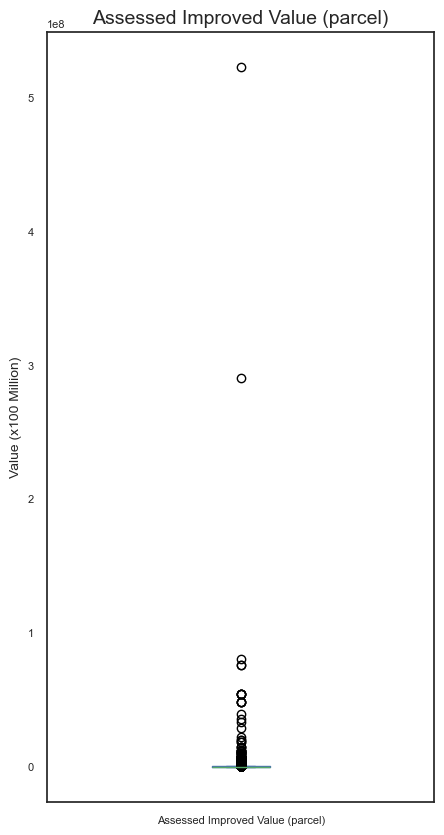

In [12932]:
plt.figure(figsize=(5, 10))
df['Assessed Improved Value (parcel)'].plot(
    kind='box',  
)
plt.title('Assessed Improved Value (parcel)', fontsize=14)
plt.ylabel('Value (x100 Million)')

plt.show()

As you can see I wanted to estimate the 95th percentile, to potentially clamp the high outlying data according to this value

However, the outcome of the 95th percentile is 'nan'

Therefore, I will have to infer null values within the feature

In [12933]:
perc95 = np.percentile(df['Assessed Improved Value (parcel)'], 95)
perc95

nan

In [12934]:
null_count = df['Assessed Improved Value (parcel)'].isnull().sum()
null_count

679

Therefore, I have decided to infer the 'Assessed Improved Value (parcel)' based on the median value of the other houses on the same street name

In [12935]:
# switch it to a float as it will be the median value
df["Assessed Improved Value (parcel)"] = df["Assessed Improved Value (parcel)"].astype(float)

#find the median value based on the street name the house is located
df["Assessed Improved Value (parcel)"] = df["Assessed Improved Value (parcel)"].fillna(
    df.groupby("Street Name")["Assessed Improved Value (parcel)"].transform("median")
)

#put the value back to the Int64 data type that I desire
df["Assessed Improved Value (parcel)"] = df["Assessed Improved Value (parcel)"].round().astype("Int64")

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2544759011.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Street Name")["Assessed Improved Value (parcel)"].transform("median")


After inferring data into rows based on the median Assessed Improved Value (parcel) of the street name, it is clearly shown that I have a remainder of 301 null values

This indicates that there is null values as the street name has no data to calculate a median on

Hence, I will drop these rows as they provide no data insight

In [12936]:
null_count = df['Assessed Improved Value (parcel)'].isnull().sum()
null_count

297

In [12937]:
# i want to see groups with no non-null values in 'Assessed Improved Value (parcel)'
missing_group_counts = df.groupby("Street Name")["Assessed Improved Value (parcel)"].count()
print(missing_group_counts[missing_group_counts == 0])


Street Name
12                    0
20S79                 0
33                    0
35 Milestone Tract    0
45 Cr 34              0
                     ..
Wright Ranch          0
Yaqui Gulch           0
Yellow Hill           0
Yerba Buena           0
Yerba Bueno           0
Name: Assessed Improved Value (parcel), Length: 573, dtype: Int64


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2828621168.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_group_counts = df.groupby("Street Name")["Assessed Improved Value (parcel)"].count()


As previously mentioned, I still intend to clamp the data due to extreme outliers that distort the data

Therefore, like shown in lab4, I have set all values above the 99th percentile to the 99th percentile value

In [12938]:

perc99 = int(round(df['Assessed Improved Value (parcel)'].quantile(0.99)))


df.loc[df['Assessed Improved Value (parcel)'] > perc99, 'Assessed Improved Value (parcel)'] = perc99

df['Assessed Improved Value (parcel)'] = df['Assessed Improved Value (parcel)'].astype('Int64')

In [12939]:
df = df.dropna(subset=['Assessed Improved Value (parcel)'])

### Year Built 

-> Values of ‘0’ within the feature are converted to null values

-> Outliers are removed from the dataframe, where the year is older than 1818 (the older house in California) 

-> This feature does not correlate with any feature in the dataframe in a significant amount, therefore I will infer the data based upon the strongest features in the dataframe, as I cannot afford to drop ~3000 rows of null data

-> Null data is inferred at 60% from the features ‘Zip Code’ and ‘County’ respectively

Other possible solutions:

-> Infer the null values based the median value of the feature

-> However, this is a less accurate representation of the data in comparison to estimating a value based on a relationship greater than a 50/50 chance

-> I could drop all initial null values as the feature's correlation to all remaining features is not the best, however, as mentioned this would result in too great of a data loss

I will analyse the data's category types and format any issues in data cleanliness

In [12940]:
unique_types = df['Year Built (parcel)'].unique().tolist()
print(unique_types)

[1962, <NA>, 0, 1990, 1997, 1948, 2000, 1979, 1940, 1998, 1953, 1967, 1939, 1968, 1988, 1942, 1969, 1955, 1983, 1991, 2012, 1946, 1910, 1985, 1952, 1978, 1959, 1947, 1950, 1941, 1984, 1915, 1945, 1987, 1956, 1975, 1949, 1925, 1977, 1930, 1963, 1958, 1981, 1970, 1996, 1932, 1957, 1995, 1927, 1936, 1922, 1976, 1989, 1986, 1954, 2002, 1994, 1999, 1964, 2010, 2001, 1929, 1928, 1931, 1993, 1913, 2019, 1960, 1951, 1900, 1944, 1974, 1982, 2003, 2008, 1980, 1923, 1992, 1938, 1961, 2011, 1973, 2007, 2005, 1926, 1917, 1907, 2009, 1965, 1906, 2013, 1934, 1914, 2004, 1920, 1924, 1972, 1971, 2018, 1937, 2016, 1935, 2006, 2015, 2014, 1911, 2017, 1916, 1966, 1912, 1943, 1880, 1919, 1894, 1890, 1921, 1933, 1776, 1904, 1871, 1918, 1895, 2020, 1908, 2021, 1899, 1909, 1885, 1905, 2022, 1865, 1877, 1887, 1901, 1878]


In [12941]:
df['Year Built (parcel)'] = df['Year Built (parcel)'].replace(0, np.nan)

In [12942]:
unique_types = df['Year Built (parcel)'].dropna().unique().tolist()
unique_types.sort()
print(unique_types)

[1776, 1865, 1871, 1877, 1878, 1880, 1885, 1887, 1890, 1894, 1895, 1899, 1900, 1901, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [12943]:
count_1776 = df[df['Year Built (parcel)'] == 1776].shape[0]
print(count_1776)

2


In [12944]:
df = df.drop(df[df['Year Built (parcel)'] == 1776].index)

In [12945]:
count_1776 = df[df['Year Built (parcel)'] == 1776].shape[0]
print(count_1776)

0


Here I can see that in the data, that all houses are built prior to the year 2025 which is legitimate

However, you can also see that there is houses built in the year 1776. This cannot be plausible, as after online research, California's oldest house was built in 1818

Therefore, I will drop this row from the data

Reference - https://www.google.com/search?q=oldest+house+in+california&oq=oldest+house+in+californ&gs_lcrp=EgZjaHJvbWUqBwgAEAAYgAQyBwgAEAAYgAQyBggBEEUYOTIICAIQABgWGB4yCAgDEAAYFhgeMggIBBAAGBYYHjIICAUQABgWGB4yCAgGEAAYFhgeMggIBxAAGBYYHjIICAgQABgWGB4yCAgJEAAYFhge0gEINTU5MGowajeoAgCwAgA&sourceid=chrome&ie=UTF-8

In [12946]:
null_count = df['Year Built (parcel)'].isnull().sum()
null_count

2175

Now I will look at correlations with other features

In [12947]:
# show me correlations related to numerical columns
numerical_features = ['Year Built (parcel)', 'Assessed Improved Value (parcel)', 'Latitude', 'Longitude']
correlation_matrix = df[numerical_features].corr()

print(correlation_matrix['Year Built (parcel)'].sort_values(ascending=False))

Year Built (parcel)                 1.000
Latitude                            0.247
Assessed Improved Value (parcel)    0.165
Longitude                          -0.252
Name: Year Built (parcel), dtype: float64


In [12948]:
#here i made code to highlight the correlation best for year built based on category columns
cat_columns = df.select_dtypes(include=['category']).columns.tolist()

df_cat = df[cat_columns].apply(lambda x: x.cat.codes)

df_cat['Year Built (parcel)'] = df['Year Built (parcel)']

correlation_matrix_cat = df_cat.corr()

print(correlation_matrix_cat['Year Built (parcel)'].sort_values(ascending=False))

Year Built (parcel)                           1.000
Zip Code                                      0.286
City                                          0.275
Roof Construction                             0.142
Deck/Porch On Grade                           0.079
Damage                                        0.074
Deck/Porch Elevated                           0.067
County                                        0.055
Fence Attached to Structure                   0.054
Patio Cover/Carport Attached to Structure     0.044
CAL FIRE Unit                                 0.044
Street Type (e.g. road, drive, lane, etc.)    0.038
Structure Category                            0.024
Street Name                                  -0.003
Site Address (parcel)                        -0.005
Structure Type                               -0.072
Eaves                                        -0.100
Vent Screen                                  -0.108
Exterior Siding                              -0.127
Window Pane 

Based on these charts it is clear that my best correlation to interpretting 'Year Built' is from the 'Zip Code' feature

I dont want to drop all ~3000 columns therefore, I will infer the year built feature to this column

In [12949]:
df['Year Built (parcel)'] = df['Year Built (parcel)'].astype(float)

median_year = df.groupby('Zip Code')['Year Built (parcel)'].transform('median')
df['Year Built (parcel)'] = df['Year Built (parcel)'].fillna(median_year)

df['Year Built (parcel)'] = df['Year Built (parcel)'].round().astype("Int64")

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1172388098.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_year = df.groupby('Zip Code')['Year Built (parcel)'].transform('median')


In [12950]:
missing_group_counts = df.groupby("Zip Code")['Year Built (parcel)'].count()
print(missing_group_counts[missing_group_counts == 0])

Zip Code
90263    0
91917    0
91935    0
91980    0
92092    0
        ..
96032    0
96039    0
96044    0
96048    0
96051    0
Name: Year Built (parcel), Length: 122, dtype: Int64


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1664929340.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_group_counts = df.groupby("Zip Code")['Year Built (parcel)'].count()


In [12951]:
null_count = df['Year Built (parcel)'].isnull().sum()
null_count

767

Where I cannot infer values based on 'Zip Code', I will infer based on the 2nd highest correlating feature 'County' 

In [12952]:
df['Year Built (parcel)'] = df['Year Built (parcel)'].astype(float)

median_year = df.groupby('County')['Year Built (parcel)'].transform('median')
df['Year Built (parcel)'] = df['Year Built (parcel)'].fillna(median_year)

df['Year Built (parcel)'] = df['Year Built (parcel)'].round().astype("Int64")

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\628740248.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_year = df.groupby('County')['Year Built (parcel)'].transform('median')


In [12953]:
null_count = df['Year Built (parcel)'].isnull().sum()
null_count

6

In [12954]:
df = df.dropna(subset=['Year Built (parcel)'])

### Vent Screen

-> This feature does not correlate with any feature in the dataframe, including the target feature, at a greater correspondence than 30-40%

-> Therefore, I have decided that with the feature will be dropped from the database, as dropping only null rows equates to losing more than one quarter of the data set

Other solutions:

-> Don't drop the feature but instead drop all null values

-> However, this will lead to the deletion of ~25% of the dataframe's information

-> Keep the feature but infer the mode category for all null values

-> However, this will mean that for 25% of the dataframe this column will only be correct from a guess at a rate of 1/5th


First I must check all types of 'Vent Screen', for cleaning and formatting issues

In [12955]:
unique_types = df['Vent Screen'].unique().tolist()
print(unique_types)

['No Vents', 'Unknown', 'Mesh Screen <= 1/8""', 'Mesh Screen > 1/8""', 'Screened', nan, 'Unscreened']


In [12956]:
df['Vent Screen'] = df['Vent Screen'].replace("Unknown", np.nan)
df['Vent Screen'] = df['Vent Screen'].replace('Mesh Screen > 1/8""', 'Mesh Screen > 1/8')
df['Vent Screen'] = df['Vent Screen'].replace('Mesh Screen <= 1/8""', 'Mesh Screen <= 1/8')

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\3029853467.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Vent Screen'] = df['Vent Screen'].replace("Unknown", np.nan)
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\3029853467.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Vent Screen'] = df['Vent Screen'].replace('Mesh Screen > 1/8""', 'Mesh Screen > 1/8')
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\3029853467.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, 

In [12957]:
unique_types = df['Vent Screen'].unique().tolist()
print(unique_types)

['No Vents', nan, 'Mesh Screen <= 1/8', 'Mesh Screen > 1/8', 'Screened', 'Unscreened']


Now that I have investigated and cleaned the cardinality of the feature, I will now try to find correlations with the 'Vent Screen' feature and other columns

In [12958]:
null_count = df['Vent Screen'].isnull().sum()
null_count

2168

In [12959]:
# show frequency tables for 'Vent Screen'
tables = show_frequency_tables('Vent Screen')
tables

Frequency table for grouping by 'Damage':
Vent Screen       Mesh Screen <= 1/8  Mesh Screen > 1/8  No Vents  Screened  \
Damage                                                                        
Destroyed (>50%)               20.18              46.78     19.29     11.16   
No Damage                      25.53              33.58     37.09      0.78   

Vent Screen       Unscreened  
Damage                        
Destroyed (>50%)        2.58  
No Damage               3.01  


Frequency table for grouping by 'Street Name':
Vent Screen          Mesh Screen <= 1/8  Mesh Screen > 1/8  No Vents  \
Street Name                                                            
106th                              0.00                0.0     33.33   
116th                              0.00                0.0      0.00   
11th                               0.00                0.0    100.00   
12                                 0.00                0.0      0.00   
12 Mile Bar                        0

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_f

Frequency table for grouping by 'Deck/Porch On Grade':
Vent Screen          Mesh Screen <= 1/8  Mesh Screen > 1/8  No Vents  \
Deck/Porch On Grade                                                    
Composite                         55.81              30.23      9.30   
Masonry/Concrete                  28.42              49.75     19.36   
No Deck/Porch                     15.78              30.95     36.14   
Wood                              25.82              43.86     26.83   

Vent Screen          Screened  Unscreened  
Deck/Porch On Grade                        
Composite                0.00        4.65  
Masonry/Concrete         0.25        2.22  
No Deck/Porch           14.09        3.04  
Wood                     0.00        3.49  


Frequency table for grouping by 'Deck/Porch Elevated':
Vent Screen          Mesh Screen <= 1/8  Mesh Screen > 1/8  No Vents  \
Deck/Porch Elevated                                                    
Composite                         41.38        

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2911351072.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target_feature]


Frequency table for grouping by 'Longitude':
Vent Screen  Mesh Screen <= 1/8  Mesh Screen > 1/8  No Vents  Screened  \
Longitude                                                                
-123.671                    0.0              100.0       0.0       0.0   
-123.478                  100.0                0.0       0.0       0.0   
-123.463                    0.0                0.0       0.0       0.0   
-123.459                    0.0                0.0     100.0       0.0   
-123.457                    0.0                0.0     100.0       0.0   
...                         ...                ...       ...       ...   
-116.690                    0.0                0.0     100.0       0.0   
-116.690                    0.0                0.0     100.0       0.0   
-116.683                    0.0                0.0     100.0       0.0   
-116.653                    0.0              100.0       0.0       0.0   
-116.643                    0.0                0.0     100.0       

{'Damage': Vent Screen       Mesh Screen <= 1/8  Mesh Screen > 1/8  No Vents  Screened  \
 Damage                                                                        
 Destroyed (>50%)               20.18              46.78     19.29     11.16   
 No Damage                      25.53              33.58     37.09      0.78   
 
 Vent Screen       Unscreened  
 Damage                        
 Destroyed (>50%)        2.58  
 No Damage               3.01  ,
 'Street Name': Vent Screen          Mesh Screen <= 1/8  Mesh Screen > 1/8  No Vents  \
 Street Name                                                            
 106th                              0.00                0.0     33.33   
 116th                              0.00                0.0      0.00   
 11th                               0.00                0.0    100.00   
 12                                 0.00                0.0      0.00   
 12 Mile Bar                        0.00              100.0      0.00   
 ...         

In [12960]:
freq_table = (
    df.groupby("Exterior Siding")['Vent Screen']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1154281398.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Exterior Siding")['Vent Screen']


Vent Screen          Mesh Screen <= 1/8  Mesh Screen > 1/8  No Vents  \
Exterior Siding                                                        
Combustible                       20.49              43.98     13.82   
Fire Resistant                     0.00               0.00      3.87   
Ignition Resistant                32.12              48.28     16.88   
Metal                             11.72               8.79     76.99   
Other                             16.47              40.00     41.18   
Stucco/Brick/Cement               25.25              48.23     24.41   
Vinyl                             32.79              18.03     45.90   
Wood                              22.21              37.25     36.93   

Vent Screen          Screened  Unscreened  
Exterior Siding                            
Combustible             18.70        3.01  
Fire Resistant          95.58        0.55  
Ignition Resistant       0.00        2.72  
Metal                    0.00        2.51  
Other                    0.00        2.35  
Stucco/Brick/Cement      0.00        2.11  
Vinyl                    0.00        3.28  
Wood                     0.00        3.61

In [12961]:
freq_table = (
    df.groupby("Roof Construction")['Vent Screen']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\3571769924.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Roof Construction")['Vent Screen']


Vent Screen        Mesh Screen <= 1/8  Mesh Screen > 1/8  No Vents  Screened  \
Roof Construction                                                              
Asphalt                         25.25              50.25     21.46      0.05   
Combustible                      0.00               0.00     12.12     81.82   
Concrete                        18.87              39.62     39.62      0.00   
Fire Resistant                   0.00               0.00      6.20     92.45   
Metal                           17.21              24.41     55.14      0.00   
Other                           11.76              23.53     62.35      0.00   
Tile                            35.76              43.23     19.27      0.00   
Wood                            20.34              28.81     50.85      0.00   

Vent Screen        Unscreened  
Roof Construction              
Asphalt                  2.99  
Combustible              6.06  
Concrete                 1.89  
Fire Resistant           1.35  
Metal                    3.25  
Other                    2.35  
Tile                     1.74  
Wood                     0.00

In [12962]:
freq_table = (
    df.groupby("County")['Vent Screen']
    .value_counts(normalize=True) 
    .mul(100)                      
    .round(2)                     
    .unstack(fill_value=0)         
)

freq_table

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\830485040.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("County")['Vent Screen']


Vent Screen      Mesh Screen <= 1/8  Mesh Screen > 1/8  No Vents  Screened  \
County                                                                       
Alameda                        0.00              33.33     66.67      0.00   
Alpine                         7.14              32.14     57.14      0.00   
Amador                         0.00               0.00      0.00      0.00   
Butte                         26.33              52.14     18.55      0.19   
Calaveras                     70.00              10.00     20.00      0.00   
Colusa                         0.00               0.00    100.00      0.00   
El Dorado                     17.11              46.05     33.88      0.00   
Fresno                        20.41              34.69     42.86      0.00   
Glenn                          0.00              40.00     20.00      0.00   
Humboldt                       0.00             100.00      0.00      0.00   
Inyo                           0.00             100.00      0.00      0.00   
Kern                          15.00              25.00     46.67      6.67   
Lake                          16.00              12.00     36.00     20.00   
Lassen                        46.88              18.75     34.38      0.00   
Los Angeles                   19.03              51.54     26.95      0.00   
Madera                        17.39              13.04     69.57      0.00   
Mariposa                      42.86              18.57     37.14      1.43   
Mendocino                      3.85              15.38     38.46     42.31   
Monterey                      33.33              16.67     50.00      0.00   
Napa                          21.83              21.83     39.44     15.14   
Nevada                        35.00              30.00     30.00      5.00   
Orange                        45.86              38.35     15.79      0.00   
Placer                        33.33              31.25     33.33      0.00   
Plumas                        29.39              22.81     45.61      0.00   
Riverside                     14.71              47.06     36.76      0.00   
Sacramento                     0.00               0.00      0.00      0.00   
San Benito                    25.00               0.00     50.00      0.00   
San Bernardino                22.54              25.35     50.70      0.00   
San Diego                      6.25               0.00     75.00     18.75   
San Joaquin                   20.00              60.00     20.00      0.00   
San Luis Obispo                0.00               0.00      0.00      0.00   
San Mateo                      0.00               0.00      0.00      0.00   
Santa Barbara                 16.00              16.00     44.00     12.00   
Santa Clara                   31.58               5.26     63.16      0.00   
Santa Cruz                    11.49              47.13     26.44      0.00   
Shasta                        36.23              31.40     30.43      0.00   
Siskiyou                      42.59              24.07     29.63      0.00   
Solano                        41.27              30.16     26.98      1.59   
Sonoma                        10.40              14.00     14.00     59.40   
Stanislaus                   100.00               0.00      0.00      0.00   
Tehama                        12.90              24.19     56.45      0.00   
Trinity                       25.00               5.00     60.00      0.00   
Tulare                        20.00              36.00     40.00      0.00   
Tuolumne                       0.00              50.00     50.00      0.00   
Ventura                       22.05              40.94     33.07      0.00   
Yolo                          25.00               0.00     62.50      0.00   
Yuba                           0.00               0.00    100.00      0.00   

Vent Screen      Unscreened  
County                       
Alameda                0.00  
Alpine                 3.57  
Amador                 0.00  
Butte                  2.79

In [12963]:
null_count = df['Vent Screen'].isnull().sum()
null_count

2168

After considering the correlation of the 'Vents Screen' feature with every column in the dataset, I cannot accurately imputate null values based on other columns

Therefore I have decided that with the feature will be dropped from the database, as dropping only null rows equates to losing more than one quarter of the data set

The reason why I also dropped the 'Vent Screen' column is because it is also clear that there is no correlation to this feature and 'Damage' the target feature (best correlation is at 40%)

Therefore, I think it is only just to drop the column

In [12964]:
df = df.drop(columns=['Vent Screen'])

### Site Address

-> As previously stated, I have decided to drop the column as a good data insight is unattainable from it, once I have inferred other column's data using it.

-> This column is made from a combination of other columns and can be referenced as redundant and a repetition of information (you wouldnt have repeating data in a Relation Database Schematic)

In [12965]:
df = df.drop(columns=['Site Address (parcel)'])

## Exercise - Part 2.2 

Final Check for Null Values in Dataframe

In [12966]:
df.shape

(8124, 23)

In [12967]:
null_sum = df.isna().sum()
print(null_sum)

OBJECTID                                      0
Damage                                        0
Street Name                                   0
Street Type (e.g. road, drive, lane, etc.)    0
City                                          0
Zip Code                                      0
CAL FIRE Unit                                 0
County                                        0
Incident Start Date                           0
Structure Type                                0
Structure Category                            0
Roof Construction                             0
Eaves                                         0
Exterior Siding                               0
Window Pane                                   0
Deck/Porch On Grade                           0
Deck/Porch Elevated                           0
Patio Cover/Carport Attached to Structure     0
Fence Attached to Structure                   0
Assessed Improved Value (parcel)              0
Year Built (parcel)                     

## Exercise - Part 2.3

Save Cleaned Data to CSV File

In [ ]:
df.to_csv("ex3_clean-cal-wildfires-utf8.csv", index=False)

## Exercise - Part 3

I will try to select a subset of features to plot pairwise interactions with from the dataframe.

The features that I will look at for pairwise feature interactions are the following continuous features:
- Assessed Improved Value (parcel)
- Year Built (parcel)
- Latitude
- Longitude

and the following categorical features:
- Damage
- Structure Type
- Eaves
- Roof Construction
- Exterior Siding
- Window Pane
- Deck/Porch On Grade
- Deck/Porch Elevated
- Patio Cover/Carport Attached to Structure
- Fence Attached to Structure
- County
- CAL FIRE Unit
- Street Type
- Incident Start Date

The choices here I based on the idea that these particular features would be strong markers to indicate the 'Damage' of a property.

These features were selected due to a combination of their relative correlation table strength, produced throughout exercise 2, and will be addressed given the distribution of their data in lieu of the data quality report

### Additional Reasoning

Assessed Improved Value:
- May indicate a direct result/meausre of property value, the construction type and quality (needed for protection quality in lieu of wildfire)

Year Built:
- This variable indicates the property age and therefore can indicate construction types/techniques that influence damage resistance

Latitude and Longitude:
- Geographical locational data that can reveal locational patterns in the wildfire impact

Structure Type:
- Indicator to the propertie's response to a wildfire event, capturing design, material and construction standards/differences

Exterior Siding:
- The materials used on the building/property can have direct influence to fire resistance (e.g. maybe fire can be the worst?)

Window Pane:
- Window quality of a single or multi-pane can potentially highlight overall building standatds and features

Deck/Porch On Grade and Deck/Porch Elevated:
- Features with additional external structures whose design and placement may have impact on a building during a fire

Patio Cover/Carport Attached to Structure and Fence Attached to Structure:
- The feature will modify the building and could potentially mitigate or exacerbate the damage to the building

Roof Construction:
- Roof material and structure determine fire resistance and damage

CAL FIRE Unit:
- Fire management team effectiveness and skill could have an impact on fire damage extinguish and prevention

Eaves:
- The design and material of eaves impact ember trapping and fire spread, making them a key factor in wildfire damage

County:
- Location based identifiers can capture regional differences in both building quality/structure but also fire management and damage outcome

Street Type:
- Reflects the neighbourhood land use patterns and infrastructure, maybe correlating to building density and wildfire outcome

Incident Start Date:
- Captures seasonal and temporal trends in the data, to reveal weather effects on data

### Continuous vs Continuous

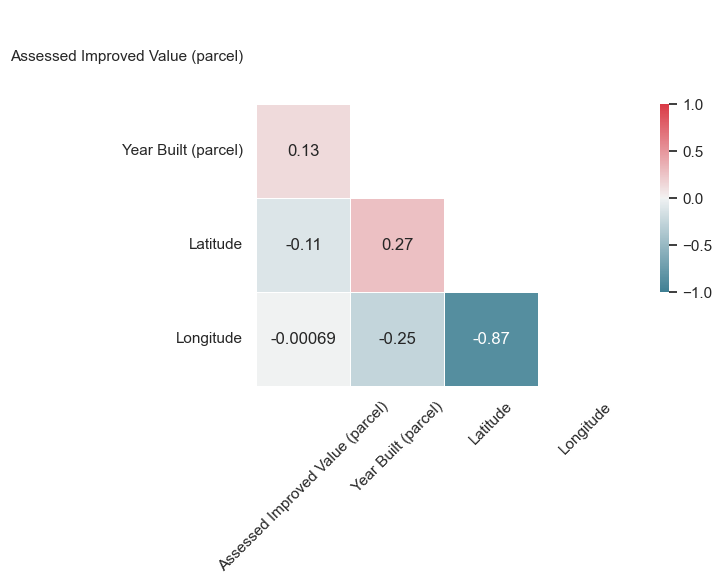

In [12969]:
sns.set(style="white")

# Define the continuous features
continuous_columns = [
    'Assessed Improved Value (parcel)',
    'Year Built (parcel)',
    'Latitude',
    'Longitude'
]

# Calculate the correlation matrix for continuous features
corr = df[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))  

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(
    corr, 
    annot=True, 
    mask=mask, 
    cmap=cmap, 
    vmax=1, 
    vmin=-1,
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .5}, 
    ax=ax
)

plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

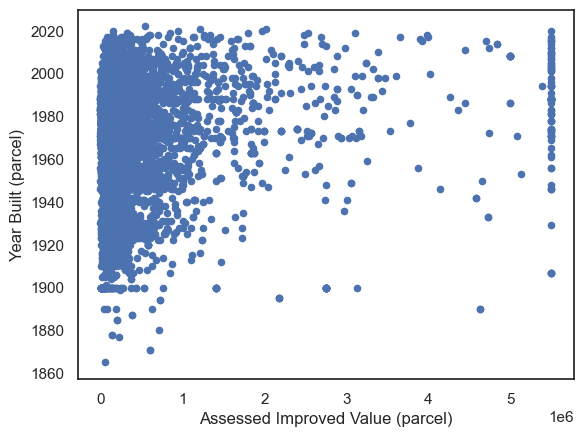

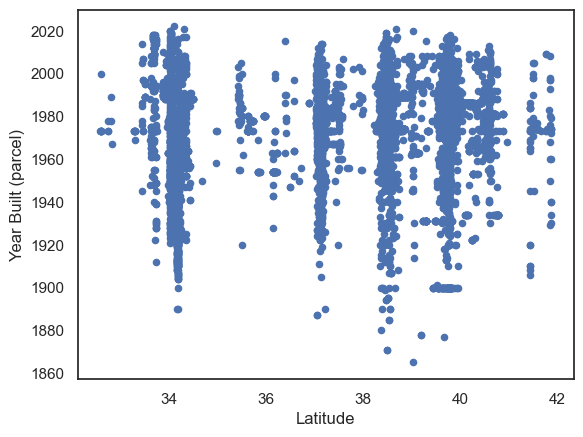

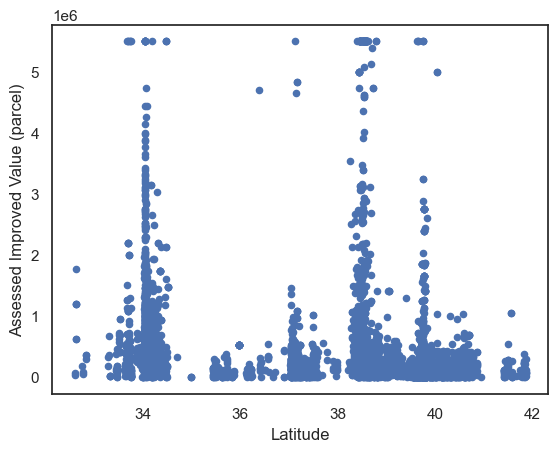

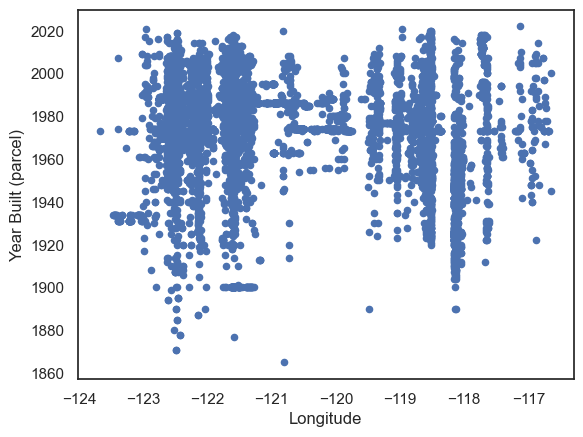

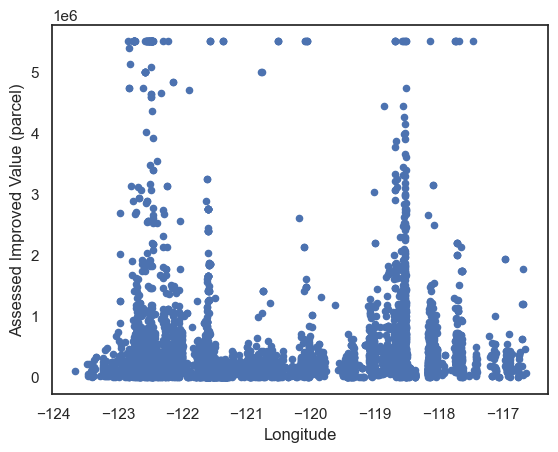

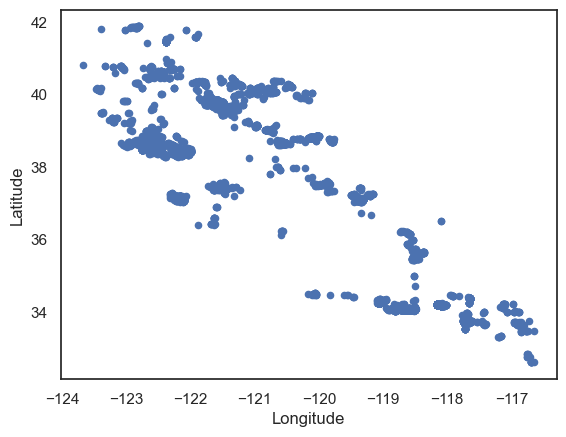

In [12970]:
plt.close()
df.plot(kind='scatter', x='Assessed Improved Value (parcel)', y='Year Built (parcel)')
df.plot(kind='scatter', x='Latitude', y='Year Built (parcel)')
df.plot(kind='scatter', x='Latitude', y='Assessed Improved Value (parcel)')
df.plot(kind='scatter', x='Longitude', y='Year Built (parcel)')
df.plot(kind='scatter', x='Longitude', y='Assessed Improved Value (parcel)')
df.plot(kind='scatter', x='Longitude', y='Latitude')
plt.show()

The continuous features above were chosen as we believed they could have a strong impact on damage outcome.
- We see from the above correlation matrix that there is one strong correlation worth highlighting
- We can see that there is a very strong negative correlation (-0.87) between the features 'Longitude' and 'Latitude'
- We can see a slight positive correlation (0.27) between the 'Year Built (parcel)' and 'Latitude' columns, indicating newer houses slightly tend to be built on higher latitudes
- We can see a slight negative correlation (-0.25) between the 'Year Built (parcel)' and 'Longitude' columns, indicating newer houses slightly tend to be built on lower longitudes
- We can see a slight positive correlation (0.13) between 'Year Built (parcel)' and 'Assessed Improved Value (parcel)', indicating newer houses have a slightly higher assessed improved value
- From this we do not get much additional information in relation to paired continuous features, due to their weak correlation relationships 

### Categorical vs Categorical

In [12971]:
def compare_feature_to_target(df, feature):
    # work on a copy so we don't modify the original DataFrame
    df = df.copy()

    #this is to remove any category types that still remain due to my 'groupby' function

    ###!this is actually an issue in her code/lab which she didnt address!!
    if pd.api.types.is_categorical_dtype(df[feature]):
        df[feature] = df[feature].cat.remove_unused_categories()

    # If the feature is 'Incident Start Date', convert it to a year-month string
    if feature == 'Incident Start Date':
        # Convert to datetime, then to period (month) and back to string for grouping
        df[feature] = pd.to_datetime(df[feature]).dt.to_period('M').astype(str)

    #Using code from the module lab
    unique_vals = pd.unique(df[feature].ravel())
    
    # add new column and set values to zero
    df['percent'] = 0
    
    # print header
    print(feature)
    print("Index \t Count")
    
    # for each unique value of the feature, calculate the count and assign a percentage per row
    for val in unique_vals:
        count = df[df[feature] == val].count()['Damage']
        count_percentage = (1 / count) * 100
        
        # print out index vs count
        print(val, "\t", count)
        
        # Set the percentage value for each row corresponding to the current feature value
        index_list = df[df[feature] == val].index.tolist()
        for ind in index_list:
            df.loc[ind, 'percent'] = count_percentage
            
    # Group by the feature and target columns, summing the percentages to get 100% per group
    group = df[['percent', feature, 'Damage']].groupby([feature, 'Damage']).sum()
    
    # Create a stacked bar plot (adjust the legend names if necessary)
    my_plot = group.unstack().plot(
        kind='bar', 
        stacked=True, 
        title=f"{'Damage'} vs {feature}", 
        figsize=(15,7), 
        grid=True
    )
    
    # Set legend, labels, and limits
    my_plot.legend(["No Damage", "Damage >50%"])
    my_plot.set_xlabel(feature)
    my_plot.set_ylabel("% " + 'Damage')
    my_plot.set_ylim([0, 100])
    
    # Show the plot
    plt.show()


In [12972]:
import pandas as pd
import matplotlib.pyplot as plt

def compare_feature_to_feature(df, feature, feature2):
    # Work on a copy so we don't modify the original DataFrame
    df = df.copy()

    # Remove unused categories if feature is categorical
    if pd.api.types.is_categorical_dtype(df[feature]):
        df[feature] = df[feature].cat.remove_unused_categories()

    # Convert 'Incident Start Date' to year-month format
    if feature == 'Incident Start Date':
        df[feature] = pd.to_datetime(df[feature]).dt.to_period('M').astype(str)

    # Get unique values
    unique_vals = pd.unique(df[feature].ravel())

    # Add new column and set values to zero
    df['percent'] = 0

    print(feature)
    print("Index \t Count")

    # Calculate count and percentage
    for val in unique_vals:
        count = df[df[feature] == val].count()[feature2]
        count_percentage = (1 / count) * 100 if count > 0 else 0
        
        print(val, "\t", count)

        # Assign percentage to rows
        df.loc[df[feature] == val, 'percent'] = count_percentage

    # Group by the feature and target columns
    group = df[['percent', feature, feature2]].groupby([feature, feature2]).sum().unstack()

    # Fix legend names (remove 'percent' prefix)
    group.columns = group.columns.droplevel(0)

    # Create stacked bar plot
    fig, ax = plt.subplots(figsize=(20, 7))
    my_plot = group.plot(
        kind='bar',
        stacked=True,
        title=f"{feature2} vs {feature}",
        figsize=(20, 7),
        grid=True,
        ax=ax
    )

    # Adjust legend dynamically
    legend = my_plot.legend(
        title=feature2,  # Only show feature2 in legend
        loc="upper left",
        bbox_to_anchor=(1, 1),  # Moves legend outside the plot
        ncol=min(3, len(df[feature2].unique()) // 10 + 1),  # Adjusts columns dynamically
        fontsize=10
    )

    # Set labels and limits
    my_plot.set_xlabel(feature)
    my_plot.set_ylabel(feature2)
    my_plot.set_ylim([0, 100])

    # Adjust layout to prevent cutoff
    plt.subplots_adjust(right=0.75)  # Shrinks the plot area to fit the legend
    plt.show()


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:8: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[feature]):
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:17: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_vals = pd.unique(df[feature].ravel())
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6060606060606061' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ind, 'percent'] = count_percentage


Structure Type
Index 	 Count
Commercial Building Single Story 	 165
Motor Home 	 108
Single Family Residence Single Story 	 3108
Utility Misc Structure 	 1914
Mobile Home Single Wide 	 203
Single Family Residence Multi Story 	 1948
Mobile Home Double Wide 	 375
Multi Family Residence Single Story 	 56
Multi Family Residence Multi Story 	 96
Mobile Home Triple Wide 	 36
School 	 36
Commercial Building Multi Story 	 45
Mixed Commercial/Residential 	 8
Infrastructure 	 22
Church 	 2
Agriculture 	 1
Hospital 	 1


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df[['percent', feature, 'Damage']].groupby([feature, 'Damage']).sum()


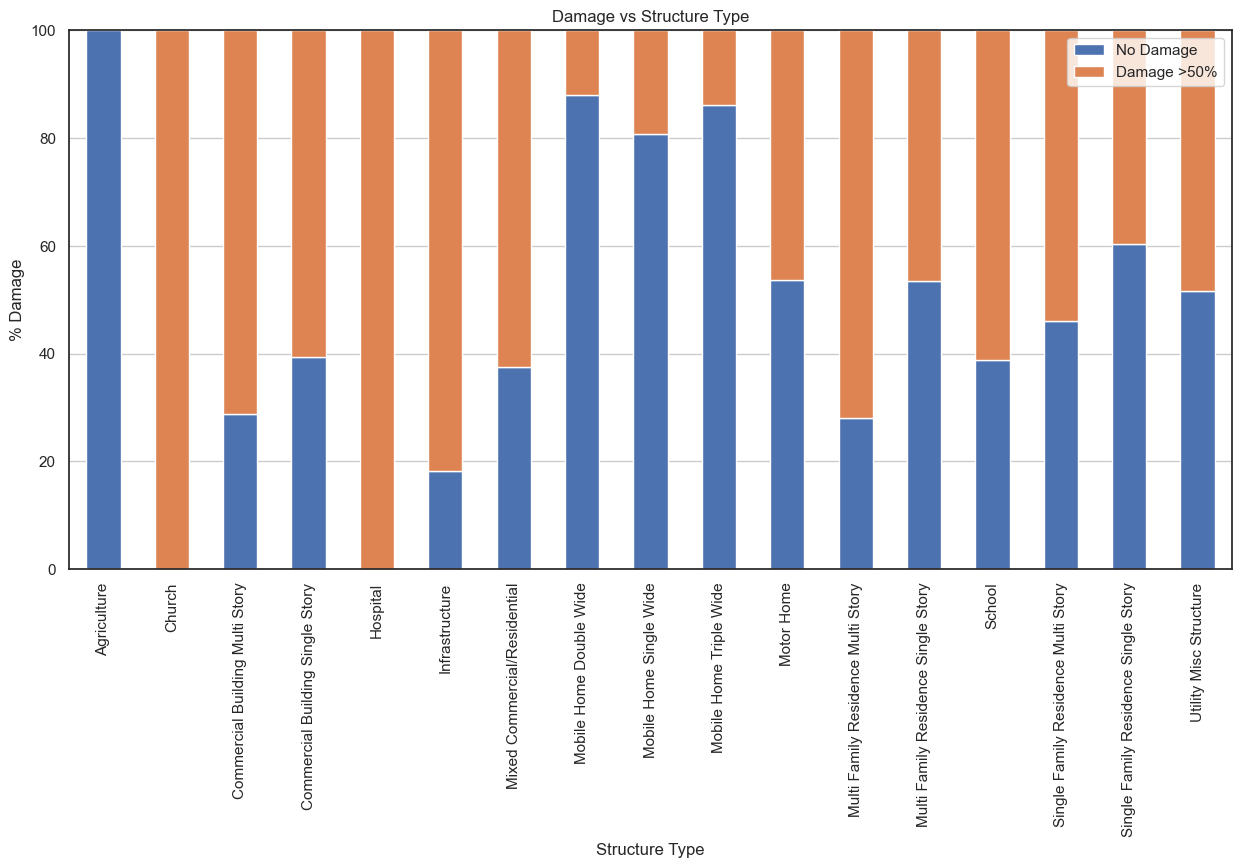

In [12973]:
compare_feature_to_target(df, "Structure Type")

We can see the stacked bar plot for Structure Type against the target Damage.

- The type 'Agriculture' has 100% of 'No Damage', understandably due to the building having a 100% material/siding of metal
- Church has 100% of 'Damage', in lieu of its building exterior siding being 100% wood
- Hospital has a outcome of 100% chance of Damage
- The mobile home structure type correlated to a low chance of Damage (under 20%)
- Commercial and Infrastructure structures contain more than a 50% chance of having Damage
- Overall, structure type clearly correlates/indicates with the Damage outcomes

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:8: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[feature]):
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:17: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_vals = pd.unique(df[feature].ravel())
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.07558578987150416' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ind, 'percent'] = count_percentage


CAL FIRE Unit
Index 	 Count
LNU 	 1323
NEU 	 79
LAC 	 2187
LMU 	 296
SHU 	 280
BTU 	 2028
AEU 	 351
HUU 	 12
CZU 	 349
BDU 	 74
TGU 	 78
VNC 	 155
MMU 	 133
SKU 	 80
KRN 	 86
TUU 	 56
FKU 	 151
ORC 	 148
MEU 	 45
RRU 	 75
SCU 	 52
MVU 	 22
SBC 	 29
TCU 	 15
BEU 	 20


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df[['percent', feature, 'Damage']].groupby([feature, 'Damage']).sum()


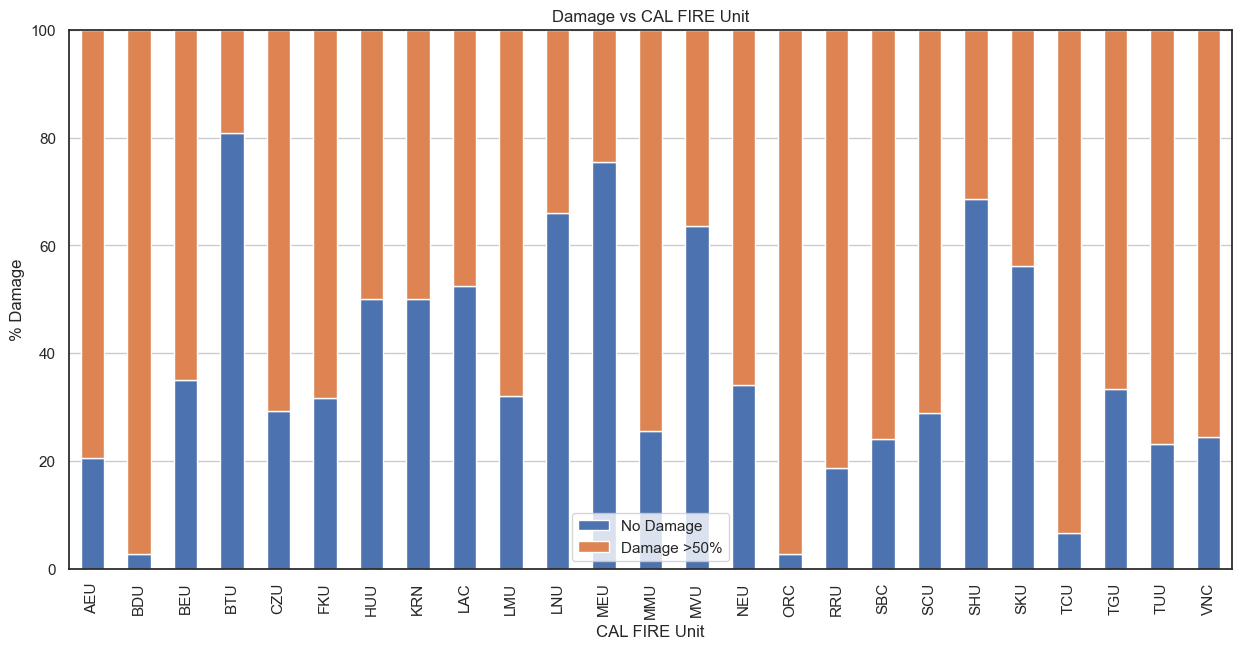

In [12974]:
compare_feature_to_target(df, "CAL FIRE Unit")

We can see the stacked bar plot for CAL FIRE Unit against the target Damage.

- It is notable the variation between certain CAL FIRE Units, e.g. BTU versus BDU
- Across the board there is a different outcome for every unit and showing that no region has a higher immunity
- I think there is evidence to suggest that there is a trend in the CAL FIRE Unit, noting the level of success (No Damage) and unsuccess dependent with particular Fire Unit's, e.g. the success of BTU and failure of BDU + ORC

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:8: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[feature]):
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:17: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_vals = pd.unique(df[feature].ravel())
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.4492753623188406' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ind, 'percent'] = count_percentage


Roof Construction
Index 	 Count
Concrete 	 69
Other 	 95
Asphalt 	 5103
Metal 	 1324
Tile 	 721
Fire Resistant 	 663
Wood 	 76
Combustible 	 73


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df[['percent', feature, 'Damage']].groupby([feature, 'Damage']).sum()


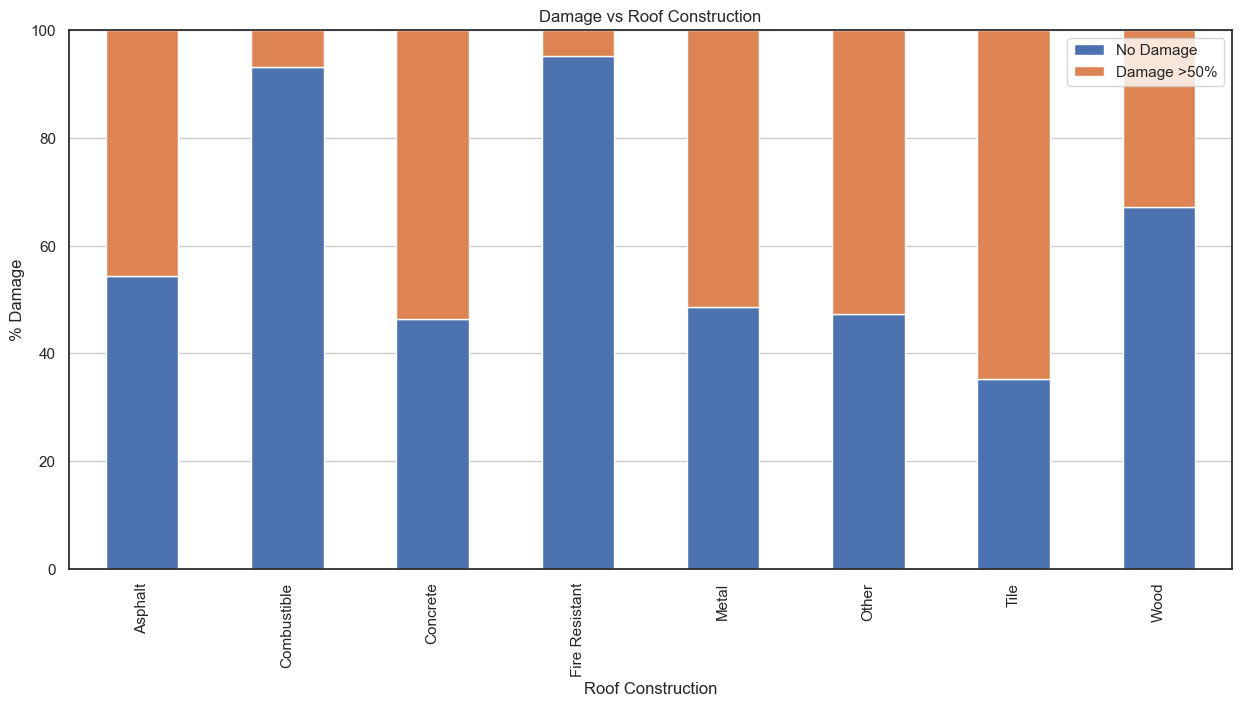

In [12975]:
compare_feature_to_target(df, "Roof Construction")

After seeing the materials 'Combustible' and 'Wood' indicating a trend to 'No Damage', I panicked and didn't know why such an easily lit material would be prone to damage

Therefore, I decided to run more categorical vs categorical charts (trial and error again) to see was there another relationship that created this trend (as well as checking my excel alot!)

As you can see below, I realised when comparing the Exterior Siding feature with the County feature, that the reason why there is a damage outcome trend in these materials is heavily based on the County that the fire was

This indicates the level of damage based on the location of the residence/commerical building and the potential FIRE Unit stationed in this area

Therefore, through a secondary trend, we see that certain counties favoured the use of particular building materials in construction however it is important to note the the damage trend is more based on the premise of the county or FIRE Unit then the material

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2994680370.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[feature]):
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2994680370.py:17: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_vals = pd.unique(df[feature].ravel())
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2994680370.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.04144218814753419' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature] == val, 'percent'] = count_percentage
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2994680370.py:36: FutureWarning: The default of

Exterior Siding
Index 	 Count
Stucco/Brick/Cement 	 2413
Other 	 95
Wood 	 2567
Ignition Resistant 	 686
Combustible 	 1688
Metal 	 275
Vinyl 	 72
Fire Resistant 	 328


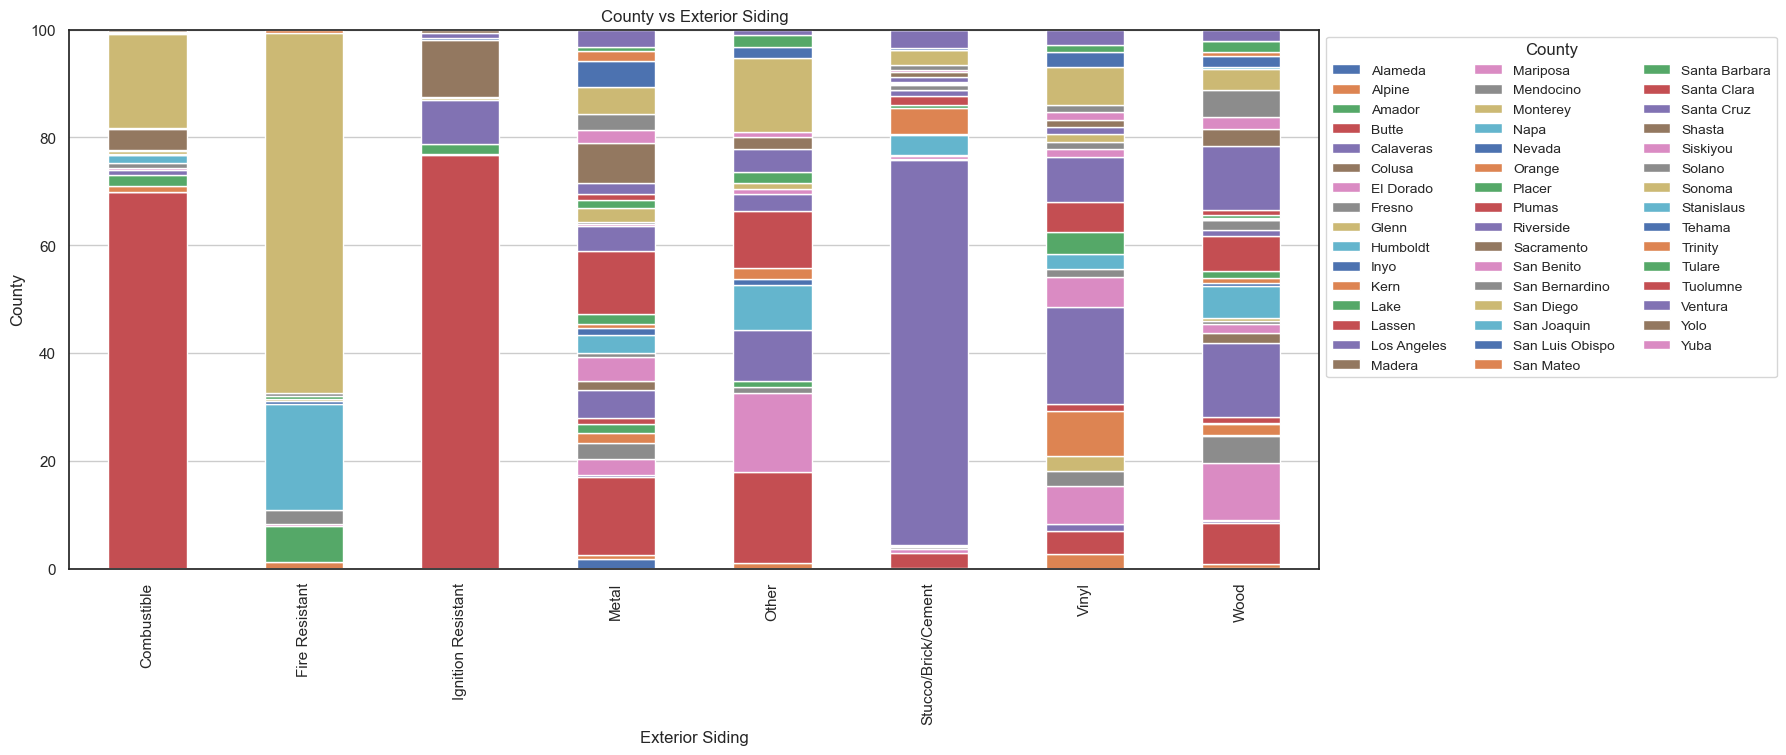

In [12976]:
compare_feature_to_feature(df, "Exterior Siding", "County")

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2994680370.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[feature]):
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2994680370.py:17: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_vals = pd.unique(df[feature].ravel())
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2994680370.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.04144218814753419' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature] == val, 'percent'] = count_percentage
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2994680370.py:36: FutureWarning: The default of

Exterior Siding
Index 	 Count
Stucco/Brick/Cement 	 2413
Other 	 95
Wood 	 2567
Ignition Resistant 	 686
Combustible 	 1688
Metal 	 275
Vinyl 	 72
Fire Resistant 	 328


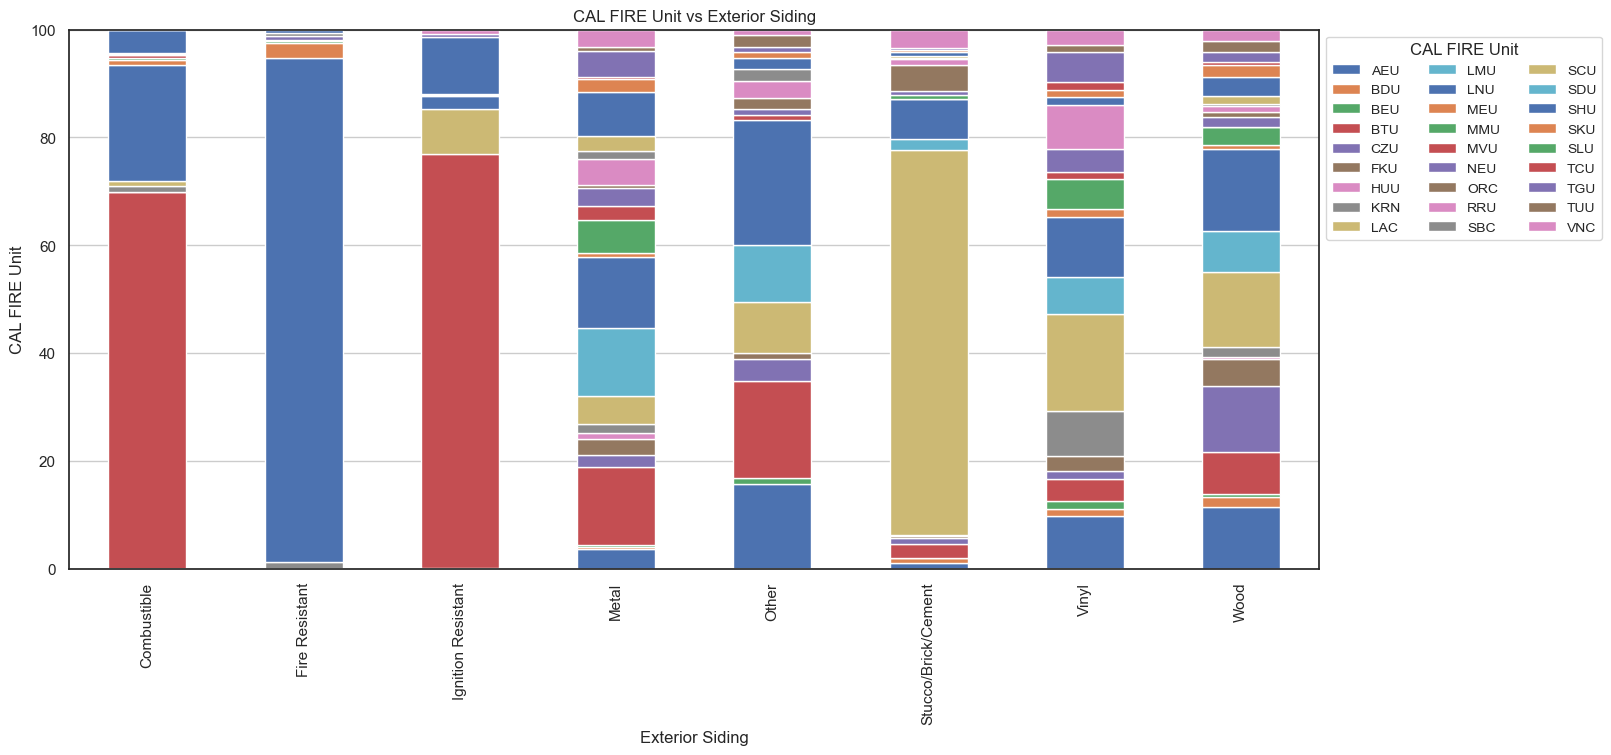

In [12977]:
compare_feature_to_feature(df, "Exterior Siding", "CAL FIRE Unit")

We can see the stacked bar plot for Roof Construction against the target Damage.

- It can be seen that the roof construction type 'Fire Resistant' display a high correlation to the outcome of No Damage, which is expected through initial brainstorming
- Also ironically, you can see that the type 'Combustible' and 'Wood' contain a high outcome of No Damage
- The remainder of the data indicates a balanced damage output based on the roof construction type
- Upon further investigation it was shown that this information shows trend in damage based on a county's preferance for a building material
- Where the select county indicated the trend of the damage outcome and not the material

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:8: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[feature]):
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:17: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_vals = pd.unique(df[feature].ravel())
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.04144218814753419' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ind, 'percent'] = count_percentage


Exterior Siding
Index 	 Count
Stucco/Brick/Cement 	 2413
Other 	 95
Wood 	 2567
Ignition Resistant 	 686
Combustible 	 1688
Metal 	 275
Vinyl 	 72
Fire Resistant 	 328


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df[['percent', feature, 'Damage']].groupby([feature, 'Damage']).sum()


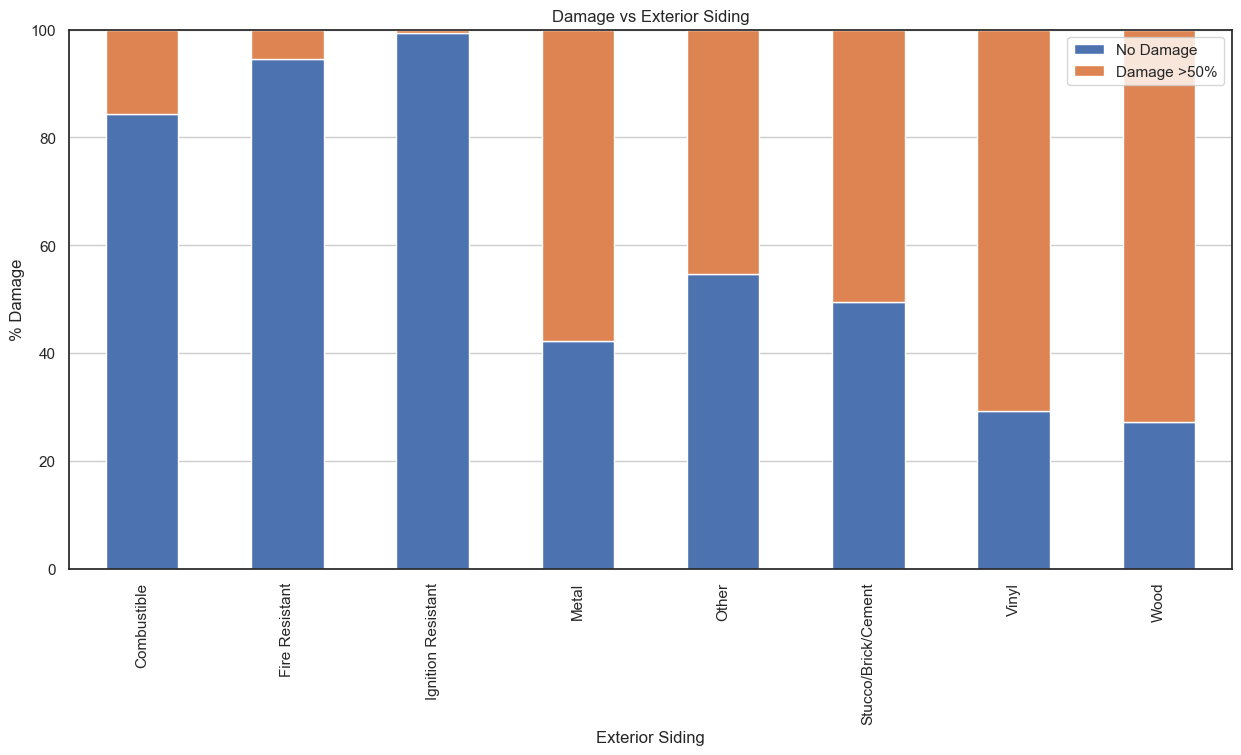

In [12978]:
compare_feature_to_target(df, "Exterior Siding")

Similar to Roof Construction, I investigated the building materials based on their geographical location due to a high trend of 'No Damage' for 'Combustible'

Once again the data indicates the level of damage is based on the location of the residence/commerical building and the potential FIRE Unit stationed in this area

Therefore, through a secondary trend, we see that certain counties favoured the use of particular building materials in construction however it is important to note the the damage trend is more based on the premise of the county or FIRE Unit then the material

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2994680370.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[feature]):
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2994680370.py:17: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_vals = pd.unique(df[feature].ravel())
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2994680370.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.04144218814753419' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature] == val, 'percent'] = count_percentage
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2994680370.py:36: FutureWarning: The default of

Exterior Siding
Index 	 Count
Stucco/Brick/Cement 	 2413
Other 	 95
Wood 	 2567
Ignition Resistant 	 686
Combustible 	 1688
Metal 	 275
Vinyl 	 72
Fire Resistant 	 328


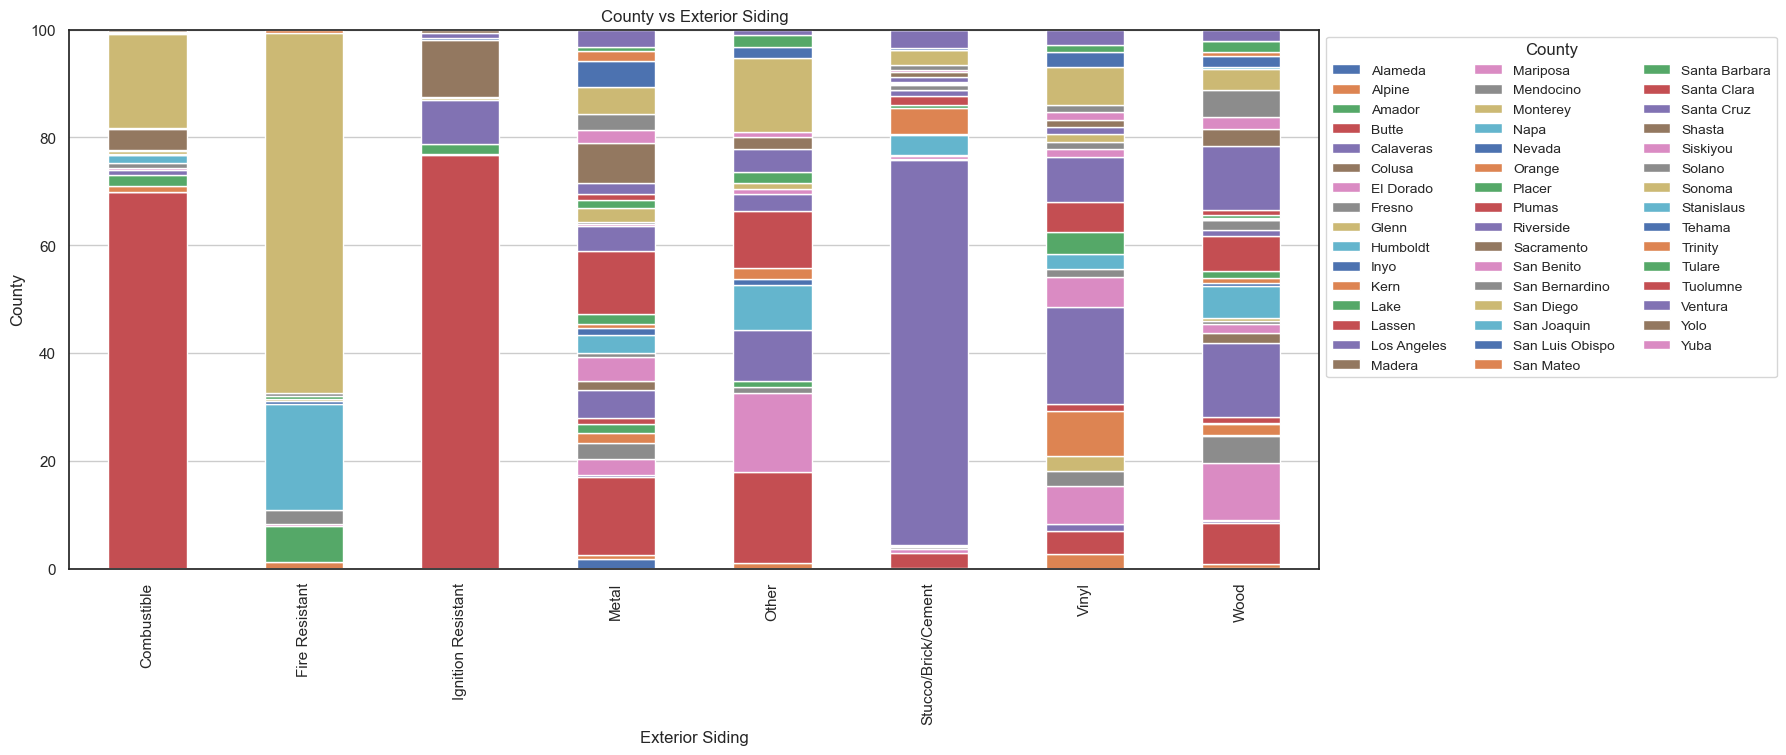

In [12979]:
compare_feature_to_feature(df, "Exterior Siding", "County")

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2994680370.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[feature]):
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2994680370.py:17: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_vals = pd.unique(df[feature].ravel())
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2994680370.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.04144218814753419' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature] == val, 'percent'] = count_percentage
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\2994680370.py:36: FutureWarning: The default of

Exterior Siding
Index 	 Count
Stucco/Brick/Cement 	 2413
Other 	 95
Wood 	 2567
Ignition Resistant 	 686
Combustible 	 1688
Metal 	 275
Vinyl 	 72
Fire Resistant 	 328


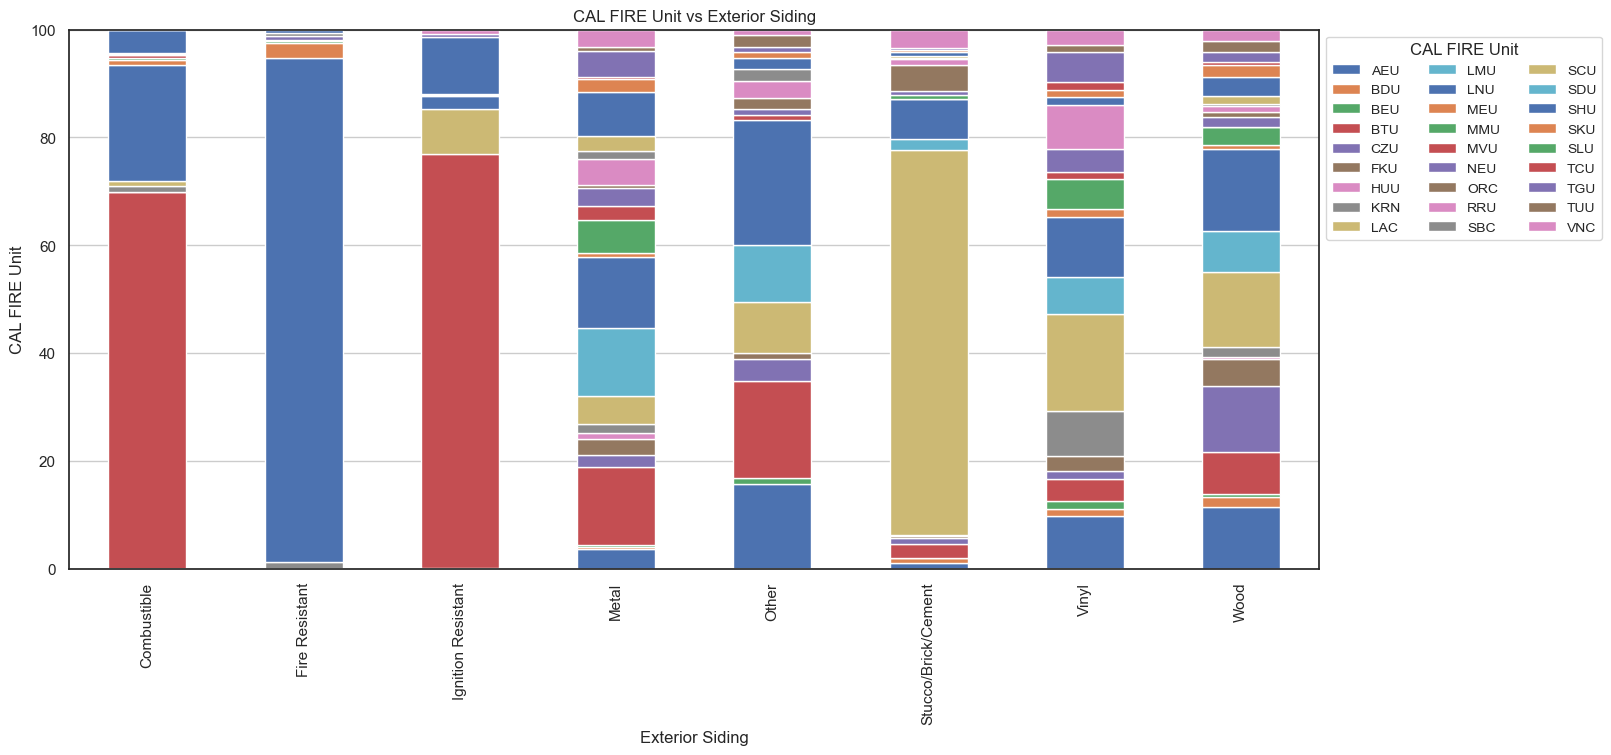

In [12980]:
compare_feature_to_feature(df, "Exterior Siding", "CAL FIRE Unit")

We can see the stacked bar plot for Exterior Siding against the target Damage.

- The types 'Fire Resistant' and 'Ignition Resitant', show remarkably high correlation rates to the outcome of 'No Damage', an understandable outcome given the building material
- Similar to the 'Roof Construction' feature, you can see that the type 'Combustible' contains a high outcome percentage of No Damage
- The remainder of the data indicates a balanced damage output based on the Exterior Siding type
- Upon further investigation it was shown that this information shows trend in damage based on a county's preferance for a building material
- Where the select county indicated the trend of the damage outcome and not the material

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:8: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[feature]):
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:17: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_vals = pd.unique(df[feature].ravel())
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1434720229555237' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ind, 'percent'] = count_percentage


Window Pane
Index 	 Count
No Windows 	 697
Single Pane 	 2806
Multi Pane 	 4621


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df[['percent', feature, 'Damage']].groupby([feature, 'Damage']).sum()


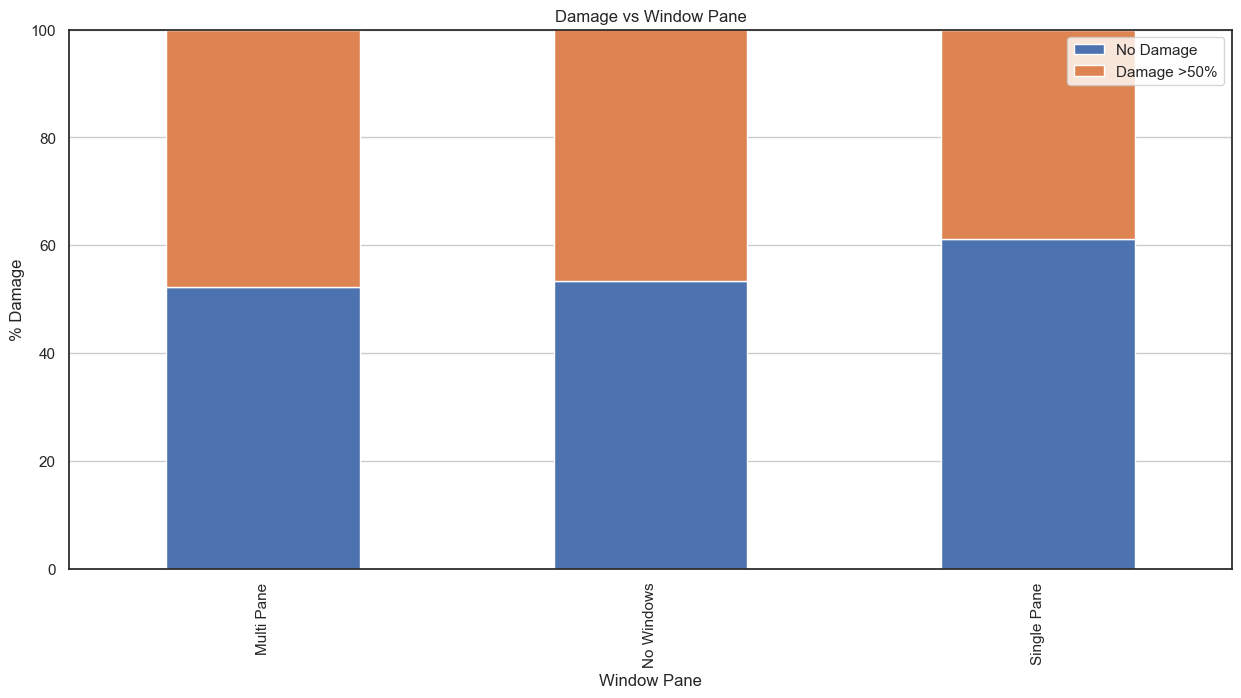

In [12981]:
compare_feature_to_target(df, "Window Pane")

We can see the stacked bar plot for Window Pane against the target Damage.

- It can be noted that all the features conclude a balanced Damage output based on the 'Window Pane' type
- There is no clear trend shown through this data

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:8: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[feature]):
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:17: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_vals = pd.unique(df[feature].ravel())
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.03417634996582365' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ind, 'percent'] = count_percentage


Deck/Porch On Grade
Index 	 Count
Masonry/Concrete 	 2926
No Deck/Porch 	 4137
Wood 	 1014
Composite 	 47


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df[['percent', feature, 'Damage']].groupby([feature, 'Damage']).sum()


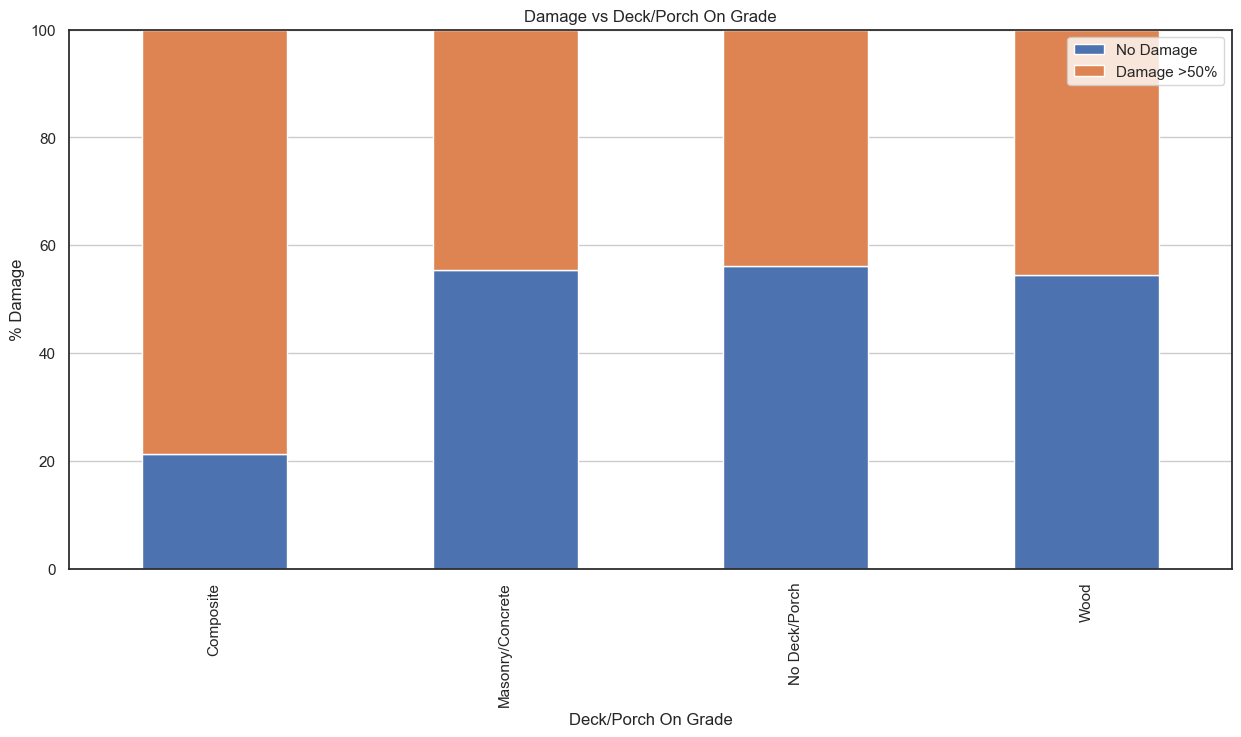

In [12982]:
compare_feature_to_target(df, "Deck/Porch On Grade")

We can see the stacked bar plot for Deck/Porch On Grade against the target Damage.

- It can be seen that there is nearly a 80% outcome on the 'Composite' deck grading to have 'Damage'
- It can be noted that all remaining features conclude a balanced Damage output based on the 'Deck/Porch On Grade' type
- Aside from understanding that 'Composite' deck's are ~80% prone to Damage, the remainder of the data dont show any clear indication to Damage

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:8: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[feature]):
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:17: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_vals = pd.unique(df[feature].ravel())
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.01626809825931349' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ind, 'percent'] = count_percentage


Deck/Porch Elevated
Index 	 Count
No Deck/Porch 	 6147
Wood 	 1435
Masonry/Concrete 	 481
Composite 	 61


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df[['percent', feature, 'Damage']].groupby([feature, 'Damage']).sum()


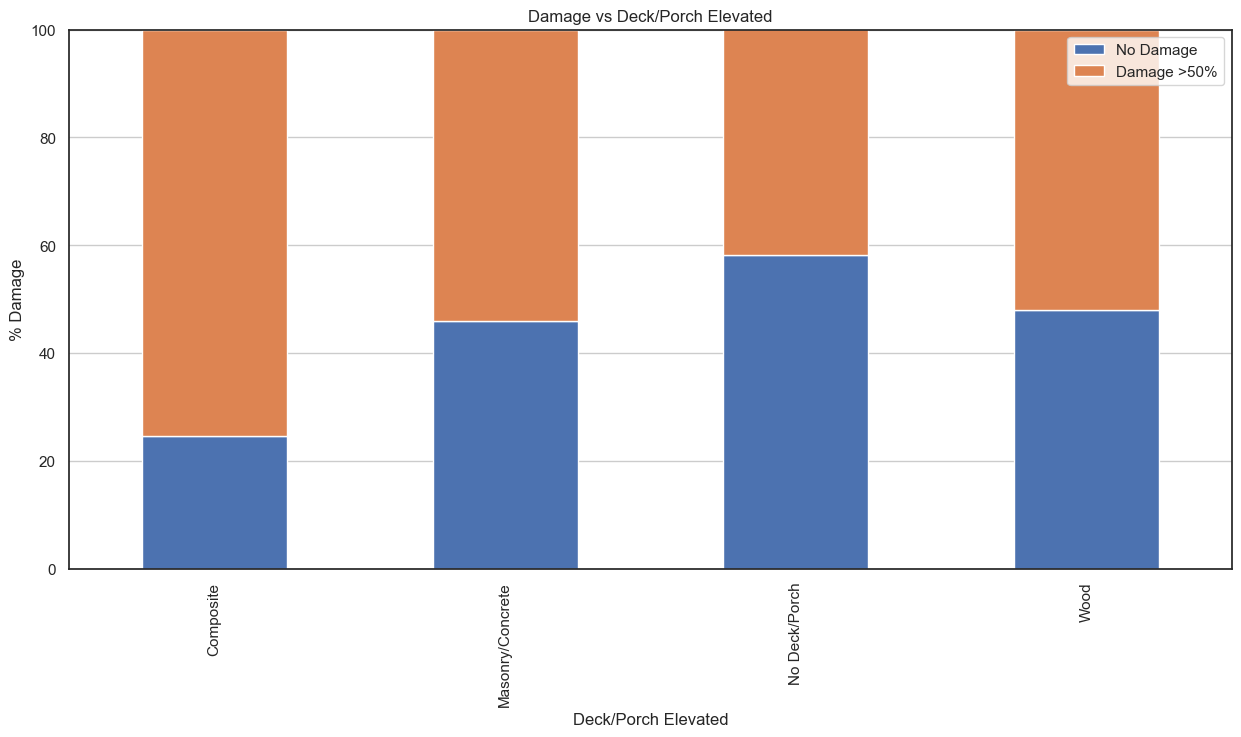

In [12983]:
compare_feature_to_target(df, "Deck/Porch Elevated")

We can see the stacked bar plot for Deck/Porch Elevated against the target Damage.

- It can be seen again that there is nearly a 80% outcome on the 'Composite' elevated deck to have 'Damage'
- It can be noted that all remaining features conclude a balanced Damage output based on the 'Deck/Porch Elevated' type
- Aside from understanding that 'Composite' deck's are ~80% prone to Damage, the remainder of the data dont show any clear indication to Damage

Patio Cover/Carport Attached to Structure
Index 	 Count
No Patio Cover/Carport 	 5790


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:8: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[feature]):
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:17: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_vals = pd.unique(df[feature].ravel())
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.017271157167530225' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ind, 'percent'] = count_percentage


Combustible 	 1945
Non Combustible 	 389


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df[['percent', feature, 'Damage']].groupby([feature, 'Damage']).sum()


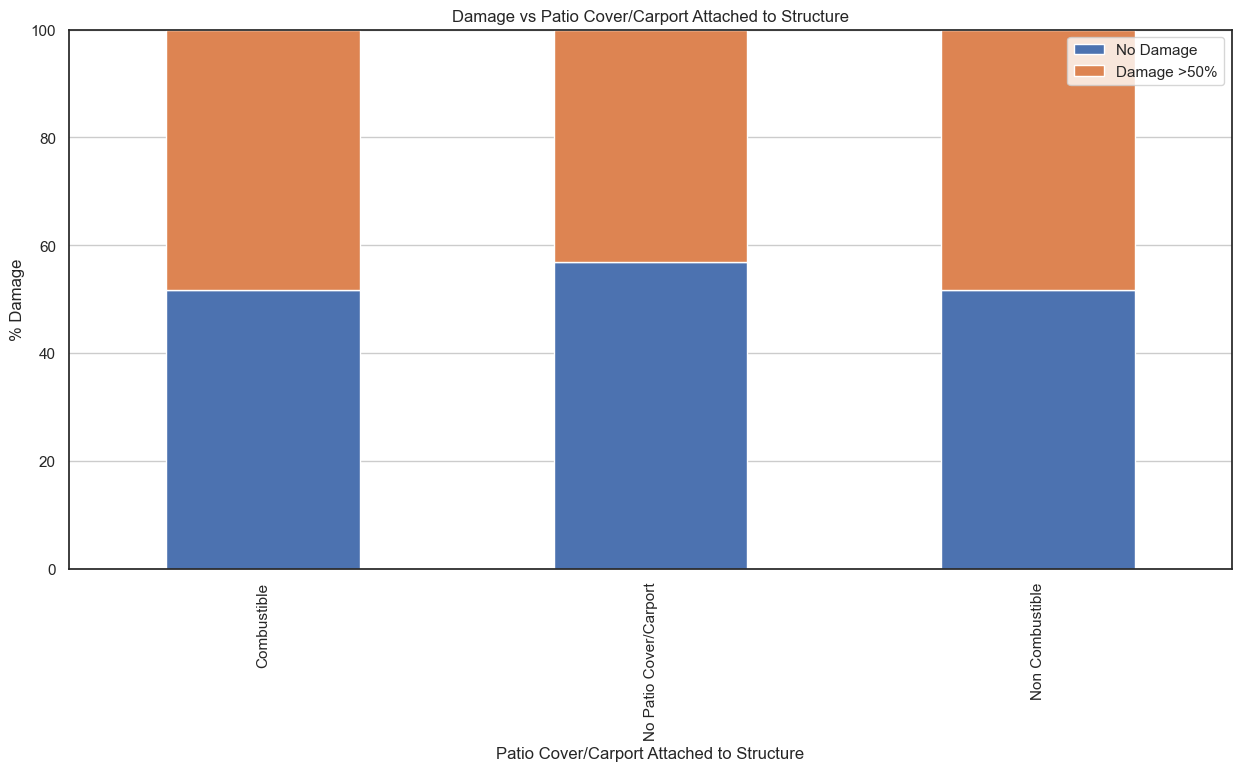

In [12984]:
compare_feature_to_target(df, "Patio Cover/Carport Attached to Structure")

We can see the stacked bar plot for Patio Cover/Carport Attached to Structure against the target Damage.

- The various types within this category all display a balanced Damage output
- There is no clear trend shown through this data

Fence Attached to Structure
Index 	 Count
Non Combustible 	 1669


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:8: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[feature]):
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:17: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_vals = pd.unique(df[feature].ravel())
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.05991611743559017' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ind, 'percent'] = count_percentage


No Fence 	 5271
Combustible 	 1184


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df[['percent', feature, 'Damage']].groupby([feature, 'Damage']).sum()


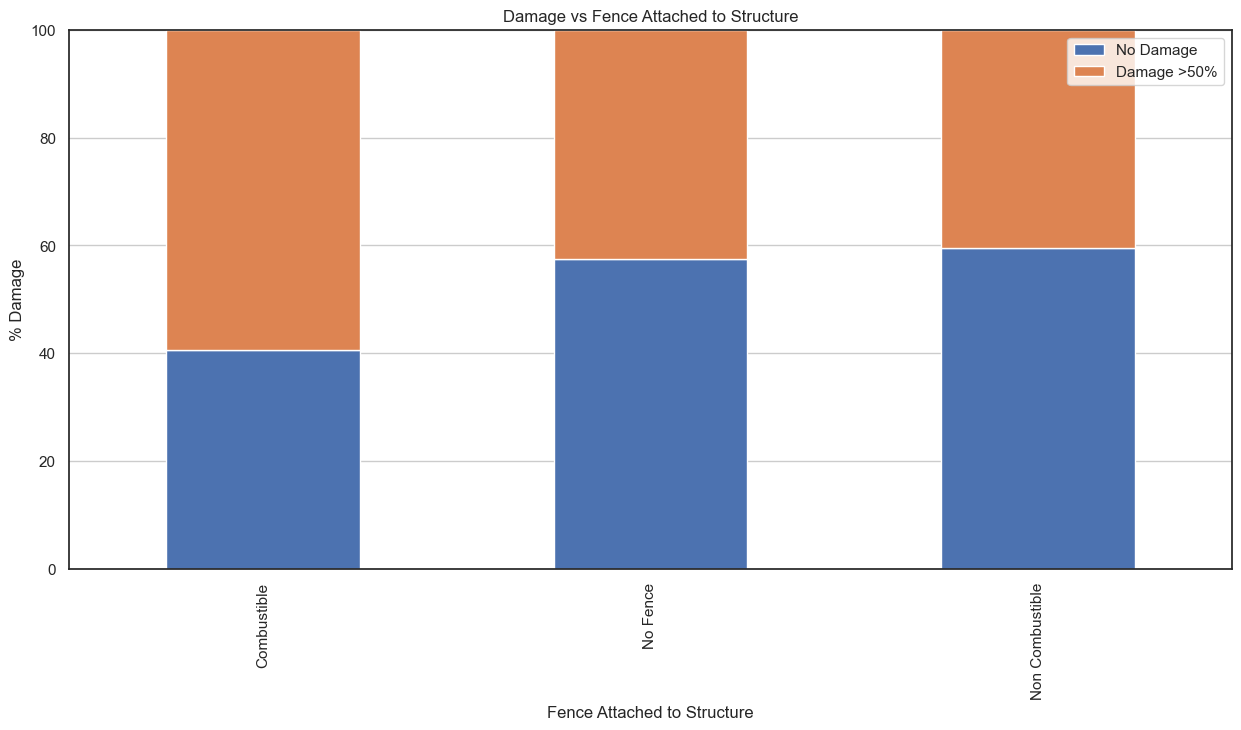

In [12985]:
compare_feature_to_target(df, "Fence Attached to Structure")

We can see the stacked bar plot for Fence Attached to Structure Attached to Structure against the target Damage.

- The various types within this category all display a balanced Damage output
- Once again, the 'Combustible' type of Fence Attached to Structure indicated a >60% correlation to 'No Damage'
- There is no clear trend shown through this data

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:8: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[feature]):
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:17: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_vals = pd.unique(df[feature].ravel())
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.09337068160597572' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ind, 'percent'] = count_percentage


Eaves
Index 	 Count
Enclosed 	 1071
No Eaves 	 861
Unenclosed 	 6169
Not Applicable 	 23


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df[['percent', feature, 'Damage']].groupby([feature, 'Damage']).sum()


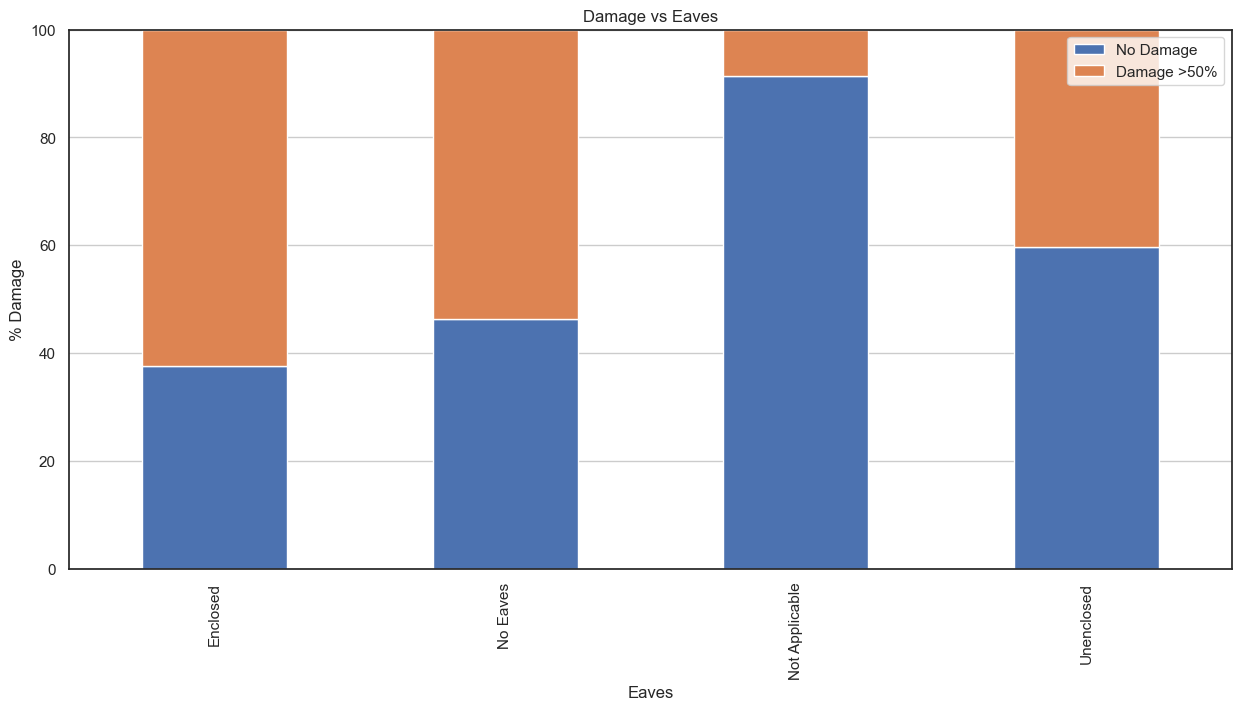

In [12986]:
compare_feature_to_target(df, "Eaves")

We can see the stacked bar plot for Eaves against the target Damage.

- It can be seen that >80% proportion of the type 'Not Applicable' (houses/buildings with no roof e.g. an apartment) are likely to have 'No Damage'
- The remaining types within this category all display a balanced Damage output
- I think this features highlighted the importance of 'Not Applicable', non-roof possessing buildings from Damage

Street Type (e.g. road, drive, lane, etc.)
Index 	 Count
Trail 	 92
Road 	 3063


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:8: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[feature]):
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:17: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_vals = pd.unique(df[feature].ravel())
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0869565217391304' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ind, 'percent'] = count_percentage


Street 	 620
Drive 	 1597
Lane 	 782
Avenue 	 641
Court 	 295
Place 	 139
Boulevard 	 97
Way 	 362
Circle 	 119
Other 	 174
Highway 	 83
Route 	 25
Terrace 	 22
Loop 	 11
Parkway 	 2


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df[['percent', feature, 'Damage']].groupby([feature, 'Damage']).sum()


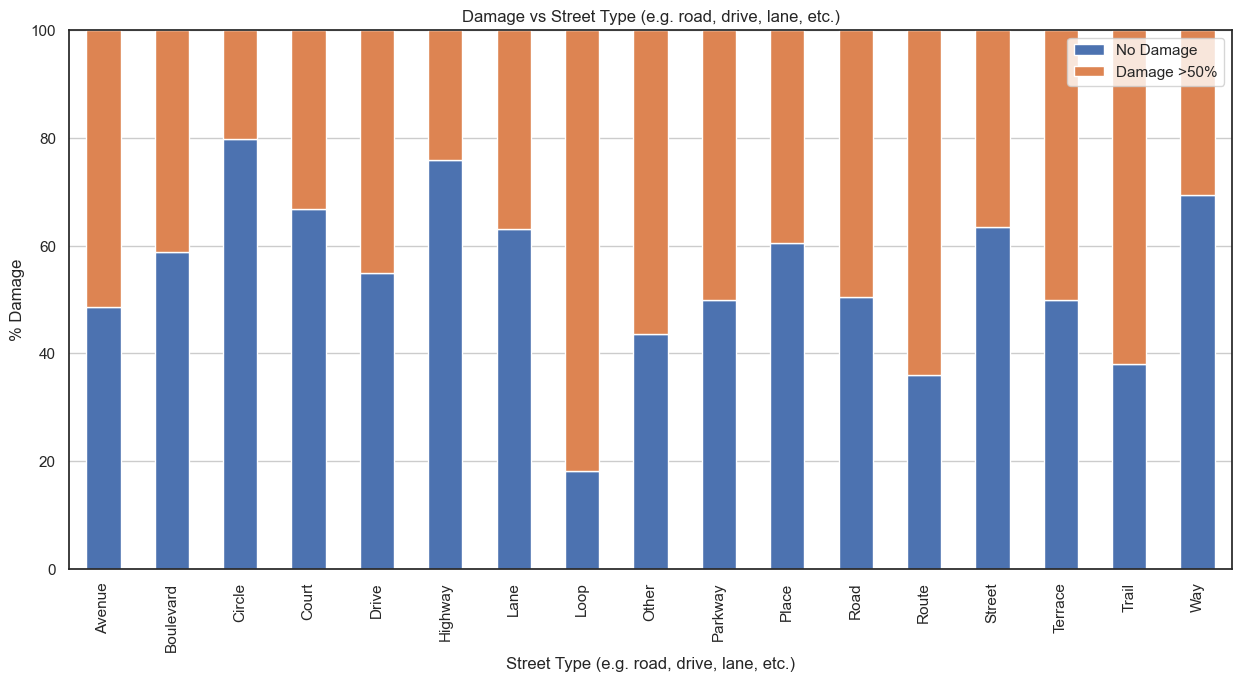

In [12987]:
compare_feature_to_target(df, "Street Type (e.g. road, drive, lane, etc.)")

We can see the stacked bar plot for Street Type against the target Damage.

- It is notable there is a balanced variation between certain Street Types
- However, it is important to not that 'Loop' contains a >80% probability of damage, I percieve this of highlighting the structure of the street and proximity of houses to one another, having an effect on the Damage outcome (close to other houses on fire)

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:8: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[feature]):
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:17: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  unique_vals = pd.unique(df[feature].ravel())
C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1226993865030675' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ind, 'percent'] = count_percentage


Incident Start Date
Index 	 Count
2020-09 	 815
2021-08 	 394
2025-01 	 2026
2021-07 	 332
2018-07 	 170
2018-11 	 1781
2020-08 	 716
2024-09 	 101
2024-07 	 217
2017-10 	 648
2022-09 	 112
2024-11 	 148
2022-07 	 96
2014-09 	 13
2016-06 	 24
2024-06 	 24
2021-06 	 15
2020-10 	 110
2021-09 	 82
2020-12 	 31
2017-08 	 12
2022-05 	 12
2024-12 	 52
2018-08 	 2
2015-09 	 32
2022-08 	 8
2018-06 	 8
2019-10 	 44
2020-07 	 12
2022-06 	 3
2017-12 	 14
2017-07 	 8
2021-10 	 22
2020-06 	 3
2023-07 	 7
2016-08 	 7
2019-08 	 3
2024-10 	 2
2016-07 	 1
2023-10 	 5
2018-09 	 1
2023-08 	 3
2015-07 	 2
2024-08 	 2
2020-11 	 3
2022-01 	 1


C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1374384556.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df[['percent', feature, 'Damage']].groupby([feature, 'Damage']).sum()


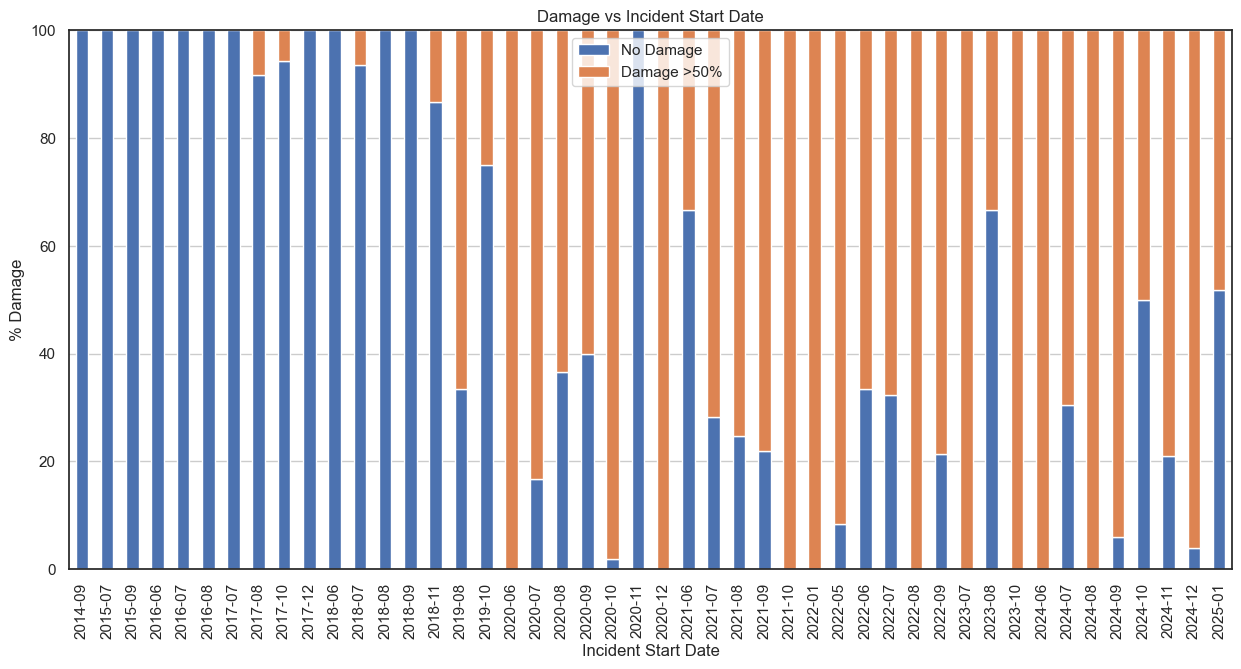

In [12988]:
compare_feature_to_target(df, "Incident Start Date")

We can see the stacked bar plot for Incident Start Date against the target Damage.

- As you can see, the category was grouped/binned into the months due to the high cardinality/unique count in this feature
- It can be seen statistically that prior to 2018-11, there is a strong correlation/relationship indicating a No Damage outcome
- However, after 2018-11, there is a high outcome of Damage for the data, probably an indication of the weather and factors such as Climate Change
- It can also be seen that there is data only related to particular months, predominantly June-September when hot weather is favourable
- Although, we can see one/two examples (2025-01 & 2022-01), there is no indication to any wildfires during winter/cold months such as January-April
- Therefore, I would believe that this data provides an accurate trend in wildfire outcomes based on seasonal information, such as less like in the month of Febuary
- I think this feature provides an accurate indication of the target feature based on the Incident Start Date's month and year

### Continuous vs Categorical

<Figure size 640x480 with 0 Axes>

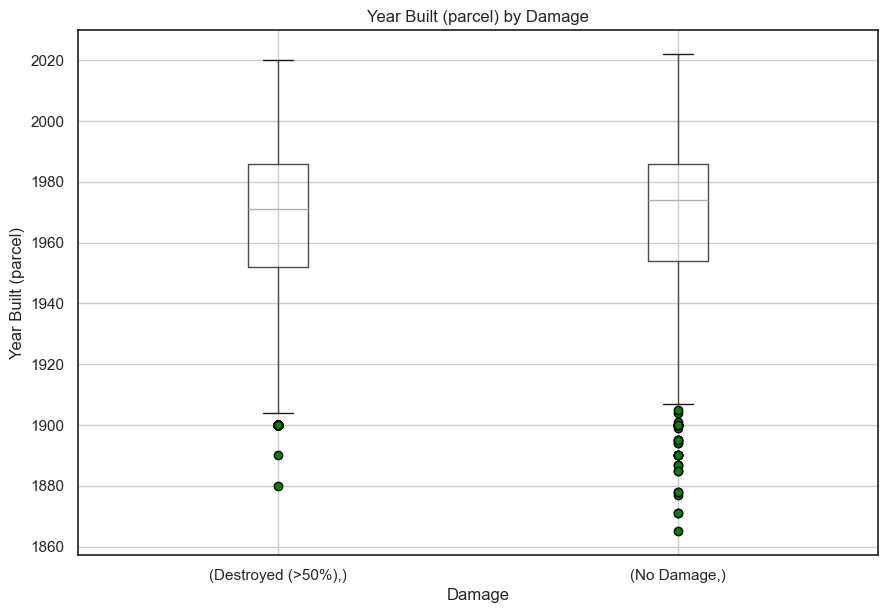

In [12989]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Year Built (parcel)'], by=['Damage'], flierprops=flierprops, figsize=(10,7))
plt.title("Year Built (parcel) by Damage")
plt.suptitle("") 
plt.xlabel("Damage") 
plt.ylabel("Year Built (parcel)") 
plt.show()

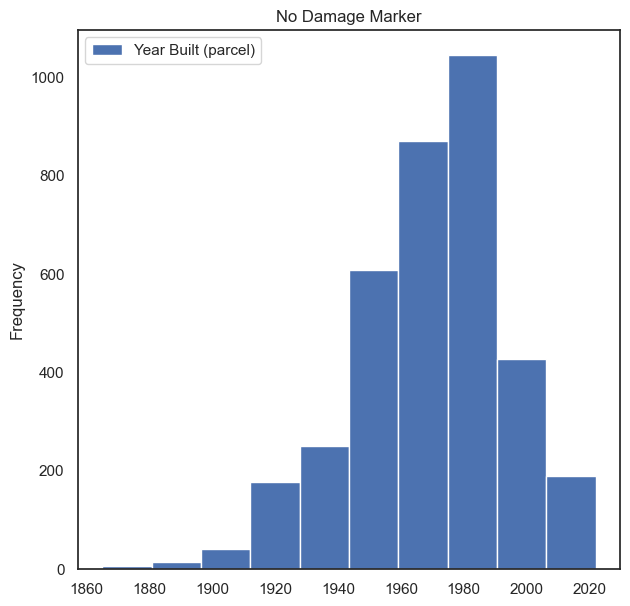

In [12990]:
df[df['Damage'] == "No Damage"][['Year Built (parcel)']].plot(kind='hist',figsize=(7,7), bins=10, title="No Damage Marker")
plt.show()

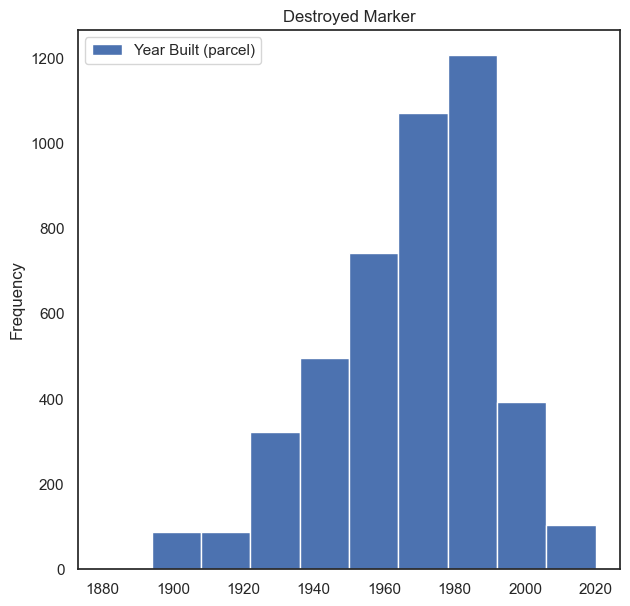

In [12991]:
df[df['Damage'] == "Destroyed (>50%)"][['Year Built (parcel)']].plot(kind='hist',figsize=(7,7), bins=10, title="Destroyed Marker")
plt.show()

- We can see from the above box plots that the median 'Year Built' for 'Destroyed >50%' is roughly 1970, whereas the median for 'No Damage' is roughly 1975
- This indicates that newer houses do tend to showcase a slightly positive correlation to 'No Damage', most likely due to building planning, material and safety guidelines
- In the histograms, we can see that both graphs are unimodal (skewed right) but the No Damage Marker represents a higher frequency value from 2000-2020
- There is no clear trend here so we can say the year built does not have a big effect on the damage outcome

<Figure size 640x480 with 0 Axes>

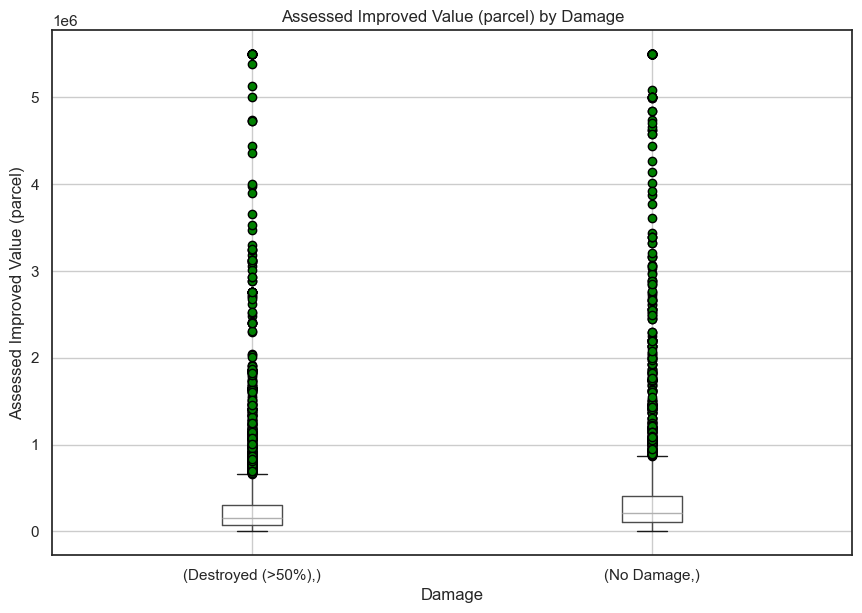

In [12992]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Assessed Improved Value (parcel)'], by=['Damage'], flierprops=flierprops, figsize=(10,7))
plt.title("Assessed Improved Value (parcel) by Damage")
plt.suptitle("") 
plt.xlabel("Damage") 
plt.ylabel("Assessed Improved Value (parcel)") 
plt.show()

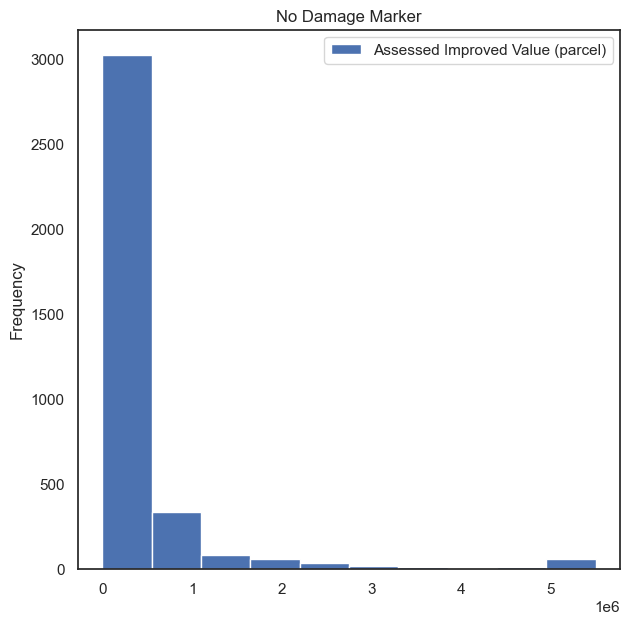

In [ ]:
df[df['Damage'] == "No Damage"][['Assessed Improved Value (parcel)']].plot(kind='hist',figsize=(7,7), bins=10, title="No Damage Marker")
plt.show()

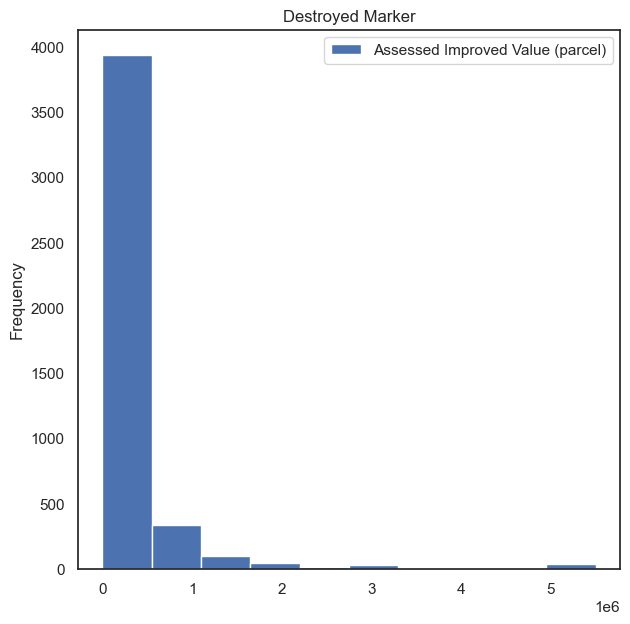

In [12994]:
df[df['Damage'] == "Destroyed (>50%)"][['Assessed Improved Value (parcel)']].plot(kind='hist',figsize=(7,7), bins=10, title="Destroyed Marker")
plt.show()

- We can see from the above box plots that the median 'Assessed Improved Value' for 'Destroyed >50%' is roughly 250k, whereas the median for 'No Damage' is roughly 500k
- This indicates that higher value houses do tend to showcase a slightly positive correlation to 'No Damage', most likely due to building structure and materials (such as fire resistant siding etc.)
- In the histograms, we can see that both graphs are exponential (left/decreasing) but the 'No Damage Marker' represents a higher value of 'Assessed Improved Value' for the parcel
- There is no clear trend here so we can say the Assessed Improved Value does not have a big effect on the damage outcome

<Figure size 640x480 with 0 Axes>

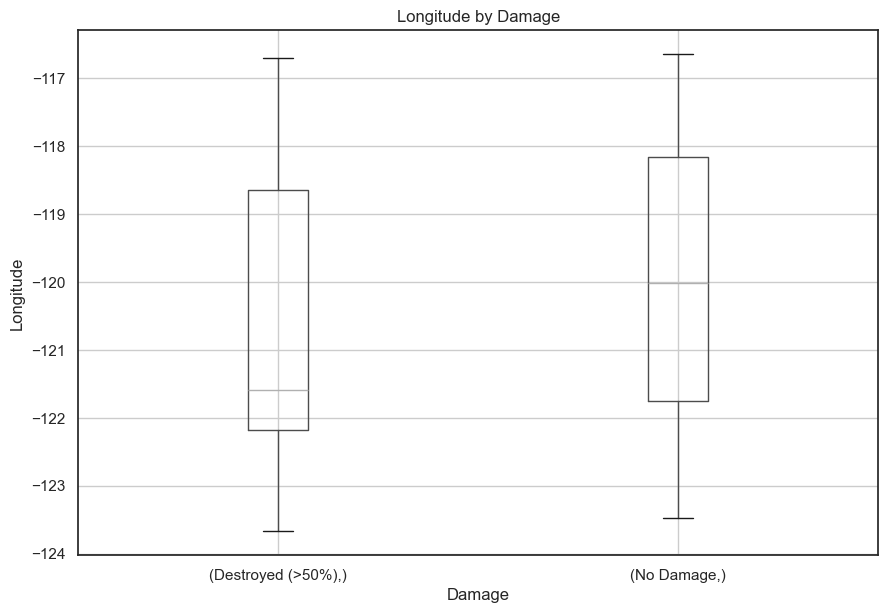

In [12995]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Longitude'], by=['Damage'], flierprops=flierprops, figsize=(10,7))
plt.title("Longitude by Damage")
plt.suptitle("") 
plt.xlabel("Damage") 
plt.ylabel("Longitude") 
plt.show()

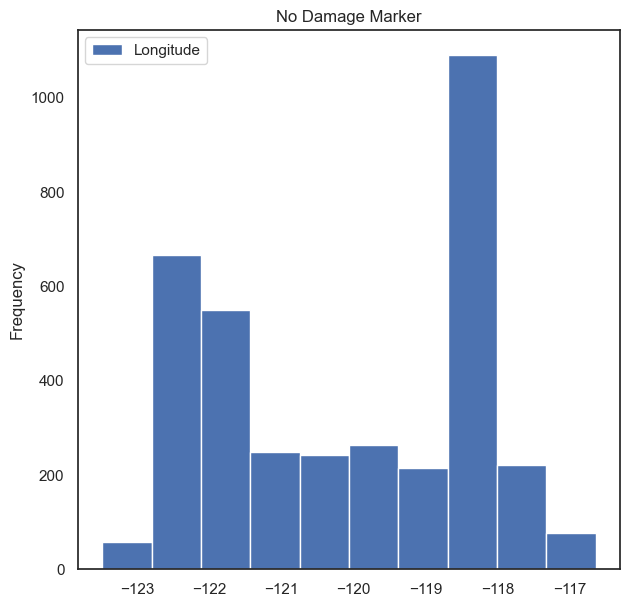

In [12996]:
df[df['Damage'] == "No Damage"][['Longitude']].plot(kind='hist',figsize=(7,7), bins=10, title="No Damage Marker")
plt.show()

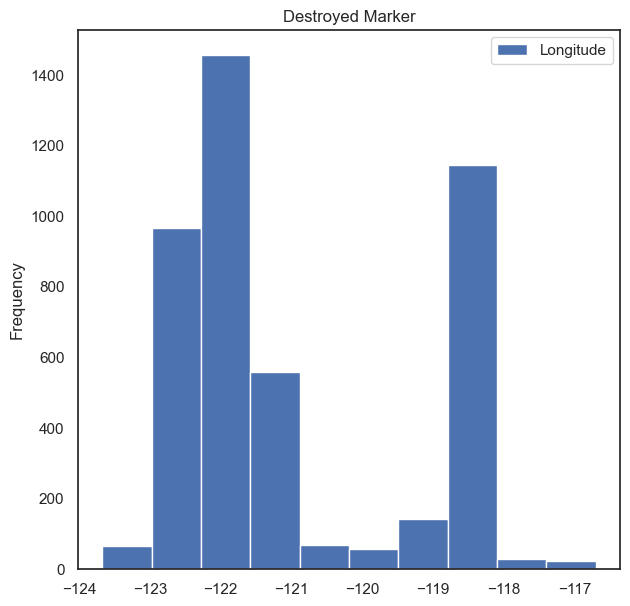

In [12997]:
df[df['Damage'] == "Destroyed (>50%)"][['Longitude']].plot(kind='hist',figsize=(7,7), bins=10, title="Destroyed Marker")
plt.show()

- We can see from the above box plots that the median 'Longitude' for 'Destroyed >50%' is roughly -121.60, whereas the median for 'No Damage' is roughly -120
- This indicates that higher longitude houses do tend to showcase a slightly positive correlation to 'No Damage', most likely due to geographical factors such as surrounding vegetation or FIRE Unit
- In the histograms, we can see that both graphs are multi-modal but the 'No Damage Marker' represents a mode in the bin of -119.25 to -118
- Whereas, the 'Destroyed Marker' has a mode representation of roughly -122.25 to -121.75 
- There is a clear trend here so we can say the longitude does have an impact on the damage outcome

<Figure size 640x480 with 0 Axes>

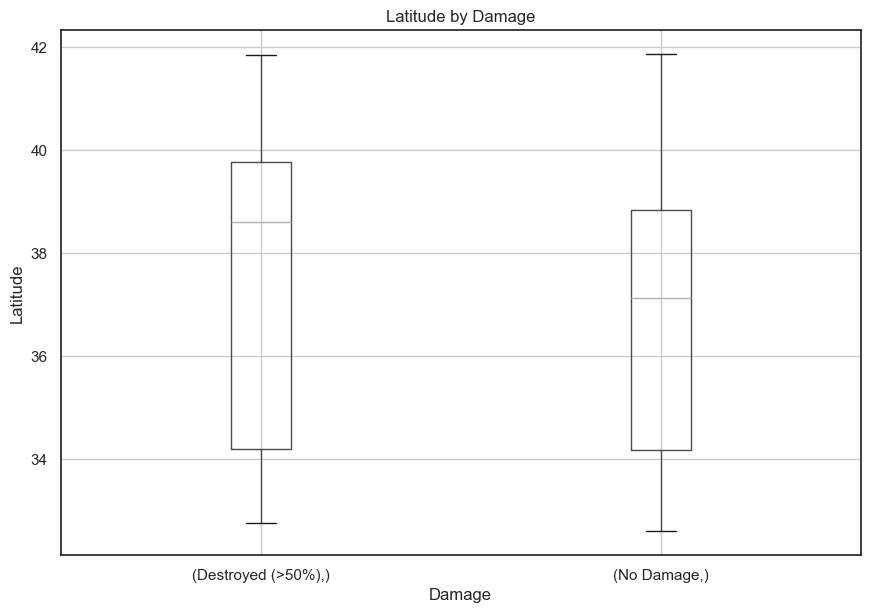

In [12998]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Latitude'], by=['Damage'], flierprops=flierprops, figsize=(10,7))
plt.title("Latitude by Damage")
plt.suptitle("") 
plt.xlabel("Damage") 
plt.ylabel("Latitude")  
plt.show()

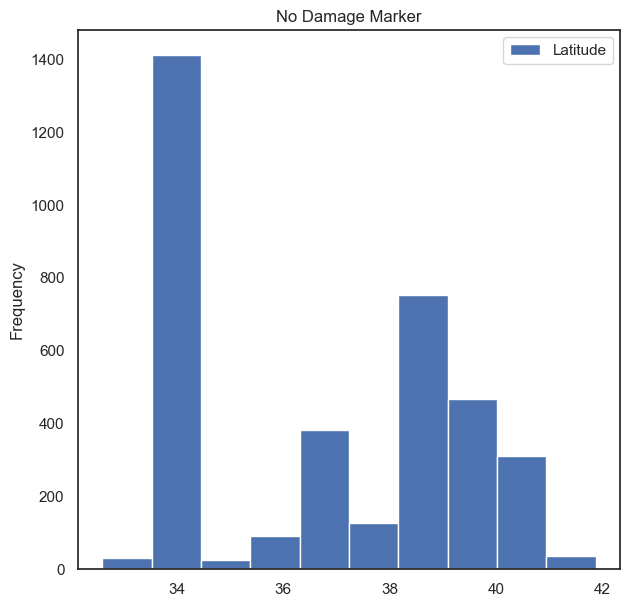

In [12999]:
df[df['Damage'] == "No Damage"][['Latitude']].plot(kind='hist',figsize=(7,7), bins=10, title="No Damage Marker")
plt.show()

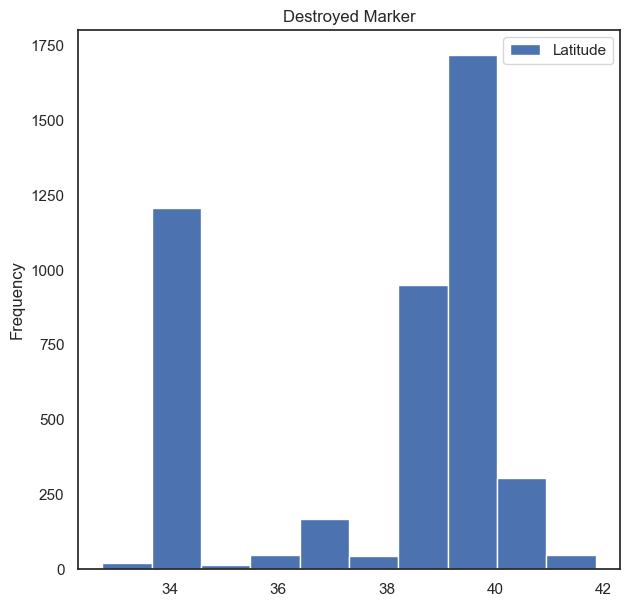

In [13000]:
df[df['Damage'] == "Destroyed (>50%)"][['Latitude']].plot(kind='hist',figsize=(7,7), bins=10, title="Destroyed Marker")
plt.show()

- We can see from the above box plots that the median 'Latitude' for 'Destroyed >50%' is roughly 39, whereas the median for 'No Damage' is roughly 37
- This indicates that higher latitude houses do tend to showcase a slightly positive correlation to 'Destroyed >50%', most likely due to geographical factors such as surrounding vegetation or FIRE Unit
- In the histograms, we can see that both graphs are multi-modal but the 'No Damage Marker' represents a mode in the bin of 33.5 to 34.5
- Whereas, the 'Destroyed Marker' has a mode representation of roughly 39.00 to 40.00
- There is a clear trend here so we can say the latitude does have an impact on the damage outcome

### Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome? Explain in plain words (a short paragraph) the story of your findings so far.

From my findings so far I have uncovered several intricate relationships between property features and damage outcomes. In comparing continuous features, we found that geographic data specifically longitude and latitude are strongly negatively correlated, while there is only a slight, weak connection between the assessed improved value and the year built. Examining categorical features, the timing of incidents reveals a clear seasonal trend, with damage levels varying clearly by month and year. Notably, properties where eaves are marked as “Non Applicable” (typically non-roof constructions) tend to experience no damage, which could be due to design elements that limit fire spread, whereas composite decks are notably more susceptible to damage. Although window panes and street types offer little insight, both exterior siding and roof construction display distinct trends however, further investigation suggests that these patterns may be influenced by geographical patterns rather then material patterns, particularly since structures with combustible materials seem to incur less damage in areas where these materials are predominantly used. Additionally, both the structure type and the CAL FIRE Unit emerge as clear indicators of damage outcomes. When considering the relationships between categorical and continuous data, weak-modest trends with assessed improved value and year built re-inforce the logic that the geographic coordinates have an effect on damage.


Continuous vs Continuous:
- Longitude and Latitude have a strong negatative correlation
- Slight weak correlation between the Assessed Improved Value and the Year Built

Categorical vs Categorical:
- Incident Start Date shows a clear trend in damage based on temporal or seasonal dates by month and year
- Eaves show that non-roof buildings, where eaves are 'Non Applicable' are prone to No Damage probably due to building construction and not allowing fire through the house through the medium of a roof
- Composite decks are more prone to damage
- Window panes and street type don’t bare significant information
- Exterior siding and roof construction shows clear trends in the outcome of damage however, I don’t believe for them to be accurate having provided further investigation
- Exterior siding and roof construction demonstrate that 'Combustible' material is less prone to damage then other materials due to the material actually being located quite heavily in particular geographical locations
- It is these geographical locations that indicate/show a trend to the data
- Structure Type and CAL FIRE Unit showcased clear trends of damage outcome


Categorical vs Continuous:
- Slight trends that are very important but not strong enough to say its a clear indication, for assessed improved value and year built
- Longitude and latitude do show a trend in data toward the damage outcome


## Exercise - Part 4.1

Create new features: Transform, extend or combine the existing features, or add new features from external sources, to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. In the grading, consideration will be given to the creativity and domain knowledge shown in preparing the new features. Use code to show that your new features are indeed useful for the target prediction problem. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

### 1 - How an Area's Daily Incident Count Effects the Building Damage Outcome (Using Internal Features)

As previously discussed throughout this assignment, the location of the buildings have a ever trending outcome on the damage of the property. This can be for a large multitude of reasons as discussed, housing being packed to close to one another and decreasing the 'Defensible Space' area around the building which is a key fire protection strategry outlined by the Government of California to slow/halt the progress of the fire (Reference - https://www.fire.ca.gov/dspace) or areas with a higher population have an impact on the available emergency response capabilities due to such a large scale emergency (an innate FIRE Cal Unit being more overloaded to response requests and cannot handle them all effectively)

Therefore, I decided I will investigate the damage impact caused to a building on the basis of how many incident calls that the local area had on that specific day. My estimate is that when there is alot of incident events to building all in one day, within the same area, the surrounding buildings are effected due to lack of resources from the fire brigade etc. to put out the fire





In [13001]:
#Convert 'Incident Start Date' to datetime
df['Incident Start Date'] = pd.to_datetime(df['Incident Start Date'])

# Extract just the date to create a daily group
df['Incident Day'] = df['Incident Start Date'].dt.date

# Count the number of records per Zip Code per day
daily_counts = (
    df.groupby(['Zip Code', 'Incident Day'])
      .size()           
      .reset_index(name='Daily Incident Count')
)

# Put the daily incident count back into the original DataFrame as a grouping
df = df.merge(daily_counts, on=['Zip Code', 'Incident Day'], how='left')

df = df.drop(columns=['Incident Day'])



C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\3709709590.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Zip Code', 'Incident Day'])


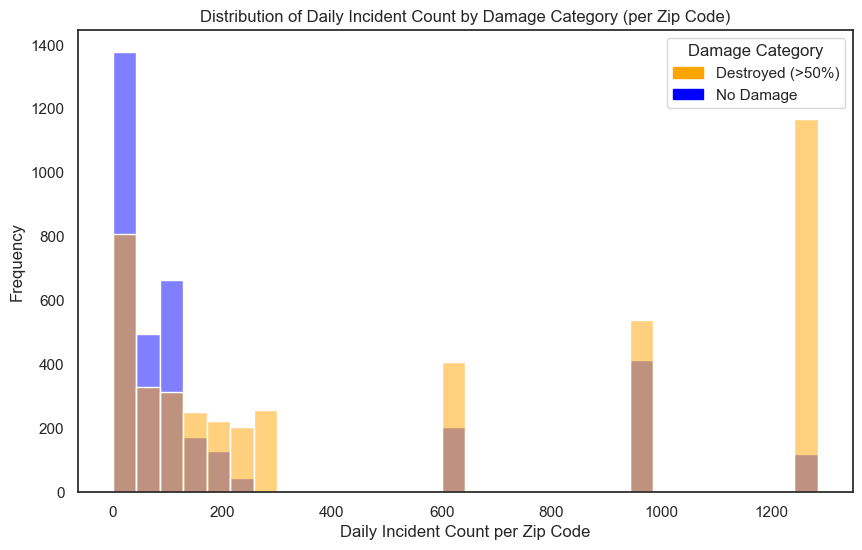

In [13002]:
# Set a coloring for the 'Damage' categories
palette = {"Destroyed (>50%)": "orange", "No Damage": "blue"}

# Create a histogram to visualize distribution of Daily Incident Count by damage
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Daily Incident Count', hue='Damage', bins=30, common_norm=False, palette=palette)

# Format the plot
plt.title('Distribution of Daily Incident Count by Damage Category (per Zip Code)')
plt.xlabel('Daily Incident Count per Zip Code')
plt.ylabel('Frequency')

# I have to manually create the legend with correct colors
legend_labels = [Patch(color=palette[label], label=label) for label in palette.keys()]
plt.legend(handles=legend_labels, title='Damage Category')

plt.show()

As you can see I created a feature 'Daily Incident Count per Zip Code' for each row to indicate the number of other incidents that happened within the local area on the same day of that building's incident, that could have a potential impact on the fire fighting resources and in turn the outcome of the target 'Damage'. 

Here you can see from my plot outlining the Daily Incident Count per Zip Code against Damage, that there is a clear trend depicted. The Damage outcome trends to favour the outcome of 'Destroyed >50%' as there is more incident rates occuring on the same day within the same Zip Code location. This increase in houses alight can be for a various set of reasons, such as reduced fire unit station resources or the proximity of each house to one another actually could have triggered more fires (due to small Defensible Space).

### 2 - Creating a 'Fire Risk Score' (Using an External Domain) 

After exporing external domains for this assigment, under the CAL open data portal website, I found a csv file outlining the location of each fire unit station produced by 'CAL FIRE' (Facilities_for_Wildland_Fire_Protection.csv). Using this data I will create a new feature 'Dist to Station km' which will outline the distance of each house from their nearest fire station in kilometers. 

The reason why I have created this feature is because I believe that it is also a very important predictor of a building's damage outcome. I believe that the further the household/building from the nearest fire unit will gauge the success in stopping the house from attaining damage, for the reason of 'response time delay'.

Secondly, I will create the feature 'Fire Risk Score'. This feature will integrate the three biggest critical factors that I have attained in the outcome of a building in the fire; its structural traits, the regional firefighting capacity and response time delay. Therefore, the new feature is concatenated with the features 'Structure Type', 'CAL FIRE Unit' and 'Dist to Station km'.

Reference - https://data.ca.gov/dataset/facilities-for-wildland-fire-protection/resource/1e2d64a9-d0d0-4f05-9f48-56b9b10da8fd

In [13003]:
# Reference - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html

station_df  = pd.read_csv('Facilities_for_Wildland_Fire_Protection.csv')

# Convert to numeric (handle errors)
station_df['LAT'] = pd.to_numeric(station_df['LAT'], errors='coerce')
station_df['LON'] = pd.to_numeric(station_df['LON'], errors='coerce')

# Drop NaNs or infinite values
station_df = station_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['LAT', 'LON'])

# Convert coordinates to radians
buildings_radians = np.radians(df[['Latitude', 'Longitude']])
stations_radians  = np.radians(station_df[['LAT', 'LON']])

# Create BallTree
tree = BallTree(stations_radians, metric='haversine')
distances, indices = tree.query(buildings_radians, k=1)
earth_radius_km = 6371

# Assign distances
df['Dist to Station km'] = distances[:, 0] * earth_radius_km


In [13004]:
# Ensure categorical features are in lowercase
df['Structure Type'] = df['Structure Type'].astype(str).str.lower().str.strip()
df['CAL FIRE Unit'] = df['CAL FIRE Unit'].astype(str).str.lower().str.strip()

# damage probability for each category in Structure Type
structure_risk = df.groupby('Structure Type')['Damage'].apply(lambda x: (x == 'Destroyed (>50%)').mean()).reset_index()
structure_risk.columns = ['Structure Type', 'Structure_Risk']

# damage probability for each CAL FIRE Unit
fire_unit_risk = df.groupby('CAL FIRE Unit')['Damage'].apply(lambda x: (x == 'Destroyed (>50%)').mean()).reset_index()
fire_unit_risk.columns = ['CAL FIRE Unit', 'CALFIRE_Unit_Risk']

# Merge risk scores into the original dataframe
df = df.merge(structure_risk, on='Structure Type', how='left')
df = df.merge(fire_unit_risk, on='CAL FIRE Unit', how='left')

# Calculating the Fire Risk Score
df['Fire Risk Score'] = (df['Structure_Risk'] + df['CALFIRE_Unit_Risk']) / 2
df['Dist to Station km scaled'] = np.log1p(df['Dist to Station km'])
df['Fire Risk Score'] = np.where(df['Damage'] == 'Destroyed (>50%)', df['Fire Risk Score'] + 3*df['Dist to Station km scaled'], df['Fire Risk Score'] + df['Dist to Station km scaled'])
df = df.drop(columns=['Structure_Risk', 'CALFIRE_Unit_Risk', 'Dist to Station km scaled'])

# Fill any missing values with the median risk score, if needed
df['Fire Risk Score'].fillna(df['Fire Risk Score'].median(), inplace=True)

C:\Users\Mark\AppData\Local\Temp\ipykernel_8416\1895965824.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fire Risk Score'].fillna(df['Fire Risk Score'].median(), inplace=True)


<Figure size 640x480 with 0 Axes>

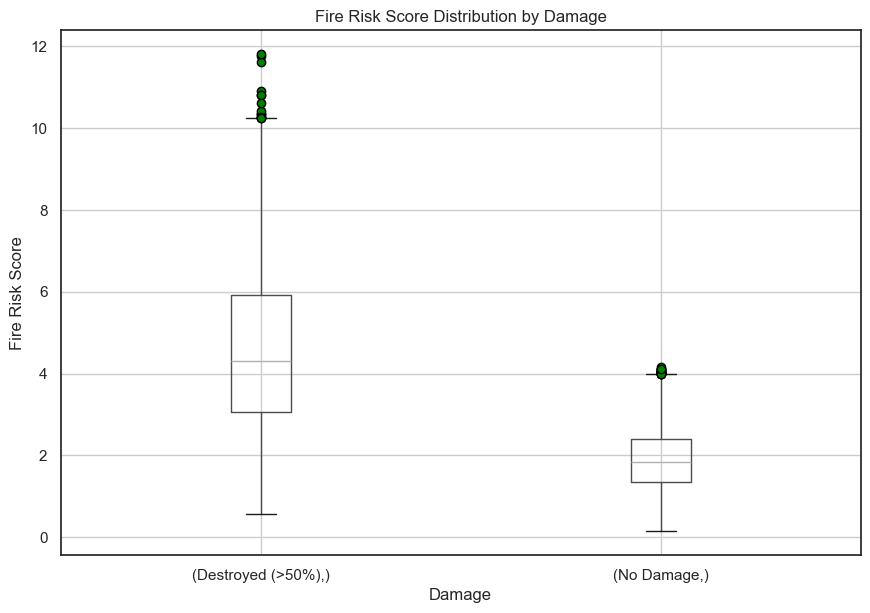

In [13005]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Fire Risk Score'], by=['Damage'], flierprops=flierprops, figsize=(10,7))
plt.title("Fire Risk Score Distribution by Damage")
plt.suptitle("") 
plt.xlabel("Damage") 
plt.ylabel("Fire Risk Score")  
plt.show()

Here we can see that the feature 'Fire Risk Score' revealed trends that correlate a higher 'Fire Risk Score' with a higher likelihood of severe wildfire damage. I base this presumption as the box plot for 'Destroyed (>50%)' is visibily higher than the box plot for 'No Damage'. Suggesting that properties with higher Fire Risk Scores are more likely to sustain Damage (>50%).

### 3 - Creating an 'Accessibility Risk'



In [13006]:
# I define risk scores for street types,
# 1 is lowest risk like highways, Routes etc with wide roads
# 2 is common streets 
# 3 is what i deem as more confined aka avenues and circles etc.
# 4 is something that is usually a dead end or cul de sac with access problems
# other i set to 3 cause its the median and idk what else
street_risk_map = {
    'Trail': 5, 'Lane': 4, 'Drive': 4, 'Court': 4, 'Place': 4,
    'Street': 3, 'Avenue': 3, 'Boulevard': 3, 'Way': 3, 'Circle': 3,
    'Road': 2, 'Route': 2, 'Terrace': 2, 'Loop': 2, 'Parkway': 2,
    'Highway': 1, 'Other': 3
}

# Create a mapping for damage based on true or false
damage_mapping = {'Destroyed (>50%)': 1, 'No Damage': 0}  
df['Damage_Numeric'] = df['Damage'].map(damage_mapping).astype(float)

# I apply street type risk scores
df['Street Risk'] = df['Street Type (e.g. road, drive, lane, etc.)'].map(street_risk_map).fillna(3)

# Now i do normalising with street risk numbers
min_street, max_street = df['Street Risk'].min(), df['Street Risk'].max()
df['Street Risk'] = 1 + (df['Street Risk'] - min_street) / (max_street - min_street) * 4

# I get the risk of using a particular fire unit
df['CAL FIRE Risk Raw'] = df.groupby('CAL FIRE Unit')['Damage_Numeric'].transform('mean')
df['CAL FIRE Risk Raw'] = df['CAL FIRE Risk Raw'] ** 1.5

# I have to do normalising of the cal fire risk
min_cal, max_cal = df['CAL FIRE Risk Raw'].min(), df['CAL FIRE Risk Raw'].max()
df['CAL FIRE Risk'] = 1 + (df['CAL FIRE Risk Raw'] - min_cal) / (max_cal - min_cal) * 4

# I have to do normalising of the distance
min_dist, max_dist = df['Dist to Station km'].min(), df['Dist to Station km'].max()
df['Distance Risk'] = 1 + (df['Dist to Station km'] - min_dist) / (max_dist - min_dist) * 4

# calculate the accessibility risk
df['Accessibility Risk'] = (4 * df['Distance Risk'] + 6 * df['CAL FIRE Risk'] + 2 * df['Street Risk']) / 12

df = df.drop(columns=['Damage_Numeric', 'Street Risk', 'CAL FIRE Risk Raw', 'Distance Risk', 'CAL FIRE Risk'])


<Figure size 640x480 with 0 Axes>

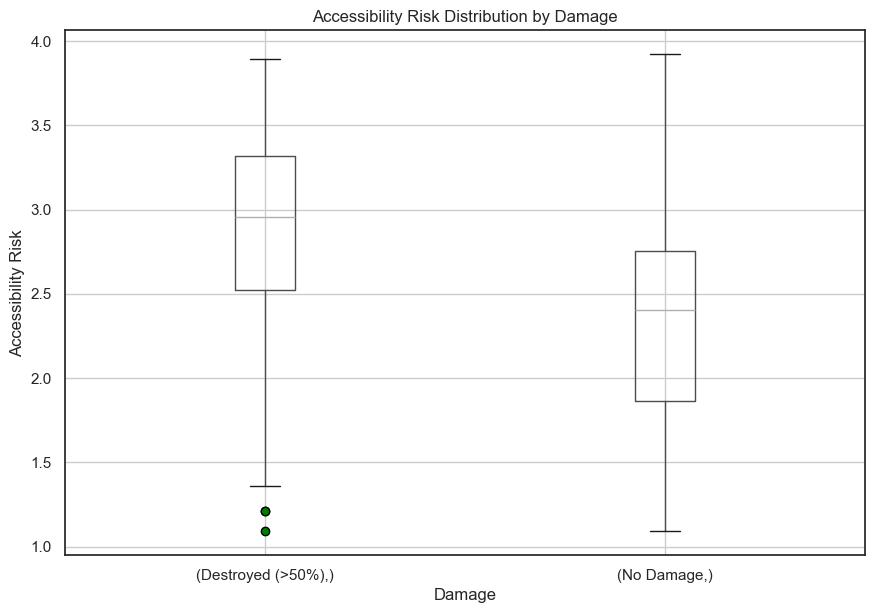

In [13007]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Accessibility Risk'], by=['Damage'], flierprops=flierprops, figsize=(10,7))
plt.title("Accessibility Risk Distribution by Damage")
plt.suptitle("") 
plt.xlabel("Damage") 
plt.ylabel("Accessibility Risk")  

plt.show()

## Exercise - Part 4.2

Save New Feature Data to CSV File

In [ ]:
df.to_csv("ex4_final-cal-wildfires-utf8.csv", index=False)